# INTEGRATE on ESBJERG data

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # #%load_ext autoreload
    # # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True

Notebook detected. Parallel processing is OK


Getting data for case: ESBJERG
--> Got data for case: ESBJERG
Using data file: ESBJERG_ALL.h5
Using GEX file: TX07_20230906_2x4_RC20-33.gex
f_data_h5=ESBJERG_ALL.h5
Plot size: wx=10.000000, wy=12.843266


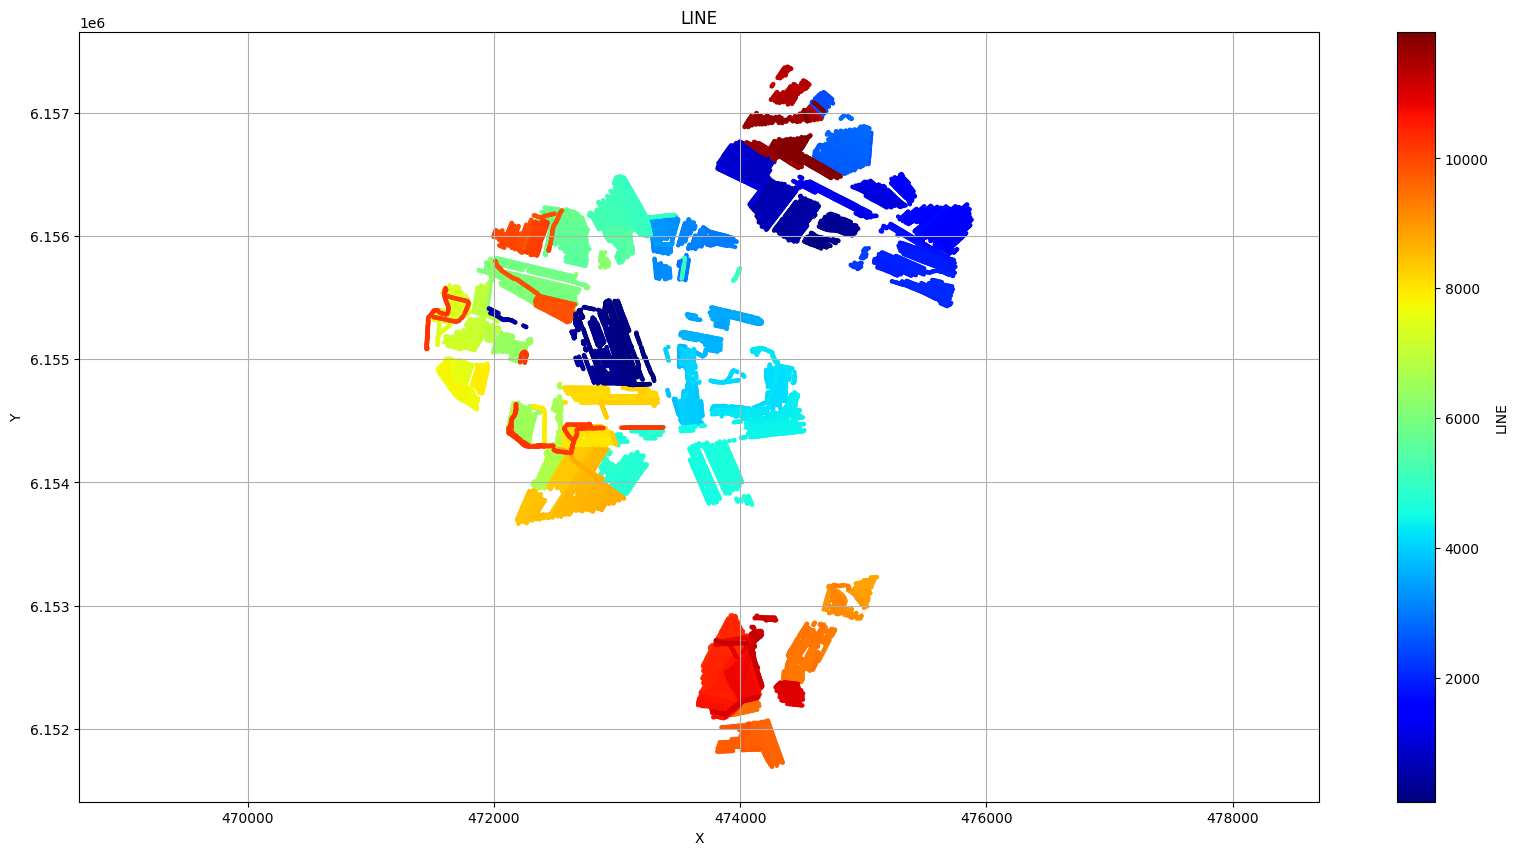

In [3]:
N=5000000
N=50000
case = 'ESBJERG'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

ig.plot_geometry(f_data_h5, pl='LINE')
X, Y, LINE, ELEVATION = ig.get_geometry(f_data_h5)

## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:

# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=500)
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='uniform', NLAY_min=1, NLAY_max=8, RHO_min=1, RHO_max=500)

# Plot some summary statistics of the prior model
#ig.plot_prior_stats(f_prior_h5)

prior_layered:   0%|                                                                              | 0/50000 [00:00<?, ?it/s]

prior_layered:   0%|                                                                              | 0/50000 [00:00<?, ?it/s]

### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

In [5]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)

Using file_basename=TX07_20230906_2x4_RC20-33


prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   3%|██                                                                        | 44/1562 [00:01<00:34, 43.80it/s]

gatdaem1d:   3%|█▉                                                                        | 42/1563 [00:01<00:36, 41.66it/s]

gatdaem1d:   2%|█▌                                                                        | 34/1563 [00:01<00:45, 33.30it/s]

gatdaem1d:   3%|██▏                                                                       | 45/1563 [00:01<00:34, 44.48it/s]

gatdaem1d:   3%|█▉                                                                        | 41/1562 [00:01<00:37, 40.56it/s]

gatdaem1d:   2%|█▍                                                                        | 31/1562 [00:01<00:49, 30.66it/s]

gatdaem1d:   2%|█▌                                                                        | 32/1562 [00:01<00:48, 31.58it/s]

gatdaem1d:   2%|█▌                                                                        | 32/1563 [00:01<00:49, 30.95it/s]

gatdaem1d:   2%|█▌                                                                        | 32/1562 [00:01<00:48, 31.49it/s]

gatdaem1d:   2%|█▍                                                                        | 31/1563 [00:01<00:49, 30.99it/s]

gatdaem1d:   2%|█▌                                                                        | 32/1562 [00:01<00:48, 31.85it/s]

gatdaem1d:   2%|█▌                                                                        | 33/1563 [00:01<00:46, 32.68it/s]

gatdaem1d:   2%|█▌                                                                        | 32/1562 [00:01<00:48, 31.54it/s]

gatdaem1d:   3%|██                                                                        | 43/1562 [00:01<00:36, 42.12it/s]

gatdaem1d:   2%|█▌                                                                        | 33/1563 [00:01<00:46, 32.59it/s]

gatdaem1d:   3%|██▏                                                                       | 45/1563 [00:01<00:34, 44.22it/s]

gatdaem1d:   2%|█▌                                                                        | 33/1562 [00:01<00:47, 32.13it/s]

gatdaem1d:   3%|█▉                                                                        | 41/1563 [00:01<00:37, 40.65it/s]

gatdaem1d:   3%|█▉                                                                        | 42/1563 [00:01<00:36, 41.21it/s]

gatdaem1d:   2%|█▌                                                                        | 32/1562 [00:01<00:49, 31.20it/s]

gatdaem1d:   3%|██                                                                        | 43/1562 [00:01<00:35, 42.33it/s]

gatdaem1d:   3%|█▉                                                                        | 42/1562 [00:01<00:36, 41.48it/s]

gatdaem1d:   2%|█▍                                                                        | 31/1562 [00:01<00:50, 30.16it/s]

gatdaem1d:   2%|█▍                                                                        | 31/1562 [00:01<00:50, 30.51it/s]

gatdaem1d:   3%|█▉                                                                        | 42/1563 [00:01<00:36, 41.33it/s]

gatdaem1d:   2%|█▍                                                                        | 30/1563 [00:01<00:51, 29.66it/s]

gatdaem1d:   3%|██                                                                        | 43/1563 [00:01<00:36, 41.98it/s]

gatdaem1d:   3%|█▉                                                                        | 42/1563 [00:01<00:36, 41.11it/s]

gatdaem1d:   2%|█▎                                                                        | 29/1563 [00:01<00:54, 28.37it/s]

gatdaem1d:   3%|█▉                                                                        | 40/1562 [00:01<00:38, 39.40it/s]

gatdaem1d:   3%|█▉                                                                        | 42/1562 [00:01<00:36, 41.21it/s]

gatdaem1d:   3%|█▉                                                                        | 40/1563 [00:01<00:38, 39.80it/s]

gatdaem1d:   5%|███▉                                                                      | 84/1563 [00:02<00:35, 41.83it/s]

gatdaem1d:   5%|███▌                                                                      | 76/1563 [00:02<00:39, 38.07it/s]

gatdaem1d:   5%|███▉                                                                      | 83/1562 [00:02<00:35, 41.13it/s]

gatdaem1d:   4%|███                                                                       | 64/1562 [00:02<00:47, 31.72it/s]

gatdaem1d:   4%|██▉                                                                       | 63/1563 [00:02<00:48, 30.79it/s]

gatdaem1d:   5%|███▍                                                                      | 73/1562 [00:02<00:40, 37.14it/s]

gatdaem1d:   5%|███▍                                                                      | 73/1563 [00:02<00:39, 37.33it/s]

gatdaem1d:   4%|███                                                                       | 64/1562 [00:02<00:47, 31.36it/s]

gatdaem1d:   4%|███                                                                       | 64/1562 [00:02<00:47, 31.67it/s]

gatdaem1d:   4%|███                                                                       | 65/1562 [00:02<00:46, 32.02it/s]

gatdaem1d:   6%|████▏                                                                     | 88/1562 [00:02<00:35, 41.85it/s]

gatdaem1d:   4%|███▏                                                                      | 68/1563 [00:02<00:44, 33.90it/s]

gatdaem1d:   5%|███▌                                                                      | 76/1563 [00:02<00:38, 38.25it/s]

gatdaem1d:   5%|███▌                                                                      | 74/1562 [00:02<00:39, 37.73it/s]

gatdaem1d:   4%|███                                                                       | 64/1562 [00:02<00:47, 31.34it/s]

gatdaem1d:   6%|████                                                                      | 86/1562 [00:02<00:34, 42.26it/s]

gatdaem1d:   4%|██▉                                                                       | 61/1563 [00:02<00:49, 30.43it/s]

gatdaem1d:   5%|████                                                                      | 85/1563 [00:02<00:35, 41.81it/s]

gatdaem1d:   5%|████                                                                      | 85/1563 [00:02<00:35, 41.94it/s]

gatdaem1d:   4%|███▏                                                                      | 67/1562 [00:02<00:45, 32.63it/s]

gatdaem1d:   4%|███                                                                       | 65/1562 [00:02<00:46, 32.06it/s]

gatdaem1d:   6%|████                                                                      | 86/1562 [00:02<00:35, 41.38it/s]

gatdaem1d:   5%|███▍                                                                      | 72/1563 [00:02<00:41, 36.31it/s]

gatdaem1d:   5%|███▊                                                                      | 80/1562 [00:02<00:37, 39.40it/s]

gatdaem1d:   6%|████▎                                                                     | 90/1563 [00:02<00:35, 42.05it/s]

gatdaem1d:   6%|████▎                                                                     | 90/1563 [00:02<00:35, 42.06it/s]

gatdaem1d:   5%|███▉                                                                      | 82/1563 [00:02<00:42, 34.74it/s]

gatdaem1d:   5%|███▉                                                                      | 84/1562 [00:02<00:41, 35.27it/s]

gatdaem1d:   5%|███▉                                                                      | 84/1563 [00:02<00:42, 34.80it/s]

gatdaem1d:   5%|████                                                                      | 85/1563 [00:02<00:42, 34.98it/s]

gatdaem1d:   5%|███▊                                                                      | 80/1563 [00:02<00:43, 34.19it/s]

gatdaem1d:   5%|███▉                                                                      | 84/1562 [00:02<00:42, 34.41it/s]

gatdaem1d:   8%|█████▉                                                                   | 127/1563 [00:03<00:34, 42.11it/s]

gatdaem1d:   8%|█████▌                                                                   | 119/1563 [00:03<00:36, 39.96it/s]

gatdaem1d:   8%|█████▉                                                                   | 126/1562 [00:03<00:34, 41.76it/s]

gatdaem1d:   6%|████▌                                                                     | 96/1563 [00:03<00:46, 31.53it/s]

gatdaem1d:   7%|█████                                                                    | 108/1562 [00:03<00:39, 36.84it/s]

gatdaem1d:   8%|██████                                                                   | 131/1562 [00:03<00:33, 42.17it/s]

gatdaem1d:   7%|█████▍                                                                   | 117/1563 [00:03<00:36, 39.35it/s]

gatdaem1d:   6%|████▌                                                                     | 96/1562 [00:03<00:46, 31.23it/s]

gatdaem1d:   7%|████▊                                                                    | 104/1563 [00:03<00:40, 36.13it/s]

gatdaem1d:   8%|█████▉                                                                   | 128/1563 [00:03<00:33, 42.28it/s]

gatdaem1d:   7%|█████▍                                                                   | 116/1562 [00:03<00:36, 39.25it/s]

gatdaem1d:   8%|██████                                                                   | 129/1563 [00:03<00:33, 42.50it/s]

gatdaem1d:   6%|████▌                                                                     | 97/1562 [00:03<00:46, 31.67it/s]

gatdaem1d:   6%|████▌                                                                     | 96/1562 [00:03<00:47, 30.86it/s]

gatdaem1d:   8%|██████                                                                   | 129/1562 [00:03<00:34, 41.90it/s]

gatdaem1d:   7%|█████▎                                                                   | 114/1563 [00:03<00:37, 38.76it/s]

gatdaem1d:   8%|█████▋                                                                   | 122/1562 [00:03<00:35, 40.57it/s]

gatdaem1d:   7%|████▊                                                                    | 102/1563 [00:03<00:44, 32.79it/s]

gatdaem1d:   6%|████▌                                                                     | 96/1562 [00:03<00:47, 30.57it/s]

gatdaem1d:   9%|██████▏                                                                  | 133/1563 [00:03<00:33, 42.36it/s]

gatdaem1d:   6%|████▋                                                                     | 98/1562 [00:03<00:47, 31.08it/s]

gatdaem1d:   7%|█████▏                                                                   | 111/1562 [00:03<00:41, 34.95it/s]

gatdaem1d:   6%|████▋                                                                    | 100/1562 [00:03<00:47, 30.65it/s]

gatdaem1d:   7%|█████▏                                                                   | 111/1563 [00:03<00:43, 33.47it/s]

gatdaem1d:   8%|█████▉                                                                   | 127/1563 [00:03<00:38, 37.59it/s]

gatdaem1d:   8%|█████▋                                                                   | 122/1563 [00:03<00:38, 37.45it/s]

gatdaem1d:   8%|█████▌                                                                   | 120/1562 [00:03<00:42, 34.12it/s]

gatdaem1d:   8%|██████                                                                   | 129/1562 [00:03<00:39, 35.91it/s]

gatdaem1d:   8%|█████▌                                                                   | 120/1563 [00:03<00:42, 33.76it/s]

gatdaem1d:   8%|█████▌                                                                   | 118/1563 [00:03<00:43, 32.94it/s]

gatdaem1d:   9%|██████▏                                                                  | 133/1563 [00:03<00:40, 35.40it/s]

gatdaem1d:   8%|█████▌                                                                   | 120/1562 [00:03<00:43, 33.15it/s]

gatdaem1d:  10%|███████▌                                                                 | 163/1563 [00:04<00:33, 41.46it/s]

gatdaem1d:  11%|███████▊                                                                 | 168/1562 [00:04<00:33, 41.52it/s]

gatdaem1d:   9%|██████▍                                                                  | 139/1563 [00:04<00:39, 35.93it/s]

gatdaem1d:  10%|██████▉                                                                  | 149/1562 [00:04<00:36, 38.36it/s]

gatdaem1d:  10%|███████▍                                                                 | 158/1563 [00:04<00:35, 39.91it/s]

gatdaem1d:   8%|█████▉                                                                   | 128/1562 [00:04<00:45, 31.50it/s]

gatdaem1d:   9%|██████▊                                                                  | 147/1563 [00:04<00:36, 38.62it/s]

gatdaem1d:  10%|███████▍                                                                 | 158/1562 [00:04<00:34, 40.17it/s]

gatdaem1d:  11%|████████                                                                 | 172/1562 [00:04<00:32, 42.19it/s]

gatdaem1d:  10%|███████▏                                                                 | 154/1563 [00:04<00:36, 39.03it/s]

gatdaem1d:   8%|██████▏                                                                  | 132/1562 [00:04<00:43, 32.71it/s]

gatdaem1d:   8%|██████                                                                   | 129/1562 [00:04<00:45, 31.33it/s]

gatdaem1d:  11%|████████                                                                 | 172/1563 [00:04<00:33, 41.80it/s]

gatdaem1d:   8%|█████▉                                                                   | 128/1562 [00:04<00:46, 30.89it/s]

gatdaem1d:  11%|████████▏                                                                | 176/1563 [00:04<00:32, 42.17it/s]

gatdaem1d:   9%|██████▌                                                                  | 141/1562 [00:04<00:39, 35.53it/s]

gatdaem1d:   9%|██████▎                                                                  | 135/1563 [00:04<00:44, 32.12it/s]

gatdaem1d:   9%|██████▊                                                                  | 147/1562 [00:04<00:41, 33.79it/s]

gatdaem1d:   8%|██████                                                                   | 131/1562 [00:04<00:48, 29.49it/s]

gatdaem1d:  11%|███████▉                                                                 | 170/1563 [00:04<00:37, 37.17it/s]

gatdaem1d:  11%|████████▏                                                                | 174/1562 [00:04<00:36, 37.59it/s]

gatdaem1d:  10%|███████▌                                                                 | 163/1562 [00:04<00:38, 36.47it/s]

gatdaem1d:  11%|███████▉                                                                 | 169/1563 [00:04<00:35, 39.08it/s]

gatdaem1d:  10%|███████▋                                                                 | 164/1563 [00:04<00:35, 39.02it/s]

gatdaem1d:  11%|███████▉                                                                 | 171/1563 [00:04<00:37, 37.00it/s]

gatdaem1d:   9%|██████▊                                                                  | 145/1563 [00:04<00:44, 31.83it/s]

gatdaem1d:  10%|███████▌                                                                 | 162/1562 [00:04<00:38, 36.74it/s]

gatdaem1d:  10%|███████▌                                                                 | 162/1563 [00:04<00:38, 36.35it/s]

gatdaem1d:  10%|███████                                                                  | 152/1563 [00:04<00:43, 32.69it/s]

gatdaem1d:  11%|███████▊                                                                 | 166/1562 [00:04<00:40, 34.08it/s]

gatdaem1d:  10%|███████▏                                                                 | 154/1562 [00:04<00:43, 32.31it/s]

gatdaem1d:  11%|███████▉                                                                 | 170/1563 [00:04<00:41, 33.52it/s]

gatdaem1d:  12%|████████▉                                                                | 191/1562 [00:05<00:34, 39.63it/s]

gatdaem1d:  13%|█████████▌                                                               | 205/1563 [00:05<00:32, 41.18it/s]

gatdaem1d:  12%|████████▌                                                                | 183/1563 [00:05<00:35, 38.64it/s]

gatdaem1d:  10%|███████▍                                                                 | 160/1562 [00:05<00:44, 31.64it/s]

gatdaem1d:  13%|█████████▍                                                               | 201/1563 [00:05<00:33, 40.69it/s]

gatdaem1d:  13%|█████████▎                                                               | 199/1562 [00:05<00:33, 40.41it/s]

gatdaem1d:  12%|████████▊                                                                | 190/1563 [00:05<00:34, 39.89it/s]

gatdaem1d:  10%|███████▌                                                                 | 161/1562 [00:05<00:44, 31.52it/s]

gatdaem1d:  13%|█████████▏                                                               | 196/1563 [00:05<00:34, 39.90it/s]

gatdaem1d:  14%|██████████                                                               | 216/1562 [00:05<00:31, 42.45it/s]

gatdaem1d:  11%|███████▋                                                                 | 165/1562 [00:05<00:43, 32.11it/s]

gatdaem1d:  14%|█████████▉                                                               | 214/1563 [00:05<00:32, 41.37it/s]

gatdaem1d:  14%|██████████▏                                                              | 219/1563 [00:05<00:31, 42.25it/s]

gatdaem1d:  10%|███████▍                                                                 | 159/1562 [00:05<00:46, 30.36it/s]

gatdaem1d:  12%|████████▌                                                                | 183/1562 [00:05<00:36, 37.53it/s]

gatdaem1d:  11%|███████▉                                                                 | 169/1563 [00:05<00:42, 32.57it/s]

gatdaem1d:  10%|███████▌                                                                 | 163/1562 [00:05<00:46, 30.10it/s]

gatdaem1d:  13%|█████████▊                                                               | 210/1562 [00:05<00:36, 37.09it/s]

gatdaem1d:  12%|████████▍                                                                | 181/1562 [00:05<00:42, 32.76it/s]

gatdaem1d:  13%|█████████▊                                                               | 210/1563 [00:05<00:34, 39.65it/s]

gatdaem1d:  13%|█████████▌                                                               | 206/1563 [00:05<00:33, 39.95it/s]

gatdaem1d:  14%|██████████                                                               | 216/1563 [00:05<00:34, 39.34it/s]

gatdaem1d:  13%|█████████▌                                                               | 204/1562 [00:05<00:35, 38.36it/s]

gatdaem1d:  13%|█████████▋                                                               | 208/1563 [00:05<00:38, 35.08it/s]

gatdaem1d:  14%|█████████▉                                                               | 213/1562 [00:05<00:37, 35.69it/s]

gatdaem1d:  13%|█████████▍                                                               | 201/1562 [00:05<00:39, 34.31it/s]

gatdaem1d:  11%|████████▎                                                                | 178/1563 [00:05<00:45, 30.46it/s]

gatdaem1d:  12%|████████▋                                                                | 185/1563 [00:05<00:43, 31.51it/s]

gatdaem1d:  12%|████████▋                                                                | 187/1562 [00:05<00:42, 31.98it/s]

gatdaem1d:  14%|█████████▉                                                               | 212/1563 [00:05<00:37, 36.16it/s]

gatdaem1d:  13%|█████████▎                                                               | 199/1563 [00:05<00:40, 33.47it/s]

gatdaem1d:  13%|█████████▍                                                               | 201/1562 [00:05<00:41, 32.56it/s]

gatdaem1d:  15%|██████████▉                                                              | 233/1562 [00:06<00:32, 40.40it/s]

gatdaem1d:  16%|███████████▌                                                             | 247/1563 [00:06<00:31, 41.44it/s]

gatdaem1d:  14%|██████████▎                                                              | 222/1563 [00:06<00:34, 38.60it/s]

gatdaem1d:  12%|█████████                                                                | 193/1562 [00:06<00:42, 32.01it/s]

gatdaem1d:  16%|███████████▎                                                             | 243/1563 [00:06<00:32, 40.92it/s]

gatdaem1d:  15%|██████████▉                                                              | 233/1563 [00:06<00:32, 40.82it/s]

gatdaem1d:  15%|███████████                                                              | 238/1563 [00:06<00:32, 40.45it/s]

gatdaem1d:  12%|█████████                                                                | 193/1562 [00:06<00:43, 31.34it/s]

gatdaem1d:  16%|███████████▉                                                             | 256/1563 [00:06<00:31, 41.17it/s]

gatdaem1d:  12%|████████▉                                                                | 191/1562 [00:06<00:44, 30.78it/s]

gatdaem1d:  13%|█████████▎                                                               | 198/1562 [00:06<00:42, 31.96it/s]

gatdaem1d:  14%|██████████▌                                                              | 226/1562 [00:06<00:34, 39.09it/s]

gatdaem1d:  17%|████████████▏                                                            | 262/1563 [00:06<00:30, 42.00it/s]

gatdaem1d:  15%|███████████▏                                                             | 240/1562 [00:06<00:34, 38.36it/s]

gatdaem1d:  13%|█████████▍                                                               | 202/1563 [00:06<00:42, 31.74it/s]

gatdaem1d:  13%|█████████▏                                                               | 197/1562 [00:06<00:43, 31.25it/s]

gatdaem1d:  16%|███████████▋                                                             | 251/1562 [00:06<00:34, 38.22it/s]

gatdaem1d:  16%|███████████▋                                                             | 250/1563 [00:06<00:33, 39.75it/s]

gatdaem1d:  16%|███████████▋                                                             | 249/1563 [00:06<00:32, 40.78it/s]

gatdaem1d:  14%|██████████                                                               | 214/1562 [00:06<00:41, 32.16it/s]

gatdaem1d:  17%|████████████                                                             | 259/1563 [00:06<00:32, 40.39it/s]

gatdaem1d:  16%|███████████▍                                                             | 244/1562 [00:06<00:34, 38.45it/s]

gatdaem1d:  17%|████████████                                                             | 259/1562 [00:06<00:34, 37.29it/s]

gatdaem1d:  13%|█████████▊                                                               | 209/1563 [00:06<00:44, 30.29it/s]

gatdaem1d:  15%|██████████▌                                                              | 227/1563 [00:06<00:38, 34.72it/s]

gatdaem1d:  15%|███████████                                                              | 236/1562 [00:06<00:39, 33.17it/s]

gatdaem1d:  14%|██████████▎                                                              | 220/1562 [00:06<00:41, 32.11it/s]

gatdaem1d:  16%|███████████▋                                                             | 250/1562 [00:06<00:38, 34.03it/s]

gatdaem1d:  16%|███████████▊                                                             | 254/1563 [00:06<00:34, 37.74it/s]

gatdaem1d:  16%|███████████▍                                                             | 244/1563 [00:06<00:39, 33.02it/s]

gatdaem1d:  15%|██████████▉                                                              | 233/1563 [00:06<00:40, 33.10it/s]

gatdaem1d:  15%|██████████▉                                                              | 234/1562 [00:06<00:41, 32.23it/s]

gatdaem1d:  18%|████████████▊                                                            | 274/1562 [00:07<00:31, 40.58it/s]

gatdaem1d:  19%|█████████████▌                                                           | 290/1563 [00:07<00:30, 41.86it/s]

gatdaem1d:  18%|█████████████▎                                                           | 284/1563 [00:07<00:31, 40.90it/s]

gatdaem1d:  14%|██████████▌                                                              | 226/1562 [00:07<00:41, 31.95it/s]

gatdaem1d:  18%|████████████▉                                                            | 277/1563 [00:07<00:30, 41.61it/s]

gatdaem1d:  17%|████████████▏                                                            | 261/1563 [00:07<00:34, 37.83it/s]

gatdaem1d:  18%|█████████████                                                            | 281/1563 [00:07<00:31, 40.96it/s]

gatdaem1d:  14%|██████████▌                                                              | 225/1562 [00:07<00:42, 31.14it/s]

gatdaem1d:  17%|████████████▍                                                            | 267/1562 [00:07<00:32, 39.66it/s]

gatdaem1d:  19%|█████████████▉                                                           | 299/1563 [00:07<00:30, 41.46it/s]

gatdaem1d:  14%|██████████▍                                                              | 223/1562 [00:07<00:43, 31.00it/s]

gatdaem1d:  15%|██████████▊                                                              | 231/1562 [00:07<00:41, 32.07it/s]

gatdaem1d:  20%|██████████████▏                                                          | 305/1563 [00:07<00:30, 41.78it/s]

gatdaem1d:  15%|██████████▉                                                              | 234/1563 [00:07<00:41, 31.75it/s]

gatdaem1d:  19%|█████████████▋                                                           | 293/1562 [00:07<00:32, 39.30it/s]

gatdaem1d:  15%|██████████▋                                                              | 229/1562 [00:07<00:43, 30.75it/s]

gatdaem1d:  19%|█████████████▋                                                           | 292/1563 [00:07<00:31, 40.23it/s]

gatdaem1d:  19%|█████████████▌                                                           | 290/1563 [00:07<00:31, 40.34it/s]

gatdaem1d:  18%|█████████████                                                            | 279/1562 [00:07<00:35, 35.92it/s]

gatdaem1d:  19%|██████████████                                                           | 300/1563 [00:07<00:31, 40.27it/s]

gatdaem1d:  16%|███████████▌                                                             | 247/1562 [00:07<00:41, 31.77it/s]

gatdaem1d:  15%|███████████▎                                                             | 241/1563 [00:07<00:43, 30.70it/s]

gatdaem1d:  17%|████████████▍                                                            | 266/1563 [00:07<00:35, 36.04it/s]

gatdaem1d:  18%|█████████████▏                                                           | 283/1562 [00:07<00:35, 35.86it/s]

gatdaem1d:  17%|████████████▎                                                            | 263/1562 [00:07<00:36, 35.41it/s]

gatdaem1d:  18%|█████████████▎                                                           | 286/1563 [00:07<00:35, 35.48it/s]

gatdaem1d:  19%|█████████████▊                                                           | 297/1563 [00:07<00:32, 39.13it/s]

gatdaem1d:  19%|█████████████▉                                                           | 298/1562 [00:07<00:36, 34.90it/s]

gatdaem1d:  18%|█████████████▎                                                           | 285/1562 [00:07<00:37, 33.71it/s]

gatdaem1d:  17%|████████████▌                                                            | 270/1562 [00:07<00:39, 32.59it/s]

gatdaem1d:  17%|████████████▍                                                            | 267/1563 [00:07<00:39, 32.48it/s]

gatdaem1d:  17%|████████████▍                                                            | 267/1562 [00:07<00:40, 31.74it/s]

gatdaem1d:  20%|██████████████▊                                                          | 316/1562 [00:08<00:30, 40.94it/s]

gatdaem1d:  21%|███████████████▌                                                         | 333/1563 [00:08<00:29, 42.14it/s]

gatdaem1d:  21%|███████████████▏                                                         | 326/1563 [00:08<00:30, 41.20it/s]

gatdaem1d:  17%|████████████                                                             | 258/1562 [00:08<00:40, 31.93it/s]

gatdaem1d:  19%|██████████████▏                                                          | 304/1563 [00:08<00:32, 39.27it/s]

gatdaem1d:  20%|██████████████▉                                                          | 320/1563 [00:08<00:29, 41.66it/s]

gatdaem1d:  16%|████████████                                                             | 257/1562 [00:08<00:41, 31.30it/s]

gatdaem1d:  20%|██████████████▍                                                          | 310/1562 [00:08<00:30, 40.44it/s]

gatdaem1d:  17%|████████████▎                                                            | 264/1562 [00:08<00:40, 32.21it/s]

gatdaem1d:  22%|███████████████▉                                                         | 341/1563 [00:08<00:29, 41.16it/s]

gatdaem1d:  16%|███████████▉                                                             | 255/1562 [00:08<00:42, 30.72it/s]

gatdaem1d:  17%|████████████▍                                                            | 266/1563 [00:08<00:40, 31.76it/s]

gatdaem1d:  22%|████████████████▏                                                        | 347/1563 [00:08<00:29, 41.08it/s]

gatdaem1d:  22%|███████████████▋                                                         | 336/1562 [00:08<00:30, 40.18it/s]

gatdaem1d:  21%|███████████████▋                                                         | 335/1563 [00:08<00:29, 41.07it/s]

gatdaem1d:  17%|████████████▏                                                            | 262/1562 [00:08<00:41, 31.37it/s]

gatdaem1d:  21%|███████████████                                                          | 322/1563 [00:08<00:33, 37.01it/s]

gatdaem1d:  21%|███████████████                                                          | 321/1562 [00:08<00:33, 37.54it/s]

gatdaem1d:  22%|███████████████▉                                                         | 342/1563 [00:08<00:30, 40.55it/s]

gatdaem1d:  21%|███████████████▍                                                         | 331/1563 [00:08<00:30, 40.14it/s]

gatdaem1d:  18%|█████████████                                                            | 279/1562 [00:08<00:40, 31.77it/s]

gatdaem1d:  17%|████████████▊                                                            | 273/1563 [00:08<00:41, 30.84it/s]

gatdaem1d:  19%|██████████████                                                           | 300/1562 [00:08<00:35, 35.68it/s]

gatdaem1d:  21%|███████████████▎                                                         | 329/1563 [00:08<00:32, 37.49it/s]

gatdaem1d:  22%|███████████████▊                                                         | 339/1563 [00:08<00:30, 39.71it/s]

gatdaem1d:  19%|██████████████▏                                                          | 303/1563 [00:08<00:36, 34.70it/s]

gatdaem1d:  20%|██████████████▉                                                          | 319/1562 [00:08<00:37, 33.50it/s]

gatdaem1d:  19%|██████████████▏                                                          | 303/1562 [00:08<00:39, 32.18it/s]

gatdaem1d:  20%|██████████████▉                                                          | 320/1562 [00:08<00:35, 34.69it/s]

gatdaem1d:  19%|██████████████                                                           | 300/1562 [00:08<00:39, 32.10it/s]

gatdaem1d:  21%|███████████████▌                                                         | 334/1562 [00:08<00:36, 33.83it/s]

gatdaem1d:  19%|██████████████                                                           | 300/1563 [00:08<00:39, 32.08it/s]

gatdaem1d:  23%|████████████████▊                                                        | 361/1562 [00:09<00:28, 42.04it/s]

gatdaem1d:  24%|█████████████████▌                                                       | 376/1563 [00:09<00:28, 42.24it/s]

gatdaem1d:  19%|█████████████▌                                                           | 291/1562 [00:09<00:39, 31.90it/s]

gatdaem1d:  22%|████████████████                                                         | 345/1563 [00:09<00:30, 39.76it/s]

gatdaem1d:  24%|█████████████████▏                                                       | 368/1563 [00:09<00:29, 40.36it/s]

gatdaem1d:  23%|████████████████▉                                                        | 362/1563 [00:09<00:29, 41.24it/s]

gatdaem1d:  19%|█████████████▌                                                           | 289/1562 [00:09<00:40, 31.40it/s]

gatdaem1d:  23%|████████████████▍                                                        | 352/1562 [00:09<00:29, 40.67it/s]

gatdaem1d:  20%|██████████████▎                                                          | 307/1562 [00:09<00:35, 35.34it/s]

gatdaem1d:  18%|█████████████▍                                                           | 287/1562 [00:09<00:41, 30.89it/s]

gatdaem1d:  25%|██████████████████▏                                                      | 390/1563 [00:09<00:28, 41.40it/s]

gatdaem1d:  19%|█████████████▉                                                           | 298/1563 [00:09<00:40, 30.97it/s]

gatdaem1d:  24%|█████████████████▋                                                       | 378/1562 [00:09<00:29, 40.46it/s]

gatdaem1d:  19%|██████████████                                                           | 302/1562 [00:09<00:37, 33.85it/s]

gatdaem1d:  24%|█████████████████▌                                                       | 377/1563 [00:09<00:28, 40.90it/s]

gatdaem1d:  23%|████████████████▊                                                        | 361/1562 [00:09<00:31, 38.00it/s]

gatdaem1d:  25%|█████████████████▉                                                       | 384/1563 [00:09<00:28, 40.79it/s]

gatdaem1d:  20%|██████████████▌                                                          | 311/1562 [00:09<00:39, 31.82it/s]

gatdaem1d:  25%|█████████████████▉                                                       | 383/1563 [00:09<00:31, 37.91it/s]

gatdaem1d:  24%|█████████████████▎                                                       | 372/1563 [00:09<00:29, 40.02it/s]

gatdaem1d:  23%|████████████████▊                                                        | 360/1563 [00:09<00:34, 35.19it/s]

gatdaem1d:  20%|██████████████▎                                                          | 306/1563 [00:09<00:40, 31.32it/s]

gatdaem1d:  25%|█████████████████▉                                                       | 383/1563 [00:09<00:28, 40.88it/s]

gatdaem1d:  24%|█████████████████▏                                                       | 368/1563 [00:09<00:32, 36.87it/s]

gatdaem1d:  22%|███████████████▊                                                         | 338/1563 [00:09<00:36, 33.77it/s]

gatdaem1d:  23%|████████████████▍                                                        | 353/1562 [00:10<00:36, 32.80it/s]

gatdaem1d:  22%|███████████████▋                                                         | 336/1562 [00:09<00:36, 34.05it/s]

gatdaem1d:  22%|███████████████▋                                                         | 336/1562 [00:09<00:38, 31.72it/s]

gatdaem1d:  22%|███████████████▉                                                         | 341/1563 [00:09<00:35, 34.54it/s]

gatdaem1d:  23%|████████████████▌                                                        | 355/1562 [00:10<00:35, 33.65it/s]

gatdaem1d:  21%|███████████████▌                                                         | 333/1562 [00:10<00:39, 31.37it/s]

gatdaem1d:  27%|███████████████████▌                                                     | 419/1563 [00:10<00:27, 42.02it/s]

gatdaem1d:  24%|█████████████████▏                                                       | 369/1562 [00:10<00:36, 32.89it/s]

gatdaem1d:  26%|██████████████████▉                                                      | 404/1562 [00:10<00:27, 41.53it/s]

gatdaem1d:  21%|███████████████▏                                                         | 324/1562 [00:10<00:38, 32.02it/s]

gatdaem1d:  25%|██████████████████                                                       | 387/1563 [00:10<00:29, 40.16it/s]

gatdaem1d:  21%|███████████████▏                                                         | 325/1562 [00:10<00:38, 32.49it/s]

gatdaem1d:  22%|████████████████▎                                                        | 348/1562 [00:10<00:32, 37.02it/s]

gatdaem1d:  25%|██████████████████▎                                                      | 393/1562 [00:10<00:28, 40.51it/s]

gatdaem1d:  20%|██████████████▉                                                          | 319/1562 [00:10<00:39, 31.19it/s]

gatdaem1d:  28%|████████████████████▏                                                    | 432/1563 [00:10<00:27, 41.58it/s]

gatdaem1d:  26%|██████████████████▊                                                      | 404/1563 [00:10<00:29, 39.62it/s]

gatdaem1d:  22%|███████████████▉                                                         | 340/1563 [00:10<00:35, 34.22it/s]

gatdaem1d:  22%|████████████████                                                         | 344/1562 [00:10<00:33, 36.06it/s]

gatdaem1d:  26%|███████████████████                                                      | 409/1563 [00:10<00:31, 37.11it/s]

gatdaem1d:  27%|███████████████████▌                                                     | 419/1563 [00:10<00:27, 41.09it/s]

gatdaem1d:  22%|████████████████▎                                                        | 350/1562 [00:10<00:35, 33.97it/s]

gatdaem1d:  27%|███████████████████▊                                                     | 425/1563 [00:10<00:28, 40.14it/s]

gatdaem1d:  26%|███████████████████▎                                                     | 413/1563 [00:10<00:29, 38.96it/s]

gatdaem1d:  22%|████████████████▏                                                        | 346/1563 [00:10<00:35, 33.86it/s]

gatdaem1d:  27%|███████████████████▌                                                     | 419/1562 [00:10<00:30, 37.31it/s]

gatdaem1d:  27%|███████████████████▋                                                     | 422/1563 [00:10<00:31, 36.24it/s]

gatdaem1d:  26%|██████████████████▋                                                      | 400/1562 [00:10<00:32, 35.64it/s]

gatdaem1d:  25%|██████████████████▍                                                      | 396/1563 [00:10<00:34, 33.99it/s]

gatdaem1d:  27%|███████████████████▊                                                     | 425/1563 [00:10<00:27, 40.93it/s]

gatdaem1d:  26%|███████████████████                                                      | 409/1563 [00:10<00:30, 37.76it/s]

gatdaem1d:  24%|█████████████████▍                                                       | 373/1562 [00:10<00:35, 33.17it/s]

gatdaem1d:  24%|█████████████████▎                                                       | 372/1563 [00:10<00:35, 33.16it/s]

gatdaem1d:  24%|█████████████████▊                                                       | 382/1563 [00:11<00:32, 36.22it/s]

gatdaem1d:  25%|██████████████████                                                       | 386/1562 [00:11<00:36, 32.19it/s]

gatdaem1d:  23%|█████████████████                                                        | 365/1562 [00:11<00:38, 30.97it/s]

gatdaem1d:  24%|█████████████████▎                                                       | 371/1562 [00:11<00:36, 32.83it/s]

gatdaem1d:  25%|██████████████████▏                                                      | 389/1562 [00:11<00:35, 32.66it/s]

gatdaem1d:  29%|████████████████████▊                                                    | 446/1562 [00:11<00:26, 41.35it/s]

gatdaem1d:  23%|████████████████▋                                                        | 358/1562 [00:11<00:37, 32.48it/s]

gatdaem1d:  27%|████████████████████                                                     | 429/1563 [00:11<00:27, 40.51it/s]

gatdaem1d:  26%|██████████████████▊                                                      | 403/1562 [00:11<00:35, 32.46it/s]

gatdaem1d:  23%|████████████████▊                                                        | 359/1562 [00:11<00:36, 32.67it/s]

gatdaem1d:  25%|██████████████████▏                                                      | 388/1562 [00:11<00:31, 37.72it/s]

gatdaem1d:  28%|████████████████████▎                                                    | 434/1562 [00:11<00:27, 40.60it/s]

gatdaem1d:  22%|████████████████▍                                                        | 351/1562 [00:11<00:38, 31.16it/s]

gatdaem1d:  24%|█████████████████▊                                                       | 382/1563 [00:11<00:32, 36.44it/s]

gatdaem1d:  30%|█████████████████████▌                                                   | 462/1563 [00:11<00:28, 38.14it/s]

gatdaem1d:  29%|█████████████████████                                                    | 451/1563 [00:11<00:29, 38.22it/s]

gatdaem1d:  29%|█████████████████████▌                                                   | 461/1563 [00:11<00:26, 41.09it/s]

gatdaem1d:  25%|██████████████████▎                                                      | 393/1562 [00:11<00:31, 36.62it/s]

gatdaem1d:  30%|██████████████████████▏                                                  | 474/1563 [00:11<00:28, 38.80it/s]

gatdaem1d:  30%|█████████████████████▊                                                   | 466/1563 [00:11<00:27, 40.31it/s]

gatdaem1d:  28%|████████████████████▋                                                    | 444/1563 [00:11<00:30, 36.86it/s]

gatdaem1d:  24%|█████████████████▊                                                       | 381/1562 [00:11<00:33, 34.80it/s]

gatdaem1d:  25%|██████████████████▏                                                      | 389/1563 [00:11<00:32, 36.52it/s]

gatdaem1d:  30%|█████████████████████▌                                                   | 461/1562 [00:11<00:28, 38.61it/s]

gatdaem1d:  30%|█████████████████████▌                                                   | 463/1563 [00:11<00:29, 37.44it/s]

gatdaem1d:  29%|█████████████████████▏                                                   | 453/1563 [00:11<00:29, 37.83it/s]

gatdaem1d:  30%|█████████████████████▊                                                   | 467/1563 [00:11<00:26, 41.05it/s]

gatdaem1d:  28%|████████████████████▏                                                    | 431/1563 [00:11<00:33, 33.39it/s]

gatdaem1d:  29%|█████████████████████                                                    | 451/1563 [00:11<00:28, 38.94it/s]

gatdaem1d:  28%|████████████████████▍                                                    | 437/1562 [00:11<00:32, 34.25it/s]

gatdaem1d:  27%|███████████████████▌                                                     | 419/1562 [00:12<00:35, 32.33it/s]

gatdaem1d:  27%|███████████████████▊                                                     | 425/1563 [00:12<00:29, 37.98it/s]

gatdaem1d:  26%|███████████████████                                                      | 407/1562 [00:11<00:35, 32.84it/s]

gatdaem1d:  26%|██████████████████▉                                                      | 406/1563 [00:12<00:35, 32.65it/s]

gatdaem1d:  26%|██████████████████▉                                                      | 406/1562 [00:12<00:34, 33.79it/s]

gatdaem1d:  31%|██████████████████████▊                                                  | 488/1562 [00:12<00:25, 41.46it/s]

gatdaem1d:  26%|██████████████████▉                                                      | 405/1562 [00:12<00:35, 32.68it/s]

gatdaem1d:  27%|███████████████████▋                                                     | 422/1562 [00:12<00:35, 32.45it/s]

gatdaem1d:  25%|██████████████████▎                                                      | 391/1562 [00:12<00:36, 32.50it/s]

gatdaem1d:  28%|████████████████████▍                                                    | 436/1562 [00:12<00:34, 32.41it/s]

gatdaem1d:  28%|████████████████████                                                     | 430/1562 [00:12<00:29, 38.95it/s]

gatdaem1d:  25%|██████████████████▎                                                      | 392/1562 [00:12<00:35, 32.55it/s]

gatdaem1d:  31%|██████████████████████▎                                                  | 477/1562 [00:12<00:26, 41.02it/s]

gatdaem1d:  25%|█████████████████▉                                                       | 384/1562 [00:12<00:37, 31.61it/s]

gatdaem1d:  27%|███████████████████▊                                                     | 425/1563 [00:12<00:29, 38.22it/s]

gatdaem1d:  30%|█████████████████████▉                                                   | 470/1563 [00:12<00:29, 37.50it/s]

gatdaem1d:  32%|███████████████████████                                                  | 494/1563 [00:12<00:27, 39.57it/s]

gatdaem1d:  32%|███████████████████████▍                                                 | 503/1563 [00:12<00:25, 41.08it/s]

gatdaem1d:  28%|████████████████████▍                                                    | 437/1562 [00:12<00:29, 38.68it/s]

gatdaem1d:  33%|████████████████████████                                                 | 516/1563 [00:12<00:26, 39.55it/s]

gatdaem1d:  33%|███████████████████████▊                                                 | 509/1563 [00:12<00:25, 40.88it/s]

gatdaem1d:  32%|███████████████████████▍                                                 | 501/1563 [00:12<00:29, 35.79it/s]

gatdaem1d:  32%|███████████████████████▌                                                 | 504/1562 [00:12<00:26, 39.65it/s]

gatdaem1d:  27%|███████████████████▍                                                     | 416/1562 [00:12<00:34, 33.66it/s]

gatdaem1d:  32%|███████████████████████▌                                                 | 505/1563 [00:12<00:27, 38.73it/s]

gatdaem1d:  31%|██████████████████████▌                                                  | 482/1563 [00:12<00:30, 35.16it/s]

gatdaem1d:  27%|███████████████████▉                                                     | 426/1563 [00:12<00:32, 35.27it/s]

gatdaem1d:  31%|██████████████████████▉                                                  | 491/1563 [00:12<00:29, 36.16it/s]

gatdaem1d:  31%|██████████████████████▍                                                  | 480/1562 [00:12<00:29, 36.48it/s]

gatdaem1d:  30%|█████████████████████▋                                                   | 465/1563 [00:12<00:33, 32.85it/s]

gatdaem1d:  29%|█████████████████████                                                    | 452/1562 [00:13<00:34, 32.51it/s]

gatdaem1d:  30%|█████████████████████▋                                                   | 464/1563 [00:13<00:28, 38.14it/s]

gatdaem1d:  28%|████████████████████▋                                                    | 442/1562 [00:13<00:33, 33.22it/s]

gatdaem1d:  28%|████████████████████▌                                                    | 439/1563 [00:13<00:34, 32.75it/s]

gatdaem1d:  29%|████████████████████▊                                                    | 446/1562 [00:13<00:31, 35.58it/s]

gatdaem1d:  33%|███████████████████████▊                                                 | 509/1563 [00:13<00:27, 38.37it/s]

gatdaem1d:  34%|████████████████████████▊                                                | 531/1562 [00:13<00:24, 41.89it/s]

gatdaem1d:  31%|██████████████████████▉                                                  | 491/1563 [00:13<00:29, 36.73it/s]

gatdaem1d:  28%|████████████████████▏                                                    | 433/1562 [00:13<00:32, 35.08it/s]

gatdaem1d:  28%|████████████████████▍                                                    | 438/1562 [00:13<00:34, 32.15it/s]

gatdaem1d:  29%|█████████████████████▎                                                   | 455/1562 [00:13<00:34, 31.90it/s]

gatdaem1d:  30%|█████████████████████▉                                                   | 469/1562 [00:13<00:34, 31.86it/s]

gatdaem1d:  30%|██████████████████████                                                   | 472/1562 [00:13<00:27, 39.53it/s]

gatdaem1d:  27%|███████████████████▊                                                     | 425/1562 [00:13<00:35, 32.39it/s]

gatdaem1d:  33%|████████████████████████▎                                                | 521/1562 [00:13<00:24, 41.71it/s]

gatdaem1d:  27%|███████████████████▉                                                     | 427/1562 [00:13<00:32, 34.79it/s]

gatdaem1d:  30%|█████████████████████▉                                                   | 469/1563 [00:13<00:27, 39.90it/s]

gatdaem1d:  35%|█████████████████████████▍                                               | 545/1563 [00:13<00:24, 41.06it/s]

gatdaem1d:  31%|██████████████████████▍                                                  | 480/1562 [00:13<00:27, 39.82it/s]

gatdaem1d:  36%|██████████████████████████                                               | 559/1563 [00:13<00:24, 40.42it/s]

gatdaem1d:  35%|█████████████████████████▋                                               | 551/1563 [00:13<00:24, 41.15it/s]

gatdaem1d:  33%|███████████████████████▋                                                 | 508/1563 [00:13<00:29, 35.93it/s]

gatdaem1d:  29%|█████████████████████▍                                                   | 459/1562 [00:13<00:30, 36.29it/s]

gatdaem1d:  35%|█████████████████████████▍                                               | 545/1563 [00:13<00:26, 38.47it/s]

gatdaem1d:  35%|█████████████████████████▍                                               | 545/1562 [00:13<00:26, 38.95it/s]

gatdaem1d:  30%|█████████████████████▊                                                   | 468/1563 [00:13<00:29, 36.99it/s]

gatdaem1d:  34%|████████████████████████▉                                                | 534/1563 [00:13<00:28, 35.57it/s]

gatdaem1d:  34%|█████████████████████████▏                                               | 538/1563 [00:13<00:30, 34.05it/s]

gatdaem1d:  33%|████████████████████████▏                                                | 518/1563 [00:13<00:30, 34.13it/s]

gatdaem1d:  33%|████████████████████████▍                                                | 523/1562 [00:13<00:27, 38.16it/s]

gatdaem1d:  32%|███████████████████████▎                                                 | 499/1563 [00:14<00:32, 32.86it/s]

gatdaem1d:  31%|██████████████████████▋                                                  | 485/1562 [00:14<00:33, 32.45it/s]

gatdaem1d:  31%|██████████████████████▌                                                  | 484/1562 [00:14<00:30, 35.69it/s]

gatdaem1d:  30%|██████████████████████                                                   | 472/1563 [00:14<00:33, 32.63it/s]

gatdaem1d:  34%|████████████████████████▋                                                | 528/1563 [00:14<00:29, 34.69it/s]

gatdaem1d:  35%|█████████████████████████▋                                               | 550/1563 [00:14<00:26, 38.87it/s]

gatdaem1d:  37%|██████████████████████████▊                                              | 573/1562 [00:14<00:23, 41.74it/s]

gatdaem1d:  31%|██████████████████████▌                                                  | 482/1562 [00:14<00:31, 34.63it/s]

gatdaem1d:  30%|██████████████████████                                                   | 471/1562 [00:14<00:33, 32.20it/s]

gatdaem1d:  31%|██████████████████████▊                                                  | 488/1562 [00:14<00:33, 32.08it/s]

gatdaem1d:  32%|███████████████████████▍                                                 | 503/1563 [00:14<00:29, 35.92it/s]

gatdaem1d:  33%|████████████████████████                                                 | 514/1562 [00:14<00:26, 40.26it/s]

gatdaem1d:  30%|█████████████████████▋                                                   | 464/1562 [00:14<00:32, 34.25it/s]

gatdaem1d:  36%|██████████████████████████▎                                              | 564/1562 [00:14<00:23, 41.77it/s]

gatdaem1d:  32%|███████████████████████▍                                                 | 501/1562 [00:14<00:33, 31.28it/s]

gatdaem1d:  34%|████████████████████████▋                                                | 529/1563 [00:14<00:29, 35.21it/s]

gatdaem1d:  30%|█████████████████████▊                                                   | 468/1562 [00:14<00:29, 36.53it/s]

gatdaem1d:  30%|█████████████████████▉                                                   | 469/1562 [00:14<00:32, 33.65it/s]

gatdaem1d:  33%|███████████████████████▉                                                 | 512/1563 [00:14<00:25, 40.80it/s]

gatdaem1d:  38%|███████████████████████████▍                                             | 588/1563 [00:14<00:23, 41.47it/s]

gatdaem1d:  38%|████████████████████████████                                             | 600/1563 [00:14<00:23, 40.59it/s]

gatdaem1d:  33%|████████████████████████▎                                                | 520/1562 [00:14<00:26, 39.32it/s]

gatdaem1d:  38%|███████████████████████████▋                                             | 594/1563 [00:14<00:23, 41.52it/s]

gatdaem1d:  32%|███████████████████████▍                                                 | 501/1562 [00:14<00:27, 37.90it/s]

gatdaem1d:  35%|█████████████████████████▍                                               | 545/1563 [00:14<00:29, 34.55it/s]

gatdaem1d:  38%|███████████████████████████▍                                             | 588/1563 [00:14<00:24, 39.58it/s]

gatdaem1d:  33%|███████████████████████▊                                                 | 510/1563 [00:14<00:27, 38.29it/s]

gatdaem1d:  37%|██████████████████████████▉                                              | 576/1563 [00:14<00:26, 37.30it/s]

gatdaem1d:  35%|█████████████████████████▊                                               | 554/1563 [00:14<00:29, 34.59it/s]

gatdaem1d:  37%|██████████████████████████▊                                              | 573/1563 [00:15<00:29, 33.97it/s]

gatdaem1d:  33%|████████████████████████▏                                                | 518/1562 [00:15<00:32, 32.44it/s]

gatdaem1d:  34%|████████████████████████▌                                                | 526/1562 [00:15<00:27, 37.50it/s]

gatdaem1d:  33%|████████████████████████                                                 | 514/1563 [00:15<00:29, 35.33it/s]

gatdaem1d:  37%|███████████████████████████▎                                             | 585/1562 [00:15<00:26, 36.44it/s]

gatdaem1d:  34%|████████████████████████▊                                                | 532/1563 [00:15<00:32, 31.78it/s]

gatdaem1d:  40%|████████████████████████████▊                                            | 617/1562 [00:15<00:22, 42.17it/s]

gatdaem1d:  36%|██████████████████████████▎                                              | 562/1562 [00:15<00:27, 36.32it/s]

gatdaem1d:  36%|██████████████████████████▎                                              | 563/1563 [00:15<00:29, 33.42it/s]

gatdaem1d:  34%|████████████████████████▌                                                | 526/1562 [00:15<00:30, 33.56it/s]

gatdaem1d:  36%|█████████████████████████▉                                               | 555/1562 [00:15<00:25, 40.26it/s]

gatdaem1d:  32%|███████████████████████▌                                                 | 504/1562 [00:15<00:33, 31.65it/s]

gatdaem1d:  39%|████████████████████████████▎                                            | 607/1562 [00:15<00:22, 42.00it/s]

gatdaem1d:  33%|████████████████████████▏                                                | 517/1562 [00:15<00:31, 33.48it/s]

gatdaem1d:  34%|████████████████████████▉                                                | 533/1562 [00:15<00:32, 31.47it/s]

gatdaem1d:  37%|██████████████████████████▋                                              | 571/1563 [00:15<00:26, 37.03it/s]

gatdaem1d:  33%|███████████████████████▉                                                 | 511/1562 [00:15<00:27, 38.42it/s]

gatdaem1d:  32%|███████████████████████▎                                                 | 499/1562 [00:15<00:31, 33.65it/s]

gatdaem1d:  36%|█████████████████████████▉                                               | 555/1563 [00:15<00:24, 41.42it/s]

gatdaem1d:  35%|█████████████████████████▏                                               | 540/1563 [00:15<00:29, 34.88it/s]

gatdaem1d:  38%|███████████████████████████▌                                             | 590/1563 [00:15<00:26, 36.31it/s]

gatdaem1d:  32%|███████████████████████▌                                                 | 503/1562 [00:15<00:32, 33.01it/s]

gatdaem1d:  41%|█████████████████████████████▉                                           | 642/1563 [00:15<00:22, 40.94it/s]

gatdaem1d:  41%|█████████████████████████████▋                                           | 636/1563 [00:15<00:22, 41.67it/s]

gatdaem1d:  35%|█████████████████████████▍                                               | 544/1562 [00:15<00:25, 39.28it/s]

gatdaem1d:  40%|█████████████████████████████▍                                           | 630/1563 [00:15<00:23, 39.31it/s]

gatdaem1d:  40%|█████████████████████████████▍                                           | 629/1563 [00:15<00:23, 39.85it/s]

gatdaem1d:  36%|██████████████████████████▏                                              | 560/1562 [00:15<00:27, 36.98it/s]

gatdaem1d:  35%|█████████████████████████▊                                               | 553/1563 [00:15<00:25, 39.51it/s]

gatdaem1d:  40%|████████████████████████████▊                                            | 618/1563 [00:15<00:24, 38.61it/s]

gatdaem1d:  38%|███████████████████████████▊                                             | 596/1563 [00:15<00:26, 36.59it/s]

gatdaem1d:  37%|███████████████████████████                                              | 580/1563 [00:16<00:29, 33.23it/s]

gatdaem1d:  36%|██████████████████████████                                               | 559/1562 [00:16<00:28, 34.92it/s]

gatdaem1d:  36%|██████████████████████████▍                                              | 567/1562 [00:16<00:25, 38.47it/s]

gatdaem1d:  39%|████████████████████████████▍                                            | 608/1563 [00:16<00:29, 32.89it/s]

gatdaem1d:  36%|██████████████████████████▍                                              | 565/1563 [00:16<00:31, 32.03it/s]

gatdaem1d:  42%|██████████████████████████████▊                                          | 660/1562 [00:16<00:21, 42.03it/s]

gatdaem1d:  35%|█████████████████████████▋                                               | 550/1563 [00:16<00:29, 33.99it/s]

gatdaem1d:  40%|█████████████████████████████                                            | 622/1562 [00:16<00:27, 34.57it/s]

gatdaem1d:  38%|███████████████████████████▉                                             | 597/1562 [00:16<00:23, 40.61it/s]

gatdaem1d:  36%|██████████████████████████▏                                              | 560/1562 [00:16<00:30, 33.20it/s]

gatdaem1d:  38%|███████████████████████████▉                                             | 599/1562 [00:16<00:27, 35.09it/s]

gatdaem1d:  36%|██████████████████████████▍                                              | 565/1562 [00:16<00:31, 31.55it/s]

gatdaem1d:  34%|█████████████████████████                                                | 536/1562 [00:16<00:32, 31.50it/s]

gatdaem1d:  39%|████████████████████████████▌                                            | 612/1563 [00:16<00:25, 37.87it/s]

gatdaem1d:  42%|██████████████████████████████▍                                          | 650/1562 [00:16<00:21, 41.73it/s]

gatdaem1d:  38%|███████████████████████████▉                                             | 597/1563 [00:16<00:29, 32.50it/s]

gatdaem1d:  35%|█████████████████████████▎                                               | 542/1562 [00:16<00:28, 36.22it/s]

gatdaem1d:  38%|███████████████████████████▉                                             | 597/1563 [00:16<00:23, 41.47it/s]

gatdaem1d:  35%|█████████████████████████▊                                               | 551/1562 [00:16<00:31, 32.59it/s]

gatdaem1d:  37%|██████████████████████████▉                                              | 576/1563 [00:16<00:29, 33.43it/s]

gatdaem1d:  34%|█████████████████████████                                                | 537/1562 [00:16<00:32, 31.94it/s]

gatdaem1d:  43%|███████████████████████████████▋                                         | 679/1563 [00:16<00:21, 42.05it/s]

gatdaem1d:  44%|███████████████████████████████▉                                         | 684/1563 [00:16<00:21, 40.72it/s]

gatdaem1d:  40%|█████████████████████████████▎                                           | 627/1563 [00:16<00:27, 34.16it/s]

gatdaem1d:  35%|█████████████████████████▋                                               | 550/1562 [00:16<00:28, 35.14it/s]

gatdaem1d:  37%|███████████████████████████▎                                             | 584/1562 [00:16<00:25, 39.02it/s]

gatdaem1d:  43%|███████████████████████████████▎                                         | 670/1563 [00:16<00:22, 40.16it/s]

gatdaem1d:  38%|███████████████████████████▉                                             | 598/1562 [00:16<00:26, 36.65it/s]

gatdaem1d:  42%|██████████████████████████████▊                                          | 661/1563 [00:16<00:22, 39.83it/s]

gatdaem1d:  38%|███████████████████████████▊                                             | 596/1563 [00:16<00:23, 40.35it/s]

gatdaem1d:  39%|████████████████████████████▊                                            | 617/1563 [00:17<00:27, 34.20it/s]

gatdaem1d:  38%|████████████████████████████                                             | 600/1562 [00:17<00:26, 36.67it/s]

gatdaem1d:  39%|████████████████████████████▍                                            | 609/1562 [00:17<00:24, 39.33it/s]

gatdaem1d:  40%|█████████████████████████████▌                                           | 633/1563 [00:17<00:26, 35.05it/s]

gatdaem1d:  43%|███████████████████████████████▎                                         | 670/1563 [00:17<00:24, 35.86it/s]

gatdaem1d:  41%|█████████████████████████████▉                                           | 642/1563 [00:17<00:27, 33.10it/s]

gatdaem1d:  38%|███████████████████████████▉                                             | 598/1563 [00:17<00:30, 31.69it/s]

gatdaem1d:  45%|████████████████████████████████▊                                        | 703/1562 [00:17<00:20, 41.78it/s]

gatdaem1d:  37%|███████████████████████████▎                                             | 585/1563 [00:17<00:29, 33.52it/s]

gatdaem1d:  41%|██████████████████████████████                                           | 643/1562 [00:17<00:24, 37.52it/s]

gatdaem1d:  41%|█████████████████████████████▉                                           | 640/1562 [00:17<00:22, 41.04it/s]

gatdaem1d:  37%|██████████████████████████▉                                              | 577/1562 [00:17<00:28, 34.24it/s]

gatdaem1d:  38%|███████████████████████████▉                                             | 597/1562 [00:17<00:30, 31.41it/s]

gatdaem1d:  44%|████████████████████████████████▍                                        | 693/1562 [00:17<00:20, 42.07it/s]

gatdaem1d:  41%|█████████████████████████████▊                                           | 639/1563 [00:17<00:22, 41.56it/s]

gatdaem1d:  37%|███████████████████████████▏                                             | 583/1562 [00:17<00:26, 37.46it/s]

gatdaem1d:  38%|███████████████████████████▊                                             | 594/1562 [00:17<00:29, 32.39it/s]

gatdaem1d:  40%|█████████████████████████████▍                                           | 630/1563 [00:17<00:29, 32.17it/s]

gatdaem1d:  42%|██████████████████████████████▋                                          | 657/1562 [00:17<00:27, 33.51it/s]

gatdaem1d:  37%|███████████████████████████▎                                             | 584/1562 [00:17<00:30, 32.41it/s]

gatdaem1d:  42%|██████████████████████████████▍                                          | 651/1563 [00:17<00:25, 36.19it/s]

gatdaem1d:  39%|████████████████████████████▌                                            | 612/1563 [00:17<00:27, 34.12it/s]

gatdaem1d:  37%|███████████████████████████                                              | 578/1562 [00:17<00:28, 34.45it/s]

gatdaem1d:  46%|█████████████████████████████████▉                                       | 726/1563 [00:17<00:20, 40.92it/s]

gatdaem1d:  42%|██████████████████████████████▉                                          | 662/1563 [00:17<00:27, 33.21it/s]

gatdaem1d:  46%|█████████████████████████████████▎                                       | 713/1563 [00:17<00:20, 40.97it/s]

gatdaem1d:  38%|███████████████████████████▍                                             | 586/1562 [00:17<00:28, 33.82it/s]

gatdaem1d:  45%|████████████████████████████████▊                                        | 703/1563 [00:17<00:21, 40.33it/s]

gatdaem1d:  41%|█████████████████████████████▊                                           | 639/1563 [00:17<00:22, 40.99it/s]

gatdaem1d:  46%|█████████████████████████████████▋                                       | 722/1563 [00:18<00:22, 38.01it/s]

gatdaem1d:  41%|█████████████████████████████▋                                           | 635/1562 [00:18<00:26, 35.27it/s]

gatdaem1d:  40%|█████████████████████████████▏                                           | 624/1562 [00:18<00:25, 36.57it/s]

gatdaem1d:  41%|██████████████████████████████                                           | 643/1562 [00:18<00:23, 38.35it/s]

gatdaem1d:  42%|██████████████████████████████▍                                          | 652/1563 [00:18<00:27, 32.98it/s]

gatdaem1d:  44%|███████████████████████████████▉                                         | 685/1563 [00:18<00:24, 35.76it/s]

gatdaem1d:  42%|██████████████████████████████▎                                          | 649/1562 [00:18<00:23, 38.28it/s]

gatdaem1d:  40%|█████████████████████████████▌                                           | 633/1563 [00:18<00:28, 32.57it/s]

gatdaem1d:  48%|██████████████████████████████████▊                                      | 745/1562 [00:18<00:19, 41.70it/s]

gatdaem1d:  45%|█████████████████████████████████                                        | 707/1563 [00:18<00:24, 34.57it/s]

gatdaem1d:  43%|███████████████████████████████▏                                         | 669/1563 [00:18<00:26, 33.30it/s]

gatdaem1d:  44%|████████████████████████████████                                         | 685/1562 [00:18<00:22, 38.75it/s]

gatdaem1d:  40%|████████████████████████████▉                                            | 619/1562 [00:18<00:25, 36.47it/s]

gatdaem1d:  40%|████████████████████████████▉                                            | 619/1563 [00:18<00:28, 33.05it/s]

gatdaem1d:  47%|██████████████████████████████████▍                                      | 736/1562 [00:18<00:19, 42.09it/s]

gatdaem1d:  40%|█████████████████████████████▍                                           | 629/1562 [00:18<00:29, 31.32it/s]

gatdaem1d:  44%|███████████████████████████████▊                                         | 681/1563 [00:18<00:21, 41.60it/s]

gatdaem1d:  40%|█████████████████████████████▎                                           | 627/1562 [00:18<00:23, 39.09it/s]

gatdaem1d:  45%|████████████████████████████████▌                                        | 698/1562 [00:18<00:24, 35.44it/s]

gatdaem1d:  43%|███████████████████████████████▍                                         | 672/1563 [00:18<00:25, 34.73it/s]

gatdaem1d:  40%|█████████████████████████████▎                                           | 627/1562 [00:18<00:29, 31.92it/s]

gatdaem1d:  40%|████████████████████████████▊                                            | 617/1562 [00:18<00:29, 31.93it/s]

gatdaem1d:  40%|████████████████████████████▉                                            | 619/1562 [00:18<00:25, 36.31it/s]

gatdaem1d:  42%|██████████████████████████████▍                                          | 653/1563 [00:18<00:25, 35.94it/s]

gatdaem1d:  44%|███████████████████████████████▊                                         | 682/1562 [00:18<00:23, 38.08it/s]

gatdaem1d:  49%|███████████████████████████████████▊                                     | 768/1563 [00:18<00:19, 40.91it/s]

gatdaem1d:  44%|████████████████████████████████▏                                        | 688/1563 [00:18<00:25, 34.25it/s]

gatdaem1d:  48%|███████████████████████████████████▎                                     | 755/1563 [00:18<00:19, 41.11it/s]

gatdaem1d:  45%|████████████████████████████████▌                                        | 696/1563 [00:18<00:26, 32.57it/s]

gatdaem1d:  48%|██████████████████████████████████▊                                      | 746/1563 [00:18<00:20, 40.82it/s]

gatdaem1d:  44%|███████████████████████████████▊                                         | 681/1563 [00:18<00:21, 41.00it/s]

gatdaem1d:  40%|█████████████████████████████                                            | 621/1562 [00:19<00:28, 32.83it/s]

gatdaem1d:  44%|████████████████████████████████                                         | 687/1562 [00:19<00:21, 39.87it/s]

gatdaem1d:  43%|███████████████████████████████▎                                         | 671/1562 [00:19<00:25, 34.51it/s]

gatdaem1d:  47%|█████████████████████████████████▉                                       | 727/1563 [00:19<00:22, 37.52it/s]

gatdaem1d:  44%|████████████████████████████████                                         | 686/1563 [00:19<00:27, 32.46it/s]

gatdaem1d:  49%|███████████████████████████████████▌                                     | 761/1563 [00:19<00:22, 35.87it/s]

gatdaem1d:  50%|████████████████████████████████████▊                                    | 787/1562 [00:19<00:18, 41.75it/s]

gatdaem1d:  42%|██████████████████████████████▉                                          | 661/1562 [00:19<00:26, 34.52it/s]

gatdaem1d:  43%|███████████████████████████████                                          | 666/1563 [00:19<00:27, 32.20it/s]

gatdaem1d:  46%|█████████████████████████████████▉                                       | 726/1562 [00:19<00:21, 39.32it/s]

gatdaem1d:  45%|████████████████████████████████▊                                        | 703/1563 [00:19<00:26, 32.75it/s]

gatdaem1d:  44%|████████████████████████████████▏                                        | 688/1562 [00:19<00:24, 36.13it/s]

gatdaem1d:  43%|███████████████████████████████▏                                         | 668/1562 [00:19<00:26, 33.50it/s]

gatdaem1d:  50%|████████████████████████████████████▍                                    | 779/1562 [00:19<00:18, 42.21it/s]

gatdaem1d:  48%|██████████████████████████████████▋                                      | 743/1563 [00:19<00:24, 33.49it/s]

gatdaem1d:  46%|█████████████████████████████████▊                                       | 723/1563 [00:19<00:20, 41.23it/s]

gatdaem1d:  46%|█████████████████████████████████▎                                       | 713/1563 [00:19<00:23, 36.35it/s]

gatdaem1d:  43%|███████████████████████████████▎                                         | 669/1562 [00:19<00:22, 39.56it/s]

gatdaem1d:  42%|██████████████████████████████▍                                          | 653/1563 [00:19<00:28, 32.34it/s]

gatdaem1d:  43%|███████████████████████████████▎                                         | 669/1562 [00:19<00:25, 34.74it/s]

gatdaem1d:  42%|██████████████████████████████▋                                          | 656/1562 [00:19<00:25, 35.01it/s]

gatdaem1d:  42%|██████████████████████████████▉                                          | 661/1562 [00:19<00:23, 37.96it/s]

gatdaem1d:  44%|████████████████████████████████▎                                        | 693/1563 [00:19<00:23, 37.09it/s]

gatdaem1d:  42%|██████████████████████████████▎                                          | 649/1562 [00:19<00:29, 31.26it/s]

gatdaem1d:  47%|██████████████████████████████████▎                                      | 734/1562 [00:19<00:24, 33.80it/s]

gatdaem1d:  52%|█████████████████████████████████████▉                                   | 811/1563 [00:19<00:18, 41.28it/s]

gatdaem1d:  47%|██████████████████████████████████                                       | 728/1563 [00:19<00:23, 35.79it/s]

gatdaem1d:  46%|█████████████████████████████████▋                                       | 721/1562 [00:19<00:23, 35.61it/s]

gatdaem1d:  47%|██████████████████████████████████                                       | 729/1563 [00:19<00:25, 32.42it/s]

gatdaem1d:  46%|█████████████████████████████████▊                                       | 723/1563 [00:19<00:20, 41.05it/s]

gatdaem1d:  50%|████████████████████████████████████▊                                    | 788/1563 [00:19<00:19, 40.58it/s]

gatdaem1d:  42%|██████████████████████████████▌                                          | 655/1562 [00:20<00:28, 32.39it/s]

gatdaem1d:  47%|█████████████████████████████████▉                                       | 727/1562 [00:20<00:20, 39.88it/s]

gatdaem1d:  46%|█████████████████████████████████▏                                       | 711/1562 [00:20<00:23, 36.04it/s]

gatdaem1d:  49%|███████████████████████████████████▊                                     | 766/1563 [00:20<00:21, 37.83it/s]

gatdaem1d:  51%|█████████████████████████████████████▏                                   | 797/1563 [00:20<00:20, 37.29it/s]

gatdaem1d:  46%|█████████████████████████████████▌                                       | 719/1563 [00:20<00:26, 32.10it/s]

gatdaem1d:  51%|█████████████████████████████████████▌                                   | 803/1563 [00:20<00:20, 37.29it/s]

gatdaem1d:  53%|██████████████████████████████████████▋                                  | 829/1562 [00:20<00:17, 41.53it/s]

gatdaem1d:  45%|████████████████████████████████▋                                        | 699/1563 [00:20<00:26, 32.08it/s]

gatdaem1d:  45%|████████████████████████████████▌                                        | 696/1562 [00:20<00:25, 33.41it/s]

gatdaem1d:  48%|██████████████████████████████████▊                                      | 746/1563 [00:20<00:23, 35.43it/s]

gatdaem1d:  53%|██████████████████████████████████████▍                                  | 822/1562 [00:20<00:17, 42.24it/s]

gatdaem1d:  48%|███████████████████████████████████▏                                     | 753/1563 [00:20<00:21, 37.31it/s]

gatdaem1d:  45%|████████████████████████████████▊                                        | 702/1562 [00:20<00:26, 32.86it/s]

gatdaem1d:  46%|█████████████████████████████████▎                                       | 712/1562 [00:20<00:23, 36.89it/s]

gatdaem1d:  50%|████████████████████████████████████▎                                    | 777/1563 [00:20<00:24, 32.59it/s]

gatdaem1d:  44%|████████████████████████████████                                         | 686/1563 [00:20<00:27, 31.80it/s]

gatdaem1d:  49%|███████████████████████████████████▊                                     | 766/1562 [00:20<00:21, 36.98it/s]

gatdaem1d:  46%|█████████████████████████████████▉                                       | 725/1562 [00:20<00:24, 34.61it/s]

gatdaem1d:  47%|██████████████████████████████████▎                                      | 735/1563 [00:20<00:21, 38.38it/s]

gatdaem1d:  49%|███████████████████████████████████▋                                     | 765/1563 [00:20<00:20, 39.62it/s]

gatdaem1d:  45%|████████████████████████████████▊                                        | 703/1562 [00:20<00:22, 38.88it/s]

gatdaem1d:  44%|████████████████████████████████▎                                        | 692/1562 [00:20<00:25, 33.57it/s]

gatdaem1d:  44%|███████████████████████████████▊                                         | 681/1562 [00:20<00:28, 30.82it/s]

gatdaem1d:  55%|███████████████████████████████████████▊                                 | 853/1563 [00:20<00:17, 41.23it/s]

gatdaem1d:  45%|█████████████████████████████████▏                                       | 709/1562 [00:20<00:23, 36.58it/s]

gatdaem1d:  49%|███████████████████████████████████▉                                     | 769/1562 [00:20<00:24, 32.64it/s]

gatdaem1d:  49%|███████████████████████████████████▉                                     | 769/1563 [00:20<00:21, 37.15it/s]

gatdaem1d:  49%|███████████████████████████████████▉                                     | 770/1563 [00:20<00:22, 34.65it/s]

gatdaem1d:  53%|██████████████████████████████████████▋                                  | 829/1563 [00:21<00:18, 40.63it/s]

gatdaem1d:  49%|███████████████████████████████████▋                                     | 765/1563 [00:21<00:19, 40.80it/s]

gatdaem1d:  49%|███████████████████████████████████▍                                     | 758/1562 [00:21<00:23, 34.31it/s]

gatdaem1d:  49%|███████████████████████████████████▉                                     | 769/1562 [00:21<00:19, 40.28it/s]

gatdaem1d:  48%|███████████████████████████████████▏                                     | 752/1562 [00:21<00:21, 37.20it/s]

gatdaem1d:  44%|████████████████████████████████▏                                        | 688/1562 [00:21<00:27, 31.85it/s]

gatdaem1d:  48%|███████████████████████████████████▏                                     | 754/1563 [00:21<00:24, 32.86it/s]

gatdaem1d:  54%|███████████████████████████████████████▎                                 | 841/1563 [00:21<00:19, 36.85it/s]

gatdaem1d:  56%|████████████████████████████████████████▋                                | 871/1562 [00:21<00:16, 41.09it/s]

gatdaem1d:  47%|██████████████████████████████████▏                                      | 732/1563 [00:21<00:26, 31.72it/s]

gatdaem1d:  52%|█████████████████████████████████████▌                                   | 805/1563 [00:21<00:21, 35.23it/s]

gatdaem1d:  50%|████████████████████████████████████▊                                    | 789/1563 [00:21<00:20, 37.36it/s]

gatdaem1d:  55%|████████████████████████████████████████▍                                | 865/1562 [00:21<00:16, 42.02it/s]

gatdaem1d:  53%|███████████████████████████████████████                                  | 836/1563 [00:21<00:20, 35.24it/s]

gatdaem1d:  47%|██████████████████████████████████                                       | 730/1562 [00:21<00:25, 32.94it/s]

gatdaem1d:  51%|█████████████████████████████████████                                    | 794/1563 [00:21<00:20, 38.18it/s]

gatdaem1d:  47%|██████████████████████████████████▎                                      | 735/1562 [00:21<00:25, 32.32it/s]

gatdaem1d:  47%|██████████████████████████████████                                       | 728/1563 [00:21<00:24, 34.48it/s]

gatdaem1d:  49%|███████████████████████████████████▊                                     | 767/1562 [00:21<00:21, 36.56it/s]

gatdaem1d:  50%|████████████████████████████████████▏                                    | 776/1563 [00:21<00:20, 39.15it/s]

gatdaem1d:  52%|█████████████████████████████████████▊                                   | 810/1563 [00:21<00:23, 32.17it/s]

gatdaem1d:  46%|█████████████████████████████████▋                                       | 722/1562 [00:21<00:24, 33.64it/s]

gatdaem1d:  48%|███████████████████████████████████                                      | 750/1562 [00:21<00:23, 35.21it/s]

gatdaem1d:  57%|█████████████████████████████████████████▊                               | 895/1563 [00:21<00:16, 41.18it/s]

gatdaem1d:  46%|█████████████████████████████████▉                                       | 726/1562 [00:21<00:25, 33.15it/s]

gatdaem1d:  51%|█████████████████████████████████████▌                                   | 804/1562 [00:21<00:21, 35.42it/s]

gatdaem1d:  52%|█████████████████████████████████████▉                                   | 812/1563 [00:21<00:19, 38.67it/s]

gatdaem1d:  51%|█████████████████████████████████████▍                                   | 802/1562 [00:21<00:23, 32.43it/s]

gatdaem1d:  48%|██████████████████████████████████▉                                      | 747/1562 [00:21<00:22, 35.96it/s]

gatdaem1d:  52%|█████████████████████████████████████▌                                   | 805/1563 [00:21<00:20, 36.89it/s]

gatdaem1d:  48%|██████████████████████████████████▋                                      | 743/1562 [00:21<00:22, 35.84it/s]

gatdaem1d:  52%|█████████████████████████████████████▉                                   | 812/1563 [00:22<00:20, 36.57it/s]

gatdaem1d:  56%|████████████████████████████████████████▋                                | 872/1563 [00:22<00:16, 41.24it/s]

gatdaem1d:  52%|█████████████████████████████████████▋                                   | 806/1563 [00:22<00:18, 40.66it/s]

gatdaem1d:  52%|█████████████████████████████████████▉                                   | 812/1562 [00:22<00:18, 41.00it/s]

gatdaem1d:  51%|█████████████████████████████████████                                    | 793/1562 [00:22<00:22, 33.76it/s]

gatdaem1d:  51%|█████████████████████████████████████▏                                   | 795/1562 [00:22<00:19, 38.65it/s]

gatdaem1d:  46%|█████████████████████████████████▊                                       | 723/1562 [00:22<00:25, 32.51it/s]

gatdaem1d:  58%|██████████████████████████████████████████▋                              | 913/1562 [00:22<00:15, 41.26it/s]

gatdaem1d:  50%|████████████████████████████████████▊                                    | 787/1563 [00:22<00:24, 31.61it/s]

gatdaem1d:  49%|███████████████████████████████████▋                                     | 765/1563 [00:22<00:24, 31.96it/s]

gatdaem1d:  53%|██████████████████████████████████████▊                                  | 832/1563 [00:22<00:18, 38.72it/s]

gatdaem1d:  56%|████████████████████████████████████████▉                                | 877/1563 [00:22<00:18, 36.69it/s]

gatdaem1d:  53%|██████████████████████████████████████▉                                  | 835/1563 [00:22<00:18, 38.89it/s]

gatdaem1d:  58%|██████████████████████████████████████████▍                              | 908/1562 [00:22<00:15, 41.74it/s]

gatdaem1d:  56%|█████████████████████████████████████████                                | 879/1563 [00:22<00:19, 35.19it/s]

gatdaem1d:  54%|███████████████████████████████████████▎                                 | 841/1563 [00:22<00:21, 34.27it/s]

gatdaem1d:  49%|███████████████████████████████████▋                                     | 764/1562 [00:22<00:24, 32.38it/s]

gatdaem1d:  49%|███████████████████████████████████▉                                     | 768/1562 [00:22<00:24, 32.05it/s]

gatdaem1d:  49%|████████████████████████████████████                                     | 771/1563 [00:22<00:21, 36.70it/s]

gatdaem1d:  52%|█████████████████████████████████████▊                                   | 808/1562 [00:22<00:20, 37.62it/s]

gatdaem1d:  54%|███████████████████████████████████████▎                                 | 843/1563 [00:22<00:22, 31.85it/s]

gatdaem1d:  49%|███████████████████████████████████▋                                     | 764/1562 [00:22<00:22, 36.03it/s]

gatdaem1d:  49%|███████████████████████████████████▌                                     | 760/1562 [00:22<00:24, 33.26it/s]

gatdaem1d:  55%|███████████████████████████████████████▉                                 | 854/1563 [00:22<00:17, 39.49it/s]

gatdaem1d:  54%|███████████████████████████████████████▍                                 | 843/1562 [00:22<00:20, 34.65it/s]

gatdaem1d:  60%|███████████████████████████████████████████▊                             | 937/1563 [00:22<00:15, 40.03it/s]

gatdaem1d:  50%|████████████████████████████████████▋                                    | 786/1562 [00:22<00:22, 33.88it/s]

gatdaem1d:  55%|███████████████████████████████████████▊                                 | 853/1563 [00:23<00:18, 37.76it/s]

gatdaem1d:  54%|███████████████████████████████████████▎                                 | 840/1562 [00:22<00:21, 33.62it/s]

gatdaem1d:  52%|██████████████████████████████████████                                   | 816/1563 [00:22<00:21, 35.51it/s]

gatdaem1d:  58%|██████████████████████████████████████████▋                              | 914/1563 [00:23<00:15, 41.08it/s]

gatdaem1d:  54%|███████████████████████████████████████▌                                 | 847/1563 [00:23<00:17, 40.65it/s]

gatdaem1d:  50%|████████████████████████████████████▋                                    | 784/1562 [00:23<00:22, 34.66it/s]

gatdaem1d:  54%|███████████████████████████████████████▎                                 | 843/1563 [00:23<00:20, 35.41it/s]

gatdaem1d:  50%|████████████████████████████████████▍                                    | 780/1562 [00:23<00:22, 34.36it/s]

gatdaem1d:  53%|███████████████████████████████████████                                  | 835/1562 [00:23<00:18, 39.01it/s]

gatdaem1d:  48%|███████████████████████████████████▎                                     | 756/1562 [00:23<00:25, 32.20it/s]

gatdaem1d:  55%|███████████████████████████████████████▉                                 | 854/1562 [00:23<00:17, 39.40it/s]

gatdaem1d:  53%|██████████████████████████████████████▋                                  | 828/1562 [00:23<00:22, 32.79it/s]

gatdaem1d:  51%|█████████████████████████████████████▏                                   | 797/1563 [00:23<00:24, 31.91it/s]

gatdaem1d:  53%|██████████████████████████████████████▊                                  | 830/1563 [00:23<00:21, 34.69it/s]

gatdaem1d:  56%|████████████████████████████████████████▊                                | 873/1563 [00:23<00:17, 39.27it/s]

gatdaem1d:  56%|████████████████████████████████████████▉                                | 877/1563 [00:23<00:17, 39.79it/s]

gatdaem1d:  51%|█████████████████████████████████████▌                                   | 804/1562 [00:23<00:21, 34.46it/s]

gatdaem1d:  54%|███████████████████████████████████████▋                                 | 850/1562 [00:23<00:18, 38.85it/s]

gatdaem1d:  52%|██████████████████████████████████████                                   | 814/1563 [00:23<00:19, 38.42it/s]

gatdaem1d:  61%|████████████████████████████████████████████▋                            | 955/1562 [00:23<00:15, 38.01it/s]

gatdaem1d:  51%|█████████████████████████████████████▍                                   | 801/1562 [00:23<00:23, 31.81it/s]

gatdaem1d:  59%|██████████████████████████████████████████▋                              | 915/1563 [00:23<00:19, 34.05it/s]

gatdaem1d:  59%|██████████████████████████████████████████▋                              | 915/1563 [00:23<00:18, 35.02it/s]

gatdaem1d:  56%|████████████████████████████████████████▉                                | 876/1563 [00:23<00:20, 33.26it/s]

gatdaem1d:  61%|████████████████████████████████████████████▍                            | 950/1562 [00:23<00:15, 39.57it/s]

gatdaem1d:  56%|████████████████████████████████████████▊                                | 875/1563 [00:23<00:21, 31.53it/s]

gatdaem1d:  52%|█████████████████████████████████████▌                                   | 805/1562 [00:23<00:20, 37.30it/s]

gatdaem1d:  51%|█████████████████████████████████████▍                                   | 802/1562 [00:23<00:21, 35.62it/s]

gatdaem1d:  57%|█████████████████████████████████████████▊                               | 895/1563 [00:23<00:16, 39.75it/s]

gatdaem1d:  57%|█████████████████████████████████████████▎                               | 885/1562 [00:23<00:18, 36.67it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▊                           | 980/1563 [00:23<00:14, 40.83it/s]

gatdaem1d:  55%|████████████████████████████████████████                                 | 859/1563 [00:24<00:18, 37.45it/s]

gatdaem1d:  61%|████████████████████████████████████████████▋                            | 956/1563 [00:24<00:14, 41.13it/s]

gatdaem1d:  53%|██████████████████████████████████████▎                                  | 821/1562 [00:24<00:22, 32.74it/s]

gatdaem1d:  57%|█████████████████████████████████████████▌                               | 889/1563 [00:24<00:16, 40.76it/s]

gatdaem1d:  56%|████████████████████████████████████████▊                                | 874/1562 [00:24<00:20, 32.89it/s]

gatdaem1d:  52%|██████████████████████████████████████▎                                  | 819/1562 [00:24<00:21, 33.90it/s]

gatdaem1d:  57%|█████████████████████████████████████████▌                               | 891/1563 [00:24<00:18, 36.06it/s]

gatdaem1d:  56%|█████████████████████████████████████████                                | 879/1563 [00:24<00:19, 34.91it/s]

gatdaem1d:  56%|████████████████████████████████████████▉                                | 875/1562 [00:24<00:17, 39.06it/s]

gatdaem1d:  57%|█████████████████████████████████████████▊                               | 894/1562 [00:24<00:16, 39.52it/s]

gatdaem1d:  55%|████████████████████████████████████████▏                                | 861/1562 [00:24<00:21, 32.74it/s]

gatdaem1d:  52%|██████████████████████████████████████                                   | 815/1562 [00:24<00:22, 32.81it/s]

gatdaem1d:  51%|████████████████████████████████████▊                                    | 789/1562 [00:24<00:24, 31.51it/s]

gatdaem1d:  56%|████████████████████████████████████████▊                                | 873/1563 [00:24<00:18, 36.90it/s]

gatdaem1d:  53%|██████████████████████████████████████▊                                  | 831/1563 [00:24<00:22, 32.31it/s]

gatdaem1d:  59%|██████████████████████████████████████████▉                              | 918/1563 [00:24<00:16, 39.99it/s]

gatdaem1d:  54%|███████████████████████████████████████▋                                 | 848/1562 [00:24<00:19, 36.99it/s]

gatdaem1d:  57%|█████████████████████████████████████████▋                               | 893/1562 [00:24<00:16, 39.84it/s]

gatdaem1d:  55%|███████████████████████████████████████▉                                 | 856/1563 [00:24<00:17, 39.28it/s]

gatdaem1d:  58%|██████████████████████████████████████████▋                              | 913/1563 [00:24<00:17, 37.57it/s]

gatdaem1d:  53%|██████████████████████████████████████▉                                  | 833/1562 [00:24<00:22, 31.79it/s]

gatdaem1d:  61%|████████████████████████████████████████████▎                            | 950/1563 [00:24<00:18, 33.69it/s]

gatdaem1d:  54%|███████████████████████████████████████▌                                 | 847/1562 [00:24<00:18, 38.39it/s]

gatdaem1d:  58%|██████████████████████████████████████████▌                              | 910/1563 [00:24<00:19, 32.80it/s]

gatdaem1d:  54%|███████████████████████████████████████▍                                 | 844/1562 [00:24<00:19, 37.28it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▍                          | 994/1562 [00:24<00:15, 36.28it/s]

gatdaem1d:  59%|███████████████████████████████████████████▍                             | 929/1562 [00:24<00:16, 38.60it/s]

gatdaem1d:  65%|███████████████████████████████████████████████                         | 1022/1563 [00:24<00:13, 40.96it/s]

gatdaem1d:  61%|████████████████████████████████████████████▍                            | 951/1563 [00:24<00:18, 33.07it/s]

gatdaem1d:  58%|██████████████████████████████████████████▎                              | 907/1563 [00:24<00:21, 29.86it/s]

gatdaem1d:  60%|███████████████████████████████████████████▋                             | 935/1563 [00:25<00:16, 38.57it/s]

gatdaem1d:  58%|██████████████████████████████████████████▏                              | 902/1563 [00:25<00:16, 38.94it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▎                          | 990/1562 [00:25<00:15, 36.35it/s]

gatdaem1d:  60%|███████████████████████████████████████████▍                             | 931/1563 [00:25<00:15, 40.90it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▌                          | 998/1563 [00:25<00:13, 41.03it/s]

gatdaem1d:  55%|███████████████████████████████████████▉                                 | 854/1562 [00:25<00:22, 32.17it/s]

gatdaem1d:  55%|████████████████████████████████████████▏                                | 861/1562 [00:25<00:19, 36.03it/s]

gatdaem1d:  58%|██████████████████████████████████████████▍                              | 908/1562 [00:25<00:20, 32.50it/s]

gatdaem1d:  60%|███████████████████████████████████████████▌                             | 932/1563 [00:25<00:16, 37.22it/s]

gatdaem1d:  59%|██████████████████████████████████████████▉                              | 918/1562 [00:25<00:16, 40.09it/s]

gatdaem1d:  59%|██████████████████████████████████████████▋                              | 915/1563 [00:25<00:19, 33.87it/s]

gatdaem1d:  53%|██████████████████████████████████████▉                                  | 832/1562 [00:25<00:21, 34.76it/s]

gatdaem1d:  57%|█████████████████████████████████████████▊                               | 894/1562 [00:25<00:20, 32.24it/s]

gatdaem1d:  54%|███████████████████████████████████████▋                                 | 849/1562 [00:25<00:22, 32.28it/s]

gatdaem1d:  61%|████████████████████████████████████████████▊                            | 960/1563 [00:25<00:14, 40.43it/s]

gatdaem1d:  55%|████████████████████████████████████████▎                                | 864/1563 [00:25<00:22, 31.55it/s]

gatdaem1d:  60%|███████████████████████████████████████████▋                             | 934/1562 [00:25<00:17, 36.87it/s]

gatdaem1d:  57%|█████████████████████████████████████████▌                               | 890/1562 [00:25<00:17, 38.28it/s]

gatdaem1d:  61%|████████████████████████████████████████████▌                            | 955/1563 [00:25<00:15, 38.76it/s]

gatdaem1d:  55%|████████████████████████████████████████▍                                | 865/1562 [00:25<00:22, 31.59it/s]

gatdaem1d:  58%|██████████████████████████████████████████▌                              | 911/1563 [00:25<00:19, 34.01it/s]

gatdaem1d:  57%|█████████████████████████████████████████▌                               | 890/1562 [00:25<00:16, 39.56it/s]

gatdaem1d:  57%|█████████████████████████████████████████▊                               | 896/1563 [00:25<00:17, 37.78it/s]

gatdaem1d:  60%|████████████████████████████████████████████                             | 944/1563 [00:25<00:18, 32.80it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▉                           | 984/1563 [00:25<00:17, 33.21it/s]

gatdaem1d:  57%|█████████████████████████████████████████▎                               | 883/1562 [00:25<00:18, 37.69it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████                       | 1065/1563 [00:25<00:12, 41.46it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▏                           | 968/1562 [00:25<00:15, 38.36it/s]

gatdaem1d:  60%|███████████████████████████████████████████▋                             | 934/1562 [00:25<00:16, 37.08it/s]

gatdaem1d:  61%|████████████████████████████████████████████▎                            | 948/1563 [00:25<00:18, 32.70it/s]

gatdaem1d:  63%|██████████████████████████████████████████████                           | 986/1563 [00:25<00:17, 33.32it/s]

gatdaem1d:  60%|███████████████████████████████████████████▉                             | 942/1563 [00:26<00:16, 38.79it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▍                           | 973/1563 [00:26<00:14, 41.09it/s]

gatdaem1d:  67%|████████████████████████████████████████████████                        | 1042/1563 [00:26<00:12, 41.65it/s]

gatdaem1d:  58%|██████████████████████████████████████████▎                              | 906/1562 [00:26<00:17, 38.47it/s]

gatdaem1d:  60%|███████████████████████████████████████████▉                             | 941/1562 [00:26<00:19, 32.55it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▍                           | 974/1563 [00:26<00:15, 38.52it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▌                        | 1031/1562 [00:26<00:15, 33.68it/s]

gatdaem1d:  57%|█████████████████████████████████████████▍                               | 887/1562 [00:26<00:21, 32.10it/s]

gatdaem1d:  61%|████████████████████████████████████████████▊                            | 960/1562 [00:26<00:14, 40.42it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▎                        | 1027/1562 [00:26<00:15, 33.89it/s]

gatdaem1d:  56%|████████████████████████████████████████▊                                | 874/1562 [00:26<00:18, 36.68it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▍                           | 974/1563 [00:26<00:17, 34.54it/s]

gatdaem1d:  60%|███████████████████████████████████████████▋                             | 934/1562 [00:26<00:18, 34.36it/s]

gatdaem1d:  57%|█████████████████████████████████████████▍                               | 887/1562 [00:26<00:19, 33.76it/s]

gatdaem1d:  61%|████████████████████████████████████████████▎                            | 950/1563 [00:26<00:18, 32.59it/s]

gatdaem1d:  64%|██████████████████████████████████████████████                          | 1001/1563 [00:26<00:13, 40.43it/s]

gatdaem1d:  57%|█████████████████████████████████████████▊                               | 896/1563 [00:26<00:21, 31.13it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▋                          | 999/1563 [00:26<00:14, 40.14it/s]

gatdaem1d:  59%|███████████████████████████████████████████▍                             | 929/1562 [00:26<00:16, 37.26it/s]

gatdaem1d:  58%|██████████████████████████████████████████▍                              | 907/1562 [00:26<00:19, 34.40it/s]

gatdaem1d:  60%|███████████████████████████████████████████▌                             | 932/1562 [00:26<00:15, 40.13it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▍                           | 972/1562 [00:26<00:16, 34.75it/s]

gatdaem1d:  59%|███████████████████████████████████████████▎                             | 926/1562 [00:26<00:16, 39.14it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▉                         | 1018/1563 [00:26<00:16, 33.17it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▋                           | 977/1563 [00:26<00:18, 32.49it/s]

gatdaem1d:  61%|████████████████████████████████████████████▏                            | 946/1563 [00:26<00:18, 32.82it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▏                          | 990/1563 [00:26<00:16, 35.28it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████▉                     | 1107/1563 [00:26<00:11, 40.59it/s]

gatdaem1d:  60%|███████████████████████████████████████████▌                             | 934/1563 [00:27<00:17, 35.63it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▉                         | 1020/1563 [00:27<00:16, 32.64it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▍                           | 972/1562 [00:27<00:16, 35.70it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▊                         | 1015/1563 [00:27<00:13, 41.12it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▍                         | 1007/1562 [00:27<00:15, 35.99it/s]

gatdaem1d:  61%|████████████████████████████████████████████▎                            | 949/1562 [00:27<00:15, 39.63it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▊                         | 1017/1563 [00:27<00:13, 39.78it/s]

gatdaem1d:  59%|███████████████████████████████████████████▍                             | 929/1562 [00:27<00:18, 34.65it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▌                           | 975/1562 [00:27<00:17, 32.64it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▉                      | 1084/1563 [00:27<00:11, 40.61it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▏                         | 1003/1562 [00:27<00:13, 41.01it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████▏                      | 1066/1562 [00:27<00:15, 32.72it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▊                           | 982/1563 [00:27<00:16, 35.91it/s]

gatdaem1d:  59%|██████████████████████████████████████████▊                              | 915/1562 [00:27<00:17, 37.76it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▍                           | 972/1562 [00:27<00:16, 35.38it/s]

gatdaem1d:  68%|████████████████████████████████████████████████▉                       | 1062/1562 [00:27<00:14, 33.49it/s]

gatdaem1d:  59%|███████████████████████████████████████████                              | 922/1562 [00:27<00:19, 33.15it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▌                         | 1010/1563 [00:27<00:16, 33.53it/s]

gatdaem1d:  67%|████████████████████████████████████████████████                        | 1043/1563 [00:27<00:12, 40.57it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▉                           | 983/1563 [00:27<00:18, 31.65it/s]

gatdaem1d:  67%|████████████████████████████████████████████████                        | 1043/1563 [00:27<00:12, 41.12it/s]

gatdaem1d:  59%|███████████████████████████████████████████▎                             | 928/1563 [00:27<00:20, 30.46it/s]

gatdaem1d:  61%|████████████████████████████████████████████▍                            | 950/1562 [00:27<00:16, 36.66it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▋                         | 1014/1562 [00:27<00:14, 36.69it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▌                           | 975/1562 [00:27<00:14, 40.75it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▏                           | 967/1562 [00:27<00:15, 39.57it/s]

gatdaem1d:  68%|████████████████████████████████████████████████▊                       | 1059/1563 [00:27<00:14, 35.36it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▌                         | 1010/1563 [00:27<00:17, 31.94it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▏                          | 989/1563 [00:27<00:16, 35.47it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▏                           | 967/1562 [00:27<00:16, 35.05it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▌                        | 1032/1563 [00:27<00:14, 37.12it/s]

gatdaem1d:  68%|████████████████████████████████████████████████▋                       | 1057/1563 [00:28<00:12, 41.21it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▌                       | 1053/1563 [00:28<00:15, 32.12it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▎                           | 970/1563 [00:28<00:17, 34.60it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▎                          | 990/1562 [00:28<00:14, 40.01it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▍                       | 1050/1562 [00:28<00:13, 37.74it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▍                           | 972/1562 [00:28<00:15, 37.04it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▍                         | 1008/1562 [00:28<00:17, 32.09it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▏                       | 1045/1562 [00:28<00:12, 41.06it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▌                         | 1009/1562 [00:28<00:16, 34.01it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▉                   | 1148/1563 [00:28<00:11, 36.68it/s]

gatdaem1d:  61%|████████████████████████████████████████████▋                            | 957/1562 [00:28<00:15, 38.90it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▋                     | 1100/1562 [00:28<00:14, 32.14it/s]

gatdaem1d:  68%|████████████████████████████████████████████████▋                       | 1057/1563 [00:28<00:13, 37.01it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▊                    | 1125/1563 [00:28<00:11, 37.52it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▉                         | 1019/1563 [00:28<00:15, 34.86it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▌                     | 1096/1562 [00:28<00:14, 32.36it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▍                         | 1008/1562 [00:28<00:16, 33.87it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▉                         | 1020/1563 [00:28<00:16, 33.04it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▉                      | 1084/1563 [00:28<00:11, 40.49it/s]

gatdaem1d:  61%|████████████████████████████████████████████▋                            | 956/1562 [00:28<00:18, 32.06it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▉                      | 1085/1563 [00:28<00:11, 41.22it/s]

gatdaem1d:  61%|████████████████████████████████████████████▊                            | 960/1563 [00:28<00:19, 30.90it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▏                       | 1045/1563 [00:28<00:16, 32.31it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▎                          | 992/1562 [00:28<00:14, 38.02it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▊                         | 1016/1562 [00:28<00:13, 40.81it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▌                         | 1010/1562 [00:28<00:13, 40.48it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▋                     | 1101/1563 [00:28<00:12, 37.16it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▍                       | 1052/1562 [00:28<00:13, 36.59it/s]

gatdaem1d:  67%|████████████████████████████████████████████████                        | 1043/1563 [00:29<00:16, 32.04it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▍                        | 1031/1563 [00:29<00:14, 37.02it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▍                      | 1073/1563 [00:28<00:12, 38.17it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▏                         | 1003/1562 [00:29<00:16, 34.41it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▋                     | 1100/1563 [00:29<00:11, 41.61it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▋                         | 1013/1563 [00:29<00:14, 36.85it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████                      | 1087/1563 [00:29<00:14, 32.35it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▋                        | 1034/1562 [00:29<00:12, 40.97it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▋                         | 1013/1562 [00:29<00:14, 38.17it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▍                     | 1093/1562 [00:29<00:12, 38.99it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▉                        | 1041/1562 [00:29<00:16, 32.09it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▋                          | 998/1562 [00:29<00:14, 39.43it/s]

gatdaem1d:  67%|████████████████████████████████████████████████                        | 1044/1562 [00:29<00:15, 33.29it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▏                   | 1133/1562 [00:29<00:13, 31.63it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████                      | 1087/1562 [00:29<00:12, 38.71it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▍                   | 1137/1562 [00:29<00:12, 34.67it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▋                 | 1186/1563 [00:29<00:10, 34.84it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▊                    | 1125/1563 [00:29<00:10, 40.55it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▍                     | 1095/1563 [00:29<00:13, 35.37it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▌                       | 1055/1563 [00:29<00:15, 33.59it/s]

gatdaem1d:  67%|████████████████████████████████████████████████                        | 1043/1562 [00:29<00:15, 33.11it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▌                  | 1163/1563 [00:29<00:11, 35.56it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▏                          | 989/1562 [00:29<00:17, 32.04it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▌                       | 1054/1563 [00:29<00:15, 32.00it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▌                        | 1032/1562 [00:29<00:13, 38.56it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▎                          | 991/1563 [00:29<00:18, 30.26it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▉                    | 1127/1563 [00:29<00:10, 40.08it/s]

gatdaem1d:  68%|████████████████████████████████████████████████▊                       | 1059/1562 [00:29<00:12, 41.32it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▌                       | 1053/1562 [00:29<00:12, 41.04it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▋                      | 1078/1563 [00:29<00:15, 31.36it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▍                     | 1093/1562 [00:29<00:12, 37.65it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▍                   | 1139/1563 [00:29<00:11, 36.57it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▌                      | 1077/1563 [00:30<00:14, 32.51it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▍                      | 1073/1563 [00:30<00:12, 38.41it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▊                        | 1038/1562 [00:30<00:15, 33.69it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▌                       | 1055/1563 [00:30<00:13, 38.08it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▌                      | 1076/1562 [00:30<00:11, 41.23it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████                    | 1129/1563 [00:30<00:12, 34.89it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████▏                    | 1112/1563 [00:30<00:12, 36.27it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▌                       | 1054/1562 [00:30<00:13, 38.93it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▎                   | 1135/1562 [00:30<00:10, 39.59it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▌                   | 1142/1563 [00:30<00:10, 40.40it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▌                      | 1075/1562 [00:30<00:14, 32.54it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████                  | 1174/1562 [00:30<00:11, 34.19it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▊                        | 1038/1562 [00:30<00:13, 37.75it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▋                      | 1078/1562 [00:30<00:14, 32.31it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████▌               | 1227/1563 [00:30<00:09, 36.31it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████▋                  | 1166/1563 [00:30<00:09, 40.48it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▌                        | 1032/1562 [00:30<00:15, 35.11it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▏                     | 1089/1563 [00:30<00:14, 33.14it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▍                     | 1096/1563 [00:30<00:13, 34.54it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████                  | 1173/1562 [00:30<00:11, 33.05it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▋                      | 1077/1562 [00:30<00:14, 32.50it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▉                    | 1127/1562 [00:30<00:12, 36.12it/s]

gatdaem1d:  65%|███████████████████████████████████████████████                         | 1022/1563 [00:30<00:17, 30.30it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████▊                  | 1169/1563 [00:30<00:09, 40.57it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▊                     | 1101/1562 [00:30<00:11, 41.52it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████                    | 1131/1563 [00:30<00:12, 33.36it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▏                | 1199/1563 [00:30<00:10, 34.18it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████▏                    | 1112/1563 [00:30<00:14, 32.02it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▎                   | 1135/1562 [00:30<00:10, 38.84it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▍                     | 1095/1562 [00:30<00:11, 40.92it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████▍                    | 1116/1563 [00:31<00:11, 39.70it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████▏                    | 1110/1563 [00:31<00:14, 32.10it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▎                      | 1071/1562 [00:31<00:13, 36.01it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▏                 | 1176/1563 [00:31<00:11, 35.03it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▋                     | 1100/1563 [00:31<00:11, 40.02it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████▋                  | 1166/1563 [00:31<00:11, 35.48it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▍                     | 1095/1562 [00:31<00:11, 39.45it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▋                    | 1120/1562 [00:31<00:10, 41.75it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▍                      | 1072/1562 [00:31<00:14, 33.21it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▎                 | 1177/1562 [00:31<00:09, 40.21it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▌                    | 1118/1562 [00:31<00:12, 35.42it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▉                   | 1149/1563 [00:31<00:11, 34.61it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████                | 1215/1562 [00:31<00:09, 36.05it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▍                 | 1183/1563 [00:31<00:10, 36.85it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████▏                    | 1111/1562 [00:31<00:14, 31.94it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▋                | 1208/1563 [00:31<00:08, 40.79it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████▏             | 1264/1563 [00:31<00:08, 35.61it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▌                      | 1074/1562 [00:31<00:13, 36.98it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▌                      | 1076/1562 [00:31<00:13, 35.94it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▍                   | 1138/1563 [00:31<00:11, 36.63it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████▉                | 1214/1562 [00:31<00:09, 35.10it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████▏                    | 1110/1562 [00:31<00:13, 32.37it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▌                       | 1054/1563 [00:31<00:16, 30.65it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▋                   | 1143/1562 [00:31<00:10, 41.56it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▋                | 1210/1563 [00:31<00:08, 40.36it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▋                    | 1123/1563 [00:31<00:13, 32.05it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▎                   | 1136/1562 [00:31<00:10, 40.90it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▏                 | 1176/1562 [00:31<00:09, 39.21it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████▋                  | 1165/1563 [00:31<00:12, 32.67it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▋                   | 1145/1563 [00:32<00:13, 31.45it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▎                  | 1158/1563 [00:32<00:10, 40.29it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████▊               | 1234/1563 [00:31<00:09, 33.34it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████▋                  | 1164/1562 [00:32<00:11, 34.27it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▋                   | 1143/1563 [00:32<00:13, 32.14it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▋                   | 1143/1563 [00:32<00:10, 40.65it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████                     | 1108/1562 [00:32<00:13, 34.54it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▌                | 1205/1563 [00:32<00:09, 36.29it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▍                   | 1137/1562 [00:32<00:10, 40.06it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▌                  | 1162/1562 [00:32<00:09, 41.71it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▏               | 1219/1562 [00:32<00:08, 40.52it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████▊                | 1212/1563 [00:32<00:10, 33.49it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████▉                     | 1106/1562 [00:32<00:13, 32.75it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▌                  | 1161/1562 [00:32<00:10, 37.63it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████▉              | 1258/1562 [00:32<00:07, 38.02it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▌                 | 1184/1563 [00:32<00:11, 33.36it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▋                   | 1144/1562 [00:32<00:13, 31.83it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▍                    | 1117/1562 [00:32<00:11, 38.69it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▎                 | 1180/1563 [00:32<00:10, 37.95it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▌              | 1249/1563 [00:32<00:08, 39.00it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▉              | 1256/1562 [00:32<00:08, 36.83it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▏               | 1221/1563 [00:32<00:09, 34.83it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▌                 | 1185/1562 [00:32<00:09, 41.60it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▋                   | 1143/1562 [00:32<00:13, 32.22it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████                      | 1086/1563 [00:32<00:15, 30.80it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▉            | 1300/1563 [00:32<00:07, 34.13it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████▋                  | 1165/1563 [00:32<00:11, 34.69it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▎                 | 1178/1562 [00:32<00:09, 41.15it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████▎                    | 1113/1562 [00:32<00:12, 34.63it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▏               | 1219/1562 [00:32<00:08, 40.16it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▏                | 1198/1563 [00:33<00:11, 32.45it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▏                 | 1177/1563 [00:33<00:12, 31.35it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▌                | 1206/1562 [00:33<00:09, 36.24it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▏                 | 1176/1563 [00:33<00:11, 32.32it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████▍             | 1268/1563 [00:33<00:09, 32.33it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▋              | 1251/1563 [00:33<00:08, 36.88it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▍              | 1246/1563 [00:33<00:08, 37.57it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▍                | 1204/1562 [00:33<00:08, 41.70it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▎                 | 1178/1562 [00:33<00:09, 39.86it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████▏             | 1261/1562 [00:33<00:07, 40.88it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▌                 | 1184/1563 [00:33<00:09, 39.94it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▏                | 1199/1563 [00:33<00:09, 37.18it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▍                | 1204/1562 [00:33<00:09, 39.15it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▋                   | 1143/1562 [00:33<00:12, 33.44it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▌                   | 1139/1562 [00:33<00:13, 31.75it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▍              | 1246/1563 [00:33<00:09, 31.83it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▉            | 1300/1562 [00:33<00:06, 39.13it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▍               | 1224/1563 [00:33<00:09, 35.16it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▎                 | 1177/1562 [00:33<00:12, 31.99it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▏               | 1221/1563 [00:33<00:08, 38.59it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▊            | 1297/1562 [00:33<00:07, 37.75it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▊                    | 1126/1563 [00:33<00:13, 33.43it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▋          | 1340/1563 [00:33<00:06, 35.69it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▏                 | 1176/1562 [00:33<00:12, 31.97it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▌                | 1205/1563 [00:33<00:09, 35.94it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████▏             | 1261/1562 [00:34<00:07, 40.46it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▎                  | 1156/1562 [00:34<00:11, 36.10it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▉              | 1257/1563 [00:34<00:09, 33.65it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████                | 1216/1563 [00:34<00:10, 33.40it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████               | 1238/1563 [00:34<00:09, 34.40it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▍              | 1247/1562 [00:34<00:08, 37.31it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▉                   | 1148/1562 [00:34<00:12, 33.24it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▏               | 1220/1562 [00:34<00:08, 38.51it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▋                | 1209/1563 [00:34<00:11, 31.29it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▍            | 1289/1563 [00:34<00:07, 35.15it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▉            | 1301/1563 [00:34<00:08, 31.69it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████▌               | 1227/1562 [00:34<00:08, 37.26it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▏            | 1284/1563 [00:34<00:07, 37.25it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████▉               | 1237/1563 [00:34<00:08, 37.39it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████            | 1302/1562 [00:34<00:06, 40.05it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▏               | 1218/1562 [00:34<00:08, 38.71it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▏                 | 1176/1562 [00:34<00:11, 32.92it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████              | 1261/1563 [00:34<00:08, 35.39it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▍            | 1289/1563 [00:34<00:08, 33.26it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▎                 | 1177/1562 [00:34<00:12, 31.00it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▊          | 1340/1562 [00:34<00:05, 37.84it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▍               | 1225/1563 [00:34<00:09, 35.31it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████▉             | 1279/1563 [00:34<00:09, 30.04it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▍              | 1246/1562 [00:34<00:08, 35.82it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████              | 1260/1563 [00:34<00:08, 37.79it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▌                  | 1164/1563 [00:34<00:11, 34.42it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▎              | 1244/1562 [00:34<00:09, 33.65it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▍        | 1377/1563 [00:34<00:05, 35.79it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▌          | 1336/1562 [00:34<00:06, 37.01it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▊                | 1210/1562 [00:34<00:11, 30.07it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████▏              | 1242/1563 [00:34<00:08, 35.83it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▋              | 1251/1563 [00:35<00:09, 33.84it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████▋             | 1275/1563 [00:35<00:08, 35.05it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████            | 1302/1562 [00:35<00:06, 38.96it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▏            | 1285/1562 [00:35<00:07, 37.06it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▋                | 1209/1562 [00:35<00:11, 30.50it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████           | 1326/1563 [00:35<00:06, 35.52it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▌            | 1292/1563 [00:35<00:08, 31.70it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████▉           | 1322/1563 [00:35<00:06, 37.15it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▍                 | 1182/1562 [00:35<00:12, 31.24it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████▏              | 1241/1563 [00:35<00:10, 29.99it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▉                 | 1193/1562 [00:35<00:11, 32.57it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▉          | 1343/1562 [00:35<00:05, 39.32it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▍          | 1333/1563 [00:35<00:07, 30.02it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████▉                | 1214/1562 [00:35<00:10, 34.31it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████              | 1259/1562 [00:35<00:08, 34.77it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▉            | 1302/1563 [00:35<00:07, 36.77it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▎          | 1330/1563 [00:35<00:06, 35.25it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▋        | 1382/1562 [00:35<00:04, 38.90it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████▋             | 1275/1563 [00:35<00:08, 33.77it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▋                | 1209/1562 [00:35<00:11, 30.78it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████▎             | 1266/1562 [00:35<00:08, 33.20it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▉              | 1257/1562 [00:35<00:08, 34.69it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████▎           | 1310/1563 [00:35<00:08, 29.58it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▌                | 1205/1563 [00:35<00:09, 36.29it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████▏             | 1262/1563 [00:35<00:08, 34.30it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▏            | 1285/1562 [00:35<00:07, 35.58it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▎      | 1419/1563 [00:35<00:03, 37.52it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▏            | 1286/1563 [00:35<00:07, 38.17it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████▌           | 1315/1563 [00:36<00:06, 36.47it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▏            | 1284/1562 [00:36<00:08, 34.15it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████▏              | 1241/1562 [00:36<00:10, 29.24it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▉          | 1344/1562 [00:36<00:05, 39.66it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████           | 1326/1562 [00:36<00:06, 38.10it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▏            | 1285/1563 [00:36<00:08, 32.71it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▊            | 1298/1563 [00:36<00:07, 35.41it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████▏              | 1240/1562 [00:36<00:10, 30.17it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▎        | 1374/1562 [00:36<00:05, 34.97it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████         | 1368/1563 [00:36<00:05, 37.17it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▋         | 1361/1563 [00:36<00:05, 37.69it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████           | 1325/1563 [00:36<00:07, 31.77it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▎               | 1223/1562 [00:36<00:10, 33.66it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████▌             | 1272/1563 [00:36<00:09, 29.68it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▎        | 1374/1563 [00:36<00:05, 32.87it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▊              | 1254/1562 [00:36<00:08, 35.93it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████▌               | 1227/1562 [00:36<00:10, 31.64it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▊          | 1343/1563 [00:36<00:05, 37.84it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▌      | 1423/1562 [00:36<00:03, 39.43it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▋            | 1295/1562 [00:36<00:07, 33.88it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▉         | 1367/1563 [00:36<00:05, 34.94it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████▏              | 1241/1562 [00:36<00:10, 31.03it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████▋        | 1383/1562 [00:36<00:04, 36.09it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▎         | 1352/1563 [00:36<00:06, 32.74it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▉            | 1301/1562 [00:36<00:08, 32.51it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████▎           | 1310/1563 [00:36<00:07, 32.06it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▍              | 1246/1563 [00:36<00:08, 37.49it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████           | 1326/1562 [00:36<00:06, 36.93it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████            | 1303/1563 [00:36<00:07, 35.92it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▌            | 1293/1562 [00:36<00:08, 33.22it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▏          | 1327/1563 [00:36<00:06, 38.88it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▍         | 1356/1563 [00:37<00:05, 37.70it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████             | 1282/1562 [00:37<00:08, 32.31it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████     | 1457/1563 [00:37<00:02, 35.66it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████▊        | 1385/1562 [00:37<00:04, 39.77it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████             | 1280/1562 [00:37<00:08, 32.94it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████▊           | 1320/1562 [00:37<00:07, 33.23it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▏      | 1414/1562 [00:37<00:04, 35.91it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████▋           | 1318/1563 [00:37<00:07, 31.98it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▉       | 1409/1563 [00:37<00:04, 38.04it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▍          | 1334/1563 [00:37<00:06, 34.32it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▌         | 1358/1563 [00:37<00:06, 31.71it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▉         | 1365/1562 [00:37<00:05, 35.69it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████▉              | 1258/1562 [00:37<00:08, 33.81it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████            | 1304/1563 [00:37<00:08, 30.20it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▏      | 1416/1563 [00:37<00:04, 35.21it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▋            | 1296/1562 [00:37<00:07, 37.53it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▍       | 1399/1563 [00:37<00:04, 35.69it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▋        | 1383/1563 [00:37<00:04, 38.23it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▌    | 1466/1562 [00:37<00:02, 40.18it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████▋             | 1273/1562 [00:37<00:09, 31.25it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████              | 1260/1562 [00:37<00:09, 30.29it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▎          | 1330/1562 [00:37<00:07, 33.00it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████▏       | 1393/1563 [00:37<00:04, 34.84it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▊          | 1341/1562 [00:37<00:06, 34.25it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▋       | 1403/1563 [00:37<00:04, 33.23it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████         | 1367/1562 [00:37<00:05, 38.03it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▎            | 1287/1563 [00:37<00:07, 38.39it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▉          | 1344/1563 [00:37<00:05, 37.15it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▍      | 1420/1562 [00:37<00:04, 34.38it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████         | 1369/1563 [00:37<00:04, 39.65it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▊          | 1343/1563 [00:38<00:06, 31.68it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████▎       | 1397/1563 [00:38<00:04, 38.64it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▏          | 1327/1562 [00:38<00:07, 32.50it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████▉           | 1323/1562 [00:38<00:06, 34.64it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▋      | 1426/1562 [00:38<00:03, 39.97it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████▉           | 1322/1562 [00:38<00:06, 35.51it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▋         | 1361/1562 [00:38<00:05, 35.20it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▌         | 1359/1563 [00:38<00:05, 34.31it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▊   | 1493/1563 [00:38<00:02, 33.88it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████        | 1390/1563 [00:38<00:05, 31.79it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▉     | 1451/1562 [00:38<00:03, 34.50it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████         | 1369/1563 [00:38<00:05, 33.14it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▋          | 1338/1562 [00:38<00:05, 38.67it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▍          | 1335/1563 [00:38<00:07, 30.03it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████     | 1456/1563 [00:38<00:02, 36.15it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▌            | 1293/1562 [00:38<00:08, 32.90it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▋     | 1448/1563 [00:38<00:03, 35.71it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▌       | 1402/1562 [00:38<00:04, 33.92it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▌      | 1423/1563 [00:38<00:03, 38.72it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████      | 1435/1563 [00:38<00:03, 34.26it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▍  | 1507/1562 [00:38<00:01, 40.27it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████▏           | 1305/1562 [00:38<00:08, 31.29it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▌            | 1292/1562 [00:38<00:08, 30.61it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████      | 1433/1563 [00:38<00:03, 36.27it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▊         | 1364/1562 [00:38<00:06, 32.52it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▉       | 1408/1562 [00:38<00:03, 38.79it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▏          | 1328/1563 [00:38<00:06, 39.14it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████▊        | 1385/1563 [00:38<00:04, 37.98it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▏     | 1437/1563 [00:38<00:03, 33.05it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▉       | 1410/1563 [00:39<00:03, 39.90it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▍        | 1377/1562 [00:39<00:05, 33.71it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▎     | 1439/1563 [00:39<00:03, 39.58it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▍        | 1376/1563 [00:39<00:06, 31.09it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▉         | 1365/1562 [00:39<00:05, 36.55it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████     | 1455/1562 [00:39<00:03, 32.80it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▌    | 1467/1562 [00:39<00:02, 39.82it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▋       | 1403/1562 [00:39<00:04, 37.06it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▋         | 1360/1562 [00:39<00:06, 31.28it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▍       | 1399/1563 [00:39<00:04, 35.92it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▌         | 1358/1562 [00:39<00:05, 34.76it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▌ | 1533/1563 [00:39<00:00, 35.50it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████      | 1433/1563 [00:39<00:03, 34.77it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▋       | 1403/1563 [00:39<00:04, 32.62it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▍        | 1377/1563 [00:39<00:05, 33.37it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▍   | 1486/1562 [00:39<00:02, 33.35it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▍        | 1377/1562 [00:39<00:04, 37.75it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▏          | 1327/1562 [00:39<00:07, 32.42it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▍    | 1463/1563 [00:39<00:02, 38.97it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▊   | 1493/1563 [00:39<00:02, 34.86it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▋    | 1470/1563 [00:39<00:02, 33.68it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▎| 1548/1562 [00:39<00:00, 40.19it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▍   | 1485/1563 [00:39<00:02, 33.75it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▏     | 1437/1562 [00:39<00:03, 32.65it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▋          | 1337/1562 [00:39<00:07, 31.15it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████           | 1324/1562 [00:39<00:07, 30.90it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▉    | 1475/1563 [00:39<00:02, 37.74it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████         | 1369/1563 [00:39<00:04, 39.55it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████▍       | 1397/1562 [00:39<00:05, 32.24it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▋     | 1448/1562 [00:39<00:02, 38.78it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▊     | 1451/1563 [00:40<00:02, 39.93it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▏   | 1481/1563 [00:40<00:02, 40.19it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▏      | 1416/1563 [00:40<00:04, 33.51it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▊    | 1471/1563 [00:40<00:02, 31.84it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████▌  | 1508/1562 [00:40<00:01, 40.13it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████       | 1412/1562 [00:40<00:04, 32.61it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▋     | 1446/1562 [00:40<00:03, 38.65it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▌      | 1424/1563 [00:40<00:03, 35.36it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▌       | 1401/1562 [00:40<00:04, 33.75it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▎     | 1440/1563 [00:40<00:03, 37.25it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▋   | 1489/1562 [00:40<00:02, 32.15it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████▏       | 1393/1562 [00:40<00:04, 34.59it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▌       | 1402/1562 [00:40<00:04, 34.75it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████    | 1477/1563 [00:40<00:02, 37.28it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▍     | 1441/1563 [00:40<00:03, 33.96it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▉       | 1411/1563 [00:40<00:04, 33.14it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████  | 1520/1562 [00:40<00:01, 33.02it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▎  | 1504/1563 [00:40<00:01, 39.55it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▋         | 1360/1562 [00:40<00:06, 32.10it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▍ | 1529/1563 [00:40<00:00, 34.58it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████         | 1369/1562 [00:40<00:06, 31.28it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▏      | 1415/1562 [00:40<00:04, 35.61it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▌         | 1357/1562 [00:40<00:06, 31.43it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████  | 1520/1563 [00:40<00:01, 33.56it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▎  | 1504/1563 [00:40<00:01, 32.97it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▊    | 1470/1562 [00:40<00:02, 32.32it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████  | 1522/1563 [00:40<00:01, 40.23it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▏     | 1435/1562 [00:40<00:03, 33.75it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████       | 1412/1563 [00:40<00:03, 40.41it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▊   | 1492/1562 [00:40<00:01, 40.05it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▋   | 1491/1563 [00:41<00:01, 39.77it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▏ | 1524/1563 [00:41<00:00, 40.87it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████▏    | 1459/1563 [00:41<00:02, 36.10it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▍  | 1507/1563 [00:41<00:01, 32.77it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▉     | 1453/1562 [00:41<00:03, 34.83it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▋   | 1491/1562 [00:41<00:01, 40.36it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▌     | 1443/1562 [00:41<00:03, 35.88it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▏   | 1481/1563 [00:41<00:02, 38.11it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████▏ | 1522/1562 [00:41<00:01, 31.88it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▊      | 1428/1562 [00:41<00:03, 33.97it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████▎    | 1460/1563 [00:41<00:03, 33.93it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▍| 1549/1562 [00:41<00:00, 37.29it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▎     | 1438/1562 [00:41<00:03, 33.58it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▉    | 1476/1563 [00:41<00:02, 33.99it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████▊  | 1515/1563 [00:41<00:01, 35.72it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▌     | 1445/1563 [00:41<00:03, 32.82it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████ | 1544/1563 [00:41<00:00, 39.43it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████▏       | 1393/1562 [00:41<00:05, 32.24it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▋| 1554/1562 [00:41<00:00, 32.42it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▌       | 1402/1562 [00:41<00:05, 31.68it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████        | 1389/1562 [00:41<00:05, 31.54it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████▊| 1558/1563 [00:41<00:00, 34.55it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▎  | 1503/1562 [00:41<00:01, 32.06it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▊ | 1538/1563 [00:41<00:00, 32.76it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▉     | 1451/1562 [00:41<00:03, 34.57it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████    | 1477/1562 [00:41<00:02, 35.97it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▉     | 1453/1563 [00:41<00:02, 40.25it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▋ | 1533/1562 [00:41<00:00, 40.10it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▏  | 1503/1563 [00:42<00:01, 38.34it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▎| 1549/1563 [00:42<00:00, 35.27it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▉   | 1496/1562 [00:42<00:01, 36.89it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▊ | 1537/1562 [00:42<00:00, 41.88it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▌ | 1531/1563 [00:42<00:00, 37.30it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▎   | 1483/1562 [00:42<00:02, 36.94it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▍    | 1463/1562 [00:42<00:02, 33.94it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████  | 1520/1563 [00:42<00:01, 36.84it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▍  | 1508/1563 [00:42<00:01, 37.71it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▍   | 1485/1562 [00:42<00:02, 37.25it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████▌  | 1511/1563 [00:42<00:01, 33.95it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▉   | 1496/1563 [00:42<00:01, 38.01it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▍| 1552/1563 [00:42<00:00, 35.18it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▋      | 1426/1562 [00:42<00:04, 32.44it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▌     | 1445/1562 [00:42<00:03, 34.84it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▋      | 1424/1562 [00:42<00:04, 32.29it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████▉ | 1540/1562 [00:42<00:00, 33.21it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▍   | 1486/1562 [00:42<00:02, 34.42it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▌ | 1530/1562 [00:42<00:00, 40.85it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▉   | 1496/1563 [00:42<00:01, 40.86it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▋ | 1534/1562 [00:43<00:00, 37.07it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████ | 1542/1563 [00:43<00:00, 37.18it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▊ | 1535/1562 [00:43<00:00, 40.94it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▏  | 1502/1562 [00:43<00:01, 35.40it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████▉| 1562/1563 [00:43<00:00, 42.18it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████▉ | 1539/1562 [00:43<00:00, 41.78it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▌| 1553/1563 [00:43<00:00, 36.14it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▌| 1553/1563 [00:43<00:00, 43.43it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▎    | 1461/1562 [00:43<00:03, 33.16it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▍   | 1485/1562 [00:43<00:02, 36.32it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▌    | 1466/1562 [00:43<00:02, 34.99it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▌ | 1531/1562 [00:43<00:00, 37.39it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▍| 1552/1563 [00:43<00:00, 45.21it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████  | 1520/1562 [00:44<00:01, 40.59it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▎| 1547/1562 [00:44<00:00, 43.86it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▍ | 1529/1562 [00:44<00:00, 43.18it/s]

prior_data_gaaem: Time= 45.8s/50000 soundings.  0.9ms/sounding, 1090.9it/s


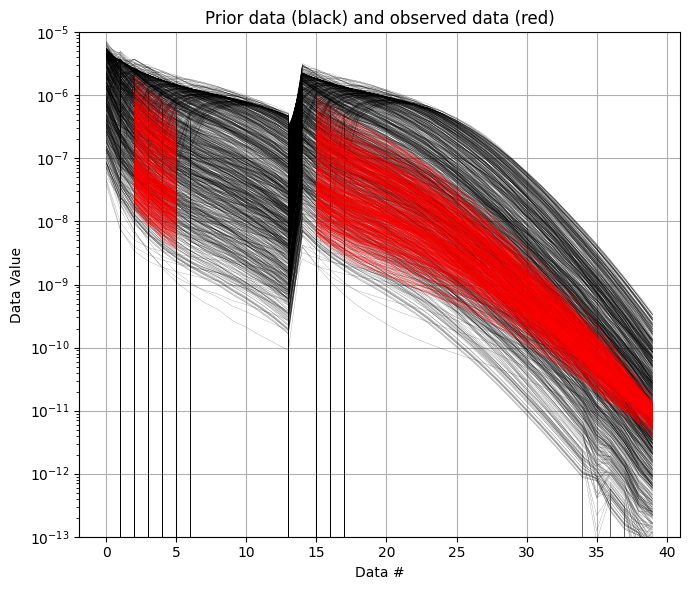

True

In [6]:
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,alpha=1, ylim=[1e-13,1e-5], hardcopy=hardcopy)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [7]:
N_use = N
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                   f_data_h5, 
                                   N_use = N_use, 
                                   showInfo=1, 
                                   Ncpu = 10,
                                   parallel=parallel)

File /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5 allready exists
Overwriting...
Loading data from ESBJERG_ALL.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 28061/40 data
Loading prior data from PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]
  - /D1:  N,nd = 50000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=ESBJERG_ALL.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


Rejection Sampling:   0%|                                                                          | 0/2807 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                 | 7/2807 [00:00<00:40, 68.37it/s]

Rejection Sampling:   0%|                                                                          | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                 | 7/2806 [00:00<00:44, 62.29it/s]

Rejection Sampling:   0%|                                                                          | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                  | 5/2806 [00:00<01:00, 46.51it/s]

Rejection Sampling:   0%|                                                                          | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▎                                                                | 14/2807 [00:00<00:47, 58.57it/s]

Rejection Sampling:   0%|▏                                                                 | 6/2806 [00:00<00:55, 50.90it/s]

Rejection Sampling:   0%|                                                                          | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                  | 5/2806 [00:00<01:01, 45.23it/s]

Rejection Sampling:   0%|▏                                                                | 10/2806 [00:00<01:02, 44.90it/s]

Rejection Sampling:   0%|▎                                                                | 14/2806 [00:00<00:58, 47.83it/s]

Rejection Sampling:   0%|                                                                  | 5/2806 [00:00<01:06, 42.44it/s]

Rejection Sampling:   0%|                                                                          | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   1%|▍                                                                | 20/2807 [00:00<00:56, 49.19it/s]

Rejection Sampling:   0%|                                                                  | 4/2806 [00:00<01:12, 38.52it/s]

Rejection Sampling:   0%|▎                                                                | 12/2806 [00:00<01:04, 43.57it/s]

Rejection Sampling:   0%|▏                                                                | 10/2806 [00:00<01:08, 40.94it/s]

Rejection Sampling:   1%|▎                                                                | 15/2806 [00:00<01:07, 41.35it/s]

Rejection Sampling:   0%|                                                                          | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   1%|▍                                                                | 19/2806 [00:00<01:04, 43.41it/s]

Rejection Sampling:   0%|                                                                  | 4/2806 [00:00<01:18, 35.71it/s]

Rejection Sampling:   0%|▏                                                                | 10/2806 [00:00<01:11, 39.00it/s]

Rejection Sampling:   0%|                                                                          | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   1%|▌                                                                | 26/2807 [00:00<01:04, 43.14it/s]

Rejection Sampling:   1%|▎                                                                | 15/2806 [00:00<01:13, 38.15it/s]

Rejection Sampling:   0%|▏                                                                 | 8/2806 [00:00<01:42, 27.39it/s]

Rejection Sampling:   0%|                                                                  | 4/2806 [00:00<01:24, 33.27it/s]

Rejection Sampling:   1%|▍                                                                | 20/2806 [00:00<01:12, 38.46it/s]

Rejection Sampling:   0%|▎                                                                | 14/2806 [00:00<01:14, 37.29it/s]

Rejection Sampling:   1%|▌                                                                | 24/2806 [00:00<01:09, 40.05it/s]

Rejection Sampling:   0%|▏                                                                 | 8/2806 [00:00<01:28, 31.75it/s]

Rejection Sampling:   1%|▍                                                                | 17/2806 [00:00<01:30, 30.81it/s]

Rejection Sampling:   0%|                                                                  | 2/2806 [00:00<03:07, 14.93it/s]

Rejection Sampling:   0%|▎                                                                | 12/2806 [00:00<01:32, 30.22it/s]

Rejection Sampling:   0%|▏                                                                 | 8/2806 [00:00<01:22, 34.11it/s]

Rejection Sampling:   1%|▋                                                                | 31/2807 [00:00<01:08, 40.52it/s]

Rejection Sampling:   1%|▍                                                                | 18/2806 [00:00<01:16, 36.25it/s]

Rejection Sampling:   0%|▎                                                                | 12/2806 [00:00<01:25, 32.54it/s]

Rejection Sampling:   1%|▌                                                                | 24/2806 [00:00<01:20, 34.64it/s]

Rejection Sampling:   1%|▍                                                                | 19/2806 [00:00<01:32, 30.05it/s]

Rejection Sampling:   1%|▍                                                                | 21/2806 [00:00<01:26, 32.06it/s]

Rejection Sampling:   1%|▋                                                                | 29/2806 [00:00<01:15, 36.90it/s]

Rejection Sampling:   0%|                                                                  | 4/2806 [00:00<02:51, 16.35it/s]

Rejection Sampling:   1%|▎                                                                | 16/2806 [00:00<01:29, 31.28it/s]

Rejection Sampling:   1%|▌                                                                | 22/2806 [00:00<01:18, 35.52it/s]

Rejection Sampling:   1%|▊                                                                | 36/2807 [00:00<01:12, 38.24it/s]

Rejection Sampling:   1%|▋                                                                | 28/2806 [00:00<01:20, 34.50it/s]

Rejection Sampling:   1%|▌                                                                | 25/2806 [00:00<01:24, 32.95it/s]

Rejection Sampling:   1%|▌                                                                | 23/2806 [00:00<01:28, 31.35it/s]

Rejection Sampling:   1%|▊                                                                | 33/2806 [00:00<01:16, 36.19it/s]

Rejection Sampling:   0%|▏                                                                 | 8/2806 [00:00<01:54, 24.42it/s]

Rejection Sampling:   1%|▍                                                                | 20/2806 [00:00<01:29, 31.11it/s]

Rejection Sampling:   1%|▎                                                                | 16/2806 [00:00<01:49, 25.54it/s]

Rejection Sampling:   0%|▎                                                                | 12/2806 [00:00<02:05, 22.18it/s]

Rejection Sampling:   1%|▌                                                                | 26/2806 [00:00<01:18, 35.20it/s]

Rejection Sampling:   1%|▋                                                                | 32/2806 [00:00<01:20, 34.41it/s]

Rejection Sampling:   1%|▉                                                                | 40/2807 [00:00<01:14, 37.08it/s]

Rejection Sampling:   1%|▋                                                                | 27/2806 [00:00<01:25, 32.39it/s]

Rejection Sampling:   1%|▋                                                                | 29/2806 [00:00<01:26, 32.17it/s]

Rejection Sampling:   1%|▊                                                                | 37/2806 [00:00<01:18, 35.43it/s]

Rejection Sampling:   0%|▎                                                                | 11/2806 [00:00<01:54, 24.48it/s]

Rejection Sampling:   1%|▍                                                                | 19/2806 [00:00<01:47, 26.04it/s]

Rejection Sampling:   1%|▌                                                                | 24/2806 [00:00<01:26, 32.02it/s]

Rejection Sampling:   1%|▋                                                                | 30/2806 [00:00<01:18, 35.19it/s]

Rejection Sampling:   2%|█                                                                | 44/2807 [00:01<01:16, 36.29it/s]

Rejection Sampling:   1%|▊                                                                | 36/2806 [00:00<01:20, 34.35it/s]

Rejection Sampling:   1%|▋                                                                | 31/2806 [00:00<01:22, 33.49it/s]

Rejection Sampling:   1%|▊                                                                | 33/2806 [00:00<01:24, 32.84it/s]

Rejection Sampling:   1%|▉                                                                | 41/2806 [00:01<01:18, 35.15it/s]

Rejection Sampling:   1%|▎                                                                | 15/2806 [00:00<02:23, 19.48it/s]

Rejection Sampling:   1%|▋                                                                | 28/2806 [00:00<01:24, 32.97it/s]

Rejection Sampling:   1%|▌                                                                | 23/2806 [00:00<01:38, 28.33it/s]

Rejection Sampling:   0%|▎                                                                | 14/2806 [00:00<02:02, 22.87it/s]

Rejection Sampling:   1%|▊                                                                | 35/2806 [00:01<01:19, 34.67it/s]

Rejection Sampling:   1%|▉                                                                | 40/2806 [00:01<01:19, 34.58it/s]

Rejection Sampling:   2%|█                                                                | 48/2807 [00:01<01:16, 35.93it/s]

Rejection Sampling:   2%|█                                                                | 45/2806 [00:01<01:18, 35.05it/s]

Rejection Sampling:   1%|▊                                                                | 34/2806 [00:01<01:32, 30.07it/s]

Rejection Sampling:   1%|▋                                                                | 32/2806 [00:00<01:23, 33.08it/s]

Rejection Sampling:   1%|▊                                                                | 37/2806 [00:01<01:35, 28.90it/s]

Rejection Sampling:   1%|▍                                                                | 18/2806 [00:00<01:44, 26.70it/s]

Rejection Sampling:   1%|▉                                                                | 39/2806 [00:01<01:21, 34.03it/s]

Rejection Sampling:   2%|█                                                                | 44/2806 [00:01<01:21, 34.00it/s]

Rejection Sampling:   2%|█▏                                                               | 52/2807 [00:01<01:18, 34.97it/s]

Rejection Sampling:   1%|▍                                                                | 18/2806 [00:00<02:34, 18.00it/s]

Rejection Sampling:   2%|█▏                                                               | 49/2806 [00:01<01:20, 34.15it/s]

Rejection Sampling:   1%|▌                                                                | 26/2806 [00:01<02:01, 22.91it/s]

Rejection Sampling:   1%|▉                                                                | 38/2806 [00:01<01:31, 30.29it/s]

Rejection Sampling:   1%|▉                                                                | 41/2806 [00:01<01:31, 30.07it/s]

Rejection Sampling:   1%|▊                                                                | 36/2806 [00:01<01:23, 33.08it/s]

Rejection Sampling:   1%|▌                                                                | 22/2806 [00:00<01:36, 28.77it/s]

Rejection Sampling:   2%|█▎                                                               | 56/2807 [00:01<01:20, 34.39it/s]

Rejection Sampling:   2%|▉                                                                | 43/2806 [00:01<01:21, 33.70it/s]

Rejection Sampling:   2%|█                                                                | 48/2806 [00:01<01:21, 33.68it/s]

Rejection Sampling:   1%|▍                                                                | 20/2806 [00:00<02:38, 17.59it/s]

Rejection Sampling:   2%|█▏                                                               | 53/2806 [00:01<01:21, 33.94it/s]

Rejection Sampling:   1%|▋                                                                | 29/2806 [00:01<01:54, 24.17it/s]

Rejection Sampling:   1%|▉                                                                | 42/2806 [00:01<01:31, 30.35it/s]

Rejection Sampling:   1%|▉                                                                | 40/2806 [00:01<01:23, 33.04it/s]

Rejection Sampling:   1%|▌                                                                | 26/2806 [00:00<01:32, 30.10it/s]

Rejection Sampling:   2%|█                                                                | 45/2806 [00:01<01:31, 30.23it/s]

Rejection Sampling:   2%|█                                                                | 47/2806 [00:01<01:21, 33.70it/s]

Rejection Sampling:   2%|█▏                                                               | 52/2806 [00:01<01:21, 33.64it/s]

Rejection Sampling:   2%|█▍                                                               | 60/2807 [00:01<01:23, 33.08it/s]

Rejection Sampling:   1%|▌                                                                | 22/2806 [00:01<02:44, 16.94it/s]

Rejection Sampling:   1%|▊                                                                | 33/2806 [00:01<01:42, 26.97it/s]

Rejection Sampling:   2%|█                                                                | 46/2806 [00:01<01:27, 31.42it/s]

Rejection Sampling:   1%|▋                                                                | 30/2806 [00:01<01:28, 31.30it/s]

Rejection Sampling:   2%|█▏                                                               | 49/2806 [00:01<01:26, 31.94it/s]

Rejection Sampling:   2%|█▎                                                               | 57/2806 [00:01<01:33, 29.50it/s]

Rejection Sampling:   2%|█▏                                                               | 51/2806 [00:01<01:21, 33.62it/s]

Rejection Sampling:   2%|█▎                                                               | 56/2806 [00:01<01:21, 33.62it/s]

Rejection Sampling:   2%|█▍                                                               | 64/2807 [00:01<01:20, 34.17it/s]

Rejection Sampling:   2%|█                                                                | 44/2806 [00:01<01:31, 30.02it/s]

Rejection Sampling:   1%|▌                                                                | 24/2806 [00:01<02:46, 16.71it/s]

Rejection Sampling:   1%|▊                                                                | 36/2806 [00:01<01:45, 26.36it/s]

Rejection Sampling:   2%|█▏                                                               | 50/2806 [00:01<01:26, 31.90it/s]

Rejection Sampling:   2%|█▏                                                               | 53/2806 [00:01<01:25, 32.36it/s]

Rejection Sampling:   1%|▊                                                                | 34/2806 [00:01<01:26, 31.87it/s]

Rejection Sampling:   2%|█▍                                                               | 61/2806 [00:01<01:32, 29.82it/s]

Rejection Sampling:   2%|█▎                                                               | 55/2806 [00:01<01:22, 33.48it/s]

Rejection Sampling:   2%|█▍                                                               | 60/2806 [00:01<01:22, 33.46it/s]

Rejection Sampling:   2%|█                                                                | 48/2806 [00:01<01:26, 31.78it/s]

Rejection Sampling:   1%|▉                                                                | 40/2806 [00:01<01:37, 28.31it/s]

Rejection Sampling:   1%|▌                                                                | 26/2806 [00:01<02:49, 16.39it/s]

Rejection Sampling:   2%|█▌                                                               | 68/2807 [00:01<01:32, 29.46it/s]

Rejection Sampling:   2%|█▎                                                               | 54/2806 [00:01<01:25, 32.25it/s]

Rejection Sampling:   2%|█▌                                                               | 65/2806 [00:01<01:27, 31.36it/s]

Rejection Sampling:   2%|█▎                                                               | 57/2806 [00:01<01:24, 32.38it/s]

Rejection Sampling:   1%|▉                                                                | 38/2806 [00:01<01:26, 32.08it/s]

Rejection Sampling:   2%|█▎                                                               | 59/2806 [00:01<01:22, 33.16it/s]

Rejection Sampling:   2%|█▏                                                               | 52/2806 [00:01<01:25, 32.03it/s]

Rejection Sampling:   2%|█                                                                | 44/2806 [00:01<01:33, 29.45it/s]

Rejection Sampling:   1%|▋                                                                | 28/2806 [00:01<02:51, 16.17it/s]

Rejection Sampling:   3%|█▋                                                               | 72/2807 [00:01<01:30, 30.28it/s]

Rejection Sampling:   2%|█▎                                                               | 58/2806 [00:01<01:25, 32.30it/s]

Rejection Sampling:   2%|█▌                                                               | 69/2806 [00:01<01:26, 31.69it/s]

Rejection Sampling:   2%|█▍                                                               | 61/2806 [00:01<01:24, 32.43it/s]

Rejection Sampling:   1%|▉                                                                | 42/2806 [00:01<01:25, 32.21it/s]

Rejection Sampling:   2%|█▍                                                               | 64/2806 [00:01<01:41, 26.96it/s]

Rejection Sampling:   2%|█▍                                                               | 63/2806 [00:01<01:22, 33.12it/s]

Rejection Sampling:   2%|█▎                                                               | 56/2806 [00:01<01:25, 32.35it/s]

Rejection Sampling:   1%|▋                                                                | 30/2806 [00:01<02:53, 15.97it/s]

Rejection Sampling:   3%|█▊                                                               | 76/2807 [00:02<01:27, 31.12it/s]

Rejection Sampling:   2%|█▍                                                               | 62/2806 [00:01<01:24, 32.59it/s]

Rejection Sampling:   2%|█                                                                | 48/2806 [00:01<01:42, 26.93it/s]

Rejection Sampling:   2%|█▌                                                               | 65/2806 [00:01<01:23, 32.75it/s]

Rejection Sampling:   2%|█▌                                                               | 68/2806 [00:02<01:35, 28.69it/s]

Rejection Sampling:   2%|█                                                                | 46/2806 [00:01<01:24, 32.63it/s]

Rejection Sampling:   2%|█▌                                                               | 67/2806 [00:01<01:22, 33.27it/s]

Rejection Sampling:   2%|█▍                                                               | 60/2806 [00:01<01:23, 32.71it/s]

Rejection Sampling:   3%|█▋                                                               | 73/2806 [00:02<01:40, 27.23it/s]

Rejection Sampling:   1%|▋                                                                | 32/2806 [00:01<02:53, 15.95it/s]

Rejection Sampling:   3%|█▊                                                               | 80/2807 [00:02<01:25, 31.88it/s]

Rejection Sampling:   2%|█▌                                                               | 66/2806 [00:01<01:23, 32.95it/s]

Rejection Sampling:   2%|█▌                                                               | 69/2806 [00:02<01:22, 33.04it/s]

Rejection Sampling:   2%|█▏                                                               | 50/2806 [00:01<01:23, 32.95it/s]

Rejection Sampling:   3%|█▋                                                               | 72/2806 [00:02<01:31, 30.02it/s]

Rejection Sampling:   3%|█▋                                                               | 71/2806 [00:02<01:21, 33.57it/s]

Rejection Sampling:   2%|█▍                                                               | 64/2806 [00:01<01:22, 33.17it/s]

Rejection Sampling:   2%|█▏                                                               | 51/2806 [00:01<01:58, 23.33it/s]

Rejection Sampling:   3%|█▊                                                               | 77/2806 [00:02<01:32, 29.64it/s]

Rejection Sampling:   2%|█▌                                                               | 70/2806 [00:02<01:21, 33.48it/s]

Rejection Sampling:   3%|█▉                                                               | 84/2807 [00:02<01:23, 32.67it/s]

Rejection Sampling:   1%|▊                                                                | 34/2806 [00:01<02:58, 15.51it/s]

Rejection Sampling:   2%|█▎                                                               | 54/2806 [00:01<01:21, 33.59it/s]

Rejection Sampling:   3%|█▋                                                               | 73/2806 [00:02<01:24, 32.26it/s]

Rejection Sampling:   3%|█▋                                                               | 75/2806 [00:02<01:20, 33.79it/s]

Rejection Sampling:   2%|█▌                                                               | 68/2806 [00:02<01:21, 33.52it/s]

Rejection Sampling:   3%|█▉                                                               | 81/2806 [00:02<01:26, 31.51it/s]

Rejection Sampling:   2%|█▎                                                               | 54/2806 [00:02<01:55, 23.82it/s]

Rejection Sampling:   3%|█▋                                                               | 74/2806 [00:02<01:20, 33.75it/s]

Rejection Sampling:   3%|██                                                               | 88/2807 [00:02<01:21, 33.17it/s]

Rejection Sampling:   3%|█▊                                                               | 76/2806 [00:02<01:47, 25.28it/s]

Rejection Sampling:   2%|█▎                                                               | 58/2806 [00:01<01:21, 33.86it/s]

Rejection Sampling:   1%|▊                                                                | 36/2806 [00:02<03:00, 15.32it/s]

Rejection Sampling:   3%|█▊                                                               | 77/2806 [00:02<01:22, 33.17it/s]

Rejection Sampling:   3%|█▋                                                               | 72/2806 [00:02<01:20, 33.83it/s]

Rejection Sampling:   3%|█▉                                                               | 85/2806 [00:02<01:24, 32.37it/s]

Rejection Sampling:   2%|█▎                                                               | 57/2806 [00:02<01:54, 24.09it/s]

Rejection Sampling:   3%|█▊                                                               | 79/2806 [00:02<01:28, 30.70it/s]

Rejection Sampling:   3%|██▏                                                              | 92/2807 [00:02<01:20, 33.53it/s]

Rejection Sampling:   3%|█▊                                                               | 78/2806 [00:02<01:20, 33.93it/s]

Rejection Sampling:   3%|█▊                                                               | 79/2806 [00:02<01:50, 24.67it/s]

Rejection Sampling:   2%|█▍                                                               | 62/2806 [00:02<01:20, 33.88it/s]

Rejection Sampling:   3%|█▉                                                               | 81/2806 [00:02<01:21, 33.56it/s]

Rejection Sampling:   1%|▉                                                                | 38/2806 [00:02<03:02, 15.18it/s]

Rejection Sampling:   3%|█▊                                                               | 76/2806 [00:02<01:20, 33.86it/s]

Rejection Sampling:   2%|█▍                                                               | 61/2806 [00:02<01:42, 26.74it/s]

Rejection Sampling:   3%|█▉                                                               | 83/2806 [00:02<01:25, 32.02it/s]

Rejection Sampling:   3%|█▉                                                               | 82/2806 [00:02<01:20, 33.71it/s]

Rejection Sampling:   3%|██▏                                                              | 96/2807 [00:02<01:21, 33.39it/s]

Rejection Sampling:   3%|█▉                                                               | 83/2806 [00:02<01:41, 26.74it/s]

Rejection Sampling:   2%|█▌                                                               | 66/2806 [00:02<01:21, 33.53it/s]

Rejection Sampling:   3%|██                                                               | 89/2806 [00:02<01:35, 28.34it/s]

Rejection Sampling:   3%|█▉                                                               | 85/2806 [00:02<01:19, 34.27it/s]

Rejection Sampling:   3%|█▊                                                               | 80/2806 [00:02<01:21, 33.46it/s]

Rejection Sampling:   1%|▉                                                                | 40/2806 [00:02<03:03, 15.06it/s]

Rejection Sampling:   2%|█▌                                                               | 65/2806 [00:02<01:34, 28.93it/s]

Rejection Sampling:   4%|██▎                                                             | 100/2807 [00:02<01:21, 33.25it/s]

Rejection Sampling:   3%|█▉                                                               | 86/2806 [00:02<01:21, 33.42it/s]

Rejection Sampling:   3%|██                                                               | 89/2806 [00:02<01:19, 34.02it/s]

Rejection Sampling:   2%|█▌                                                               | 70/2806 [00:02<01:21, 33.43it/s]

Rejection Sampling:   3%|██                                                               | 87/2806 [00:02<01:35, 28.47it/s]

Rejection Sampling:   3%|██▏                                                              | 93/2806 [00:02<01:36, 27.99it/s]

Rejection Sampling:   3%|█▉                                                               | 84/2806 [00:02<01:21, 33.33it/s]

Rejection Sampling:   3%|██                                                               | 87/2806 [00:02<01:41, 26.74it/s]

Rejection Sampling:   1%|▉                                                                | 42/2806 [00:02<03:03, 15.05it/s]

Rejection Sampling:   2%|█▌                                                               | 69/2806 [00:02<01:30, 30.24it/s]

Rejection Sampling:   4%|██▎                                                             | 104/2807 [00:02<01:20, 33.47it/s]

Rejection Sampling:   3%|██                                                               | 90/2806 [00:02<01:20, 33.57it/s]

Rejection Sampling:   3%|██▏                                                              | 93/2806 [00:02<01:19, 34.15it/s]

Rejection Sampling:   3%|█▋                                                               | 74/2806 [00:02<01:20, 33.75it/s]

Rejection Sampling:   3%|██▏                                                              | 97/2806 [00:02<01:31, 29.50it/s]

Rejection Sampling:   3%|██                                                               | 88/2806 [00:02<01:20, 33.76it/s]

Rejection Sampling:   3%|█▋                                                               | 73/2806 [00:02<01:27, 31.38it/s]

Rejection Sampling:   2%|█                                                                | 45/2806 [00:02<02:36, 17.60it/s]

Rejection Sampling:   3%|██                                                               | 90/2806 [00:02<01:55, 23.61it/s]

Rejection Sampling:   4%|██▍                                                             | 108/2807 [00:03<01:20, 33.58it/s]

Rejection Sampling:   3%|██▏                                                              | 94/2806 [00:02<01:20, 33.67it/s]

Rejection Sampling:   3%|██                                                               | 90/2806 [00:02<02:00, 22.45it/s]

Rejection Sampling:   3%|█▊                                                               | 78/2806 [00:02<01:20, 33.79it/s]

Rejection Sampling:   3%|██▏                                                              | 97/2806 [00:02<01:19, 33.95it/s]

Rejection Sampling:   4%|██▎                                                             | 101/2806 [00:03<01:28, 30.64it/s]

Rejection Sampling:   3%|██▏                                                              | 92/2806 [00:02<01:20, 33.71it/s]

Rejection Sampling:   2%|█                                                                | 47/2806 [00:02<02:36, 17.64it/s]

Rejection Sampling:   3%|█▊                                                               | 77/2806 [00:02<01:24, 32.14it/s]

Rejection Sampling:   3%|██▏                                                              | 94/2806 [00:03<01:43, 26.21it/s]

Rejection Sampling:   4%|██▌                                                             | 112/2807 [00:03<01:19, 33.71it/s]

Rejection Sampling:   3%|██▎                                                              | 98/2806 [00:02<01:20, 33.77it/s]

Rejection Sampling:   4%|██▎                                                             | 101/2806 [00:03<01:19, 33.92it/s]

Rejection Sampling:   3%|█▉                                                               | 82/2806 [00:02<01:20, 33.68it/s]

Rejection Sampling:   3%|█▉                                                               | 81/2806 [00:02<01:23, 32.58it/s]

Rejection Sampling:   2%|█▏                                                               | 51/2806 [00:02<02:05, 22.00it/s]

Rejection Sampling:   4%|██▍                                                             | 105/2806 [00:03<01:31, 29.46it/s]

Rejection Sampling:   3%|██▏                                                              | 93/2806 [00:03<02:12, 20.42it/s]

Rejection Sampling:   3%|██▎                                                              | 98/2806 [00:03<01:35, 28.48it/s]

Rejection Sampling:   4%|██▋                                                             | 116/2807 [00:03<01:19, 33.65it/s]

Rejection Sampling:   4%|██▎                                                             | 102/2806 [00:03<01:20, 33.70it/s]

Rejection Sampling:   3%|██▏                                                              | 96/2806 [00:03<01:34, 28.60it/s]

Rejection Sampling:   4%|██▍                                                             | 105/2806 [00:03<01:19, 33.77it/s]

Rejection Sampling:   3%|█▉                                                               | 86/2806 [00:02<01:20, 33.62it/s]

Rejection Sampling:   3%|█▉                                                               | 85/2806 [00:03<01:23, 32.59it/s]

Rejection Sampling:   3%|██▏                                                              | 97/2806 [00:03<01:55, 23.48it/s]

Rejection Sampling:   4%|██▎                                                             | 102/2806 [00:03<01:28, 30.44it/s]

Rejection Sampling:   4%|██▍                                                             | 109/2806 [00:03<01:28, 30.34it/s]

Rejection Sampling:   4%|██▋                                                             | 120/2807 [00:03<01:20, 33.30it/s]

Rejection Sampling:   4%|██▍                                                             | 106/2806 [00:03<01:20, 33.34it/s]

Rejection Sampling:   2%|█▎                                                               | 54/2806 [00:02<02:10, 21.11it/s]

Rejection Sampling:   4%|██▎                                                              | 99/2806 [00:03<01:42, 26.43it/s]

Rejection Sampling:   4%|██▍                                                             | 109/2806 [00:03<01:20, 33.40it/s]

Rejection Sampling:   3%|██                                                               | 90/2806 [00:02<01:21, 33.26it/s]

Rejection Sampling:   3%|██                                                               | 89/2806 [00:03<01:23, 32.71it/s]

Rejection Sampling:   4%|██▎                                                             | 101/2806 [00:03<01:44, 25.84it/s]

Rejection Sampling:   4%|██▍                                                             | 106/2806 [00:03<01:31, 29.64it/s]

Rejection Sampling:   4%|██▊                                                             | 124/2807 [00:03<01:20, 33.36it/s]

Rejection Sampling:   4%|██▌                                                             | 110/2806 [00:03<01:20, 33.38it/s]

Rejection Sampling:   4%|██▌                                                             | 113/2806 [00:03<01:20, 33.49it/s]

Rejection Sampling:   4%|██▎                                                             | 103/2806 [00:03<01:35, 28.27it/s]

Rejection Sampling:   3%|██▏                                                              | 94/2806 [00:03<01:21, 33.39it/s]

Rejection Sampling:   2%|█▎                                                               | 57/2806 [00:03<02:12, 20.77it/s]

Rejection Sampling:   3%|██▏                                                              | 93/2806 [00:03<01:22, 33.08it/s]

Rejection Sampling:   4%|██▌                                                             | 113/2806 [00:03<01:56, 23.17it/s]

Rejection Sampling:   5%|██▉                                                             | 128/2807 [00:03<01:20, 33.45it/s]

Rejection Sampling:   4%|██▌                                                             | 114/2806 [00:03<01:20, 33.46it/s]

Rejection Sampling:   2%|█▍                                                               | 61/2806 [00:03<01:53, 24.23it/s]

Rejection Sampling:   4%|██▌                                                             | 110/2806 [00:03<01:35, 28.22it/s]

Rejection Sampling:   4%|██▋                                                             | 117/2806 [00:03<01:20, 33.40it/s]

Rejection Sampling:   4%|██▍                                                             | 107/2806 [00:03<01:31, 29.65it/s]

Rejection Sampling:   3%|██▎                                                              | 98/2806 [00:03<01:21, 33.36it/s]

Rejection Sampling:   4%|██▎                                                             | 104/2806 [00:03<02:03, 21.89it/s]

Rejection Sampling:   3%|██▏                                                              | 97/2806 [00:03<01:22, 32.93it/s]

Rejection Sampling:   5%|███                                                             | 132/2807 [00:03<01:20, 33.18it/s]

Rejection Sampling:   4%|██▋                                                             | 118/2806 [00:03<01:21, 33.18it/s]

Rejection Sampling:   4%|██▌                                                             | 114/2806 [00:03<01:31, 29.41it/s]

Rejection Sampling:   4%|██▊                                                             | 121/2806 [00:03<01:21, 33.15it/s]

Rejection Sampling:   2%|█▌                                                               | 65/2806 [00:03<01:43, 26.60it/s]

Rejection Sampling:   4%|██▎                                                             | 102/2806 [00:03<01:21, 33.12it/s]

Rejection Sampling:   4%|██▌                                                             | 111/2806 [00:03<01:28, 30.47it/s]

Rejection Sampling:   4%|██▋                                                             | 116/2806 [00:03<02:06, 21.33it/s]

Rejection Sampling:   4%|██▎                                                             | 101/2806 [00:03<01:22, 32.94it/s]

Rejection Sampling:   4%|██▍                                                             | 107/2806 [00:03<02:14, 20.02it/s]

Rejection Sampling:   5%|███                                                             | 136/2807 [00:03<01:20, 33.09it/s]

Rejection Sampling:   4%|██▊                                                             | 122/2806 [00:03<01:21, 33.11it/s]

Rejection Sampling:   4%|██▋                                                             | 118/2806 [00:03<01:28, 30.41it/s]

Rejection Sampling:   2%|█▌                                                               | 69/2806 [00:03<01:36, 28.43it/s]

Rejection Sampling:   4%|██▍                                                             | 106/2806 [00:03<01:21, 33.08it/s]

Rejection Sampling:   4%|██▌                                                             | 115/2806 [00:03<01:26, 31.20it/s]

Rejection Sampling:   4%|██▋                                                             | 120/2806 [00:03<01:50, 24.33it/s]

Rejection Sampling:   4%|██▍                                                             | 105/2806 [00:03<01:22, 32.93it/s]

Rejection Sampling:   5%|███▏                                                            | 140/2807 [00:04<01:20, 33.06it/s]

Rejection Sampling:   4%|██▊                                                             | 126/2806 [00:03<01:21, 33.05it/s]

Rejection Sampling:   3%|█▋                                                               | 73/2806 [00:03<01:31, 29.71it/s]

Rejection Sampling:   4%|██▋                                                             | 119/2806 [00:03<01:24, 31.69it/s]

Rejection Sampling:   4%|██▊                                                             | 124/2806 [00:03<01:38, 27.22it/s]

Rejection Sampling:   4%|██▌                                                             | 110/2806 [00:03<01:21, 33.00it/s]

Rejection Sampling:   4%|██▊                                                             | 122/2806 [00:03<01:26, 31.08it/s]

Rejection Sampling:   4%|██▊                                                             | 125/2806 [00:03<01:47, 24.90it/s]

Rejection Sampling:   4%|██▌                                                             | 110/2806 [00:03<02:20, 19.18it/s]

Rejection Sampling:   4%|██▍                                                             | 109/2806 [00:03<01:21, 33.20it/s]

Rejection Sampling:   5%|███▎                                                            | 144/2807 [00:04<01:19, 33.42it/s]

Rejection Sampling:   5%|██▉                                                             | 130/2806 [00:03<01:20, 33.42it/s]

Rejection Sampling:   5%|██▉                                                             | 128/2806 [00:04<01:31, 29.17it/s]

Rejection Sampling:   3%|█▊                                                               | 77/2806 [00:03<01:27, 31.12it/s]

Rejection Sampling:   4%|██▌                                                             | 114/2806 [00:03<01:20, 33.48it/s]

Rejection Sampling:   4%|██▊                                                             | 123/2806 [00:03<01:26, 31.11it/s]

Rejection Sampling:   4%|██▊                                                             | 126/2806 [00:04<01:29, 29.93it/s]

Rejection Sampling:   4%|██▌                                                             | 113/2806 [00:03<01:20, 33.36it/s]

Rejection Sampling:   5%|███▎                                                            | 148/2807 [00:04<01:19, 33.34it/s]

Rejection Sampling:   5%|███                                                             | 134/2806 [00:04<01:20, 33.33it/s]

Rejection Sampling:   4%|██▌                                                             | 113/2806 [00:04<02:31, 17.78it/s]

Rejection Sampling:   5%|██▉                                                             | 128/2806 [00:04<02:05, 21.36it/s]

Rejection Sampling:   5%|███                                                             | 132/2806 [00:04<01:28, 30.23it/s]

Rejection Sampling:   3%|█▉                                                               | 81/2806 [00:03<01:26, 31.67it/s]

Rejection Sampling:   4%|██▋                                                             | 118/2806 [00:03<01:20, 33.34it/s]

Rejection Sampling:   5%|██▉                                                             | 127/2806 [00:04<01:23, 32.00it/s]

Rejection Sampling:   5%|██▉                                                             | 130/2806 [00:04<01:27, 30.73it/s]

Rejection Sampling:   4%|██▋                                                             | 117/2806 [00:03<01:20, 33.21it/s]

Rejection Sampling:   5%|██▉                                                             | 131/2806 [00:04<01:56, 23.04it/s]

Rejection Sampling:   5%|███▍                                                            | 152/2807 [00:04<01:19, 33.22it/s]

Rejection Sampling:   5%|███▏                                                            | 138/2806 [00:04<01:20, 33.22it/s]

Rejection Sampling:   4%|██▌                                                             | 115/2806 [00:04<02:37, 17.10it/s]

Rejection Sampling:   5%|███                                                             | 136/2806 [00:04<01:25, 31.15it/s]

Rejection Sampling:   4%|██▊                                                             | 122/2806 [00:03<01:20, 33.37it/s]

Rejection Sampling:   5%|██▉                                                             | 131/2806 [00:04<01:22, 32.55it/s]

Rejection Sampling:   3%|█▉                                                               | 85/2806 [00:03<01:27, 31.22it/s]

Rejection Sampling:   4%|██▊                                                             | 121/2806 [00:04<01:19, 33.61it/s]

Rejection Sampling:   5%|███                                                             | 135/2806 [00:04<01:42, 26.14it/s]

Rejection Sampling:   6%|███▌                                                            | 156/2807 [00:04<01:18, 33.76it/s]

Rejection Sampling:   5%|███                                                             | 134/2806 [00:04<01:35, 27.91it/s]

Rejection Sampling:   5%|███▏                                                            | 142/2806 [00:04<01:18, 33.76it/s]

Rejection Sampling:   4%|██▊                                                             | 126/2806 [00:03<01:19, 33.73it/s]

Rejection Sampling:   5%|███                                                             | 135/2806 [00:04<01:20, 33.36it/s]

Rejection Sampling:   4%|██▋                                                             | 117/2806 [00:04<02:43, 16.42it/s]

Rejection Sampling:   5%|███▏                                                            | 140/2806 [00:04<01:30, 29.34it/s]

Rejection Sampling:   4%|██▊                                                             | 125/2806 [00:04<01:19, 33.71it/s]

Rejection Sampling:   5%|███▏                                                            | 139/2806 [00:04<01:32, 28.91it/s]

Rejection Sampling:   6%|███▋                                                            | 160/2807 [00:04<01:18, 33.69it/s]

Rejection Sampling:   5%|███▎                                                            | 146/2806 [00:04<01:18, 33.69it/s]

Rejection Sampling:   5%|███▏                                                            | 138/2806 [00:04<01:30, 29.37it/s]

Rejection Sampling:   3%|██                                                               | 89/2806 [00:04<01:46, 25.57it/s]

Rejection Sampling:   5%|███▏                                                            | 139/2806 [00:04<01:20, 33.05it/s]

Rejection Sampling:   5%|██▉                                                             | 130/2806 [00:04<01:22, 32.45it/s]

Rejection Sampling:   4%|██▋                                                             | 119/2806 [00:04<02:46, 16.15it/s]

Rejection Sampling:   5%|███▎                                                            | 144/2806 [00:04<01:25, 31.18it/s]

Rejection Sampling:   5%|███▎                                                            | 143/2806 [00:04<01:27, 30.42it/s]

Rejection Sampling:   5%|██▉                                                             | 129/2806 [00:04<01:19, 33.72it/s]

Rejection Sampling:   6%|███▋                                                            | 164/2807 [00:04<01:18, 33.71it/s]

Rejection Sampling:   5%|███▍                                                            | 150/2806 [00:04<01:18, 33.73it/s]

Rejection Sampling:   3%|██▏                                                              | 93/2806 [00:04<01:38, 27.59it/s]

Rejection Sampling:   5%|███▎                                                            | 143/2806 [00:04<01:20, 33.19it/s]

Rejection Sampling:   5%|███▍                                                            | 148/2806 [00:04<01:23, 32.00it/s]

Rejection Sampling:   4%|██▊                                                             | 121/2806 [00:04<02:46, 16.08it/s]

Rejection Sampling:   5%|███                                                             | 134/2806 [00:04<01:24, 31.58it/s]

Rejection Sampling:   5%|███                                                             | 133/2806 [00:04<01:19, 33.73it/s]

Rejection Sampling:   5%|███▎                                                            | 147/2806 [00:04<01:24, 31.35it/s]

Rejection Sampling:   5%|███▏                                                            | 142/2806 [00:04<01:44, 25.41it/s]

Rejection Sampling:   6%|███▊                                                            | 168/2807 [00:04<01:18, 33.79it/s]

Rejection Sampling:   5%|███▌                                                            | 154/2806 [00:04<01:18, 33.81it/s]

Rejection Sampling:   3%|██▏                                                              | 97/2806 [00:04<01:32, 29.27it/s]

Rejection Sampling:   5%|███▎                                                            | 147/2806 [00:04<01:18, 33.79it/s]

Rejection Sampling:   5%|███▍                                                            | 152/2806 [00:04<01:21, 32.52it/s]

Rejection Sampling:   4%|██▊                                                             | 123/2806 [00:04<02:50, 15.78it/s]

Rejection Sampling:   5%|███▏                                                            | 138/2806 [00:04<01:25, 31.13it/s]

Rejection Sampling:   5%|███▎                                                            | 145/2806 [00:04<01:43, 25.61it/s]

Rejection Sampling:   5%|███▍                                                            | 151/2806 [00:04<01:22, 32.17it/s]

Rejection Sampling:   6%|███▌                                                            | 158/2806 [00:04<01:18, 33.89it/s]

Rejection Sampling:   6%|███▉                                                            | 172/2807 [00:04<01:17, 33.85it/s]

Rejection Sampling:   4%|██▎                                                             | 101/2806 [00:04<01:28, 30.50it/s]

Rejection Sampling:   5%|███▍                                                            | 151/2806 [00:04<01:16, 34.61it/s]

Rejection Sampling:   6%|███▌                                                            | 156/2806 [00:04<01:20, 32.91it/s]

Rejection Sampling:   5%|███▏                                                            | 142/2806 [00:04<01:23, 32.01it/s]

Rejection Sampling:   4%|██▊                                                             | 125/2806 [00:04<02:49, 15.80it/s]

Rejection Sampling:   6%|███▌                                                            | 155/2806 [00:04<01:21, 32.56it/s]

Rejection Sampling:   5%|███▍                                                            | 149/2806 [00:04<01:36, 27.47it/s]

Rejection Sampling:   5%|███                                                             | 137/2806 [00:04<01:45, 25.32it/s]

Rejection Sampling:   6%|███▋                                                            | 162/2806 [00:04<01:18, 33.79it/s]

Rejection Sampling:   6%|████                                                            | 176/2807 [00:05<01:17, 33.77it/s]

Rejection Sampling:   6%|███▌                                                            | 155/2806 [00:04<01:16, 34.65it/s]

Rejection Sampling:   4%|██▍                                                             | 105/2806 [00:04<01:25, 31.45it/s]

Rejection Sampling:   5%|███▎                                                            | 146/2806 [00:04<01:21, 32.79it/s]

Rejection Sampling:   5%|███▍                                                            | 153/2806 [00:05<01:30, 29.27it/s]

Rejection Sampling:   5%|███▏                                                            | 141/2806 [00:04<01:36, 27.55it/s]

Rejection Sampling:   6%|███▋                                                            | 159/2806 [00:05<01:22, 32.11it/s]

Rejection Sampling:   5%|██▉                                                             | 127/2806 [00:04<02:53, 15.46it/s]

Rejection Sampling:   6%|███▊                                                            | 166/2806 [00:04<01:17, 34.14it/s]

Rejection Sampling:   6%|████                                                            | 180/2807 [00:05<01:16, 34.12it/s]

Rejection Sampling:   4%|██▍                                                             | 109/2806 [00:04<01:23, 32.37it/s]

Rejection Sampling:   6%|███▋                                                            | 159/2806 [00:04<01:16, 34.66it/s]

Rejection Sampling:   6%|███▋                                                            | 160/2806 [00:05<01:36, 27.36it/s]

Rejection Sampling:   5%|███▍                                                            | 150/2806 [00:04<01:18, 33.89it/s]

Rejection Sampling:   6%|███▌                                                            | 157/2806 [00:05<01:26, 30.55it/s]

Rejection Sampling:   5%|███▎                                                            | 145/2806 [00:04<01:29, 29.83it/s]

Rejection Sampling:   6%|███▉                                                            | 170/2806 [00:05<01:17, 34.03it/s]

Rejection Sampling:   5%|██▉                                                             | 129/2806 [00:05<02:53, 15.39it/s]

Rejection Sampling:   7%|████▏                                                           | 184/2807 [00:05<01:17, 34.02it/s]

Rejection Sampling:   4%|██▌                                                             | 113/2806 [00:04<01:22, 32.67it/s]

Rejection Sampling:   6%|███▋                                                            | 163/2806 [00:05<01:17, 34.28it/s]

Rejection Sampling:   6%|███▋                                                            | 164/2806 [00:05<01:31, 28.94it/s]

Rejection Sampling:   5%|███▌                                                            | 154/2806 [00:04<01:17, 34.29it/s]

Rejection Sampling:   6%|███▋                                                            | 161/2806 [00:05<01:24, 31.47it/s]

Rejection Sampling:   5%|███▍                                                            | 149/2806 [00:05<01:25, 30.99it/s]

Rejection Sampling:   6%|███▋                                                            | 163/2806 [00:05<01:46, 24.91it/s]

Rejection Sampling:   7%|████▎                                                           | 188/2807 [00:05<01:17, 33.68it/s]

Rejection Sampling:   6%|███▉                                                            | 174/2806 [00:05<01:18, 33.67it/s]

Rejection Sampling:   5%|██▉                                                             | 131/2806 [00:05<02:51, 15.55it/s]

Rejection Sampling:   6%|███▊                                                            | 167/2806 [00:05<01:17, 33.93it/s]

Rejection Sampling:   4%|██▋                                                             | 117/2806 [00:05<01:21, 32.80it/s]

Rejection Sampling:   6%|███▊                                                            | 168/2806 [00:05<01:27, 30.08it/s]

Rejection Sampling:   6%|███▌                                                            | 158/2806 [00:04<01:18, 33.92it/s]

Rejection Sampling:   6%|███▊                                                            | 167/2806 [00:05<01:34, 27.79it/s]

Rejection Sampling:   6%|████                                                            | 178/2806 [00:05<01:18, 33.52it/s]

Rejection Sampling:   7%|████▍                                                           | 192/2807 [00:05<01:18, 33.50it/s]

Rejection Sampling:   6%|███▊                                                            | 165/2806 [00:05<01:28, 29.74it/s]

Rejection Sampling:   5%|███                                                             | 133/2806 [00:05<02:50, 15.67it/s]

Rejection Sampling:   5%|███▍                                                            | 153/2806 [00:05<01:33, 28.47it/s]

Rejection Sampling:   4%|██▊                                                             | 121/2806 [00:05<01:21, 32.91it/s]

Rejection Sampling:   6%|███▉                                                            | 172/2806 [00:05<01:25, 30.93it/s]

Rejection Sampling:   6%|███▉                                                            | 171/2806 [00:05<01:18, 33.65it/s]

Rejection Sampling:   6%|███▋                                                            | 162/2806 [00:05<01:18, 33.69it/s]

Rejection Sampling:   6%|███▉                                                            | 171/2806 [00:05<01:29, 29.55it/s]

Rejection Sampling:   7%|████▍                                                           | 196/2807 [00:05<01:18, 33.47it/s]

Rejection Sampling:   6%|████▏                                                           | 182/2806 [00:05<01:18, 33.43it/s]

Rejection Sampling:   6%|███▌                                                            | 157/2806 [00:05<01:26, 30.68it/s]

Rejection Sampling:   5%|███                                                             | 135/2806 [00:05<02:47, 15.92it/s]

Rejection Sampling:   6%|███▉                                                            | 175/2806 [00:05<01:18, 33.53it/s]

Rejection Sampling:   6%|████                                                            | 176/2806 [00:05<01:23, 31.57it/s]

Rejection Sampling:   4%|██▊                                                             | 125/2806 [00:05<01:27, 30.60it/s]

Rejection Sampling:   6%|███▊                                                            | 166/2806 [00:05<01:18, 33.42it/s]

Rejection Sampling:   6%|███▉                                                            | 175/2806 [00:05<01:26, 30.33it/s]

Rejection Sampling:   7%|████▌                                                           | 200/2807 [00:05<01:18, 33.10it/s]

Rejection Sampling:   7%|████▏                                                           | 186/2806 [00:05<01:19, 33.09it/s]

Rejection Sampling:   6%|███▋                                                            | 161/2806 [00:05<01:24, 31.38it/s]

Rejection Sampling:   5%|███                                                             | 137/2806 [00:05<02:46, 16.02it/s]

Rejection Sampling:   6%|███▊                                                            | 169/2806 [00:05<01:52, 23.47it/s]

Rejection Sampling:   6%|████                                                            | 179/2806 [00:05<01:18, 33.28it/s]

Rejection Sampling:   6%|████                                                            | 180/2806 [00:05<01:22, 31.91it/s]

Rejection Sampling:   6%|███▉                                                            | 170/2806 [00:05<01:18, 33.47it/s]

Rejection Sampling:   6%|████                                                            | 179/2806 [00:05<01:24, 31.17it/s]

Rejection Sampling:   7%|████▎                                                           | 190/2806 [00:05<01:18, 33.22it/s]

Rejection Sampling:   6%|███▊                                                            | 165/2806 [00:05<01:22, 32.01it/s]

Rejection Sampling:   7%|████▋                                                           | 204/2807 [00:05<01:18, 33.20it/s]

Rejection Sampling:   5%|██▉                                                             | 129/2806 [00:05<01:37, 27.37it/s]

Rejection Sampling:   6%|███▉                                                            | 172/2806 [00:05<01:48, 24.29it/s]

Rejection Sampling:   5%|███▏                                                            | 139/2806 [00:05<02:45, 16.16it/s]

Rejection Sampling:   7%|████▏                                                           | 183/2806 [00:05<01:18, 33.40it/s]

Rejection Sampling:   7%|████▏                                                           | 184/2806 [00:05<01:20, 32.42it/s]

Rejection Sampling:   6%|███▉                                                            | 174/2806 [00:05<01:18, 33.52it/s]

Rejection Sampling:   7%|████▏                                                           | 183/2806 [00:05<01:22, 31.95it/s]

Rejection Sampling:   7%|████▍                                                           | 194/2806 [00:05<01:18, 33.43it/s]

Rejection Sampling:   7%|████▋                                                           | 208/2807 [00:06<01:17, 33.41it/s]

Rejection Sampling:   6%|███▊                                                            | 169/2806 [00:05<01:21, 32.55it/s]

Rejection Sampling:   5%|███                                                             | 132/2806 [00:05<01:39, 26.92it/s]

Rejection Sampling:   5%|███▏                                                            | 141/2806 [00:05<02:49, 15.70it/s]

Rejection Sampling:   7%|████▎                                                           | 187/2806 [00:05<01:18, 33.44it/s]

Rejection Sampling:   7%|████▎                                                           | 188/2806 [00:06<01:19, 32.75it/s]

Rejection Sampling:   6%|████                                                            | 178/2806 [00:05<01:18, 33.40it/s]

Rejection Sampling:   6%|███▉                                                            | 175/2806 [00:06<02:00, 21.86it/s]

Rejection Sampling:   7%|████▎                                                           | 187/2806 [00:05<01:21, 32.32it/s]

Rejection Sampling:   5%|███                                                             | 135/2806 [00:05<01:38, 27.18it/s]

Rejection Sampling:   6%|███▉                                                            | 173/2806 [00:05<01:20, 32.88it/s]

Rejection Sampling:   8%|████▊                                                           | 212/2807 [00:06<01:17, 33.49it/s]

Rejection Sampling:   7%|████▌                                                           | 198/2806 [00:05<01:17, 33.47it/s]

Rejection Sampling:   7%|████▎                                                           | 191/2806 [00:05<01:18, 33.51it/s]

Rejection Sampling:   5%|███▎                                                            | 143/2806 [00:06<02:47, 15.86it/s]

Rejection Sampling:   6%|████▏                                                           | 182/2806 [00:05<01:18, 33.50it/s]

Rejection Sampling:   6%|████                                                            | 179/2806 [00:06<01:46, 24.73it/s]

Rejection Sampling:   7%|████▍                                                           | 192/2806 [00:06<01:30, 28.88it/s]

Rejection Sampling:   7%|████▎                                                           | 191/2806 [00:06<01:19, 32.72it/s]

Rejection Sampling:   6%|████                                                            | 177/2806 [00:05<01:19, 33.04it/s]

Rejection Sampling:   8%|████▉                                                           | 216/2807 [00:06<01:17, 33.46it/s]

Rejection Sampling:   7%|████▌                                                           | 202/2806 [00:06<01:17, 33.45it/s]

Rejection Sampling:   7%|████▍                                                           | 195/2806 [00:06<01:18, 33.35it/s]

Rejection Sampling:   5%|███▎                                                            | 145/2806 [00:06<02:48, 15.79it/s]

Rejection Sampling:   5%|███▏                                                            | 138/2806 [00:05<01:57, 22.67it/s]

Rejection Sampling:   7%|████▏                                                           | 186/2806 [00:05<01:18, 33.30it/s]

Rejection Sampling:   7%|████▏                                                           | 183/2806 [00:06<01:37, 26.85it/s]

Rejection Sampling:   7%|████▍                                                           | 195/2806 [00:06<01:19, 32.65it/s]

Rejection Sampling:   7%|████▍                                                           | 196/2806 [00:06<01:27, 29.76it/s]

Rejection Sampling:   6%|████▏                                                           | 181/2806 [00:06<01:19, 32.87it/s]

Rejection Sampling:   8%|█████                                                           | 220/2807 [00:06<01:18, 33.16it/s]

Rejection Sampling:   7%|████▋                                                           | 206/2806 [00:06<01:18, 33.15it/s]

Rejection Sampling:   7%|████▌                                                           | 199/2806 [00:06<01:18, 33.07it/s]

Rejection Sampling:   5%|███▎                                                            | 147/2806 [00:06<02:47, 15.91it/s]

Rejection Sampling:   7%|████▎                                                           | 190/2806 [00:05<01:19, 32.99it/s]

Rejection Sampling:   7%|████▎                                                           | 187/2806 [00:06<01:32, 28.36it/s]

Rejection Sampling:   7%|████▌                                                           | 199/2806 [00:06<01:20, 32.55it/s]

Rejection Sampling:   7%|████▌                                                           | 200/2806 [00:06<01:25, 30.46it/s]

Rejection Sampling:   7%|████▏                                                           | 185/2806 [00:06<01:20, 32.71it/s]

Rejection Sampling:   8%|█████                                                           | 224/2807 [00:06<01:18, 32.91it/s]

Rejection Sampling:   7%|████▊                                                           | 210/2806 [00:06<01:18, 32.90it/s]

Rejection Sampling:   5%|███▏                                                            | 141/2806 [00:06<02:11, 20.22it/s]

Rejection Sampling:   7%|████▋                                                           | 203/2806 [00:06<01:19, 32.87it/s]

Rejection Sampling:   5%|███▍                                                            | 149/2806 [00:06<02:46, 15.99it/s]

Rejection Sampling:   7%|████▎                                                           | 191/2806 [00:06<01:28, 29.51it/s]

Rejection Sampling:   7%|████▍                                                           | 194/2806 [00:06<01:19, 32.78it/s]

Rejection Sampling:   7%|████▋                                                           | 203/2806 [00:06<01:20, 32.52it/s]

Rejection Sampling:   7%|████▋                                                           | 204/2806 [00:06<01:23, 31.04it/s]

Rejection Sampling:   8%|█████▏                                                          | 228/2807 [00:06<01:18, 32.75it/s]

Rejection Sampling:   7%|████▎                                                           | 189/2806 [00:06<01:20, 32.60it/s]

Rejection Sampling:   8%|████▉                                                           | 214/2806 [00:06<01:19, 32.74it/s]

Rejection Sampling:   7%|████▋                                                           | 207/2806 [00:06<01:19, 32.67it/s]

Rejection Sampling:   5%|███▍                                                            | 151/2806 [00:06<02:45, 16.07it/s]

Rejection Sampling:   7%|████▌                                                           | 198/2806 [00:06<01:19, 32.63it/s]

Rejection Sampling:   7%|████▍                                                           | 195/2806 [00:06<01:26, 30.25it/s]

Rejection Sampling:   5%|███▎                                                            | 144/2806 [00:06<02:22, 18.68it/s]

Rejection Sampling:   7%|████▋                                                           | 207/2806 [00:06<01:20, 32.43it/s]

Rejection Sampling:   7%|████▋                                                           | 208/2806 [00:06<01:22, 31.39it/s]

Rejection Sampling:   7%|████▍                                                           | 193/2806 [00:06<01:20, 32.45it/s]

Rejection Sampling:   8%|████▉                                                           | 218/2806 [00:06<01:19, 32.56it/s]

Rejection Sampling:   8%|█████▎                                                          | 232/2807 [00:06<01:19, 32.54it/s]

Rejection Sampling:   8%|████▊                                                           | 211/2806 [00:06<01:19, 32.53it/s]

Rejection Sampling:   5%|███▍                                                            | 153/2806 [00:06<02:45, 16.05it/s]

Rejection Sampling:   7%|████▌                                                           | 202/2806 [00:06<01:20, 32.49it/s]

Rejection Sampling:   7%|████▌                                                           | 199/2806 [00:06<01:24, 30.83it/s]

Rejection Sampling:   5%|███▎                                                            | 146/2806 [00:06<02:27, 18.02it/s]

Rejection Sampling:   8%|████▊                                                           | 211/2806 [00:06<01:20, 32.31it/s]

Rejection Sampling:   8%|████▊                                                           | 212/2806 [00:06<01:22, 31.59it/s]

Rejection Sampling:   8%|█████▍                                                          | 236/2807 [00:06<01:19, 32.53it/s]

Rejection Sampling:   7%|████▍                                                           | 197/2806 [00:06<01:20, 32.45it/s]

Rejection Sampling:   8%|█████                                                           | 222/2806 [00:06<01:19, 32.52it/s]

Rejection Sampling:   8%|████▉                                                           | 215/2806 [00:06<01:19, 32.58it/s]

Rejection Sampling:   6%|███▌                                                            | 155/2806 [00:06<02:46, 15.91it/s]

Rejection Sampling:   7%|████▋                                                           | 206/2806 [00:06<01:19, 32.69it/s]

Rejection Sampling:   5%|███▍                                                            | 149/2806 [00:06<02:11, 20.14it/s]

Rejection Sampling:   7%|████▋                                                           | 203/2806 [00:06<01:22, 31.50it/s]

Rejection Sampling:   8%|████▉                                                           | 215/2806 [00:06<01:19, 32.62it/s]

Rejection Sampling:   9%|█████▍                                                          | 240/2807 [00:07<01:18, 32.68it/s]

Rejection Sampling:   8%|█████▏                                                          | 226/2806 [00:06<01:18, 32.66it/s]

Rejection Sampling:   6%|███▌                                                            | 158/2806 [00:06<02:18, 19.18it/s]

Rejection Sampling:   7%|████▌                                                           | 201/2806 [00:06<01:25, 30.33it/s]

Rejection Sampling:   8%|████▉                                                           | 219/2806 [00:06<01:19, 32.66it/s]

Rejection Sampling:   8%|████▉                                                           | 216/2806 [00:07<01:38, 26.32it/s]

Rejection Sampling:   7%|████▊                                                           | 210/2806 [00:06<01:19, 32.62it/s]

Rejection Sampling:   7%|████▋                                                           | 207/2806 [00:06<01:21, 31.77it/s]

Rejection Sampling:   8%|████▉                                                           | 219/2806 [00:06<01:18, 32.81it/s]

Rejection Sampling:   8%|█████▏                                                          | 230/2806 [00:06<01:18, 32.96it/s]

Rejection Sampling:   9%|█████▌                                                          | 244/2807 [00:07<01:17, 32.92it/s]

Rejection Sampling:   5%|███▍                                                            | 152/2806 [00:06<02:24, 18.34it/s]

Rejection Sampling:   7%|████▋                                                           | 205/2806 [00:06<01:23, 31.34it/s]

Rejection Sampling:   6%|███▋                                                            | 161/2806 [00:06<02:05, 21.02it/s]

Rejection Sampling:   8%|█████                                                           | 223/2806 [00:06<01:18, 33.01it/s]

Rejection Sampling:   8%|████▉                                                           | 214/2806 [00:06<01:18, 32.86it/s]

Rejection Sampling:   8%|█████                                                           | 223/2806 [00:07<01:18, 33.03it/s]

Rejection Sampling:   8%|████▊                                                           | 211/2806 [00:07<01:25, 30.25it/s]

Rejection Sampling:   6%|███▌                                                            | 155/2806 [00:06<02:07, 20.74it/s]

Rejection Sampling:   9%|█████▋                                                          | 248/2807 [00:07<01:17, 33.16it/s]

Rejection Sampling:   8%|█████▎                                                          | 234/2806 [00:07<01:17, 33.16it/s]

Rejection Sampling:   8%|████▉                                                           | 219/2806 [00:07<01:55, 22.35it/s]

Rejection Sampling:   6%|███▊                                                            | 165/2806 [00:07<01:46, 24.86it/s]

Rejection Sampling:   8%|█████▏                                                          | 227/2806 [00:06<01:17, 33.30it/s]

Rejection Sampling:   8%|████▉                                                           | 218/2806 [00:06<01:17, 33.31it/s]

Rejection Sampling:   7%|████▊                                                           | 209/2806 [00:06<01:32, 27.93it/s]

Rejection Sampling:   8%|████▉                                                           | 215/2806 [00:07<01:23, 31.18it/s]

Rejection Sampling:   9%|█████▋                                                          | 252/2807 [00:07<01:17, 33.17it/s]

Rejection Sampling:   8%|█████▍                                                          | 238/2806 [00:07<01:17, 33.17it/s]

Rejection Sampling:   6%|███▋                                                            | 159/2806 [00:06<01:50, 24.01it/s]

Rejection Sampling:   8%|█████▎                                                          | 231/2806 [00:07<01:17, 33.14it/s]

Rejection Sampling:   6%|███▊                                                            | 169/2806 [00:07<01:36, 27.27it/s]

Rejection Sampling:   8%|█████                                                           | 222/2806 [00:06<01:17, 33.14it/s]

Rejection Sampling:   8%|█████▏                                                          | 227/2806 [00:07<01:35, 26.92it/s]

Rejection Sampling:   8%|█████                                                           | 222/2806 [00:07<02:07, 20.20it/s]

Rejection Sampling:   8%|████▊                                                           | 213/2806 [00:07<01:28, 29.31it/s]

Rejection Sampling:   8%|████▉                                                           | 219/2806 [00:07<01:21, 31.72it/s]

Rejection Sampling:   9%|█████▊                                                          | 256/2807 [00:07<01:16, 33.24it/s]

Rejection Sampling:   9%|█████▌                                                          | 242/2806 [00:07<01:17, 33.21it/s]

Rejection Sampling:   6%|███▋                                                            | 163/2806 [00:07<01:39, 26.57it/s]

Rejection Sampling:   8%|█████▏                                                          | 226/2806 [00:07<01:16, 33.54it/s]

Rejection Sampling:   8%|█████▎                                                          | 231/2806 [00:07<01:29, 28.90it/s]

Rejection Sampling:   6%|███▉                                                            | 172/2806 [00:07<01:46, 24.83it/s]

Rejection Sampling:   8%|████▉                                                           | 217/2806 [00:07<01:24, 30.61it/s]

Rejection Sampling:   8%|█████                                                           | 223/2806 [00:07<01:19, 32.43it/s]

Rejection Sampling:   9%|█████▉                                                          | 260/2807 [00:07<01:16, 33.48it/s]

Rejection Sampling:   9%|█████▌                                                          | 246/2806 [00:07<01:16, 33.45it/s]

Rejection Sampling:   8%|█████▎                                                          | 235/2806 [00:07<01:35, 26.89it/s]

Rejection Sampling:   6%|███▊                                                            | 166/2806 [00:07<01:47, 24.48it/s]

Rejection Sampling:   8%|█████▏                                                          | 225/2806 [00:07<02:17, 18.80it/s]

Rejection Sampling:   8%|█████▎                                                          | 235/2806 [00:07<01:25, 29.98it/s]

Rejection Sampling:   6%|████                                                            | 176/2806 [00:07<01:36, 27.21it/s]

Rejection Sampling:   8%|█████▏                                                          | 230/2806 [00:07<01:17, 33.30it/s]

Rejection Sampling:   8%|█████▏                                                          | 227/2806 [00:07<01:19, 32.46it/s]

Rejection Sampling:   8%|█████                                                           | 221/2806 [00:07<01:23, 31.14it/s]

Rejection Sampling:   9%|█████▋                                                          | 250/2806 [00:07<01:16, 33.22it/s]

Rejection Sampling:   9%|██████                                                          | 264/2807 [00:07<01:16, 33.20it/s]

Rejection Sampling:   8%|█████▍                                                          | 238/2806 [00:07<01:38, 26.11it/s]

Rejection Sampling:   6%|███▉                                                            | 170/2806 [00:07<01:38, 26.80it/s]

Rejection Sampling:   8%|█████▏                                                          | 227/2806 [00:07<02:25, 17.73it/s]

Rejection Sampling:   9%|█████▍                                                          | 239/2806 [00:07<01:23, 30.81it/s]

Rejection Sampling:   8%|█████▎                                                          | 234/2806 [00:07<01:17, 33.18it/s]

Rejection Sampling:   8%|█████▏                                                          | 225/2806 [00:07<01:21, 31.71it/s]

Rejection Sampling:   8%|█████▎                                                          | 231/2806 [00:07<01:18, 32.64it/s]

Rejection Sampling:  10%|██████                                                          | 268/2807 [00:07<01:16, 33.00it/s]

Rejection Sampling:   9%|█████▌                                                          | 242/2806 [00:07<01:30, 28.47it/s]

Rejection Sampling:   9%|█████▊                                                          | 254/2806 [00:07<01:17, 33.01it/s]

Rejection Sampling:   6%|████                                                            | 179/2806 [00:07<01:56, 22.49it/s]

Rejection Sampling:   6%|███▉                                                            | 174/2806 [00:07<01:32, 28.41it/s]

Rejection Sampling:   9%|█████▌                                                          | 243/2806 [00:07<01:21, 31.34it/s]

Rejection Sampling:   8%|█████▍                                                          | 238/2806 [00:07<01:17, 33.04it/s]

Rejection Sampling:   8%|█████▏                                                          | 229/2806 [00:07<02:29, 17.21it/s]

Rejection Sampling:   8%|█████▏                                                          | 229/2806 [00:07<01:20, 32.02it/s]

Rejection Sampling:   8%|█████▎                                                          | 235/2806 [00:07<01:18, 32.66it/s]

Rejection Sampling:   9%|█████▌                                                          | 246/2806 [00:07<01:26, 29.72it/s]

Rejection Sampling:  10%|██████▏                                                         | 272/2807 [00:07<01:16, 32.97it/s]

Rejection Sampling:   6%|████▏                                                           | 182/2806 [00:07<01:50, 23.65it/s]

Rejection Sampling:   9%|█████▉                                                          | 258/2806 [00:07<01:17, 32.95it/s]

Rejection Sampling:   9%|█████▋                                                          | 247/2806 [00:07<01:20, 31.66it/s]

Rejection Sampling:   9%|█████▌                                                          | 242/2806 [00:07<01:18, 32.85it/s]

Rejection Sampling:   8%|█████▎                                                          | 231/2806 [00:08<02:34, 16.65it/s]

Rejection Sampling:   8%|█████▎                                                          | 233/2806 [00:07<01:20, 32.11it/s]

Rejection Sampling:   9%|█████▍                                                          | 239/2806 [00:07<01:18, 32.56it/s]

Rejection Sampling:   6%|████                                                            | 177/2806 [00:07<01:52, 23.36it/s]

Rejection Sampling:  10%|██████▎                                                         | 276/2807 [00:08<01:17, 32.75it/s]

Rejection Sampling:   9%|█████▋                                                          | 250/2806 [00:07<01:23, 30.46it/s]

Rejection Sampling:   7%|████▏                                                           | 186/2806 [00:07<01:40, 26.08it/s]

Rejection Sampling:   9%|█████▉                                                          | 262/2806 [00:07<01:17, 32.75it/s]

Rejection Sampling:   9%|█████▋                                                          | 251/2806 [00:08<01:19, 31.97it/s]

Rejection Sampling:   9%|█████▌                                                          | 246/2806 [00:07<01:18, 32.80it/s]

Rejection Sampling:   8%|█████▎                                                          | 233/2806 [00:08<02:35, 16.50it/s]

Rejection Sampling:   8%|█████▍                                                          | 237/2806 [00:07<01:19, 32.32it/s]

Rejection Sampling:   9%|█████▌                                                          | 243/2806 [00:08<01:18, 32.63it/s]

Rejection Sampling:   6%|████                                                            | 180/2806 [00:07<01:49, 24.04it/s]

Rejection Sampling:  10%|██████▍                                                         | 280/2807 [00:08<01:17, 32.77it/s]

Rejection Sampling:   7%|████▎                                                           | 190/2806 [00:08<01:33, 27.98it/s]

Rejection Sampling:   9%|██████                                                          | 266/2806 [00:07<01:17, 32.76it/s]

Rejection Sampling:   9%|█████▊                                                          | 254/2806 [00:07<01:27, 29.01it/s]

Rejection Sampling:   9%|█████▋                                                          | 250/2806 [00:07<01:18, 32.71it/s]

Rejection Sampling:   9%|█████▊                                                          | 255/2806 [00:08<01:19, 32.11it/s]

Rejection Sampling:   8%|█████▎                                                          | 235/2806 [00:08<02:37, 16.34it/s]

Rejection Sampling:   9%|█████▍                                                          | 241/2806 [00:07<01:19, 32.35it/s]

Rejection Sampling:   9%|█████▋                                                          | 247/2806 [00:08<01:18, 32.57it/s]

Rejection Sampling:  10%|██████▍                                                         | 284/2807 [00:08<01:17, 32.76it/s]

Rejection Sampling:  10%|██████▏                                                         | 270/2806 [00:08<01:17, 32.76it/s]

Rejection Sampling:   7%|████▍                                                           | 194/2806 [00:08<01:29, 29.34it/s]

Rejection Sampling:   9%|█████▉                                                          | 258/2806 [00:08<01:24, 30.13it/s]

Rejection Sampling:   7%|████▏                                                           | 183/2806 [00:07<02:04, 21.00it/s]

Rejection Sampling:   9%|█████▉                                                          | 259/2806 [00:08<01:18, 32.49it/s]

Rejection Sampling:   9%|█████▊                                                          | 254/2806 [00:07<01:17, 32.91it/s]

Rejection Sampling:   8%|█████▍                                                          | 238/2806 [00:08<02:13, 19.28it/s]

Rejection Sampling:   9%|█████▌                                                          | 245/2806 [00:08<01:18, 32.60it/s]

Rejection Sampling:   7%|████▍                                                           | 197/2806 [00:08<01:30, 28.93it/s]

Rejection Sampling:  10%|██████▌                                                         | 288/2807 [00:08<01:16, 32.92it/s]

Rejection Sampling:  10%|██████▏                                                         | 274/2806 [00:08<01:16, 32.94it/s]

Rejection Sampling:   9%|█████▉                                                          | 262/2806 [00:08<01:22, 30.91it/s]

Rejection Sampling:   9%|█████▉                                                          | 263/2806 [00:08<01:17, 32.69it/s]

Rejection Sampling:   9%|█████▌                                                          | 242/2806 [00:08<01:49, 23.37it/s]

Rejection Sampling:   9%|█████▉                                                          | 258/2806 [00:07<01:17, 32.98it/s]

Rejection Sampling:   9%|█████▋                                                          | 249/2806 [00:08<01:17, 32.78it/s]

Rejection Sampling:   9%|█████▋                                                          | 251/2806 [00:08<01:42, 24.87it/s]

Rejection Sampling:   7%|████▌                                                           | 201/2806 [00:08<01:24, 30.81it/s]

Rejection Sampling:   7%|████▏                                                           | 186/2806 [00:08<02:15, 19.39it/s]

Rejection Sampling:  10%|██████▋                                                         | 292/2807 [00:08<01:16, 33.04it/s]

Rejection Sampling:  10%|██████▎                                                         | 278/2806 [00:08<01:16, 33.04it/s]

Rejection Sampling:   9%|██████                                                          | 266/2806 [00:08<01:19, 31.79it/s]

Rejection Sampling:  10%|██████                                                          | 267/2806 [00:08<01:16, 33.14it/s]

Rejection Sampling:   9%|█████▌                                                          | 246/2806 [00:08<01:36, 26.44it/s]

Rejection Sampling:   9%|█████▊                                                          | 253/2806 [00:08<01:16, 33.19it/s]

Rejection Sampling:   9%|█████▉                                                          | 262/2806 [00:08<01:22, 30.88it/s]

Rejection Sampling:   9%|█████▊                                                          | 255/2806 [00:08<01:32, 27.54it/s]

Rejection Sampling:  10%|██████▍                                                         | 282/2806 [00:08<01:15, 33.28it/s]

Rejection Sampling:  11%|██████▋                                                         | 296/2807 [00:08<01:15, 33.26it/s]

Rejection Sampling:  10%|██████▏                                                         | 270/2806 [00:08<01:18, 32.25it/s]

Rejection Sampling:   7%|████▋                                                           | 205/2806 [00:08<01:35, 27.26it/s]

Rejection Sampling:   9%|█████▋                                                          | 250/2806 [00:08<01:30, 28.35it/s]

Rejection Sampling:  10%|██████▏                                                         | 271/2806 [00:08<01:16, 32.98it/s]

Rejection Sampling:   7%|████▎                                                           | 189/2806 [00:08<02:27, 17.80it/s]

Rejection Sampling:   9%|█████▊                                                          | 257/2806 [00:08<01:16, 33.11it/s]

Rejection Sampling:   9%|█████▉                                                          | 259/2806 [00:08<01:27, 29.00it/s]

Rejection Sampling:  11%|██████▊                                                         | 300/2807 [00:08<01:15, 33.16it/s]

Rejection Sampling:  10%|██████▌                                                         | 286/2806 [00:08<01:15, 33.17it/s]

Rejection Sampling:  10%|██████▏                                                         | 274/2806 [00:08<01:18, 32.40it/s]

Rejection Sampling:   7%|████▊                                                           | 209/2806 [00:08<01:27, 29.64it/s]

Rejection Sampling:  10%|██████▎                                                         | 275/2806 [00:08<01:17, 32.84it/s]

Rejection Sampling:   9%|█████▊                                                          | 254/2806 [00:08<01:26, 29.59it/s]

Rejection Sampling:   9%|██████                                                          | 266/2806 [00:08<01:38, 25.83it/s]

Rejection Sampling:   7%|████▎                                                           | 191/2806 [00:08<02:31, 17.25it/s]

Rejection Sampling:   9%|█████▉                                                          | 263/2806 [00:08<01:24, 29.99it/s]

Rejection Sampling:   9%|█████▉                                                          | 261/2806 [00:08<01:17, 32.92it/s]

Rejection Sampling:  11%|██████▉                                                         | 304/2807 [00:08<01:16, 32.93it/s]

Rejection Sampling:  10%|██████▌                                                         | 290/2806 [00:08<01:16, 32.93it/s]

Rejection Sampling:   8%|████▊                                                           | 213/2806 [00:08<01:24, 30.57it/s]

Rejection Sampling:  10%|██████▎                                                         | 278/2806 [00:08<01:20, 31.53it/s]

Rejection Sampling:  10%|██████▎                                                         | 279/2806 [00:08<01:17, 32.80it/s]

Rejection Sampling:  10%|██████▏                                                         | 270/2806 [00:08<01:35, 26.60it/s]

Rejection Sampling:   7%|████▍                                                           | 193/2806 [00:08<02:37, 16.60it/s]

Rejection Sampling:  10%|██████                                                          | 267/2806 [00:08<01:22, 30.87it/s]

Rejection Sampling:   9%|██████                                                          | 265/2806 [00:08<01:17, 32.99it/s]

Rejection Sampling:  11%|███████                                                         | 308/2807 [00:09<01:15, 33.04it/s]

Rejection Sampling:  10%|██████▋                                                         | 294/2806 [00:08<01:16, 33.03it/s]

Rejection Sampling:   9%|█████▊                                                          | 257/2806 [00:09<01:48, 23.59it/s]

Rejection Sampling:   8%|████▉                                                           | 217/2806 [00:08<01:22, 31.43it/s]

Rejection Sampling:  10%|██████▍                                                         | 282/2806 [00:08<01:16, 32.85it/s]

Rejection Sampling:  10%|██████▍                                                         | 283/2806 [00:08<01:16, 32.99it/s]

Rejection Sampling:  10%|██████▏                                                         | 274/2806 [00:08<01:29, 28.42it/s]

Rejection Sampling:  10%|██████▏                                                         | 269/2806 [00:08<01:16, 33.12it/s]

Rejection Sampling:  10%|██████▏                                                         | 271/2806 [00:09<01:20, 31.55it/s]

Rejection Sampling:   7%|████▍                                                           | 195/2806 [00:08<02:38, 16.48it/s]

Rejection Sampling:  11%|██████▊                                                         | 298/2806 [00:08<01:15, 33.08it/s]

Rejection Sampling:  11%|███████                                                         | 312/2807 [00:09<01:15, 33.07it/s]

Rejection Sampling:   8%|█████                                                           | 221/2806 [00:09<01:20, 31.95it/s]

Rejection Sampling:  10%|██████▌                                                         | 286/2806 [00:08<01:16, 33.11it/s]

Rejection Sampling:   9%|█████▉                                                          | 260/2806 [00:09<01:55, 22.02it/s]

Rejection Sampling:  10%|██████▌                                                         | 287/2806 [00:09<01:16, 33.14it/s]

Rejection Sampling:  10%|██████▎                                                         | 278/2806 [00:08<01:24, 29.92it/s]

Rejection Sampling:  10%|██████▏                                                         | 273/2806 [00:08<01:16, 33.07it/s]

Rejection Sampling:  10%|██████▎                                                         | 275/2806 [00:09<01:19, 31.99it/s]

Rejection Sampling:   7%|████▍                                                           | 197/2806 [00:08<02:42, 16.06it/s]

Rejection Sampling:  11%|███████▏                                                        | 316/2807 [00:09<01:15, 33.17it/s]

Rejection Sampling:  11%|██████▉                                                         | 302/2806 [00:09<01:15, 33.15it/s]

Rejection Sampling:   8%|█████▏                                                          | 225/2806 [00:09<01:20, 32.18it/s]

Rejection Sampling:  10%|██████▋                                                         | 291/2806 [00:09<01:16, 33.04it/s]

Rejection Sampling:   9%|██████                                                          | 264/2806 [00:09<01:42, 24.76it/s]

Rejection Sampling:  10%|██████▍                                                         | 282/2806 [00:08<01:19, 31.77it/s]

Rejection Sampling:  10%|██████▎                                                         | 277/2806 [00:09<01:16, 33.15it/s]

Rejection Sampling:  10%|██████▎                                                         | 279/2806 [00:09<01:18, 32.37it/s]

Rejection Sampling:  11%|███████▎                                                        | 320/2807 [00:09<01:14, 33.19it/s]

Rejection Sampling:  10%|██████▌                                                         | 290/2806 [00:09<01:32, 27.07it/s]

Rejection Sampling:  11%|██████▉                                                         | 306/2806 [00:09<01:15, 33.16it/s]

Rejection Sampling:   7%|████▌                                                           | 199/2806 [00:08<02:48, 15.45it/s]

Rejection Sampling:   8%|█████▏                                                          | 229/2806 [00:09<01:18, 32.80it/s]

Rejection Sampling:  11%|██████▋                                                         | 295/2806 [00:09<01:15, 33.39it/s]

Rejection Sampling:  10%|██████▍                                                         | 283/2806 [00:09<01:16, 32.99it/s]

Rejection Sampling:  10%|██████▍                                                         | 281/2806 [00:09<01:15, 33.52it/s]

Rejection Sampling:  12%|███████▍                                                        | 324/2807 [00:09<01:13, 33.78it/s]

Rejection Sampling:  10%|██████▋                                                         | 294/2806 [00:09<01:26, 29.08it/s]

Rejection Sampling:  11%|███████                                                         | 310/2806 [00:09<01:16, 32.43it/s]

Rejection Sampling:   8%|█████▎                                                          | 233/2806 [00:09<01:16, 33.67it/s]

Rejection Sampling:   7%|████▌                                                           | 201/2806 [00:09<02:51, 15.17it/s]

Rejection Sampling:  10%|██████                                                          | 267/2806 [00:09<02:02, 20.69it/s]

Rejection Sampling:  11%|██████▊                                                         | 299/2806 [00:09<01:12, 34.45it/s]

Rejection Sampling:  10%|██████▌                                                         | 285/2806 [00:09<01:12, 34.70it/s]

Rejection Sampling:  12%|███████▍                                                        | 328/2807 [00:09<01:11, 34.89it/s]

Rejection Sampling:  10%|██████▌                                                         | 286/2806 [00:09<01:49, 22.99it/s]

Rejection Sampling:  11%|███████▏                                                        | 314/2806 [00:09<01:13, 34.09it/s]

Rejection Sampling:   8%|█████▍                                                          | 237/2806 [00:09<01:13, 34.87it/s]

Rejection Sampling:   7%|████▋                                                           | 205/2806 [00:09<02:11, 19.78it/s]

Rejection Sampling:  11%|██████▉                                                         | 303/2806 [00:09<01:10, 35.35it/s]

Rejection Sampling:  10%|██████▌                                                         | 289/2806 [00:09<01:11, 35.43it/s]

Rejection Sampling:  10%|██████▌                                                         | 287/2806 [00:09<01:37, 25.72it/s]

Rejection Sampling:  12%|███████▌                                                        | 332/2807 [00:09<01:09, 35.63it/s]

Rejection Sampling:  11%|███████▎                                                        | 318/2806 [00:09<01:11, 34.88it/s]

Rejection Sampling:   9%|█████▍                                                          | 241/2806 [00:09<01:12, 35.45it/s]

Rejection Sampling:  10%|██████▏                                                         | 270/2806 [00:09<02:18, 18.37it/s]

Rejection Sampling:  11%|███████                                                         | 307/2806 [00:09<01:10, 35.64it/s]

Rejection Sampling:   7%|████▊                                                           | 209/2806 [00:09<01:48, 23.92it/s]

Rejection Sampling:  11%|██████▊                                                         | 298/2806 [00:09<01:51, 22.39it/s]

Rejection Sampling:  10%|██████▌                                                         | 289/2806 [00:09<01:59, 21.01it/s]

Rejection Sampling:  10%|██████▋                                                         | 293/2806 [00:09<01:10, 35.59it/s]

Rejection Sampling:  12%|███████▋                                                        | 336/2807 [00:09<01:09, 35.37it/s]

Rejection Sampling:  10%|██████▋                                                         | 291/2806 [00:09<01:31, 27.63it/s]

Rejection Sampling:  11%|███████▎                                                        | 322/2806 [00:09<01:10, 35.15it/s]

Rejection Sampling:  10%|██████▏                                                         | 273/2806 [00:09<02:03, 20.51it/s]

Rejection Sampling:   9%|█████▌                                                          | 245/2806 [00:09<01:12, 35.12it/s]

Rejection Sampling:  11%|███████                                                         | 311/2806 [00:09<01:11, 35.07it/s]

Rejection Sampling:   8%|████▊                                                           | 212/2806 [00:09<01:53, 22.90it/s]

Rejection Sampling:  10%|██████▋                                                         | 293/2806 [00:09<01:45, 23.79it/s]

Rejection Sampling:  11%|██████▊                                                         | 297/2806 [00:09<01:11, 35.02it/s]

Rejection Sampling:  11%|██████▋                                                         | 295/2806 [00:09<01:25, 29.25it/s]

Rejection Sampling:  12%|███████▊                                                        | 340/2807 [00:09<01:10, 34.89it/s]

Rejection Sampling:  12%|███████▍                                                        | 326/2806 [00:09<01:09, 35.91it/s]

Rejection Sampling:  11%|██████▊                                                         | 301/2806 [00:09<02:02, 20.42it/s]

Rejection Sampling:   9%|█████▋                                                          | 249/2806 [00:09<01:13, 34.67it/s]

Rejection Sampling:  10%|██████▎                                                         | 276/2806 [00:09<02:01, 20.79it/s]

Rejection Sampling:  11%|███████▏                                                        | 315/2806 [00:09<01:11, 34.68it/s]

Rejection Sampling:   8%|████▉                                                           | 216/2806 [00:09<01:40, 25.80it/s]

Rejection Sampling:  11%|██████▊                                                         | 301/2806 [00:09<01:12, 34.71it/s]

Rejection Sampling:  11%|██████▊                                                         | 297/2806 [00:09<01:35, 26.24it/s]

Rejection Sampling:  12%|███████▌                                                        | 330/2806 [00:09<01:09, 35.38it/s]

Rejection Sampling:  11%|██████▊                                                         | 299/2806 [00:10<01:22, 30.56it/s]

Rejection Sampling:   9%|█████▊                                                          | 253/2806 [00:09<01:13, 34.52it/s]

Rejection Sampling:  10%|██████▎                                                         | 279/2806 [00:10<01:53, 22.25it/s]

Rejection Sampling:  11%|███████▎                                                        | 319/2806 [00:10<01:12, 34.21it/s]

Rejection Sampling:  12%|███████▊                                                        | 344/2807 [00:10<01:27, 28.06it/s]

Rejection Sampling:   8%|█████                                                           | 220/2806 [00:09<01:32, 27.91it/s]

Rejection Sampling:  11%|██████▊                                                         | 301/2806 [00:09<01:29, 28.05it/s]

Rejection Sampling:  11%|██████▉                                                         | 305/2806 [00:09<01:13, 34.23it/s]

Rejection Sampling:  11%|██████▉                                                         | 304/2806 [00:09<02:13, 18.68it/s]

Rejection Sampling:  12%|███████▌                                                        | 334/2806 [00:09<01:11, 34.60it/s]

Rejection Sampling:  11%|██████▉                                                         | 303/2806 [00:10<01:20, 31.23it/s]

Rejection Sampling:   9%|█████▊                                                          | 257/2806 [00:10<01:15, 33.79it/s]

Rejection Sampling:  12%|███████▎                                                        | 323/2806 [00:10<01:13, 33.88it/s]

Rejection Sampling:  12%|███████▉                                                        | 348/2807 [00:10<01:24, 29.17it/s]

Rejection Sampling:   8%|█████                                                           | 224/2806 [00:09<01:28, 29.16it/s]

Rejection Sampling:  11%|██████▉                                                         | 305/2806 [00:09<01:25, 29.19it/s]

Rejection Sampling:  11%|███████                                                         | 309/2806 [00:09<01:14, 33.57it/s]

Rejection Sampling:  10%|██████▍                                                         | 282/2806 [00:10<02:03, 20.42it/s]

Rejection Sampling:  12%|███████▋                                                        | 338/2806 [00:10<01:12, 33.93it/s]

Rejection Sampling:  11%|███████                                                         | 307/2806 [00:10<01:19, 31.58it/s]

Rejection Sampling:   9%|█████▉                                                          | 261/2806 [00:10<01:15, 33.49it/s]

Rejection Sampling:  11%|███████                                                         | 307/2806 [00:10<02:20, 17.82it/s]

Rejection Sampling:  12%|███████▍                                                        | 327/2806 [00:10<01:13, 33.56it/s]

Rejection Sampling:   8%|█████▏                                                          | 227/2806 [00:09<01:29, 28.90it/s]

Rejection Sampling:  10%|██████▌                                                         | 286/2806 [00:10<01:46, 23.75it/s]

Rejection Sampling:  11%|███████▏                                                        | 313/2806 [00:10<01:14, 33.42it/s]

Rejection Sampling:  11%|███████                                                         | 309/2806 [00:09<01:22, 30.25it/s]

Rejection Sampling:  12%|███████▊                                                        | 342/2806 [00:10<01:12, 33.80it/s]

Rejection Sampling:  11%|███████                                                         | 311/2806 [00:10<01:17, 32.13it/s]

Rejection Sampling:   9%|██████                                                          | 265/2806 [00:10<01:15, 33.53it/s]

Rejection Sampling:  11%|███████                                                         | 309/2806 [00:10<02:25, 17.16it/s]

Rejection Sampling:  12%|███████▌                                                        | 331/2806 [00:10<01:13, 33.67it/s]

Rejection Sampling:   8%|█████▎                                                          | 231/2806 [00:10<01:24, 30.54it/s]

Rejection Sampling:  10%|██████▌                                                         | 289/2806 [00:10<01:41, 24.78it/s]

Rejection Sampling:  11%|███████▏                                                        | 313/2806 [00:10<01:19, 31.31it/s]

Rejection Sampling:  11%|███████▏                                                        | 317/2806 [00:10<01:14, 33.57it/s]

Rejection Sampling:  13%|████████                                                        | 352/2807 [00:10<01:47, 22.85it/s]

Rejection Sampling:  12%|███████▉                                                        | 346/2806 [00:10<01:12, 33.78it/s]

Rejection Sampling:  11%|███████▏                                                        | 315/2806 [00:10<01:16, 32.57it/s]

Rejection Sampling:  10%|██████▏                                                         | 269/2806 [00:10<01:15, 33.64it/s]

Rejection Sampling:  12%|███████▋                                                        | 335/2806 [00:10<01:13, 33.60it/s]

Rejection Sampling:  11%|███████                                                         | 311/2806 [00:10<02:27, 16.89it/s]

Rejection Sampling:   8%|█████▎                                                          | 235/2806 [00:10<01:22, 31.35it/s]

Rejection Sampling:  10%|██████▋                                                         | 293/2806 [00:10<01:31, 27.54it/s]

Rejection Sampling:  11%|███████▎                                                        | 321/2806 [00:10<01:13, 33.59it/s]

Rejection Sampling:  11%|███████▏                                                        | 317/2806 [00:10<01:17, 31.91it/s]

Rejection Sampling:  13%|████████                                                        | 356/2807 [00:10<01:37, 25.04it/s]

Rejection Sampling:  12%|███████▉                                                        | 350/2806 [00:10<01:12, 33.65it/s]

Rejection Sampling:  10%|██████▏                                                         | 273/2806 [00:10<01:15, 33.58it/s]

Rejection Sampling:  12%|███████▋                                                        | 339/2806 [00:10<01:13, 33.67it/s]

Rejection Sampling:  11%|███████▏                                                        | 313/2806 [00:10<02:27, 16.90it/s]

Rejection Sampling:   9%|█████▍                                                          | 239/2806 [00:10<01:19, 32.18it/s]

Rejection Sampling:  11%|██████▊                                                         | 297/2806 [00:10<01:25, 29.45it/s]

Rejection Sampling:  11%|███████▎                                                        | 319/2806 [00:10<01:32, 27.01it/s]

Rejection Sampling:  12%|███████▍                                                        | 325/2806 [00:10<01:16, 32.50it/s]

Rejection Sampling:  11%|███████▎                                                        | 321/2806 [00:10<01:19, 31.38it/s]

Rejection Sampling:  13%|████████▏                                                       | 360/2807 [00:10<01:29, 27.21it/s]

Rejection Sampling:  13%|████████                                                        | 354/2806 [00:10<01:12, 33.75it/s]

Rejection Sampling:  10%|██████▎                                                         | 277/2806 [00:10<01:14, 33.89it/s]

Rejection Sampling:  12%|███████▊                                                        | 343/2806 [00:10<01:13, 33.40it/s]

Rejection Sampling:   9%|█████▌                                                          | 243/2806 [00:10<01:17, 33.13it/s]

Rejection Sampling:  11%|███████▏                                                        | 315/2806 [00:10<02:29, 16.65it/s]

Rejection Sampling:  12%|███████▎                                                        | 323/2806 [00:10<01:25, 29.07it/s]

Rejection Sampling:  12%|███████▌                                                        | 329/2806 [00:10<01:13, 33.49it/s]

Rejection Sampling:  11%|██████▊                                                         | 301/2806 [00:10<01:26, 28.99it/s]

Rejection Sampling:  13%|████████▎                                                       | 364/2807 [00:10<01:23, 29.24it/s]

Rejection Sampling:  10%|██████▍                                                         | 281/2806 [00:10<01:13, 34.38it/s]

Rejection Sampling:  12%|███████▍                                                        | 325/2806 [00:10<01:25, 28.99it/s]

Rejection Sampling:  12%|███████▉                                                        | 347/2806 [00:10<01:13, 33.64it/s]

Rejection Sampling:   9%|█████▋                                                          | 247/2806 [00:10<01:16, 33.62it/s]

Rejection Sampling:  11%|███████▏                                                        | 317/2806 [00:10<02:33, 16.25it/s]

Rejection Sampling:  12%|███████▍                                                        | 327/2806 [00:10<01:21, 30.36it/s]

Rejection Sampling:  11%|██████▉                                                         | 305/2806 [00:10<01:21, 30.76it/s]

Rejection Sampling:  12%|███████▌                                                        | 333/2806 [00:10<01:15, 32.54it/s]

Rejection Sampling:  13%|████████▍                                                       | 368/2807 [00:11<01:19, 30.56it/s]

Rejection Sampling:  13%|████████▏                                                       | 358/2806 [00:10<01:35, 25.69it/s]

Rejection Sampling:  10%|██████▌                                                         | 285/2806 [00:10<01:13, 34.27it/s]

Rejection Sampling:  12%|███████▌                                                        | 329/2806 [00:10<01:21, 30.24it/s]

Rejection Sampling:   9%|█████▋                                                          | 251/2806 [00:10<01:15, 34.01it/s]

Rejection Sampling:  13%|████████                                                        | 351/2806 [00:10<01:12, 33.77it/s]

Rejection Sampling:  11%|███████                                                         | 309/2806 [00:11<01:18, 31.80it/s]

Rejection Sampling:  11%|███████▎                                                        | 319/2806 [00:10<02:34, 16.14it/s]

Rejection Sampling:  13%|████████▍                                                       | 372/2807 [00:11<01:16, 31.83it/s]

Rejection Sampling:  12%|███████▋                                                        | 337/2806 [00:10<01:14, 33.10it/s]

Rejection Sampling:  13%|████████▎                                                       | 362/2806 [00:10<01:27, 28.03it/s]

Rejection Sampling:  10%|██████▌                                                         | 289/2806 [00:11<01:13, 34.45it/s]

Rejection Sampling:  12%|███████▌                                                        | 333/2806 [00:10<01:18, 31.31it/s]

Rejection Sampling:  13%|████████                                                        | 355/2806 [00:11<01:12, 34.00it/s]

Rejection Sampling:   9%|█████▊                                                          | 255/2806 [00:10<01:14, 34.14it/s]

Rejection Sampling:  11%|███████▎                                                        | 322/2806 [00:10<02:08, 19.40it/s]

Rejection Sampling:  11%|███████▏                                                        | 313/2806 [00:11<01:16, 32.66it/s]

Rejection Sampling:  12%|███████▊                                                        | 341/2806 [00:10<01:13, 33.62it/s]

Rejection Sampling:  12%|███████▌                                                        | 331/2806 [00:11<01:44, 23.61it/s]

Rejection Sampling:  13%|████████▎                                                       | 366/2806 [00:11<01:22, 29.74it/s]

Rejection Sampling:  10%|██████▋                                                         | 293/2806 [00:11<01:12, 34.70it/s]

Rejection Sampling:  12%|███████▋                                                        | 337/2806 [00:10<01:16, 32.37it/s]

Rejection Sampling:  13%|████████▏                                                       | 359/2806 [00:11<01:11, 34.17it/s]

Rejection Sampling:  12%|███████▍                                                        | 326/2806 [00:11<01:44, 23.67it/s]

Rejection Sampling:  11%|███████▏                                                        | 317/2806 [00:11<01:15, 33.18it/s]

Rejection Sampling:  12%|███████▋                                                        | 335/2806 [00:11<01:34, 26.12it/s]

Rejection Sampling:  12%|███████▊                                                        | 345/2806 [00:11<01:15, 32.75it/s]

Rejection Sampling:  13%|████████▍                                                       | 370/2806 [00:11<01:18, 30.93it/s]

Rejection Sampling:  13%|████████▌                                                       | 376/2807 [00:11<01:38, 24.65it/s]

Rejection Sampling:  11%|██████▊                                                         | 297/2806 [00:11<01:12, 34.43it/s]

Rejection Sampling:  12%|███████▊                                                        | 341/2806 [00:10<01:15, 32.73it/s]

Rejection Sampling:  13%|████████▎                                                       | 363/2806 [00:11<01:11, 34.07it/s]

Rejection Sampling:  12%|███████▌                                                        | 330/2806 [00:11<01:32, 26.80it/s]

Rejection Sampling:  11%|███████▎                                                        | 321/2806 [00:11<01:14, 33.30it/s]

Rejection Sampling:   9%|█████▉                                                          | 259/2806 [00:11<01:44, 24.44it/s]

Rejection Sampling:  14%|████████▋                                                       | 380/2807 [00:11<01:29, 27.02it/s]

Rejection Sampling:  12%|███████▉                                                        | 349/2806 [00:11<01:14, 33.05it/s]

Rejection Sampling:  13%|████████▌                                                       | 374/2806 [00:11<01:16, 31.72it/s]

Rejection Sampling:  11%|██████▊                                                         | 301/2806 [00:11<01:12, 34.39it/s]

Rejection Sampling:  12%|███████▋                                                        | 338/2806 [00:11<01:40, 24.48it/s]

Rejection Sampling:  12%|███████▊                                                        | 345/2806 [00:11<01:14, 33.12it/s]

Rejection Sampling:  13%|████████▎                                                       | 367/2806 [00:11<01:11, 34.19it/s]

Rejection Sampling:  12%|███████▌                                                        | 334/2806 [00:11<01:25, 29.06it/s]

Rejection Sampling:  12%|███████▍                                                        | 325/2806 [00:11<01:16, 32.36it/s]

Rejection Sampling:  14%|████████▊                                                       | 384/2807 [00:11<01:23, 28.95it/s]

Rejection Sampling:  13%|████████▌                                                       | 378/2806 [00:11<01:14, 32.59it/s]

Rejection Sampling:  11%|██████▉                                                         | 305/2806 [00:11<01:12, 34.43it/s]

Rejection Sampling:  12%|███████▊                                                        | 341/2806 [00:11<01:39, 24.81it/s]

Rejection Sampling:  12%|███████▉                                                        | 349/2806 [00:11<01:13, 33.61it/s]

Rejection Sampling:  13%|████████                                                        | 353/2806 [00:11<01:18, 31.28it/s]

Rejection Sampling:   9%|█████▉                                                          | 262/2806 [00:11<01:59, 21.26it/s]

Rejection Sampling:  12%|███████▋                                                        | 338/2806 [00:11<01:20, 30.80it/s]

Rejection Sampling:  12%|███████▌                                                        | 329/2806 [00:11<01:14, 33.37it/s]

Rejection Sampling:  14%|████████▊                                                       | 388/2807 [00:11<01:19, 30.57it/s]

Rejection Sampling:  14%|████████▋                                                       | 382/2806 [00:11<01:12, 33.31it/s]

Rejection Sampling:  12%|███████▊                                                        | 345/2806 [00:11<01:29, 27.61it/s]

Rejection Sampling:  13%|████████                                                        | 353/2806 [00:11<01:11, 34.14it/s]

Rejection Sampling:  13%|████████▍                                                       | 371/2806 [00:11<01:26, 28.21it/s]

Rejection Sampling:  13%|████████▏                                                       | 357/2806 [00:11<01:15, 32.42it/s]

Rejection Sampling:  12%|███████▊                                                        | 342/2806 [00:11<01:16, 32.31it/s]

Rejection Sampling:  11%|███████                                                         | 309/2806 [00:11<01:27, 28.67it/s]

Rejection Sampling:  12%|███████▌                                                        | 333/2806 [00:11<01:12, 34.13it/s]

Rejection Sampling:  14%|████████▊                                                       | 386/2806 [00:11<01:11, 33.61it/s]

Rejection Sampling:  12%|███████▉                                                        | 349/2806 [00:11<01:22, 29.81it/s]

Rejection Sampling:   9%|██████                                                          | 265/2806 [00:11<02:09, 19.56it/s]

Rejection Sampling:  13%|████████▌                                                       | 375/2806 [00:11<01:21, 29.67it/s]

Rejection Sampling:  13%|████████▏                                                       | 361/2806 [00:11<01:14, 32.81it/s]

Rejection Sampling:  13%|████████▏                                                       | 357/2806 [00:11<01:12, 33.99it/s]

Rejection Sampling:  12%|███████▉                                                        | 346/2806 [00:11<01:13, 33.34it/s]

Rejection Sampling:  14%|████████▉                                                       | 392/2807 [00:11<01:27, 27.47it/s]

Rejection Sampling:  12%|███████▋                                                        | 337/2806 [00:11<01:11, 34.52it/s]

Rejection Sampling:  11%|███████▏                                                        | 313/2806 [00:11<01:22, 30.37it/s]

Rejection Sampling:  14%|████████▉                                                       | 390/2806 [00:11<01:12, 33.28it/s]

Rejection Sampling:  14%|████████▋                                                       | 379/2806 [00:11<01:19, 30.44it/s]

Rejection Sampling:  13%|████████▏                                                       | 361/2806 [00:11<01:12, 33.51it/s]

Rejection Sampling:  13%|████████▎                                                       | 365/2806 [00:11<01:14, 32.67it/s]

Rejection Sampling:  13%|████████                                                        | 353/2806 [00:11<01:24, 29.05it/s]

Rejection Sampling:  12%|███████▉                                                        | 350/2806 [00:11<01:14, 33.18it/s]

Rejection Sampling:  12%|███████▊                                                        | 341/2806 [00:12<01:12, 33.85it/s]

Rejection Sampling:  10%|██████                                                          | 268/2806 [00:11<02:19, 18.18it/s]

Rejection Sampling:  11%|███████▏                                                        | 317/2806 [00:11<01:20, 30.95it/s]

Rejection Sampling:  14%|█████████                                                       | 395/2807 [00:12<01:41, 23.87it/s]

Rejection Sampling:  14%|████████▉                                                       | 394/2806 [00:11<01:13, 33.00it/s]

Rejection Sampling:  13%|████████▎                                                       | 365/2806 [00:11<01:13, 33.24it/s]

Rejection Sampling:  13%|████████▍                                                       | 369/2806 [00:11<01:14, 32.66it/s]

Rejection Sampling:  13%|████████▏                                                       | 357/2806 [00:12<01:21, 30.07it/s]

Rejection Sampling:  14%|████████▋                                                       | 383/2806 [00:12<01:23, 29.03it/s]

Rejection Sampling:  13%|████████                                                        | 354/2806 [00:11<01:13, 33.15it/s]

Rejection Sampling:  12%|███████▊                                                        | 345/2806 [00:12<01:13, 33.61it/s]

Rejection Sampling:  11%|███████▎                                                        | 321/2806 [00:12<01:18, 31.54it/s]

Rejection Sampling:  10%|██████▏                                                         | 270/2806 [00:11<02:25, 17.47it/s]

Rejection Sampling:  14%|█████████                                                       | 399/2807 [00:12<01:33, 25.89it/s]

Rejection Sampling:  14%|█████████                                                       | 398/2806 [00:12<01:12, 33.06it/s]

Rejection Sampling:  13%|████████▏                                                       | 361/2806 [00:12<01:19, 30.82it/s]

Rejection Sampling:  13%|████████▍                                                       | 369/2806 [00:11<01:13, 33.02it/s]

Rejection Sampling:  13%|████████▏                                                       | 358/2806 [00:12<01:14, 32.91it/s]

Rejection Sampling:  13%|████████▌                                                       | 373/2806 [00:11<01:25, 28.30it/s]

Rejection Sampling:  12%|███████▉                                                        | 349/2806 [00:12<01:14, 33.10it/s]

Rejection Sampling:  12%|███████▍                                                        | 325/2806 [00:12<01:18, 31.71it/s]

Rejection Sampling:  14%|████████▊                                                       | 387/2806 [00:12<01:26, 27.87it/s]

Rejection Sampling:  10%|██████▏                                                         | 272/2806 [00:11<02:28, 17.12it/s]

Rejection Sampling:  14%|█████████▏                                                      | 403/2807 [00:12<01:27, 27.54it/s]

Rejection Sampling:  14%|█████████▏                                                      | 402/2806 [00:12<01:13, 32.78it/s]

Rejection Sampling:  13%|████████▎                                                       | 365/2806 [00:12<01:17, 31.36it/s]

Rejection Sampling:  13%|████████▌                                                       | 373/2806 [00:11<01:13, 32.93it/s]

Rejection Sampling:  13%|████████                                                        | 353/2806 [00:12<01:13, 33.37it/s]

Rejection Sampling:  13%|████████▌                                                       | 377/2806 [00:12<01:21, 29.79it/s]

Rejection Sampling:  12%|███████▌                                                        | 329/2806 [00:12<01:16, 32.36it/s]

Rejection Sampling:  10%|██████▏                                                         | 274/2806 [00:12<02:31, 16.69it/s]

Rejection Sampling:  14%|█████████▎                                                      | 407/2807 [00:12<01:21, 29.32it/s]

Rejection Sampling:  14%|█████████▎                                                      | 406/2806 [00:12<01:12, 33.22it/s]

Rejection Sampling:  14%|████████▉                                                       | 390/2806 [00:12<01:34, 25.67it/s]

Rejection Sampling:  13%|████████▍                                                       | 369/2806 [00:12<01:15, 32.21it/s]

Rejection Sampling:  13%|████████▌                                                       | 377/2806 [00:11<01:12, 33.34it/s]

Rejection Sampling:  13%|████████▎                                                       | 362/2806 [00:12<01:30, 26.88it/s]

Rejection Sampling:  13%|████████▏                                                       | 357/2806 [00:12<01:13, 33.38it/s]

Rejection Sampling:  12%|███████▌                                                        | 333/2806 [00:12<01:15, 32.64it/s]

Rejection Sampling:  10%|██████▎                                                         | 276/2806 [00:12<02:32, 16.57it/s]

Rejection Sampling:  15%|█████████▎                                                      | 411/2807 [00:12<01:18, 30.34it/s]

Rejection Sampling:  15%|█████████▎                                                      | 410/2806 [00:12<01:12, 33.14it/s]

Rejection Sampling:  14%|████████▉                                                       | 394/2806 [00:12<01:27, 27.59it/s]

Rejection Sampling:  13%|████████▎                                                       | 366/2806 [00:12<01:25, 28.56it/s]

Rejection Sampling:  13%|████████▌                                                       | 373/2806 [00:12<01:15, 32.28it/s]

Rejection Sampling:  14%|████████▋                                                       | 381/2806 [00:12<01:13, 33.05it/s]

Rejection Sampling:  13%|████████▏                                                       | 361/2806 [00:12<01:13, 33.30it/s]

Rejection Sampling:  12%|███████▋                                                        | 337/2806 [00:12<01:15, 32.81it/s]

Rejection Sampling:  14%|████████▋                                                       | 381/2806 [00:12<01:43, 23.38it/s]

Rejection Sampling:  15%|█████████▍                                                      | 415/2807 [00:12<01:16, 31.18it/s]

Rejection Sampling:  14%|█████████                                                       | 398/2806 [00:12<01:22, 29.16it/s]

Rejection Sampling:  15%|█████████▍                                                      | 414/2806 [00:12<01:12, 33.16it/s]

Rejection Sampling:  10%|██████▎                                                         | 279/2806 [00:12<02:15, 18.61it/s]

Rejection Sampling:  13%|████████▌                                                       | 377/2806 [00:12<01:14, 32.52it/s]

Rejection Sampling:  14%|████████▊                                                       | 385/2806 [00:12<01:13, 33.07it/s]

Rejection Sampling:  13%|████████▎                                                       | 365/2806 [00:12<01:13, 33.04it/s]

Rejection Sampling:  12%|███████▊                                                        | 341/2806 [00:12<01:15, 32.70it/s]

Rejection Sampling:  15%|█████████▌                                                      | 419/2807 [00:12<01:15, 31.51it/s]

Rejection Sampling:  15%|█████████▌                                                      | 418/2806 [00:12<01:12, 32.91it/s]

Rejection Sampling:  10%|██████▍                                                         | 283/2806 [00:12<01:52, 22.47it/s]

Rejection Sampling:  14%|█████████▏                                                      | 402/2806 [00:12<01:19, 30.06it/s]

Rejection Sampling:  13%|████████▍                                                       | 370/2806 [00:12<01:38, 24.66it/s]

Rejection Sampling:  14%|████████▋                                                       | 381/2806 [00:12<01:14, 32.53it/s]

Rejection Sampling:  14%|████████▊                                                       | 389/2806 [00:12<01:13, 32.93it/s]

Rejection Sampling:  14%|████████▊                                                       | 384/2806 [00:12<01:56, 20.79it/s]

Rejection Sampling:  12%|███████▊                                                        | 345/2806 [00:12<01:14, 32.94it/s]

Rejection Sampling:  13%|████████▍                                                       | 369/2806 [00:12<01:16, 31.92it/s]

Rejection Sampling:  15%|█████████▋                                                      | 423/2807 [00:12<01:14, 32.17it/s]

Rejection Sampling:  15%|█████████▋                                                      | 422/2806 [00:12<01:11, 33.18it/s]

Rejection Sampling:  14%|█████████▎                                                      | 406/2806 [00:12<01:17, 31.12it/s]

Rejection Sampling:  13%|████████▌                                                       | 374/2806 [00:12<01:30, 26.87it/s]

Rejection Sampling:  14%|████████▉                                                       | 393/2806 [00:12<01:12, 33.26it/s]

Rejection Sampling:  14%|████████▊                                                       | 385/2806 [00:12<01:16, 31.74it/s]

Rejection Sampling:  10%|██████▌                                                         | 286/2806 [00:12<02:03, 20.40it/s]

Rejection Sampling:  12%|███████▉                                                        | 349/2806 [00:12<01:14, 33.07it/s]

Rejection Sampling:  13%|████████▌                                                       | 373/2806 [00:13<01:14, 32.76it/s]

Rejection Sampling:  13%|████████▌                                                       | 378/2806 [00:12<01:24, 28.66it/s]

Rejection Sampling:  15%|█████████▋                                                      | 427/2807 [00:13<01:13, 32.55it/s]

Rejection Sampling:  15%|█████████▋                                                      | 426/2806 [00:12<01:11, 33.26it/s]

Rejection Sampling:  15%|█████████▎                                                      | 410/2806 [00:12<01:15, 31.79it/s]

Rejection Sampling:  14%|████████▊                                                       | 387/2806 [00:12<02:07, 18.98it/s]

Rejection Sampling:  14%|█████████                                                       | 397/2806 [00:12<01:12, 33.44it/s]

Rejection Sampling:  10%|██████▌                                                         | 290/2806 [00:12<01:45, 23.92it/s]

Rejection Sampling:  13%|████████                                                        | 353/2806 [00:12<01:13, 33.43it/s]

Rejection Sampling:  14%|████████▊                                                       | 389/2806 [00:13<01:27, 27.77it/s]

Rejection Sampling:  13%|████████▌                                                       | 377/2806 [00:13<01:16, 31.70it/s]

Rejection Sampling:  14%|████████▋                                                       | 382/2806 [00:12<01:20, 30.02it/s]

Rejection Sampling:  15%|█████████▍                                                      | 414/2806 [00:13<01:13, 32.46it/s]

Rejection Sampling:  15%|█████████▊                                                      | 430/2806 [00:12<01:10, 33.47it/s]

Rejection Sampling:  14%|█████████▏                                                      | 401/2806 [00:12<01:11, 33.54it/s]

Rejection Sampling:  10%|██████▋                                                         | 294/2806 [00:12<01:34, 26.48it/s]

Rejection Sampling:  13%|████████▏                                                       | 357/2806 [00:13<01:13, 33.32it/s]

Rejection Sampling:  14%|████████▉                                                       | 390/2806 [00:12<02:16, 17.72it/s]

Rejection Sampling:  14%|████████▉                                                       | 393/2806 [00:13<01:23, 28.80it/s]

Rejection Sampling:  15%|█████████▉                                                      | 434/2806 [00:13<01:11, 33.30it/s]

Rejection Sampling:  14%|████████▋                                                       | 381/2806 [00:13<01:15, 32.00it/s]

Rejection Sampling:  14%|████████▊                                                       | 386/2806 [00:13<01:18, 30.80it/s]

Rejection Sampling:  15%|█████████▌                                                      | 418/2806 [00:13<01:13, 32.55it/s]

Rejection Sampling:  15%|█████████▊                                                      | 431/2807 [00:13<01:37, 24.34it/s]

Rejection Sampling:  14%|█████████▏                                                      | 405/2806 [00:12<01:12, 33.28it/s]

Rejection Sampling:  11%|██████▊                                                         | 298/2806 [00:12<01:28, 28.31it/s]

Rejection Sampling:  13%|████████▏                                                       | 361/2806 [00:13<01:13, 33.36it/s]

Rejection Sampling:  14%|████████▉                                                       | 392/2806 [00:13<02:17, 17.55it/s]

Rejection Sampling:  14%|█████████                                                       | 397/2806 [00:13<01:20, 30.11it/s]

Rejection Sampling:  14%|████████▊                                                       | 385/2806 [00:13<01:14, 32.49it/s]

Rejection Sampling:  14%|████████▉                                                       | 390/2806 [00:13<01:16, 31.60it/s]

Rejection Sampling:  15%|█████████▋                                                      | 422/2806 [00:13<01:12, 32.88it/s]

Rejection Sampling:  16%|█████████▉                                                      | 438/2806 [00:13<01:13, 32.38it/s]

Rejection Sampling:  15%|█████████▎                                                      | 409/2806 [00:12<01:11, 33.40it/s]

Rejection Sampling:  11%|██████▊                                                         | 301/2806 [00:13<01:31, 27.39it/s]

Rejection Sampling:  13%|████████▎                                                       | 365/2806 [00:13<01:13, 33.20it/s]

Rejection Sampling:  14%|█████████                                                       | 396/2806 [00:13<01:52, 21.45it/s]

Rejection Sampling:  15%|█████████▉                                                      | 434/2807 [00:13<01:51, 21.31it/s]

Rejection Sampling:  14%|████████▊                                                       | 389/2806 [00:13<01:14, 32.55it/s]

Rejection Sampling:  15%|█████████▋                                                      | 426/2806 [00:13<01:12, 32.81it/s]

Rejection Sampling:  16%|██████████                                                      | 442/2806 [00:13<01:10, 33.48it/s]

Rejection Sampling:  14%|█████████▏                                                      | 401/2806 [00:13<01:18, 30.80it/s]

Rejection Sampling:  14%|████████▉                                                       | 394/2806 [00:13<01:21, 29.69it/s]

Rejection Sampling:  15%|█████████▍                                                      | 413/2806 [00:13<01:12, 33.06it/s]

Rejection Sampling:  11%|██████▉                                                         | 304/2806 [00:13<01:34, 26.56it/s]

Rejection Sampling:  14%|█████████                                                       | 400/2806 [00:13<01:38, 24.36it/s]

Rejection Sampling:  13%|████████▍                                                       | 369/2806 [00:13<01:13, 33.08it/s]

Rejection Sampling:  16%|██████████▏                                                     | 446/2806 [00:13<01:10, 33.47it/s]

Rejection Sampling:  14%|████████▉                                                       | 393/2806 [00:13<01:13, 32.78it/s]

Rejection Sampling:  15%|█████████▊                                                      | 430/2806 [00:13<01:12, 32.99it/s]

Rejection Sampling:  14%|█████████▏                                                      | 405/2806 [00:13<01:21, 29.47it/s]

Rejection Sampling:  15%|█████████▌                                                      | 417/2806 [00:13<01:11, 33.29it/s]

Rejection Sampling:  11%|███████                                                         | 308/2806 [00:13<01:26, 28.82it/s]

Rejection Sampling:  16%|█████████▉                                                      | 437/2807 [00:13<02:04, 19.01it/s]

Rejection Sampling:  13%|████████▌                                                       | 373/2806 [00:13<01:11, 33.81it/s]

Rejection Sampling:  14%|█████████▏                                                      | 403/2806 [00:13<01:42, 23.48it/s]

Rejection Sampling:  14%|█████████                                                       | 397/2806 [00:13<01:11, 33.64it/s]

Rejection Sampling:  16%|██████████▎                                                     | 450/2806 [00:13<01:09, 34.13it/s]

Rejection Sampling:  15%|█████████▉                                                      | 434/2806 [00:13<01:10, 33.78it/s]

Rejection Sampling:  14%|█████████                                                       | 398/2806 [00:13<01:35, 25.18it/s]

Rejection Sampling:  15%|█████████▌                                                      | 421/2806 [00:13<01:09, 34.21it/s]

Rejection Sampling:  11%|███████                                                         | 311/2806 [00:13<01:28, 28.34it/s]

Rejection Sampling:  13%|████████▌                                                       | 377/2806 [00:13<01:11, 34.15it/s]

Rejection Sampling:  16%|██████████▎                                                     | 454/2806 [00:13<01:08, 34.13it/s]

Rejection Sampling:  14%|█████████▏                                                      | 401/2806 [00:13<01:32, 26.07it/s]

Rejection Sampling:  15%|█████████▎                                                      | 407/2806 [00:13<01:31, 26.24it/s]

Rejection Sampling:  16%|█████████▉                                                      | 438/2806 [00:13<01:09, 33.87it/s]

Rejection Sampling:  15%|█████████▎                                                      | 408/2806 [00:13<01:40, 23.84it/s]

Rejection Sampling:  14%|█████████▏                                                      | 401/2806 [00:13<01:16, 31.48it/s]

Rejection Sampling:  15%|█████████▋                                                      | 425/2806 [00:13<01:09, 34.05it/s]

Rejection Sampling:  16%|██████████                                                      | 440/2807 [00:13<02:14, 17.63it/s]

Rejection Sampling:  11%|███████▏                                                        | 315/2806 [00:13<01:23, 29.77it/s]

Rejection Sampling:  14%|████████▋                                                       | 381/2806 [00:13<01:11, 33.98it/s]

Rejection Sampling:  16%|██████████▍                                                     | 458/2806 [00:13<01:08, 34.18it/s]

Rejection Sampling:  16%|██████████                                                      | 442/2806 [00:13<01:09, 34.00it/s]

Rejection Sampling:  14%|█████████▏                                                      | 405/2806 [00:13<01:25, 28.20it/s]

Rejection Sampling:  14%|█████████▏                                                      | 405/2806 [00:14<01:14, 32.28it/s]

Rejection Sampling:  15%|█████████▊                                                      | 429/2806 [00:13<01:09, 34.14it/s]

Rejection Sampling:  15%|█████████▎                                                      | 410/2806 [00:13<01:41, 23.57it/s]

Rejection Sampling:  16%|██████████                                                      | 442/2807 [00:14<02:19, 16.97it/s]

Rejection Sampling:  11%|███████▎                                                        | 319/2806 [00:13<01:19, 31.12it/s]

Rejection Sampling:  15%|█████████▎                                                      | 411/2806 [00:13<01:50, 21.66it/s]

Rejection Sampling:  14%|████████▊                                                       | 385/2806 [00:13<01:11, 34.01it/s]

Rejection Sampling:  16%|██████████▌                                                     | 462/2806 [00:13<01:08, 34.05it/s]

Rejection Sampling:  16%|██████████▏                                                     | 446/2806 [00:14<01:09, 33.93it/s]

Rejection Sampling:  15%|█████████▎                                                      | 409/2806 [00:14<01:13, 32.65it/s]

Rejection Sampling:  15%|█████████▉                                                      | 433/2806 [00:13<01:09, 33.92it/s]

Rejection Sampling:  15%|█████████▍                                                      | 414/2806 [00:13<01:29, 26.74it/s]

Rejection Sampling:  16%|██████████                                                      | 444/2807 [00:14<02:20, 16.85it/s]

Rejection Sampling:  12%|███████▎                                                        | 323/2806 [00:13<01:18, 31.83it/s]

Rejection Sampling:  15%|█████████▍                                                      | 415/2806 [00:14<01:37, 24.52it/s]

Rejection Sampling:  15%|█████████▎                                                      | 408/2806 [00:13<01:43, 23.13it/s]

Rejection Sampling:  14%|████████▊                                                       | 389/2806 [00:14<01:11, 33.70it/s]

Rejection Sampling:  16%|██████████▎                                                     | 450/2806 [00:14<01:09, 33.68it/s]

Rejection Sampling:  15%|█████████▌                                                      | 418/2806 [00:13<01:22, 28.97it/s]

Rejection Sampling:  15%|█████████▍                                                      | 413/2806 [00:14<01:13, 32.62it/s]

Rejection Sampling:  16%|█████████▉                                                      | 437/2806 [00:13<01:10, 33.56it/s]

Rejection Sampling:  17%|██████████▋                                                     | 466/2806 [00:14<01:19, 29.31it/s]

Rejection Sampling:  12%|███████▍                                                        | 327/2806 [00:13<01:16, 32.22it/s]

Rejection Sampling:  15%|█████████▌                                                      | 419/2806 [00:14<01:29, 26.75it/s]

Rejection Sampling:  15%|█████████▎                                                      | 411/2806 [00:14<01:37, 24.57it/s]

Rejection Sampling:  16%|██████████▏                                                     | 446/2807 [00:14<02:21, 16.66it/s]

Rejection Sampling:  14%|████████▉                                                       | 393/2806 [00:14<01:11, 33.77it/s]

Rejection Sampling:  16%|██████████▎                                                     | 454/2806 [00:14<01:09, 33.86it/s]

Rejection Sampling:  15%|█████████▋                                                      | 422/2806 [00:14<01:17, 30.77it/s]

Rejection Sampling:  15%|█████████▌                                                      | 417/2806 [00:14<01:11, 33.40it/s]

Rejection Sampling:  15%|█████████▋                                                      | 423/2806 [00:14<01:22, 28.89it/s]

Rejection Sampling:  15%|█████████▍                                                      | 415/2806 [00:14<01:27, 27.30it/s]

Rejection Sampling:  17%|██████████▋                                                     | 470/2806 [00:14<01:18, 29.85it/s]

Rejection Sampling:  14%|█████████                                                       | 397/2806 [00:14<01:10, 34.21it/s]

Rejection Sampling:  16%|██████████▏                                                     | 448/2807 [00:14<02:28, 15.86it/s]

Rejection Sampling:  16%|██████████                                                      | 441/2806 [00:13<01:22, 28.77it/s]

Rejection Sampling:  16%|██████████▍                                                     | 458/2806 [00:14<01:11, 32.92it/s]

Rejection Sampling:  12%|███████▌                                                        | 331/2806 [00:14<01:28, 27.90it/s]

Rejection Sampling:  15%|█████████▋                                                      | 426/2806 [00:14<01:14, 31.76it/s]

Rejection Sampling:  15%|█████████▌                                                      | 421/2806 [00:14<01:10, 33.69it/s]

Rejection Sampling:  17%|██████████▊                                                     | 474/2806 [00:14<01:14, 31.12it/s]

Rejection Sampling:  15%|█████████▌                                                      | 419/2806 [00:14<01:24, 28.40it/s]

Rejection Sampling:  14%|█████████▏                                                      | 401/2806 [00:14<01:10, 34.21it/s]

Rejection Sampling:  16%|██████████▎                                                     | 450/2807 [00:14<02:31, 15.56it/s]

Rejection Sampling:  15%|█████████▋                                                      | 427/2806 [00:14<01:29, 26.72it/s]

Rejection Sampling:  16%|██████████▏                                                     | 445/2806 [00:14<01:21, 29.12it/s]

Rejection Sampling:  16%|██████████▌                                                     | 462/2806 [00:14<01:10, 33.48it/s]

Rejection Sampling:  15%|█████████▋                                                      | 425/2806 [00:14<01:10, 33.79it/s]

Rejection Sampling:  15%|█████████▊                                                      | 430/2806 [00:14<01:13, 32.42it/s]

Rejection Sampling:  12%|███████▌                                                        | 334/2806 [00:14<01:38, 25.15it/s]

Rejection Sampling:  17%|██████████▉                                                     | 478/2806 [00:14<01:12, 32.08it/s]

Rejection Sampling:  15%|█████████▋                                                      | 423/2806 [00:14<01:19, 29.99it/s]

Rejection Sampling:  14%|█████████▏                                                      | 405/2806 [00:14<01:10, 34.16it/s]

Rejection Sampling:  15%|█████████▊                                                      | 430/2806 [00:14<01:27, 27.25it/s]

Rejection Sampling:  16%|██████████▏                                                     | 449/2806 [00:14<01:18, 29.86it/s]

Rejection Sampling:  16%|██████████▎                                                     | 452/2807 [00:14<02:34, 15.28it/s]

Rejection Sampling:  15%|█████████▉                                                      | 434/2806 [00:14<01:12, 32.89it/s]

Rejection Sampling:  15%|█████████▊                                                      | 429/2806 [00:14<01:10, 33.83it/s]

Rejection Sampling:  17%|██████████▋                                                     | 466/2806 [00:14<01:14, 31.44it/s]

Rejection Sampling:  12%|███████▋                                                        | 338/2806 [00:14<01:28, 27.74it/s]

Rejection Sampling:  15%|█████████▋                                                      | 427/2806 [00:14<01:15, 31.43it/s]

Rejection Sampling:  15%|█████████▎                                                      | 409/2806 [00:14<01:09, 34.41it/s]

Rejection Sampling:  16%|██████████▎                                                     | 453/2806 [00:14<01:15, 31.05it/s]

Rejection Sampling:  16%|██████████▎                                                     | 454/2807 [00:14<02:33, 15.33it/s]

Rejection Sampling:  16%|█████████▉                                                      | 438/2806 [00:14<01:10, 33.68it/s]

Rejection Sampling:  15%|█████████▉                                                      | 433/2806 [00:14<01:09, 34.34it/s]

Rejection Sampling:  17%|██████████▉                                                     | 482/2806 [00:14<01:26, 27.00it/s]

Rejection Sampling:  12%|███████▊                                                        | 342/2806 [00:14<01:21, 30.07it/s]

Rejection Sampling:  17%|██████████▋                                                     | 470/2806 [00:14<01:12, 32.23it/s]

Rejection Sampling:  15%|█████████▉                                                      | 433/2806 [00:14<01:42, 23.06it/s]

Rejection Sampling:  15%|█████████▊                                                      | 431/2806 [00:14<01:13, 32.30it/s]

Rejection Sampling:  15%|█████████▍                                                      | 413/2806 [00:14<01:09, 34.48it/s]

Rejection Sampling:  16%|██████████▍                                                     | 457/2806 [00:14<01:13, 31.96it/s]

Rejection Sampling:  16%|██████████                                                      | 442/2806 [00:14<01:09, 33.87it/s]

Rejection Sampling:  16%|█████████▉                                                      | 437/2806 [00:14<01:08, 34.34it/s]

Rejection Sampling:  16%|██████████▍                                                     | 456/2807 [00:14<02:32, 15.40it/s]

Rejection Sampling:  17%|██████████▊                                                     | 474/2806 [00:14<01:10, 32.94it/s]

Rejection Sampling:  17%|███████████                                                     | 486/2806 [00:14<01:20, 28.89it/s]

Rejection Sampling:  16%|█████████▉                                                      | 437/2806 [00:14<01:33, 25.27it/s]

Rejection Sampling:  16%|█████████▉                                                      | 435/2806 [00:14<01:12, 32.92it/s]

Rejection Sampling:  15%|█████████▌                                                      | 417/2806 [00:14<01:09, 34.37it/s]

Rejection Sampling:  12%|███████▉                                                        | 346/2806 [00:14<01:29, 27.45it/s]

Rejection Sampling:  16%|██████████▌                                                     | 461/2806 [00:14<01:11, 32.57it/s]

Rejection Sampling:  16%|██████████                                                      | 441/2806 [00:15<01:10, 33.51it/s]

Rejection Sampling:  17%|██████████▉                                                     | 478/2806 [00:14<01:10, 33.15it/s]

Rejection Sampling:  16%|██████████▏                                                     | 446/2806 [00:14<01:12, 32.68it/s]

Rejection Sampling:  16%|██████████▍                                                     | 458/2807 [00:15<02:35, 15.15it/s]

Rejection Sampling:  16%|██████████                                                      | 439/2806 [00:14<01:11, 33.22it/s]

Rejection Sampling:  16%|██████████                                                      | 441/2806 [00:15<01:26, 27.50it/s]

Rejection Sampling:  15%|█████████▌                                                      | 421/2806 [00:14<01:08, 34.85it/s]

Rejection Sampling:  12%|███████▉                                                        | 350/2806 [00:14<01:24, 29.10it/s]

Rejection Sampling:  17%|██████████▌                                                     | 465/2806 [00:14<01:10, 33.16it/s]

Rejection Sampling:  17%|██████████▉                                                     | 482/2806 [00:15<01:09, 33.68it/s]

Rejection Sampling:  16%|██████████▎                                                     | 450/2806 [00:14<01:10, 33.34it/s]

Rejection Sampling:  16%|██████████▏                                                     | 445/2806 [00:15<01:10, 33.42it/s]

Rejection Sampling:  16%|██████████                                                      | 443/2806 [00:14<01:10, 33.65it/s]

Rejection Sampling:  15%|█████████▋                                                      | 425/2806 [00:15<01:06, 35.63it/s]

Rejection Sampling:  17%|███████████▏                                                    | 490/2806 [00:15<01:42, 22.66it/s]

Rejection Sampling:  16%|██████████▍                                                     | 460/2807 [00:15<02:35, 15.12it/s]

Rejection Sampling:  16%|██████████▏                                                     | 444/2806 [00:15<01:31, 25.69it/s]

Rejection Sampling:  13%|████████                                                        | 354/2806 [00:14<01:20, 30.60it/s]

Rejection Sampling:  17%|██████████▋                                                     | 469/2806 [00:14<01:10, 33.26it/s]

Rejection Sampling:  16%|██████████▎                                                     | 454/2806 [00:14<01:10, 33.36it/s]

Rejection Sampling:  17%|███████████                                                     | 486/2806 [00:15<01:09, 33.57it/s]

Rejection Sampling:  16%|██████████▏                                                     | 449/2806 [00:15<01:10, 33.41it/s]

Rejection Sampling:  16%|██████████▏                                                     | 447/2806 [00:15<01:10, 33.34it/s]

Rejection Sampling:  15%|█████████▊                                                      | 429/2806 [00:15<01:08, 34.70it/s]

Rejection Sampling:  16%|██████████▌                                                     | 462/2807 [00:15<02:33, 15.25it/s]

Rejection Sampling:  13%|████████▏                                                       | 358/2806 [00:14<01:18, 31.20it/s]

Rejection Sampling:  16%|██████████▏                                                     | 448/2806 [00:15<01:26, 27.23it/s]

Rejection Sampling:  17%|██████████▊                                                     | 473/2806 [00:14<01:10, 33.12it/s]

Rejection Sampling:  18%|███████████▏                                                    | 493/2806 [00:15<01:51, 20.67it/s]

Rejection Sampling:  16%|██████████▍                                                     | 458/2806 [00:15<01:10, 33.12it/s]

Rejection Sampling:  17%|███████████▏                                                    | 490/2806 [00:15<01:09, 33.28it/s]

Rejection Sampling:  16%|██████████▎                                                     | 453/2806 [00:15<01:11, 33.13it/s]

Rejection Sampling:  16%|██████████▎                                                     | 451/2806 [00:15<01:11, 33.15it/s]

Rejection Sampling:  15%|█████████▉                                                      | 433/2806 [00:15<01:09, 34.08it/s]

Rejection Sampling:  17%|██████████▌                                                     | 464/2807 [00:15<02:32, 15.39it/s]

Rejection Sampling:  13%|████████▎                                                       | 362/2806 [00:15<01:17, 31.61it/s]

Rejection Sampling:  18%|███████████▎                                                    | 497/2806 [00:15<01:37, 23.57it/s]

Rejection Sampling:  17%|██████████▉                                                     | 477/2806 [00:15<01:10, 32.93it/s]

Rejection Sampling:  16%|██████████▌                                                     | 462/2806 [00:15<01:11, 32.88it/s]

Rejection Sampling:  16%|██████████▍                                                     | 457/2806 [00:15<01:11, 32.93it/s]

Rejection Sampling:  18%|███████████▎                                                    | 494/2806 [00:15<01:10, 32.98it/s]

Rejection Sampling:  16%|██████████▎                                                     | 451/2806 [00:15<01:44, 22.53it/s]

Rejection Sampling:  16%|██████████▍                                                     | 455/2806 [00:15<01:11, 32.97it/s]

Rejection Sampling:  16%|█████████▉                                                      | 437/2806 [00:15<01:10, 33.58it/s]

Rejection Sampling:  17%|██████████▌                                                     | 466/2807 [00:15<02:31, 15.48it/s]

Rejection Sampling:  13%|████████▎                                                       | 366/2806 [00:15<01:16, 32.00it/s]

Rejection Sampling:  18%|███████████▍                                                    | 501/2806 [00:15<01:29, 25.86it/s]

Rejection Sampling:  17%|██████████▉                                                     | 481/2806 [00:15<01:10, 32.94it/s]

Rejection Sampling:  16%|██████████▌                                                     | 461/2806 [00:15<01:10, 33.23it/s]

Rejection Sampling:  17%|██████████▋                                                     | 466/2806 [00:15<01:10, 33.19it/s]

Rejection Sampling:  16%|██████████▎                                                     | 454/2806 [00:15<01:38, 23.97it/s]

Rejection Sampling:  18%|███████████▎                                                    | 498/2806 [00:15<01:09, 33.27it/s]

Rejection Sampling:  16%|██████████▍                                                     | 459/2806 [00:15<01:10, 33.25it/s]

Rejection Sampling:  13%|████████▍                                                       | 370/2806 [00:15<01:14, 32.52it/s]

Rejection Sampling:  17%|██████████▋                                                     | 468/2807 [00:15<02:32, 15.29it/s]

Rejection Sampling:  16%|██████████                                                      | 441/2806 [00:15<01:19, 29.57it/s]

Rejection Sampling:  17%|███████████                                                     | 485/2806 [00:15<01:09, 33.19it/s]

Rejection Sampling:  18%|███████████▍                                                    | 502/2806 [00:15<01:09, 33.22it/s]

Rejection Sampling:  16%|██████████▍                                                     | 458/2806 [00:15<01:28, 26.44it/s]

Rejection Sampling:  17%|██████████▋                                                     | 470/2806 [00:15<01:10, 33.14it/s]

Rejection Sampling:  17%|██████████▌                                                     | 465/2806 [00:15<01:10, 33.17it/s]

Rejection Sampling:  18%|███████████▍                                                    | 504/2806 [00:15<01:39, 23.02it/s]

Rejection Sampling:  17%|██████████▌                                                     | 463/2806 [00:15<01:10, 33.44it/s]

Rejection Sampling:  13%|████████▌                                                       | 374/2806 [00:15<01:13, 32.97it/s]

Rejection Sampling:  17%|██████████▋                                                     | 470/2807 [00:15<02:34, 15.14it/s]

Rejection Sampling:  16%|██████████▏                                                     | 445/2806 [00:15<01:17, 30.53it/s]

Rejection Sampling:  17%|███████████▏                                                    | 489/2806 [00:15<01:09, 33.55it/s]

Rejection Sampling:  18%|███████████▌                                                    | 506/2806 [00:15<01:08, 33.54it/s]

Rejection Sampling:  17%|██████████▋                                                     | 469/2806 [00:15<01:09, 33.49it/s]

Rejection Sampling:  17%|██████████▋                                                     | 467/2806 [00:15<01:09, 33.50it/s]

Rejection Sampling:  18%|███████████▌                                                    | 508/2806 [00:15<01:30, 25.49it/s]

Rejection Sampling:  17%|██████████▊                                                     | 474/2806 [00:15<01:14, 31.14it/s]

Rejection Sampling:  13%|████████▌                                                       | 378/2806 [00:15<01:13, 33.12it/s]

Rejection Sampling:  16%|██████████▌                                                     | 461/2806 [00:15<01:47, 21.74it/s]

Rejection Sampling:  18%|███████████▏                                                    | 493/2806 [00:15<01:09, 33.49it/s]

Rejection Sampling:  16%|██████████▏                                                     | 449/2806 [00:15<01:15, 31.28it/s]

Rejection Sampling:  17%|██████████▊                                                     | 472/2807 [00:16<02:33, 15.23it/s]

Rejection Sampling:  18%|███████████▋                                                    | 510/2806 [00:15<01:08, 33.45it/s]

Rejection Sampling:  17%|██████████▊                                                     | 473/2806 [00:16<01:09, 33.41it/s]

Rejection Sampling:  18%|███████████▋                                                    | 511/2806 [00:15<01:28, 26.06it/s]

Rejection Sampling:  17%|██████████▋                                                     | 471/2806 [00:15<01:09, 33.36it/s]

Rejection Sampling:  17%|██████████▉                                                     | 478/2806 [00:15<01:13, 31.68it/s]

Rejection Sampling:  14%|████████▋                                                       | 382/2806 [00:15<01:13, 33.06it/s]

Rejection Sampling:  18%|███████████▎                                                    | 497/2806 [00:15<01:09, 33.23it/s]

Rejection Sampling:  16%|██████████▎                                                     | 453/2806 [00:15<01:14, 31.68it/s]

Rejection Sampling:  17%|██████████▊                                                     | 474/2807 [00:16<02:31, 15.39it/s]

Rejection Sampling:  18%|███████████▋                                                    | 514/2806 [00:16<01:08, 33.26it/s]

Rejection Sampling:  17%|██████████▉                                                     | 477/2806 [00:16<01:10, 33.24it/s]

Rejection Sampling:  18%|███████████▋                                                    | 515/2806 [00:15<01:18, 29.04it/s]

Rejection Sampling:  17%|██████████▊                                                     | 475/2806 [00:15<01:10, 33.24it/s]

Rejection Sampling:  17%|██████████▉                                                     | 482/2806 [00:15<01:12, 32.08it/s]

Rejection Sampling:  17%|██████████▌                                                     | 464/2806 [00:16<01:57, 19.86it/s]

Rejection Sampling:  14%|████████▊                                                       | 386/2806 [00:15<01:13, 32.98it/s]

Rejection Sampling:  16%|██████████▍                                                     | 457/2806 [00:16<01:13, 32.03it/s]

Rejection Sampling:  18%|███████████▍                                                    | 501/2806 [00:15<01:09, 33.09it/s]

Rejection Sampling:  17%|██████████▊                                                     | 476/2807 [00:16<02:30, 15.47it/s]

Rejection Sampling:  18%|███████████▊                                                    | 518/2806 [00:16<01:08, 33.17it/s]

Rejection Sampling:  17%|██████████▉                                                     | 481/2806 [00:16<01:10, 33.13it/s]

Rejection Sampling:  17%|██████████▉                                                     | 479/2806 [00:16<01:10, 33.12it/s]

Rejection Sampling:  17%|███████████                                                     | 486/2806 [00:15<01:11, 32.28it/s]

Rejection Sampling:  17%|██████████▋                                                     | 468/2806 [00:16<01:41, 23.06it/s]

Rejection Sampling:  18%|███████████▊                                                    | 519/2806 [00:16<01:26, 26.42it/s]

Rejection Sampling:  14%|████████▉                                                       | 390/2806 [00:15<01:13, 32.99it/s]

Rejection Sampling:  18%|███████████▌                                                    | 505/2806 [00:15<01:09, 33.05it/s]

Rejection Sampling:  17%|██████████▉                                                     | 478/2807 [00:16<02:31, 15.38it/s]

Rejection Sampling:  19%|███████████▉                                                    | 522/2806 [00:16<01:08, 33.11it/s]

Rejection Sampling:  16%|██████████▌                                                     | 461/2806 [00:16<01:17, 30.15it/s]

Rejection Sampling:  17%|███████████                                                     | 485/2806 [00:16<01:10, 33.12it/s]

Rejection Sampling:  17%|███████████▏                                                    | 490/2806 [00:16<01:10, 32.62it/s]

Rejection Sampling:  17%|███████████                                                     | 483/2806 [00:16<01:10, 33.17it/s]

Rejection Sampling:  17%|██████████▋                                                     | 471/2806 [00:16<01:40, 23.34it/s]

Rejection Sampling:  14%|████████▉                                                       | 394/2806 [00:16<01:12, 33.06it/s]

Rejection Sampling:  19%|███████████▉                                                    | 523/2806 [00:16<01:20, 28.19it/s]

Rejection Sampling:  19%|███████████▉                                                    | 526/2806 [00:16<01:09, 33.04it/s]

Rejection Sampling:  18%|███████████▌                                                    | 509/2806 [00:16<01:14, 30.75it/s]

Rejection Sampling:  17%|███████████▏                                                    | 489/2806 [00:16<01:10, 33.00it/s]

Rejection Sampling:  17%|██████████▉                                                     | 480/2807 [00:16<02:33, 15.17it/s]

Rejection Sampling:  18%|███████████▎                                                    | 494/2806 [00:16<01:10, 32.86it/s]

Rejection Sampling:  17%|██████████▊                                                     | 475/2806 [00:16<01:28, 26.21it/s]

Rejection Sampling:  19%|███████████▉                                                    | 526/2806 [00:16<01:21, 27.87it/s]

Rejection Sampling:  17%|██████████▌                                                     | 465/2806 [00:16<01:25, 27.54it/s]

Rejection Sampling:  14%|█████████                                                       | 398/2806 [00:16<01:11, 33.58it/s]

Rejection Sampling:  17%|███████████                                                     | 487/2806 [00:16<01:18, 29.53it/s]

Rejection Sampling:  19%|████████████                                                    | 530/2806 [00:16<01:06, 34.21it/s]

Rejection Sampling:  18%|███████████▋                                                    | 513/2806 [00:16<01:15, 30.25it/s]

Rejection Sampling:  18%|███████████▎                                                    | 498/2806 [00:16<01:08, 33.77it/s]

Rejection Sampling:  17%|██████████▉                                                     | 479/2806 [00:16<01:20, 28.85it/s]

Rejection Sampling:  17%|██████████▉                                                     | 482/2807 [00:16<02:34, 15.03it/s]

Rejection Sampling:  19%|████████████                                                    | 530/2806 [00:16<01:17, 29.51it/s]

Rejection Sampling:  18%|███████████▏                                                    | 493/2806 [00:16<01:18, 29.58it/s]

Rejection Sampling:  17%|██████████▋                                                     | 469/2806 [00:16<01:19, 29.32it/s]

Rejection Sampling:  14%|█████████▏                                                      | 402/2806 [00:16<01:13, 32.79it/s]

Rejection Sampling:  19%|████████████▏                                                   | 534/2806 [00:16<01:07, 33.84it/s]

Rejection Sampling:  17%|███████████▏                                                    | 491/2806 [00:16<01:21, 28.55it/s]

Rejection Sampling:  18%|███████████▊                                                    | 517/2806 [00:16<01:13, 31.02it/s]

Rejection Sampling:  17%|███████████                                                     | 483/2806 [00:16<01:17, 30.06it/s]

Rejection Sampling:  18%|███████████▍                                                    | 502/2806 [00:16<01:10, 32.52it/s]

Rejection Sampling:  17%|███████████                                                     | 484/2807 [00:16<02:34, 15.01it/s]

Rejection Sampling:  17%|██████████▊                                                     | 473/2806 [00:16<01:16, 30.41it/s]

Rejection Sampling:  19%|████████████▏                                                   | 534/2806 [00:16<01:14, 30.55it/s]

Rejection Sampling:  14%|█████████▎                                                      | 406/2806 [00:16<01:12, 33.19it/s]

Rejection Sampling:  19%|████████████▎                                                   | 538/2806 [00:16<01:06, 33.91it/s]

Rejection Sampling:  18%|███████████▎                                                    | 495/2806 [00:16<01:16, 30.02it/s]

Rejection Sampling:  19%|███████████▉                                                    | 521/2806 [00:16<01:11, 31.92it/s]

Rejection Sampling:  17%|███████████                                                     | 487/2806 [00:16<01:14, 31.27it/s]

Rejection Sampling:  18%|███████████▌                                                    | 506/2806 [00:16<01:09, 33.16it/s]

Rejection Sampling:  18%|███████████▎                                                    | 497/2806 [00:16<01:32, 24.84it/s]

Rejection Sampling:  17%|██████████▉                                                     | 477/2806 [00:16<01:13, 31.50it/s]

Rejection Sampling:  17%|███████████                                                     | 486/2807 [00:16<02:32, 15.18it/s]

Rejection Sampling:  15%|█████████▎                                                      | 410/2806 [00:16<01:11, 33.74it/s]

Rejection Sampling:  19%|████████████▎                                                   | 538/2806 [00:16<01:14, 30.41it/s]

Rejection Sampling:  19%|████████████▎                                                   | 542/2806 [00:16<01:06, 33.91it/s]

Rejection Sampling:  18%|███████████▍                                                    | 500/2806 [00:17<01:29, 25.69it/s]

Rejection Sampling:  19%|███████████▉                                                    | 525/2806 [00:16<01:10, 32.41it/s]

Rejection Sampling:  17%|███████████▏                                                    | 491/2806 [00:16<01:12, 31.97it/s]

Rejection Sampling:  18%|███████████▍                                                    | 499/2806 [00:16<01:20, 28.48it/s]

Rejection Sampling:  17%|██████████▉                                                     | 481/2806 [00:16<01:12, 31.98it/s]

Rejection Sampling:  15%|█████████▍                                                      | 414/2806 [00:16<01:10, 33.82it/s]

Rejection Sampling:  19%|████████████▎                                                   | 542/2806 [00:16<01:11, 31.76it/s]

Rejection Sampling:  17%|███████████▏                                                    | 488/2807 [00:17<02:34, 15.04it/s]

Rejection Sampling:  18%|███████████▋                                                    | 510/2806 [00:16<01:18, 29.18it/s]

Rejection Sampling:  19%|████████████▍                                                   | 546/2806 [00:17<01:07, 33.55it/s]

Rejection Sampling:  19%|████████████                                                    | 529/2806 [00:16<01:10, 32.46it/s]

Rejection Sampling:  18%|███████████▎                                                    | 495/2806 [00:17<01:11, 32.14it/s]

Rejection Sampling:  18%|███████████▍                                                    | 503/2806 [00:16<01:16, 30.14it/s]

Rejection Sampling:  19%|████████████▍                                                   | 546/2806 [00:16<01:08, 32.88it/s]

Rejection Sampling:  17%|███████████                                                     | 485/2806 [00:17<01:12, 32.22it/s]

Rejection Sampling:  17%|███████████▏                                                    | 490/2807 [00:17<02:33, 15.05it/s]

Rejection Sampling:  18%|███████████▋                                                    | 514/2806 [00:16<01:14, 30.72it/s]

Rejection Sampling:  18%|███████████▍                                                    | 503/2806 [00:17<01:44, 22.04it/s]

Rejection Sampling:  20%|████████████▌                                                   | 550/2806 [00:17<01:07, 33.54it/s]

Rejection Sampling:  18%|███████████▌                                                    | 507/2806 [00:17<01:13, 31.27it/s]

Rejection Sampling:  19%|████████████▏                                                   | 533/2806 [00:16<01:09, 32.93it/s]

Rejection Sampling:  18%|███████████▍                                                    | 499/2806 [00:17<01:10, 32.71it/s]

Rejection Sampling:  20%|████████████▌                                                   | 550/2806 [00:17<01:07, 33.34it/s]

Rejection Sampling:  17%|███████████▏                                                    | 489/2806 [00:17<01:10, 32.84it/s]

Rejection Sampling:  15%|█████████▌                                                      | 418/2806 [00:16<01:34, 25.35it/s]

Rejection Sampling:  18%|███████████▊                                                    | 518/2806 [00:17<01:12, 31.64it/s]

Rejection Sampling:  18%|███████████▌                                                    | 506/2806 [00:17<01:39, 23.05it/s]

Rejection Sampling:  18%|███████████▏                                                    | 492/2807 [00:17<02:33, 15.08it/s]

Rejection Sampling:  20%|████████████▋                                                   | 554/2806 [00:17<01:06, 33.64it/s]

Rejection Sampling:  19%|████████████▏                                                   | 537/2806 [00:16<01:08, 33.08it/s]

Rejection Sampling:  18%|███████████▍                                                    | 503/2806 [00:17<01:09, 32.91it/s]

Rejection Sampling:  18%|███████████▏                                                    | 493/2806 [00:17<01:10, 32.97it/s]

Rejection Sampling:  20%|████████████▋                                                   | 554/2806 [00:17<01:07, 33.26it/s]

Rejection Sampling:  15%|█████████▋                                                      | 422/2806 [00:17<01:24, 28.14it/s]

Rejection Sampling:  19%|███████████▉                                                    | 522/2806 [00:17<01:11, 32.06it/s]

Rejection Sampling:  18%|███████████▋                                                    | 510/2806 [00:17<01:28, 26.01it/s]

Rejection Sampling:  18%|███████████▋                                                    | 511/2806 [00:17<01:27, 26.36it/s]

Rejection Sampling:  20%|████████████▋                                                   | 558/2806 [00:17<01:07, 33.55it/s]

Rejection Sampling:  18%|███████████▎                                                    | 494/2807 [00:17<02:35, 14.88it/s]

Rejection Sampling:  19%|████████████▎                                                   | 541/2806 [00:17<01:07, 33.33it/s]

Rejection Sampling:  18%|███████████▌                                                    | 507/2806 [00:17<01:09, 33.22it/s]

Rejection Sampling:  15%|█████████▋                                                      | 426/2806 [00:17<01:19, 29.93it/s]

Rejection Sampling:  18%|███████████▎                                                    | 497/2806 [00:17<01:09, 33.45it/s]

Rejection Sampling:  19%|███████████▉                                                    | 526/2806 [00:17<01:09, 32.96it/s]

Rejection Sampling:  20%|████████████▊                                                   | 562/2806 [00:17<01:05, 34.12it/s]

Rejection Sampling:  18%|███████████▋                                                    | 515/2806 [00:17<01:20, 28.48it/s]

Rejection Sampling:  20%|████████████▋                                                   | 558/2806 [00:17<01:18, 28.52it/s]

Rejection Sampling:  18%|███████████▎                                                    | 496/2807 [00:17<02:36, 14.78it/s]

Rejection Sampling:  18%|███████████▋                                                    | 511/2806 [00:17<01:10, 32.41it/s]

Rejection Sampling:  15%|█████████▊                                                      | 430/2806 [00:17<01:15, 31.50it/s]

Rejection Sampling:  18%|███████████▍                                                    | 501/2806 [00:17<01:07, 34.14it/s]

Rejection Sampling:  18%|███████████▋                                                    | 513/2806 [00:17<01:47, 21.34it/s]

Rejection Sampling:  19%|████████████                                                    | 530/2806 [00:17<01:07, 33.78it/s]

Rejection Sampling:  19%|████████████▍                                                   | 545/2806 [00:17<01:15, 29.79it/s]

Rejection Sampling:  20%|████████████▉                                                   | 566/2806 [00:17<01:05, 34.36it/s]

Rejection Sampling:  18%|███████████▊                                                    | 519/2806 [00:17<01:15, 30.15it/s]

Rejection Sampling:  18%|███████████▎                                                    | 498/2807 [00:17<02:34, 14.92it/s]

Rejection Sampling:  15%|█████████▉                                                      | 434/2806 [00:17<01:13, 32.45it/s]

Rejection Sampling:  18%|███████████▌                                                    | 505/2806 [00:17<01:06, 34.36it/s]

Rejection Sampling:  20%|████████████▊                                                   | 561/2806 [00:17<01:28, 25.49it/s]

Rejection Sampling:  18%|███████████▊                                                    | 517/2806 [00:17<01:33, 24.51it/s]

Rejection Sampling:  19%|████████████▏                                                   | 534/2806 [00:17<01:06, 34.15it/s]

Rejection Sampling:  20%|████████████▌                                                   | 549/2806 [00:17<01:12, 31.20it/s]

Rejection Sampling:  20%|█████████████                                                   | 570/2806 [00:17<01:06, 33.86it/s]

Rejection Sampling:  18%|███████████▋                                                    | 515/2806 [00:17<01:24, 27.12it/s]

Rejection Sampling:  20%|████████████▉                                                   | 565/2806 [00:17<01:19, 28.27it/s]

Rejection Sampling:  16%|█████████▉                                                      | 438/2806 [00:17<01:10, 33.54it/s]

Rejection Sampling:  18%|███████████▌                                                    | 509/2806 [00:17<01:05, 34.96it/s]

Rejection Sampling:  18%|███████████▍                                                    | 500/2807 [00:17<02:33, 15.02it/s]

Rejection Sampling:  19%|████████████▎                                                   | 538/2806 [00:17<01:05, 34.70it/s]

Rejection Sampling:  20%|████████████▌                                                   | 553/2806 [00:17<01:09, 32.33it/s]

Rejection Sampling:  19%|███████████▉                                                    | 523/2806 [00:17<01:29, 25.63it/s]

Rejection Sampling:  19%|███████████▉                                                    | 521/2806 [00:17<01:30, 25.12it/s]

Rejection Sampling:  20%|█████████████                                                   | 574/2806 [00:17<01:03, 35.29it/s]

Rejection Sampling:  18%|███████████▊                                                    | 518/2806 [00:17<01:27, 26.28it/s]

Rejection Sampling:  20%|████████████▉                                                   | 569/2806 [00:17<01:15, 29.79it/s]

Rejection Sampling:  16%|██████████                                                      | 442/2806 [00:17<01:10, 33.59it/s]

Rejection Sampling:  18%|███████████▋                                                    | 513/2806 [00:17<01:06, 34.56it/s]

Rejection Sampling:  18%|███████████▍                                                    | 502/2807 [00:18<02:33, 15.02it/s]

Rejection Sampling:  20%|████████████▋                                                   | 557/2806 [00:17<01:08, 32.82it/s]

Rejection Sampling:  19%|████████████▎                                                   | 542/2806 [00:17<01:06, 34.22it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 578/2806 [00:17<01:04, 34.60it/s]

Rejection Sampling:  19%|███████████▉                                                    | 525/2806 [00:18<01:24, 27.01it/s]

Rejection Sampling:  19%|███████████▉                                                    | 526/2806 [00:17<01:37, 23.33it/s]

Rejection Sampling:  19%|███████████▉                                                    | 522/2806 [00:18<01:20, 28.52it/s]

Rejection Sampling:  16%|██████████▏                                                     | 446/2806 [00:17<01:10, 33.34it/s]

Rejection Sampling:  20%|█████████████                                                   | 573/2806 [00:17<01:12, 30.63it/s]

Rejection Sampling:  18%|███████████▊                                                    | 517/2806 [00:17<01:07, 34.03it/s]

Rejection Sampling:  19%|████████████▍                                                   | 546/2806 [00:17<01:06, 33.85it/s]

Rejection Sampling:  18%|███████████▍                                                    | 504/2807 [00:18<02:33, 15.03it/s]

Rejection Sampling:  19%|████████████                                                    | 528/2806 [00:18<01:23, 27.36it/s]

Rejection Sampling:  20%|████████████▊                                                   | 561/2806 [00:17<01:12, 31.17it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 582/2806 [00:18<01:04, 34.42it/s]

Rejection Sampling:  19%|████████████                                                    | 530/2806 [00:17<01:27, 26.01it/s]

Rejection Sampling:  19%|███████████▉                                                    | 525/2806 [00:18<01:21, 27.82it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 577/2806 [00:18<01:09, 31.93it/s]

Rejection Sampling:  16%|██████████▎                                                     | 450/2806 [00:17<01:09, 33.89it/s]

Rejection Sampling:  19%|███████████▉                                                    | 521/2806 [00:18<01:06, 34.38it/s]

Rejection Sampling:  18%|███████████▌                                                    | 506/2807 [00:18<02:33, 14.97it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 586/2806 [00:18<01:04, 34.33it/s]

Rejection Sampling:  20%|████████████▌                                                   | 550/2806 [00:17<01:11, 31.77it/s]

Rejection Sampling:  19%|████████████▏                                                   | 534/2806 [00:18<01:21, 27.96it/s]

Rejection Sampling:  19%|████████████                                                    | 529/2806 [00:18<01:17, 29.45it/s]

Rejection Sampling:  20%|████████████▉                                                   | 565/2806 [00:17<01:16, 29.44it/s]

Rejection Sampling:  19%|████████████                                                    | 531/2806 [00:18<01:38, 23.19it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 581/2806 [00:18<01:08, 32.30it/s]

Rejection Sampling:  16%|██████████▎                                                     | 454/2806 [00:17<01:09, 33.69it/s]

Rejection Sampling:  19%|███████████▉                                                    | 525/2806 [00:18<01:07, 34.02it/s]

Rejection Sampling:  20%|████████████▋                                                   | 554/2806 [00:18<01:09, 32.26it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 590/2806 [00:18<01:05, 34.04it/s]

Rejection Sampling:  18%|███████████▌                                                    | 508/2807 [00:18<02:31, 15.15it/s]

Rejection Sampling:  19%|████████████▎                                                   | 538/2806 [00:18<01:17, 29.42it/s]

Rejection Sampling:  19%|████████████▏                                                   | 533/2806 [00:18<01:14, 30.61it/s]

Rejection Sampling:  16%|██████████▍                                                     | 458/2806 [00:18<01:10, 33.54it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 585/2806 [00:18<01:08, 32.55it/s]

Rejection Sampling:  19%|████████████                                                    | 529/2806 [00:18<01:07, 33.76it/s]

Rejection Sampling:  19%|████████████▏                                                   | 535/2806 [00:18<01:29, 25.49it/s]

Rejection Sampling:  20%|████████████▉                                                   | 568/2806 [00:17<01:29, 25.08it/s]

Rejection Sampling:  20%|████████████▋                                                   | 558/2806 [00:18<01:08, 32.63it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 594/2806 [00:18<01:05, 33.88it/s]

Rejection Sampling:  18%|███████████▋                                                    | 510/2807 [00:18<02:31, 15.14it/s]

Rejection Sampling:  19%|████████████▎                                                   | 542/2806 [00:18<01:13, 30.65it/s]

Rejection Sampling:  19%|████████████▏                                                   | 537/2806 [00:18<01:11, 31.54it/s]

Rejection Sampling:  16%|██████████▌                                                     | 462/2806 [00:18<01:09, 33.71it/s]

Rejection Sampling:  19%|████████████▏                                                   | 533/2806 [00:18<01:07, 33.85it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 589/2806 [00:18<01:10, 31.28it/s]

Rejection Sampling:  19%|████████████▎                                                   | 538/2806 [00:18<01:34, 23.88it/s]

Rejection Sampling:  20%|█████████████                                                   | 572/2806 [00:18<01:22, 27.06it/s]

Rejection Sampling:  20%|████████████▊                                                   | 562/2806 [00:18<01:08, 32.85it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 598/2806 [00:18<01:05, 33.72it/s]

Rejection Sampling:  19%|████████████▍                                                   | 546/2806 [00:18<01:11, 31.39it/s]

Rejection Sampling:  18%|███████████▋                                                    | 512/2807 [00:18<02:32, 15.04it/s]

Rejection Sampling:  17%|██████████▋                                                     | 466/2806 [00:18<01:09, 33.59it/s]

Rejection Sampling:  19%|████████████▏                                                   | 537/2806 [00:18<01:07, 33.70it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 593/2806 [00:18<01:08, 32.27it/s]

Rejection Sampling:  19%|████████████▎                                                   | 542/2806 [00:18<01:25, 26.42it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 576/2806 [00:18<01:17, 28.76it/s]

Rejection Sampling:  19%|████████████▎                                                   | 541/2806 [00:18<01:21, 27.93it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 602/2806 [00:18<01:05, 33.77it/s]

Rejection Sampling:  18%|███████████▋                                                    | 515/2807 [00:18<02:02, 18.66it/s]

Rejection Sampling:  17%|██████████▋                                                     | 470/2806 [00:18<01:09, 33.72it/s]

Rejection Sampling:  20%|████████████▉                                                   | 566/2806 [00:18<01:17, 28.95it/s]

Rejection Sampling:  19%|████████████▎                                                   | 541/2806 [00:18<01:06, 33.82it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 597/2806 [00:18<01:06, 32.99it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 580/2806 [00:18<01:13, 30.21it/s]

Rejection Sampling:  19%|████████████▍                                                   | 546/2806 [00:18<01:19, 28.47it/s]

Rejection Sampling:  18%|███████████▊                                                    | 519/2807 [00:18<01:38, 23.19it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 606/2806 [00:18<01:07, 32.63it/s]

Rejection Sampling:  19%|████████████▍                                                   | 544/2806 [00:18<01:36, 23.45it/s]

Rejection Sampling:  20%|████████████▌                                                   | 550/2806 [00:18<01:34, 23.82it/s]

Rejection Sampling:  17%|██████████▊                                                     | 474/2806 [00:18<01:09, 33.72it/s]

Rejection Sampling:  20%|█████████████                                                   | 570/2806 [00:18<01:13, 30.22it/s]

Rejection Sampling:  19%|████████████▍                                                   | 545/2806 [00:18<01:06, 33.76it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 601/2806 [00:18<01:06, 33.18it/s]

Rejection Sampling:  20%|████████████▌                                                   | 550/2806 [00:18<01:15, 29.98it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 584/2806 [00:18<01:11, 31.19it/s]

Rejection Sampling:  19%|███████████▉                                                    | 523/2807 [00:19<01:26, 26.28it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 610/2806 [00:18<01:06, 32.96it/s]

Rejection Sampling:  20%|████████████▌                                                   | 553/2806 [00:18<01:31, 24.71it/s]

Rejection Sampling:  17%|██████████▉                                                     | 478/2806 [00:18<01:09, 33.72it/s]

Rejection Sampling:  20%|████████████▌                                                   | 549/2806 [00:18<01:06, 33.75it/s]

Rejection Sampling:  19%|████████████▍                                                   | 547/2806 [00:19<01:38, 22.99it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 605/2806 [00:18<01:05, 33.44it/s]

Rejection Sampling:  20%|████████████▋                                                   | 554/2806 [00:19<01:12, 31.16it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 588/2806 [00:18<01:09, 32.07it/s]

Rejection Sampling:  19%|████████████                                                    | 527/2807 [00:19<01:19, 28.72it/s]

Rejection Sampling:  20%|████████████▋                                                   | 557/2806 [00:18<01:22, 27.20it/s]

Rejection Sampling:  20%|█████████████                                                   | 574/2806 [00:18<01:28, 25.25it/s]

Rejection Sampling:  20%|████████████▌                                                   | 550/2806 [00:19<01:34, 23.92it/s]

Rejection Sampling:  17%|██████████▉                                                     | 482/2806 [00:18<01:08, 33.91it/s]

Rejection Sampling:  20%|████████████▌                                                   | 553/2806 [00:19<01:06, 33.93it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 609/2806 [00:18<01:05, 33.56it/s]

Rejection Sampling:  20%|████████████▋                                                   | 558/2806 [00:19<01:10, 31.95it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 592/2806 [00:18<01:07, 32.59it/s]

Rejection Sampling:  19%|████████████                                                    | 531/2807 [00:19<01:15, 30.16it/s]

Rejection Sampling:  22%|██████████████                                                  | 614/2806 [00:19<01:29, 24.58it/s]

Rejection Sampling:  20%|████████████▊                                                   | 561/2806 [00:19<01:17, 28.83it/s]

Rejection Sampling:  20%|████████████▋                                                   | 554/2806 [00:19<01:25, 26.48it/s]

Rejection Sampling:  20%|████████████▋                                                   | 557/2806 [00:19<01:06, 33.87it/s]

Rejection Sampling:  17%|███████████                                                     | 486/2806 [00:18<01:08, 33.81it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 613/2806 [00:19<01:04, 33.79it/s]

Rejection Sampling:  20%|████████████▊                                                   | 562/2806 [00:19<01:09, 32.50it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 596/2806 [00:18<01:07, 32.94it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 577/2806 [00:19<01:41, 21.92it/s]

Rejection Sampling:  19%|████████████▏                                                   | 535/2807 [00:19<01:15, 30.11it/s]

Rejection Sampling:  20%|████████████▉                                                   | 565/2806 [00:19<01:14, 30.18it/s]

Rejection Sampling:  17%|███████████▏                                                    | 490/2806 [00:18<01:08, 33.86it/s]

Rejection Sampling:  22%|██████████████                                                  | 617/2806 [00:19<01:02, 34.96it/s]

Rejection Sampling:  20%|████████████▊                                                   | 561/2806 [00:19<01:06, 33.88it/s]

Rejection Sampling:  20%|████████████▋                                                   | 558/2806 [00:19<01:18, 28.51it/s]

Rejection Sampling:  22%|██████████████                                                  | 617/2806 [00:19<01:37, 22.55it/s]

Rejection Sampling:  20%|████████████▉                                                   | 566/2806 [00:19<01:08, 32.86it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 600/2806 [00:18<01:06, 33.17it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 580/2806 [00:19<01:38, 22.65it/s]

Rejection Sampling:  19%|████████████▎                                                   | 539/2807 [00:19<01:12, 31.10it/s]

Rejection Sampling:  18%|███████████▎                                                    | 494/2806 [00:19<01:08, 33.77it/s]

Rejection Sampling:  20%|████████████▉                                                   | 565/2806 [00:19<01:06, 33.78it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 621/2806 [00:19<01:03, 34.51it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 621/2806 [00:19<01:27, 25.10it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 604/2806 [00:19<01:06, 33.32it/s]

Rejection Sampling:  20%|████████████▊                                                   | 561/2806 [00:19<01:29, 25.21it/s]

Rejection Sampling:  20%|█████████████                                                   | 570/2806 [00:19<01:09, 32.15it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 584/2806 [00:19<01:27, 25.34it/s]

Rejection Sampling:  19%|████████████▍                                                   | 543/2807 [00:19<01:11, 31.71it/s]

Rejection Sampling:  18%|███████████▎                                                    | 498/2806 [00:19<01:09, 33.35it/s]

Rejection Sampling:  20%|████████████▉                                                   | 569/2806 [00:19<01:07, 33.34it/s]

Rejection Sampling:  20%|████████████▉                                                   | 569/2806 [00:19<01:37, 22.99it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 625/2806 [00:19<01:20, 26.95it/s]

Rejection Sampling:  20%|████████████▉                                                   | 565/2806 [00:19<01:20, 27.74it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 608/2806 [00:19<01:06, 32.97it/s]

Rejection Sampling:  20%|█████████████                                                   | 574/2806 [00:19<01:07, 33.08it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 588/2806 [00:19<01:21, 27.13it/s]

Rejection Sampling:  19%|████████████▍                                                   | 547/2807 [00:19<01:10, 31.83it/s]

Rejection Sampling:  20%|█████████████                                                   | 573/2806 [00:19<01:07, 33.01it/s]

Rejection Sampling:  18%|███████████▍                                                    | 502/2806 [00:19<01:09, 32.96it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 625/2806 [00:19<01:26, 25.27it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 612/2806 [00:19<01:06, 32.78it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 629/2806 [00:19<01:16, 28.38it/s]

Rejection Sampling:  20%|████████████▉                                                   | 569/2806 [00:19<01:17, 29.04it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 578/2806 [00:19<01:07, 32.82it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 592/2806 [00:19<01:17, 28.54it/s]

Rejection Sampling:  20%|█████████████                                                   | 572/2806 [00:19<01:47, 20.82it/s]

Rejection Sampling:  20%|████████████▌                                                   | 551/2807 [00:19<01:10, 31.90it/s]

Rejection Sampling:  18%|███████████▌                                                    | 506/2806 [00:19<01:10, 32.74it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 577/2806 [00:19<01:08, 32.73it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 633/2806 [00:19<01:13, 29.44it/s]

Rejection Sampling:  20%|█████████████                                                   | 573/2806 [00:19<01:14, 29.96it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 582/2806 [00:19<01:08, 32.61it/s]

Rejection Sampling:  22%|██████████████                                                  | 616/2806 [00:19<01:07, 32.54it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 596/2806 [00:19<01:14, 29.61it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 628/2806 [00:19<01:38, 22.20it/s]

Rejection Sampling:  20%|████████████▋                                                   | 555/2807 [00:20<01:10, 32.02it/s]

Rejection Sampling:  18%|███████████▋                                                    | 510/2806 [00:19<01:10, 32.62it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 581/2806 [00:19<01:08, 32.60it/s]

Rejection Sampling:  20%|█████████████                                                   | 575/2806 [00:19<01:55, 19.37it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 637/2806 [00:19<01:11, 30.26it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 577/2806 [00:20<01:12, 30.67it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 620/2806 [00:19<01:07, 32.51it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 586/2806 [00:20<01:08, 32.54it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 600/2806 [00:19<01:12, 30.37it/s]

Rejection Sampling:  20%|████████████▋                                                   | 559/2807 [00:20<01:09, 32.20it/s]

Rejection Sampling:  18%|███████████▋                                                    | 514/2806 [00:19<01:09, 32.74it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 585/2806 [00:20<01:07, 32.74it/s]

Rejection Sampling:  22%|██████████████▍                                                 | 631/2806 [00:19<01:45, 20.66it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 590/2806 [00:20<01:07, 32.70it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 641/2806 [00:20<01:09, 31.05it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 624/2806 [00:19<01:06, 32.66it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 581/2806 [00:20<01:10, 31.34it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 578/2806 [00:19<01:57, 19.00it/s]

Rejection Sampling:  20%|████████████▊                                                   | 563/2807 [00:20<01:09, 32.47it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 604/2806 [00:19<01:19, 27.73it/s]

Rejection Sampling:  18%|███████████▊                                                    | 518/2806 [00:19<01:09, 32.91it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 589/2806 [00:20<01:07, 32.90it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 635/2806 [00:20<01:31, 23.63it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 594/2806 [00:20<01:07, 32.94it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 645/2806 [00:20<01:08, 31.75it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 582/2806 [00:20<01:40, 22.09it/s]

Rejection Sampling:  20%|████████████▉                                                   | 567/2807 [00:20<01:07, 32.97it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 585/2806 [00:20<01:19, 28.01it/s]

Rejection Sampling:  19%|███████████▉                                                    | 522/2806 [00:19<01:08, 33.23it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 593/2806 [00:20<01:06, 33.23it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 607/2806 [00:20<01:26, 25.40it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 649/2806 [00:20<01:06, 32.35it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 598/2806 [00:20<01:06, 33.17it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 638/2806 [00:20<01:35, 22.65it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 628/2806 [00:19<01:28, 24.50it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 586/2806 [00:20<01:29, 24.91it/s]

Rejection Sampling:  20%|█████████████                                                   | 571/2807 [00:20<01:07, 33.16it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 589/2806 [00:20<01:15, 29.51it/s]

Rejection Sampling:  19%|███████████▉                                                    | 526/2806 [00:20<01:08, 33.35it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 597/2806 [00:20<01:06, 33.35it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 653/2806 [00:20<01:05, 32.78it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 642/2806 [00:20<01:25, 25.44it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 602/2806 [00:20<01:08, 32.07it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 590/2806 [00:20<01:21, 27.15it/s]

Rejection Sampling:  20%|█████████████                                                   | 575/2807 [00:20<01:07, 33.24it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 610/2806 [00:20<01:39, 22.17it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 593/2806 [00:20<01:12, 30.58it/s]

Rejection Sampling:  19%|████████████                                                    | 530/2806 [00:20<01:08, 33.36it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 601/2806 [00:20<01:06, 33.35it/s]

Rejection Sampling:  22%|██████████████▍                                                 | 631/2806 [00:20<01:41, 21.51it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 657/2806 [00:20<01:05, 32.89it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 606/2806 [00:20<01:06, 32.98it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 645/2806 [00:20<01:27, 24.82it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 594/2806 [00:20<01:17, 28.73it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 579/2807 [00:20<01:07, 33.10it/s]

Rejection Sampling:  22%|██████████████                                                  | 614/2806 [00:20<01:28, 24.85it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 597/2806 [00:20<01:10, 31.23it/s]

Rejection Sampling:  19%|████████████▏                                                   | 534/2806 [00:20<01:08, 33.11it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 605/2806 [00:20<01:06, 33.14it/s]

Rejection Sampling:  24%|███████████████                                                 | 661/2806 [00:20<01:05, 32.74it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 610/2806 [00:20<01:05, 33.53it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 598/2806 [00:20<01:14, 29.74it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 634/2806 [00:20<01:52, 19.35it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 601/2806 [00:20<01:09, 31.60it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 583/2807 [00:20<01:07, 32.86it/s]

Rejection Sampling:  22%|██████████████                                                  | 618/2806 [00:20<01:21, 26.84it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 648/2806 [00:20<01:43, 20.86it/s]

Rejection Sampling:  19%|████████████▎                                                   | 538/2806 [00:20<01:09, 32.87it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 609/2806 [00:20<01:06, 32.88it/s]

Rejection Sampling:  24%|███████████████▏                                                | 665/2806 [00:20<01:05, 32.68it/s]

Rejection Sampling:  22%|██████████████                                                  | 614/2806 [00:20<01:06, 33.21it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 602/2806 [00:20<01:12, 30.54it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 587/2807 [00:20<01:07, 32.66it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 605/2806 [00:20<01:09, 31.74it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 622/2806 [00:20<01:17, 28.31it/s]

Rejection Sampling:  19%|████████████▎                                                   | 542/2806 [00:20<01:09, 32.69it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 613/2806 [00:20<01:07, 32.69it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 637/2806 [00:20<01:59, 18.14it/s]

Rejection Sampling:  24%|███████████████▎                                                | 669/2806 [00:20<01:05, 32.61it/s]

Rejection Sampling:  22%|██████████████                                                  | 618/2806 [00:21<01:06, 33.00it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 606/2806 [00:20<01:10, 31.18it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 651/2806 [00:20<01:54, 18.84it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 591/2807 [00:21<01:07, 32.85it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 626/2806 [00:20<01:13, 29.70it/s]

Rejection Sampling:  19%|████████████▍                                                   | 546/2806 [00:20<01:08, 32.92it/s]

Rejection Sampling:  22%|██████████████                                                  | 617/2806 [00:20<01:06, 32.94it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 622/2806 [00:21<01:05, 33.15it/s]

Rejection Sampling:  24%|███████████████▎                                                | 673/2806 [00:21<01:04, 32.86it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 639/2806 [00:20<02:04, 17.45it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 610/2806 [00:20<01:08, 31.90it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 595/2807 [00:21<01:07, 33.00it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 630/2806 [00:20<01:10, 30.69it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 609/2806 [00:21<01:29, 24.58it/s]

Rejection Sampling:  20%|████████████▌                                                   | 550/2806 [00:20<01:07, 33.20it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 621/2806 [00:21<01:05, 33.16it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 654/2806 [00:21<01:56, 18.41it/s]

Rejection Sampling:  24%|███████████████▍                                                | 677/2806 [00:21<01:04, 33.10it/s]

Rejection Sampling:  22%|██████████████                                                  | 614/2806 [00:21<01:07, 32.52it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 641/2806 [00:20<02:10, 16.58it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 613/2806 [00:21<01:20, 27.26it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 634/2806 [00:20<01:08, 31.66it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 626/2806 [00:21<01:18, 27.70it/s]

Rejection Sampling:  20%|████████████▋                                                   | 554/2806 [00:20<01:07, 33.36it/s]

Rejection Sampling:  23%|███████████████                                                 | 658/2806 [00:21<01:36, 22.24it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 625/2806 [00:21<01:05, 33.35it/s]

Rejection Sampling:  24%|███████████████▌                                                | 681/2806 [00:21<01:03, 33.37it/s]

Rejection Sampling:  22%|██████████████                                                  | 618/2806 [00:21<01:06, 33.00it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 643/2806 [00:20<02:14, 16.08it/s]

Rejection Sampling:  22%|██████████████                                                  | 617/2806 [00:21<01:15, 29.11it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 638/2806 [00:21<01:06, 32.47it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 599/2807 [00:21<01:26, 25.50it/s]

Rejection Sampling:  20%|████████████▋                                                   | 558/2806 [00:21<01:07, 33.44it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 629/2806 [00:21<01:05, 33.45it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 629/2806 [00:21<01:21, 26.60it/s]

Rejection Sampling:  24%|███████████████▌                                                | 685/2806 [00:21<01:03, 33.38it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 622/2806 [00:21<01:07, 32.15it/s]

Rejection Sampling:  24%|███████████████                                                 | 661/2806 [00:21<01:48, 19.68it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 621/2806 [00:21<01:12, 30.15it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 603/2807 [00:21<01:19, 27.72it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 645/2806 [00:21<02:16, 15.84it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 642/2806 [00:21<01:10, 30.83it/s]

Rejection Sampling:  20%|████████████▊                                                   | 562/2806 [00:21<01:06, 33.56it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 633/2806 [00:21<01:04, 33.56it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 633/2806 [00:21<01:18, 27.66it/s]

Rejection Sampling:  25%|███████████████▋                                                | 689/2806 [00:21<01:02, 33.79it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 625/2806 [00:21<01:09, 31.54it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 607/2807 [00:21<01:14, 29.62it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 647/2806 [00:21<02:18, 15.59it/s]

Rejection Sampling:  20%|████████████▉                                                   | 566/2806 [00:21<01:05, 34.07it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 646/2806 [00:21<01:08, 31.68it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 637/2806 [00:21<01:03, 34.06it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 637/2806 [00:21<01:13, 29.57it/s]

Rejection Sampling:  25%|███████████████▊                                                | 693/2806 [00:21<01:01, 34.18it/s]

Rejection Sampling:  24%|███████████████▏                                                | 664/2806 [00:21<01:57, 18.19it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 626/2806 [00:21<01:25, 25.46it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 611/2807 [00:21<01:10, 31.06it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 629/2806 [00:21<01:07, 32.37it/s]

Rejection Sampling:  20%|█████████████                                                   | 570/2806 [00:21<01:05, 34.18it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 651/2806 [00:21<01:46, 20.25it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 641/2806 [00:21<01:03, 34.15it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 641/2806 [00:21<01:12, 29.93it/s]

Rejection Sampling:  25%|███████████████▉                                                | 697/2806 [00:21<01:01, 34.07it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 650/2806 [00:21<01:14, 29.09it/s]

Rejection Sampling:  24%|███████████████▏                                                | 667/2806 [00:21<01:50, 19.37it/s]

Rejection Sampling:  22%|██████████████                                                  | 615/2807 [00:21<01:09, 31.62it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 633/2806 [00:21<01:06, 32.68it/s]

Rejection Sampling:  20%|█████████████                                                   | 574/2806 [00:21<01:06, 33.79it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 654/2806 [00:21<01:40, 21.47it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 645/2806 [00:21<01:03, 33.79it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 629/2806 [00:21<01:38, 22.13it/s]

Rejection Sampling:  25%|███████████████▉                                                | 701/2806 [00:21<01:02, 33.65it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 645/2806 [00:21<01:10, 30.70it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 654/2806 [00:21<01:11, 30.15it/s]

Rejection Sampling:  22%|██████████████                                                  | 619/2807 [00:22<01:08, 31.89it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 637/2806 [00:21<01:06, 32.63it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 578/2806 [00:21<01:06, 33.33it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 649/2806 [00:21<01:04, 33.37it/s]

Rejection Sampling:  23%|███████████████                                                 | 658/2806 [00:21<01:27, 24.60it/s]

Rejection Sampling:  24%|███████████████▎                                                | 670/2806 [00:21<01:57, 18.17it/s]

Rejection Sampling:  25%|████████████████                                                | 705/2806 [00:21<01:02, 33.35it/s]

Rejection Sampling:  23%|███████████████                                                 | 658/2806 [00:21<01:08, 31.32it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 649/2806 [00:22<01:13, 29.41it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 632/2806 [00:21<01:46, 20.49it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 641/2806 [00:22<01:05, 32.95it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 623/2807 [00:22<01:07, 32.41it/s]

Rejection Sampling:  24%|███████████████                                                 | 662/2806 [00:21<01:18, 27.29it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 582/2806 [00:21<01:06, 33.58it/s]

Rejection Sampling:  25%|████████████████▏                                               | 709/2806 [00:22<01:02, 33.49it/s]

Rejection Sampling:  24%|███████████████                                                 | 662/2806 [00:21<01:05, 32.78it/s]

Rejection Sampling:  24%|███████████████▎                                                | 673/2806 [00:22<01:54, 18.62it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 653/2806 [00:22<01:11, 30.25it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 652/2806 [00:22<01:16, 28.12it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 636/2806 [00:22<01:32, 23.45it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 645/2806 [00:22<01:05, 33.11it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 627/2807 [00:22<01:06, 32.72it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 586/2806 [00:21<01:06, 33.60it/s]

Rejection Sampling:  25%|████████████████▎                                               | 713/2806 [00:22<01:02, 33.52it/s]

Rejection Sampling:  24%|███████████████▏                                                | 666/2806 [00:22<01:04, 33.06it/s]

Rejection Sampling:  24%|███████████████▍                                                | 675/2806 [00:22<01:58, 17.92it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 655/2806 [00:22<01:16, 28.22it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 657/2806 [00:22<01:09, 30.91it/s]

Rejection Sampling:  24%|███████████████▏                                                | 665/2806 [00:21<01:34, 22.69it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 640/2806 [00:22<01:23, 25.93it/s]

Rejection Sampling:  22%|██████████████▍                                                 | 631/2807 [00:22<01:05, 33.16it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 649/2806 [00:22<01:04, 33.43it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 590/2806 [00:21<01:05, 33.77it/s]

Rejection Sampling:  26%|████████████████▎                                               | 717/2806 [00:22<01:01, 33.81it/s]

Rejection Sampling:  24%|███████████████▎                                                | 670/2806 [00:22<01:03, 33.48it/s]

Rejection Sampling:  24%|███████████████▍                                                | 678/2806 [00:22<01:43, 20.50it/s]

Rejection Sampling:  24%|███████████████                                                 | 661/2806 [00:22<01:07, 31.81it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 635/2807 [00:22<01:05, 33.27it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 653/2806 [00:22<01:04, 33.44it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 644/2806 [00:22<01:18, 27.59it/s]

Rejection Sampling:  23%|███████████████                                                 | 658/2806 [00:22<01:30, 23.64it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 594/2806 [00:22<01:05, 33.76it/s]

Rejection Sampling:  24%|███████████████▏                                                | 668/2806 [00:22<01:40, 21.29it/s]

Rejection Sampling:  24%|███████████████▌                                                | 682/2806 [00:22<01:28, 24.05it/s]

Rejection Sampling:  26%|████████████████▍                                               | 721/2806 [00:22<01:01, 33.67it/s]

Rejection Sampling:  24%|███████████████▎                                                | 674/2806 [00:22<01:03, 33.46it/s]

Rejection Sampling:  24%|███████████████▏                                                | 665/2806 [00:22<01:05, 32.56it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 639/2807 [00:22<01:04, 33.51it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 657/2806 [00:22<01:07, 32.00it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 647/2806 [00:22<01:24, 25.56it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 598/2806 [00:22<01:05, 33.90it/s]

Rejection Sampling:  24%|███████████████▎                                                | 672/2806 [00:22<01:27, 24.52it/s]

Rejection Sampling:  24%|███████████████▋                                                | 686/2806 [00:22<01:18, 27.02it/s]

Rejection Sampling:  26%|████████████████▌                                               | 725/2806 [00:22<01:01, 34.08it/s]

Rejection Sampling:  24%|███████████████▎                                                | 669/2806 [00:22<01:04, 33.10it/s]

Rejection Sampling:  24%|███████████████                                                 | 661/2806 [00:22<01:43, 20.77it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 643/2807 [00:22<01:03, 33.97it/s]

Rejection Sampling:  24%|███████████████▍                                                | 678/2806 [00:22<01:11, 29.60it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 602/2806 [00:22<01:04, 34.34it/s]

Rejection Sampling:  24%|███████████████▍                                                | 676/2806 [00:22<01:17, 27.32it/s]

Rejection Sampling:  25%|███████████████▋                                                | 690/2806 [00:22<01:12, 29.35it/s]

Rejection Sampling:  26%|████████████████▋                                               | 729/2806 [00:22<01:00, 34.48it/s]

Rejection Sampling:  24%|███████████████▎                                                | 673/2806 [00:22<01:03, 33.82it/s]

Rejection Sampling:  24%|███████████████▏                                                | 664/2806 [00:22<01:37, 21.88it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 650/2806 [00:22<01:39, 21.69it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 647/2807 [00:22<01:02, 34.53it/s]

Rejection Sampling:  24%|███████████████                                                 | 661/2806 [00:22<01:20, 26.60it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 606/2806 [00:22<01:03, 34.76it/s]

Rejection Sampling:  24%|███████████████▌                                                | 680/2806 [00:22<01:11, 29.56it/s]

Rejection Sampling:  25%|███████████████▊                                                | 694/2806 [00:22<01:07, 31.14it/s]

Rejection Sampling:  26%|████████████████▋                                               | 733/2806 [00:22<00:59, 34.82it/s]

Rejection Sampling:  24%|███████████████▍                                                | 677/2806 [00:22<01:04, 32.90it/s]

Rejection Sampling:  24%|███████████████▏                                                | 665/2806 [00:22<01:14, 28.86it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 651/2807 [00:22<01:02, 34.53it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 610/2806 [00:22<01:03, 34.55it/s]

Rejection Sampling:  24%|███████████████▌                                                | 684/2806 [00:22<01:08, 30.84it/s]

Rejection Sampling:  24%|███████████████▌                                                | 682/2806 [00:22<01:32, 22.87it/s]

Rejection Sampling:  25%|███████████████▉                                                | 698/2806 [00:22<01:06, 31.89it/s]

Rejection Sampling:  26%|████████████████▊                                               | 737/2806 [00:22<01:00, 34.48it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 653/2806 [00:22<01:48, 19.78it/s]

Rejection Sampling:  24%|███████████████▏                                                | 667/2806 [00:23<01:50, 19.42it/s]

Rejection Sampling:  24%|███████████████▌                                                | 681/2806 [00:22<01:03, 33.42it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 655/2807 [00:23<01:02, 34.30it/s]

Rejection Sampling:  24%|███████████████▎                                                | 669/2806 [00:23<01:10, 30.15it/s]

Rejection Sampling:  22%|██████████████                                                  | 614/2806 [00:22<01:03, 34.34it/s]

Rejection Sampling:  25%|███████████████▋                                                | 688/2806 [00:22<01:06, 31.72it/s]

Rejection Sampling:  25%|████████████████                                                | 702/2806 [00:22<01:04, 32.49it/s]

Rejection Sampling:  26%|████████████████▉                                               | 741/2806 [00:23<01:00, 34.30it/s]

Rejection Sampling:  24%|███████████████▌                                                | 685/2806 [00:23<01:03, 33.60it/s]

Rejection Sampling:  24%|███████████████▌                                                | 685/2806 [00:22<01:41, 20.85it/s]

Rejection Sampling:  23%|███████████████                                                 | 659/2807 [00:23<01:02, 34.12it/s]

Rejection Sampling:  24%|███████████████▎                                                | 673/2806 [00:23<01:08, 31.14it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 656/2806 [00:22<01:54, 18.78it/s]

Rejection Sampling:  24%|███████████████▎                                                | 670/2806 [00:23<01:55, 18.51it/s]

Rejection Sampling:  22%|██████████████                                                  | 618/2806 [00:22<01:04, 34.19it/s]

Rejection Sampling:  25%|███████████████▊                                                | 692/2806 [00:22<01:05, 32.35it/s]

Rejection Sampling:  27%|████████████████▉                                               | 745/2806 [00:23<01:00, 34.14it/s]

Rejection Sampling:  25%|████████████████                                                | 706/2806 [00:23<01:03, 32.86it/s]

Rejection Sampling:  25%|███████████████▋                                                | 689/2806 [00:23<01:02, 33.65it/s]

Rejection Sampling:  24%|███████████████▍                                                | 677/2806 [00:23<01:06, 32.06it/s]

Rejection Sampling:  23%|███████████████                                                 | 659/2806 [00:23<01:43, 20.73it/s]

Rejection Sampling:  24%|███████████████                                                 | 663/2807 [00:23<01:05, 32.80it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 622/2806 [00:22<01:03, 34.23it/s]

Rejection Sampling:  25%|███████████████▊                                                | 696/2806 [00:22<01:04, 32.92it/s]

Rejection Sampling:  24%|███████████████▎                                                | 672/2806 [00:23<02:01, 17.58it/s]

Rejection Sampling:  27%|█████████████████                                               | 749/2806 [00:23<01:00, 34.26it/s]

Rejection Sampling:  25%|███████████████▋                                                | 688/2806 [00:23<01:49, 19.31it/s]

Rejection Sampling:  25%|████████████████▏                                               | 710/2806 [00:23<01:07, 31.04it/s]

Rejection Sampling:  25%|███████████████▊                                                | 693/2806 [00:23<01:02, 33.87it/s]

Rejection Sampling:  24%|███████████████▌                                                | 681/2806 [00:23<01:04, 32.74it/s]

Rejection Sampling:  24%|███████████████▏                                                | 667/2807 [00:23<01:03, 33.51it/s]

Rejection Sampling:  24%|███████████████                                                 | 662/2806 [00:23<01:41, 21.05it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 626/2806 [00:23<01:03, 34.30it/s]

Rejection Sampling:  25%|███████████████▉                                                | 700/2806 [00:22<01:03, 33.37it/s]

Rejection Sampling:  24%|███████████████▎                                                | 674/2806 [00:23<02:05, 17.00it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 753/2806 [00:23<00:59, 34.34it/s]

Rejection Sampling:  25%|███████████████▊                                                | 691/2806 [00:23<01:45, 20.13it/s]

Rejection Sampling:  25%|███████████████▉                                                | 697/2806 [00:23<01:01, 34.23it/s]

Rejection Sampling:  24%|███████████████▌                                                | 685/2806 [00:23<01:03, 33.42it/s]

Rejection Sampling:  24%|███████████████▎                                                | 671/2807 [00:23<01:02, 33.96it/s]

Rejection Sampling:  25%|████████████████▎                                               | 714/2806 [00:23<01:11, 29.12it/s]

Rejection Sampling:  25%|████████████████                                                | 704/2806 [00:23<01:01, 33.92it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 757/2806 [00:23<00:59, 34.50it/s]

Rejection Sampling:  24%|███████████████▍                                                | 676/2806 [00:23<02:09, 16.42it/s]

Rejection Sampling:  25%|███████████████▊                                                | 695/2806 [00:23<01:29, 23.55it/s]

Rejection Sampling:  25%|███████████████▉                                                | 701/2806 [00:23<01:01, 34.34it/s]

Rejection Sampling:  24%|███████████████▏                                                | 665/2806 [00:23<01:49, 19.63it/s]

Rejection Sampling:  25%|███████████████▋                                                | 689/2806 [00:23<01:02, 33.64it/s]

Rejection Sampling:  24%|███████████████▍                                                | 675/2807 [00:23<01:02, 33.93it/s]

Rejection Sampling:  26%|████████████████▍                                               | 718/2806 [00:23<01:08, 30.41it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 630/2806 [00:23<01:21, 26.63it/s]

Rejection Sampling:  25%|████████████████▏                                               | 708/2806 [00:23<01:01, 34.17it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 761/2806 [00:23<00:59, 34.65it/s]

Rejection Sampling:  24%|███████████████▎                                                | 669/2806 [00:23<01:31, 23.35it/s]

Rejection Sampling:  25%|████████████████                                                | 705/2806 [00:23<01:00, 34.60it/s]

Rejection Sampling:  24%|███████████████▍                                                | 678/2806 [00:23<02:15, 15.70it/s]

Rejection Sampling:  25%|███████████████▊                                                | 693/2806 [00:23<01:01, 34.20it/s]

Rejection Sampling:  24%|███████████████▍                                                | 679/2807 [00:23<01:01, 34.57it/s]

Rejection Sampling:  25%|███████████████▉                                                | 698/2806 [00:23<01:40, 21.07it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 634/2806 [00:23<01:15, 28.62it/s]

Rejection Sampling:  25%|████████████████▏                                               | 712/2806 [00:23<01:01, 34.32it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 765/2806 [00:23<00:59, 34.56it/s]

Rejection Sampling:  26%|████████████████▍                                               | 722/2806 [00:23<01:16, 27.09it/s]

Rejection Sampling:  25%|████████████████▏                                               | 709/2806 [00:23<01:00, 34.55it/s]

Rejection Sampling:  24%|███████████████▎                                                | 673/2806 [00:23<01:21, 26.19it/s]

Rejection Sampling:  24%|███████████████▌                                                | 680/2806 [00:23<02:16, 15.59it/s]

Rejection Sampling:  25%|███████████████▉                                                | 697/2806 [00:23<01:01, 34.33it/s]

Rejection Sampling:  26%|████████████████▎                                               | 716/2806 [00:23<01:00, 34.50it/s]

Rejection Sampling:  25%|████████████████                                                | 702/2806 [00:23<01:26, 24.27it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 769/2806 [00:23<00:58, 34.99it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 638/2806 [00:23<01:19, 27.22it/s]

Rejection Sampling:  26%|████████████████▌                                               | 726/2806 [00:23<01:11, 29.19it/s]

Rejection Sampling:  25%|████████████████▎                                               | 713/2806 [00:23<01:00, 34.85it/s]

Rejection Sampling:  24%|███████████████▍                                                | 676/2806 [00:23<01:24, 25.30it/s]

Rejection Sampling:  25%|███████████████▉                                                | 701/2806 [00:23<01:00, 34.63it/s]

Rejection Sampling:  24%|███████████████▌                                                | 682/2806 [00:24<02:17, 15.44it/s]

Rejection Sampling:  26%|████████████████▍                                               | 720/2806 [00:23<01:00, 34.73it/s]

Rejection Sampling:  25%|████████████████                                                | 705/2806 [00:23<01:24, 24.82it/s]

Rejection Sampling:  24%|███████████████▌                                                | 683/2807 [00:24<01:24, 24.99it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 773/2806 [00:23<00:58, 34.96it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 642/2806 [00:23<01:14, 29.15it/s]

Rejection Sampling:  26%|████████████████▎                                               | 717/2806 [00:23<00:59, 34.88it/s]

Rejection Sampling:  24%|███████████████▌                                                | 680/2806 [00:23<01:16, 27.84it/s]

Rejection Sampling:  25%|████████████████                                                | 705/2806 [00:24<01:00, 34.75it/s]

Rejection Sampling:  25%|████████████████▏                                               | 709/2806 [00:23<01:16, 27.57it/s]

Rejection Sampling:  26%|████████████████▌                                               | 724/2806 [00:23<00:59, 34.85it/s]

Rejection Sampling:  24%|███████████████▌                                                | 684/2806 [00:24<02:17, 15.39it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 777/2806 [00:24<00:58, 34.98it/s]

Rejection Sampling:  24%|███████████████▋                                                | 686/2807 [00:24<01:27, 24.26it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 646/2806 [00:23<01:10, 30.48it/s]

Rejection Sampling:  26%|████████████████▍                                               | 721/2806 [00:24<00:59, 34.91it/s]

Rejection Sampling:  26%|████████████████▋                                               | 730/2806 [00:24<01:28, 23.45it/s]

Rejection Sampling:  25%|████████████████▏                                               | 709/2806 [00:24<01:00, 34.83it/s]

Rejection Sampling:  25%|████████████████▎                                               | 713/2806 [00:23<01:10, 29.55it/s]

Rejection Sampling:  26%|████████████████▌                                               | 728/2806 [00:23<00:59, 34.83it/s]

Rejection Sampling:  24%|███████████████▋                                                | 686/2806 [00:24<02:19, 15.19it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 781/2806 [00:24<00:57, 34.97it/s]

Rejection Sampling:  25%|███████████████▋                                                | 690/2807 [00:24<01:18, 27.10it/s]

Rejection Sampling:  24%|███████████████▌                                                | 683/2806 [00:24<01:32, 22.84it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 650/2806 [00:23<01:08, 31.48it/s]

Rejection Sampling:  26%|████████████████▌                                               | 725/2806 [00:24<00:59, 34.96it/s]

Rejection Sampling:  25%|████████████████▎                                               | 713/2806 [00:24<01:00, 34.88it/s]

Rejection Sampling:  26%|████████████████▎                                               | 717/2806 [00:24<01:07, 31.05it/s]

Rejection Sampling:  26%|████████████████▋                                               | 732/2806 [00:23<00:59, 34.86it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 785/2806 [00:24<00:57, 34.95it/s]

Rejection Sampling:  25%|███████████████▊                                                | 694/2807 [00:24<01:11, 29.57it/s]

Rejection Sampling:  26%|████████████████▋                                               | 733/2806 [00:24<01:37, 21.22it/s]

Rejection Sampling:  25%|███████████████▋                                                | 688/2806 [00:24<02:17, 15.37it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 654/2806 [00:24<01:06, 32.38it/s]

Rejection Sampling:  26%|████████████████▋                                               | 729/2806 [00:24<00:59, 34.93it/s]

Rejection Sampling:  24%|███████████████▋                                                | 686/2806 [00:24<01:34, 22.48it/s]

Rejection Sampling:  26%|████████████████▎                                               | 717/2806 [00:24<01:00, 34.79it/s]

Rejection Sampling:  26%|████████████████▊                                               | 736/2806 [00:23<00:59, 34.89it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 789/2806 [00:24<00:57, 34.81it/s]

Rejection Sampling:  25%|███████████████▉                                                | 698/2807 [00:24<01:07, 31.03it/s]

Rejection Sampling:  25%|███████████████▋                                                | 690/2806 [00:24<02:19, 15.18it/s]

Rejection Sampling:  23%|███████████████                                                 | 658/2806 [00:24<01:05, 32.98it/s]

Rejection Sampling:  26%|████████████████▋                                               | 733/2806 [00:24<00:59, 34.81it/s]

Rejection Sampling:  25%|███████████████▋                                                | 690/2806 [00:24<01:21, 26.11it/s]

Rejection Sampling:  26%|████████████████▍                                               | 721/2806 [00:24<01:00, 34.70it/s]

Rejection Sampling:  26%|████████████████▉                                               | 740/2806 [00:24<00:59, 34.65it/s]

Rejection Sampling:  26%|████████████████▊                                               | 736/2806 [00:24<01:48, 19.14it/s]

Rejection Sampling:  26%|████████████████▍                                               | 721/2806 [00:24<01:25, 24.36it/s]

Rejection Sampling:  28%|██████████████████                                              | 793/2806 [00:24<00:58, 34.48it/s]

Rejection Sampling:  25%|████████████████                                                | 702/2807 [00:24<01:06, 31.81it/s]

Rejection Sampling:  25%|███████████████▊                                                | 694/2806 [00:24<01:15, 28.13it/s]

Rejection Sampling:  24%|███████████████                                                 | 662/2806 [00:24<01:04, 33.02it/s]

Rejection Sampling:  26%|████████████████▊                                               | 737/2806 [00:24<01:00, 34.25it/s]

Rejection Sampling:  25%|███████████████▊                                                | 692/2806 [00:24<02:18, 15.21it/s]

Rejection Sampling:  26%|████████████████▌                                               | 725/2806 [00:24<01:00, 34.24it/s]

Rejection Sampling:  27%|████████████████▉                                               | 744/2806 [00:24<01:00, 34.16it/s]

Rejection Sampling:  26%|████████████████▊                                               | 739/2806 [00:24<01:45, 19.66it/s]

Rejection Sampling:  25%|████████████████                                                | 706/2807 [00:24<01:04, 32.52it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 797/2806 [00:24<00:58, 34.40it/s]

Rejection Sampling:  25%|███████████████▉                                                | 697/2806 [00:24<01:14, 28.38it/s]

Rejection Sampling:  24%|███████████████▏                                                | 666/2806 [00:24<01:03, 33.57it/s]

Rejection Sampling:  26%|████████████████▉                                               | 741/2806 [00:24<00:59, 34.44it/s]

Rejection Sampling:  25%|███████████████▊                                                | 694/2806 [00:24<02:18, 15.29it/s]

Rejection Sampling:  26%|████████████████▌                                               | 724/2806 [00:24<01:37, 21.25it/s]

Rejection Sampling:  26%|████████████████▋                                               | 729/2806 [00:24<01:04, 32.18it/s]

Rejection Sampling:  27%|█████████████████                                               | 748/2806 [00:24<00:59, 34.60it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 801/2806 [00:24<00:57, 34.57it/s]

Rejection Sampling:  25%|████████████████▏                                               | 710/2807 [00:24<01:03, 33.21it/s]

Rejection Sampling:  24%|███████████████▎                                                | 670/2806 [00:24<01:02, 33.98it/s]

Rejection Sampling:  25%|███████████████▉                                                | 701/2806 [00:24<01:11, 29.41it/s]

Rejection Sampling:  27%|████████████████▉                                               | 745/2806 [00:24<00:59, 34.63it/s]

Rejection Sampling:  26%|████████████████▉                                               | 742/2806 [00:24<01:48, 19.00it/s]

Rejection Sampling:  25%|███████████████▊                                                | 696/2806 [00:24<02:14, 15.66it/s]

Rejection Sampling:  26%|████████████████▌                                               | 727/2806 [00:24<01:37, 21.41it/s]

Rejection Sampling:  26%|████████████████▋                                               | 733/2806 [00:24<01:02, 33.03it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 752/2806 [00:24<00:59, 34.77it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 805/2806 [00:24<00:57, 34.88it/s]

Rejection Sampling:  25%|████████████████▎                                               | 714/2807 [00:25<01:01, 33.89it/s]

Rejection Sampling:  27%|█████████████████                                               | 749/2806 [00:24<00:58, 35.01it/s]

Rejection Sampling:  25%|████████████████                                                | 705/2806 [00:24<01:12, 29.15it/s]

Rejection Sampling:  25%|███████████████▉                                                | 698/2806 [00:25<02:13, 15.78it/s]

Rejection Sampling:  26%|████████████████▋                                               | 731/2806 [00:24<01:24, 24.51it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 756/2806 [00:24<00:58, 35.00it/s]

Rejection Sampling:  27%|████████████████▉                                               | 745/2806 [00:24<01:46, 19.41it/s]

Rejection Sampling:  26%|████████████████▎                                               | 718/2807 [00:25<01:00, 34.29it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 809/2806 [00:24<00:57, 34.97it/s]

Rejection Sampling:  26%|████████████████▊                                               | 737/2806 [00:25<01:05, 31.43it/s]

Rejection Sampling:  24%|███████████████▎                                                | 674/2806 [00:24<01:19, 26.68it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 753/2806 [00:24<00:58, 34.96it/s]

Rejection Sampling:  25%|████████████████▏                                               | 709/2806 [00:24<01:08, 30.65it/s]

Rejection Sampling:  25%|███████████████▉                                                | 700/2806 [00:25<02:15, 15.59it/s]

Rejection Sampling:  26%|████████████████▊                                               | 735/2806 [00:24<01:16, 26.99it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 760/2806 [00:24<00:58, 34.78it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 813/2806 [00:25<00:57, 34.65it/s]

Rejection Sampling:  26%|████████████████▍                                               | 722/2807 [00:25<01:01, 34.17it/s]

Rejection Sampling:  24%|███████████████▍                                                | 678/2806 [00:24<01:15, 28.36it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 757/2806 [00:25<00:59, 34.55it/s]

Rejection Sampling:  27%|█████████████████                                               | 748/2806 [00:25<01:54, 18.01it/s]

Rejection Sampling:  25%|████████████████▎                                               | 713/2806 [00:25<01:06, 31.40it/s]

Rejection Sampling:  26%|████████████████▊                                               | 739/2806 [00:24<01:12, 28.64it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 764/2806 [00:24<00:59, 34.22it/s]

Rejection Sampling:  25%|████████████████                                                | 702/2806 [00:25<02:15, 15.48it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 817/2806 [00:25<00:58, 34.05it/s]

Rejection Sampling:  26%|████████████████▌                                               | 726/2807 [00:25<01:01, 33.73it/s]

Rejection Sampling:  26%|████████████████▉                                               | 741/2806 [00:25<01:26, 23.96it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 751/2806 [00:25<01:41, 20.31it/s]

Rejection Sampling:  24%|███████████████▌                                                | 682/2806 [00:24<01:11, 29.58it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 761/2806 [00:25<01:00, 34.01it/s]

Rejection Sampling:  26%|████████████████▉                                               | 743/2806 [00:25<01:08, 30.28it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 768/2806 [00:24<00:59, 34.34it/s]

Rejection Sampling:  25%|████████████████                                                | 705/2806 [00:25<01:56, 18.04it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 821/2806 [00:25<00:57, 34.47it/s]

Rejection Sampling:  26%|████████████████▋                                               | 730/2807 [00:25<01:00, 34.24it/s]

Rejection Sampling:  24%|███████████████▋                                                | 686/2806 [00:25<01:10, 30.12it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 765/2806 [00:25<01:01, 33.21it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 754/2806 [00:25<01:42, 20.09it/s]

Rejection Sampling:  27%|█████████████████                                               | 747/2806 [00:25<01:04, 31.73it/s]

Rejection Sampling:  26%|████████████████▎                                               | 717/2806 [00:25<01:27, 23.89it/s]

Rejection Sampling:  28%|█████████████████▌                                              | 772/2806 [00:25<00:58, 34.73it/s]

Rejection Sampling:  27%|████████████████▉                                               | 744/2806 [00:25<01:36, 21.27it/s]

Rejection Sampling:  25%|████████████████▏                                               | 709/2806 [00:25<01:31, 22.94it/s]

Rejection Sampling:  26%|████████████████▋                                               | 734/2807 [00:25<00:59, 34.76it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 825/2806 [00:25<00:56, 34.91it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 769/2806 [00:25<01:00, 33.85it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 758/2806 [00:25<01:26, 23.63it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 751/2806 [00:25<01:03, 32.47it/s]

Rejection Sampling:  25%|███████████████▋                                                | 690/2806 [00:25<01:14, 28.59it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 776/2806 [00:25<00:58, 34.60it/s]

Rejection Sampling:  25%|████████████████▎                                               | 713/2806 [00:25<01:19, 26.32it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 829/2806 [00:25<00:57, 34.68it/s]

Rejection Sampling:  26%|████████████████▊                                               | 738/2807 [00:25<00:59, 34.56it/s]

Rejection Sampling:  26%|████████████████▍                                               | 720/2806 [00:25<01:37, 21.35it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 773/2806 [00:25<00:59, 34.28it/s]

Rejection Sampling:  27%|█████████████████                                               | 747/2806 [00:25<01:44, 19.61it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 762/2806 [00:25<01:16, 26.73it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 755/2806 [00:25<01:01, 33.40it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 780/2806 [00:25<00:58, 34.92it/s]

Rejection Sampling:  26%|████████████████▎                                               | 717/2806 [00:25<01:11, 29.14it/s]

Rejection Sampling:  26%|████████████████▉                                               | 742/2807 [00:25<00:59, 34.92it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 833/2806 [00:25<00:56, 35.00it/s]

Rejection Sampling:  25%|███████████████▊                                                | 693/2806 [00:25<01:28, 23.75it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 777/2806 [00:25<01:00, 33.35it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 766/2806 [00:25<01:08, 29.58it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 784/2806 [00:25<00:57, 34.99it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 759/2806 [00:25<01:00, 33.88it/s]

Rejection Sampling:  26%|████████████████▍                                               | 721/2806 [00:25<01:05, 31.71it/s]

Rejection Sampling:  27%|█████████████████                                               | 750/2806 [00:25<01:47, 19.09it/s]

Rejection Sampling:  26%|████████████████▍                                               | 723/2806 [00:25<01:45, 19.77it/s]

Rejection Sampling:  27%|█████████████████                                               | 746/2807 [00:25<00:59, 34.88it/s]

Rejection Sampling:  30%|███████████████████                                             | 837/2806 [00:25<00:56, 34.93it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 770/2806 [00:25<01:04, 31.33it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 781/2806 [00:25<01:00, 33.62it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 788/2806 [00:25<00:58, 34.68it/s]

Rejection Sampling:  26%|████████████████▌                                               | 725/2806 [00:25<01:03, 32.60it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 754/2806 [00:25<01:32, 22.30it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 841/2806 [00:25<00:56, 34.57it/s]

Rejection Sampling:  27%|█████████████████                                               | 750/2807 [00:26<00:59, 34.52it/s]

Rejection Sampling:  25%|███████████████▊                                                | 696/2806 [00:25<01:40, 20.95it/s]

Rejection Sampling:  26%|████████████████▌                                               | 726/2806 [00:25<01:44, 19.83it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 763/2806 [00:25<01:12, 28.03it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 774/2806 [00:25<01:03, 32.12it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 785/2806 [00:25<00:59, 33.73it/s]

Rejection Sampling:  28%|██████████████████                                              | 792/2806 [00:25<00:58, 34.70it/s]

Rejection Sampling:  26%|████████████████▋                                               | 729/2806 [00:26<01:02, 33.26it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 845/2806 [00:26<00:56, 34.70it/s]

Rejection Sampling:  26%|████████████████▋                                               | 730/2806 [00:25<01:28, 23.33it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 767/2806 [00:25<01:08, 29.74it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 778/2806 [00:25<01:01, 33.10it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 754/2807 [00:26<01:11, 28.69it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 796/2806 [00:25<00:57, 35.02it/s]

Rejection Sampling:  26%|████████████████▋                                               | 733/2806 [00:26<01:00, 34.00it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 757/2806 [00:26<01:44, 19.59it/s]

Rejection Sampling:  25%|███████████████▉                                                | 699/2806 [00:25<01:53, 18.61it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 789/2806 [00:26<01:07, 30.04it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 849/2806 [00:26<00:55, 35.04it/s]

Rejection Sampling:  26%|████████████████▋                                               | 734/2806 [00:26<01:18, 26.24it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 782/2806 [00:26<01:00, 33.65it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 758/2807 [00:26<01:08, 29.84it/s]

Rejection Sampling:  29%|██████████████████▏                                             | 800/2806 [00:25<00:57, 34.64it/s]

Rejection Sampling:  26%|████████████████▊                                               | 737/2806 [00:26<01:00, 33.93it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 771/2806 [00:26<01:14, 27.16it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 853/2806 [00:26<00:56, 34.57it/s]

Rejection Sampling:  28%|██████████████████                                              | 793/2806 [00:26<01:04, 30.99it/s]

Rejection Sampling:  25%|███████████████▉                                                | 701/2806 [00:25<01:56, 18.00it/s]

Rejection Sampling:  26%|████████████████▊                                               | 738/2806 [00:26<01:13, 28.19it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 760/2806 [00:26<01:52, 18.21it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 804/2806 [00:25<00:58, 34.34it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 762/2807 [00:26<01:06, 30.88it/s]

Rejection Sampling:  26%|████████████████▉                                               | 741/2806 [00:26<01:01, 33.84it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 775/2806 [00:26<01:10, 28.85it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 797/2806 [00:26<01:03, 31.79it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 857/2806 [00:26<00:56, 34.33it/s]

Rejection Sampling:  25%|████████████████                                                | 703/2806 [00:26<01:58, 17.69it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 786/2806 [00:26<01:13, 27.52it/s]

Rejection Sampling:  26%|████████████████▉                                               | 742/2806 [00:26<01:09, 29.75it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 762/2806 [00:26<01:56, 17.59it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 808/2806 [00:26<00:58, 34.29it/s]

Rejection Sampling:  27%|████████████████▉                                               | 745/2806 [00:26<01:00, 33.96it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 779/2806 [00:26<01:06, 30.28it/s]

Rejection Sampling:  25%|████████████████▏                                               | 707/2806 [00:26<01:35, 21.96it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 861/2806 [00:26<00:56, 34.27it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 801/2806 [00:26<01:03, 31.46it/s]

Rejection Sampling:  27%|█████████████████                                               | 746/2806 [00:26<01:06, 31.08it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 766/2807 [00:26<01:17, 26.38it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 764/2806 [00:26<02:01, 16.86it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 812/2806 [00:26<00:58, 34.37it/s]

Rejection Sampling:  27%|█████████████████                                               | 749/2806 [00:26<01:00, 34.12it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 789/2806 [00:26<01:26, 23.22it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 865/2806 [00:26<00:56, 34.38it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 783/2806 [00:26<01:05, 30.70it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 805/2806 [00:26<01:01, 32.55it/s]

Rejection Sampling:  27%|█████████████████                                               | 750/2806 [00:26<01:03, 32.25it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 816/2806 [00:26<00:57, 34.72it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 753/2806 [00:26<00:59, 34.55it/s]

Rejection Sampling:  25%|████████████████▏                                               | 710/2806 [00:26<01:52, 18.62it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 766/2806 [00:26<02:06, 16.07it/s]

Rejection Sampling:  28%|██████████████████                                              | 792/2806 [00:26<01:25, 23.43it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 869/2806 [00:26<00:55, 34.78it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 787/2806 [00:26<01:02, 32.12it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 809/2806 [00:26<00:59, 33.46it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 754/2806 [00:26<01:02, 33.02it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 769/2807 [00:26<01:33, 21.82it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 820/2806 [00:26<00:57, 34.58it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 757/2806 [00:26<00:59, 34.47it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 796/2806 [00:26<01:17, 25.98it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 873/2806 [00:26<00:56, 34.40it/s]

Rejection Sampling:  25%|████████████████▎                                               | 714/2806 [00:26<01:35, 21.82it/s]

Rejection Sampling:  28%|██████████████████                                              | 791/2806 [00:26<01:00, 33.27it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 768/2806 [00:26<02:09, 15.69it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 758/2806 [00:26<01:01, 33.18it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 813/2806 [00:26<01:08, 29.03it/s]

Rejection Sampling:  28%|█████████████████▌                                              | 772/2807 [00:27<01:35, 21.31it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 824/2806 [00:26<00:57, 34.53it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 761/2806 [00:27<00:59, 34.46it/s]

Rejection Sampling:  29%|██████████████████▏                                             | 800/2806 [00:26<01:10, 28.27it/s]

Rejection Sampling:  31%|████████████████████                                            | 877/2806 [00:26<00:55, 34.51it/s]

Rejection Sampling:  26%|████████████████▍                                               | 718/2806 [00:26<01:23, 24.99it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 770/2806 [00:27<02:10, 15.58it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 795/2806 [00:26<01:05, 30.76it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 762/2806 [00:26<01:04, 31.48it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 775/2807 [00:27<01:28, 22.88it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 828/2806 [00:26<00:57, 34.70it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 765/2806 [00:27<00:58, 34.65it/s]

Rejection Sampling:  31%|████████████████████                                            | 881/2806 [00:27<00:55, 34.78it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 804/2806 [00:26<01:06, 30.18it/s]

Rejection Sampling:  26%|████████████████▍                                               | 721/2806 [00:26<01:27, 23.91it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 799/2806 [00:26<01:01, 32.82it/s]

Rejection Sampling:  28%|█████████████████▌                                              | 772/2806 [00:27<02:09, 15.74it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 766/2806 [00:26<01:02, 32.58it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 769/2806 [00:27<00:58, 34.83it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 832/2806 [00:26<00:56, 34.85it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 817/2806 [00:27<01:25, 23.26it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 885/2806 [00:27<00:55, 34.91it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 808/2806 [00:27<01:06, 30.02it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 778/2807 [00:27<01:39, 20.46it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 803/2806 [00:26<00:59, 33.50it/s]

Rejection Sampling:  26%|████████████████▌                                               | 725/2806 [00:26<01:17, 26.75it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 774/2806 [00:27<02:09, 15.73it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 770/2806 [00:27<01:01, 33.36it/s]

Rejection Sampling:  30%|███████████████████                                             | 836/2806 [00:26<00:56, 34.96it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 821/2806 [00:27<01:16, 25.80it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 773/2806 [00:27<01:00, 33.53it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 812/2806 [00:27<01:03, 31.41it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 807/2806 [00:27<00:58, 34.14it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 889/2806 [00:27<00:58, 32.69it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 774/2806 [00:27<00:59, 34.32it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 776/2806 [00:27<02:06, 16.00it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 840/2806 [00:26<00:55, 35.60it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 777/2806 [00:27<00:58, 34.54it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 825/2806 [00:27<01:10, 28.13it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 781/2807 [00:27<01:49, 18.46it/s]

Rejection Sampling:  26%|████████████████▌                                               | 728/2806 [00:27<01:34, 22.08it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 816/2806 [00:27<01:00, 32.79it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 893/2806 [00:27<00:59, 32.14it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 778/2806 [00:27<00:57, 35.15it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 780/2806 [00:27<01:34, 21.49it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 844/2806 [00:27<00:54, 36.03it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 781/2806 [00:27<00:59, 34.30it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 829/2806 [00:27<01:06, 29.55it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 820/2806 [00:27<00:59, 33.43it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 783/2807 [00:27<01:55, 17.45it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 782/2806 [00:27<00:58, 34.84it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 897/2806 [00:27<00:58, 32.52it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 784/2806 [00:27<01:18, 25.83it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 811/2806 [00:27<01:19, 25.06it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 848/2806 [00:27<00:55, 35.24it/s]

Rejection Sampling:  26%|████████████████▋                                               | 731/2806 [00:27<01:46, 19.52it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 785/2806 [00:27<00:59, 33.82it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 833/2806 [00:27<01:04, 30.53it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 824/2806 [00:27<00:59, 33.36it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 785/2807 [00:27<01:58, 17.01it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 788/2806 [00:27<01:11, 28.10it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 901/2806 [00:27<00:58, 32.74it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 786/2806 [00:27<00:58, 34.33it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 852/2806 [00:27<00:56, 34.72it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 789/2806 [00:27<00:59, 33.74it/s]

Rejection Sampling:  30%|███████████████████                                             | 837/2806 [00:27<01:02, 31.36it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 814/2806 [00:27<01:30, 22.07it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 788/2807 [00:27<01:42, 19.79it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 828/2806 [00:27<00:58, 33.63it/s]

Rejection Sampling:  26%|████████████████▋                                               | 734/2806 [00:27<01:53, 18.25it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 905/2806 [00:27<00:57, 33.26it/s]

Rejection Sampling:  28%|██████████████████                                              | 792/2806 [00:27<01:07, 29.99it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 856/2806 [00:27<00:56, 34.77it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 841/2806 [00:27<01:00, 32.37it/s]

Rejection Sampling:  28%|██████████████████                                              | 793/2806 [00:27<00:59, 34.06it/s]

Rejection Sampling:  28%|██████████████████                                              | 790/2806 [00:27<01:07, 29.79it/s]

Rejection Sampling:  28%|██████████████████                                              | 792/2807 [00:28<01:25, 23.47it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 832/2806 [00:27<00:58, 33.84it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 909/2806 [00:27<00:56, 33.45it/s]

Rejection Sampling:  26%|████████████████▊                                               | 736/2806 [00:27<01:57, 17.55it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 817/2806 [00:27<01:38, 20.12it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 860/2806 [00:27<00:56, 34.42it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 845/2806 [00:27<01:00, 32.65it/s]

Rejection Sampling:  28%|██████████████████                                              | 794/2806 [00:27<01:05, 30.90it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 797/2806 [00:28<00:59, 33.83it/s]

Rejection Sampling:  30%|███████████████████                                             | 836/2806 [00:27<00:58, 33.77it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 796/2807 [00:28<01:16, 26.28it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 796/2806 [00:28<01:19, 25.42it/s]

Rejection Sampling:  33%|████████████████████▊                                           | 913/2806 [00:28<00:56, 33.57it/s]

Rejection Sampling:  26%|████████████████▊                                               | 738/2806 [00:27<01:59, 17.26it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 864/2806 [00:27<00:56, 34.46it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 849/2806 [00:28<00:59, 33.02it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 801/2806 [00:28<00:59, 33.87it/s]

Rejection Sampling:  29%|██████████████████▏                                             | 800/2806 [00:28<01:12, 27.60it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 840/2806 [00:28<00:58, 33.75it/s]

Rejection Sampling:  29%|██████████████████▏                                             | 800/2807 [00:28<01:10, 28.40it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 820/2806 [00:27<01:47, 18.53it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 917/2806 [00:28<00:56, 33.52it/s]

Rejection Sampling:  26%|████████████████▉                                               | 740/2806 [00:27<02:02, 16.86it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 868/2806 [00:27<00:56, 34.25it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 805/2806 [00:28<00:59, 33.87it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 798/2806 [00:28<01:24, 23.83it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 844/2806 [00:28<00:57, 34.00it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 804/2807 [00:28<01:06, 30.14it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 804/2806 [00:28<01:08, 29.41it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 824/2806 [00:28<01:29, 22.08it/s]

Rejection Sampling:  33%|█████████████████████                                           | 921/2806 [00:28<00:55, 34.04it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 853/2806 [00:28<01:09, 28.26it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 872/2806 [00:27<00:56, 34.46it/s]

Rejection Sampling:  26%|████████████████▉                                               | 742/2806 [00:28<02:05, 16.43it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 809/2806 [00:28<00:57, 34.45it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 801/2806 [00:28<01:22, 24.17it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 848/2806 [00:28<00:57, 34.34it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 808/2807 [00:28<01:03, 31.58it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 828/2806 [00:28<01:18, 25.13it/s]

Rejection Sampling:  33%|█████████████████████                                           | 925/2806 [00:28<00:54, 34.35it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 857/2806 [00:28<01:05, 29.98it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 876/2806 [00:28<00:55, 34.53it/s]

Rejection Sampling:  27%|████████████████▉                                               | 744/2806 [00:28<02:08, 16.02it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 813/2806 [00:28<00:57, 34.41it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 808/2806 [00:28<01:18, 25.36it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 812/2807 [00:28<01:01, 32.38it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 852/2806 [00:28<00:56, 34.28it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 832/2806 [00:28<01:11, 27.52it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 929/2806 [00:28<00:54, 34.21it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 805/2806 [00:28<01:22, 24.35it/s]

Rejection Sampling:  31%|████████████████████                                            | 880/2806 [00:28<00:56, 34.39it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 861/2806 [00:28<01:05, 29.87it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 817/2806 [00:28<00:58, 34.14it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 812/2806 [00:28<01:11, 27.72it/s]

Rejection Sampling:  27%|█████████████████                                               | 746/2806 [00:28<02:11, 15.71it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 816/2807 [00:28<01:00, 32.70it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 856/2806 [00:28<00:57, 34.05it/s]

Rejection Sampling:  30%|███████████████████                                             | 836/2806 [00:28<01:06, 29.64it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 933/2806 [00:28<00:55, 34.04it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 808/2806 [00:28<01:18, 25.34it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 884/2806 [00:28<00:56, 34.09it/s]

Rejection Sampling:  27%|█████████████████                                               | 749/2806 [00:28<01:48, 18.92it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 821/2806 [00:28<00:58, 34.09it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 816/2806 [00:28<01:07, 29.37it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 820/2807 [00:28<01:00, 33.02it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 840/2806 [00:28<01:02, 31.35it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 812/2806 [00:28<01:12, 27.54it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 937/2806 [00:28<00:55, 33.89it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 860/2806 [00:28<01:05, 29.74it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 888/2806 [00:28<00:56, 33.99it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 753/2806 [00:28<01:28, 23.07it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 825/2806 [00:28<00:58, 33.93it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 865/2806 [00:28<01:25, 22.80it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 844/2806 [00:28<01:00, 32.19it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 824/2807 [00:28<00:59, 33.38it/s]

Rejection Sampling:  34%|█████████████████████▍                                          | 941/2806 [00:28<00:55, 33.90it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 820/2806 [00:28<01:13, 26.88it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 816/2806 [00:28<01:07, 29.27it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 892/2806 [00:28<00:56, 33.94it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 756/2806 [00:28<01:26, 23.68it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 864/2806 [00:28<01:07, 28.60it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 829/2806 [00:29<00:58, 33.81it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 848/2806 [00:28<01:00, 32.45it/s]

Rejection Sampling:  29%|██████████████████▉                                             | 828/2807 [00:29<00:59, 33.28it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 823/2806 [00:29<01:15, 26.41it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 945/2806 [00:28<00:55, 33.72it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 820/2806 [00:28<01:05, 30.42it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 868/2806 [00:28<01:35, 20.38it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 896/2806 [00:28<00:56, 33.73it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 868/2806 [00:28<01:04, 29.90it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 833/2806 [00:29<00:58, 33.69it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 852/2806 [00:28<00:59, 32.75it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 832/2807 [00:29<00:59, 33.33it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 827/2806 [00:29<01:10, 28.24it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 949/2806 [00:29<00:55, 33.58it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 824/2806 [00:28<01:03, 31.24it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 759/2806 [00:28<01:39, 20.51it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 900/2806 [00:28<00:56, 33.58it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 872/2806 [00:29<01:02, 30.79it/s]

Rejection Sampling:  30%|███████████████████                                             | 837/2806 [00:29<00:58, 33.50it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 871/2806 [00:29<01:40, 19.19it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 856/2806 [00:28<00:59, 32.87it/s]

Rejection Sampling:  30%|███████████████████                                             | 836/2807 [00:29<00:59, 33.29it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 953/2806 [00:29<00:55, 33.42it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 828/2806 [00:29<01:02, 31.76it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 831/2806 [00:29<01:06, 29.56it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 904/2806 [00:28<00:56, 33.42it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 876/2806 [00:29<01:01, 31.41it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 841/2806 [00:29<00:58, 33.35it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 762/2806 [00:29<01:50, 18.57it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 860/2806 [00:29<00:59, 32.91it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 840/2807 [00:29<00:59, 33.18it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 874/2806 [00:29<01:38, 19.53it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 957/2806 [00:29<00:55, 33.45it/s]

Rejection Sampling:  30%|███████████████████                                             | 835/2806 [00:29<01:04, 30.65it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 832/2806 [00:29<01:01, 32.27it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 908/2806 [00:28<00:56, 33.49it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 845/2806 [00:29<00:58, 33.50it/s]

Rejection Sampling:  31%|████████████████████                                            | 880/2806 [00:29<01:04, 29.93it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 844/2807 [00:29<00:58, 33.31it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 764/2806 [00:29<01:54, 17.77it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 961/2806 [00:29<00:55, 33.45it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 839/2806 [00:29<01:02, 31.52it/s]

Rejection Sampling:  31%|████████████████████                                            | 878/2806 [00:29<01:25, 22.46it/s]

Rejection Sampling:  30%|███████████████████                                             | 836/2806 [00:29<01:00, 32.62it/s]

Rejection Sampling:  33%|████████████████████▊                                           | 912/2806 [00:29<00:56, 33.51it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 849/2806 [00:29<00:57, 33.74it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 884/2806 [00:29<01:01, 31.13it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 848/2807 [00:29<00:58, 33.63it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 864/2806 [00:29<01:17, 24.98it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 766/2806 [00:29<01:58, 17.17it/s]

Rejection Sampling:  34%|██████████████████████                                          | 965/2806 [00:29<00:54, 33.76it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 840/2806 [00:29<00:59, 33.18it/s]

Rejection Sampling:  31%|████████████████████                                            | 881/2806 [00:29<01:23, 23.19it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 843/2806 [00:29<01:03, 31.08it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 916/2806 [00:29<00:56, 33.49it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 853/2806 [00:29<00:58, 33.53it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 769/2806 [00:29<01:41, 19.99it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 888/2806 [00:29<01:00, 31.68it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 852/2807 [00:29<00:58, 33.43it/s]

Rejection Sampling:  35%|██████████████████████                                          | 969/2806 [00:29<00:54, 33.48it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 885/2806 [00:29<01:14, 25.85it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 844/2806 [00:29<00:59, 33.09it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 920/2806 [00:29<00:56, 33.31it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 867/2806 [00:29<01:29, 21.65it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 857/2806 [00:29<00:58, 33.40it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 773/2806 [00:29<01:25, 23.71it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 892/2806 [00:29<00:59, 32.09it/s]

Rejection Sampling:  30%|███████████████████▌                                            | 856/2807 [00:29<01:00, 32.12it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 889/2806 [00:29<01:08, 27.85it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 973/2806 [00:29<00:54, 33.38it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 848/2806 [00:29<00:59, 33.11it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 847/2806 [00:29<01:21, 24.17it/s]

Rejection Sampling:  33%|█████████████████████                                           | 924/2806 [00:29<00:56, 33.55it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 861/2806 [00:29<00:57, 33.74it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 777/2806 [00:29<01:15, 26.78it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 860/2807 [00:30<00:58, 33.23it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 892/2806 [00:29<01:09, 27.42it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 977/2806 [00:29<00:54, 33.81it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 852/2806 [00:29<00:58, 33.60it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 870/2806 [00:29<01:39, 19.38it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 928/2806 [00:29<00:55, 33.68it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 851/2806 [00:30<01:14, 26.32it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 865/2806 [00:30<00:57, 33.66it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 896/2806 [00:29<01:11, 26.71it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 781/2806 [00:29<01:10, 28.62it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 864/2807 [00:30<00:57, 34.02it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 896/2806 [00:30<01:05, 29.07it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 856/2806 [00:29<00:58, 33.51it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 981/2806 [00:30<00:54, 33.62it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 932/2806 [00:29<00:55, 33.57it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 869/2806 [00:30<00:57, 33.75it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 900/2806 [00:30<01:06, 28.71it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 854/2806 [00:30<01:22, 23.75it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 785/2806 [00:29<01:07, 30.16it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 873/2806 [00:29<01:48, 17.75it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 900/2806 [00:30<01:02, 30.45it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 985/2806 [00:30<00:54, 33.70it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 860/2806 [00:30<00:57, 33.62it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 936/2806 [00:29<00:55, 33.57it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 904/2806 [00:30<01:03, 30.02it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 873/2806 [00:30<00:57, 33.66it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 858/2806 [00:30<01:13, 26.37it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 789/2806 [00:29<01:04, 31.16it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 868/2807 [00:30<01:17, 24.94it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 989/2806 [00:30<00:53, 33.68it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 864/2806 [00:30<00:57, 33.59it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 904/2806 [00:30<01:00, 31.32it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 875/2806 [00:30<01:51, 17.29it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 940/2806 [00:29<00:55, 33.61it/s]

Rejection Sampling:  31%|████████████████████                                            | 877/2806 [00:30<00:57, 33.52it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 908/2806 [00:30<01:01, 30.90it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 862/2806 [00:30<01:07, 28.97it/s]

Rejection Sampling:  28%|██████████████████                                              | 793/2806 [00:30<01:03, 31.77it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 868/2806 [00:30<00:58, 33.29it/s]

Rejection Sampling:  31%|████████████████████                                            | 878/2806 [00:30<01:41, 19.06it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 872/2807 [00:30<01:12, 26.56it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 993/2806 [00:30<00:54, 33.31it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 944/2806 [00:30<00:56, 33.25it/s]

Rejection Sampling:  31%|████████████████████                                            | 881/2806 [00:30<00:58, 33.12it/s]

Rejection Sampling:  33%|████████████████████▊                                           | 912/2806 [00:30<01:00, 31.26it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 797/2806 [00:30<01:02, 32.08it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 872/2806 [00:30<00:58, 33.27it/s]

Rejection Sampling:  31%|████████████████████                                            | 882/2806 [00:30<01:25, 22.60it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 876/2807 [00:30<01:08, 28.26it/s]

Rejection Sampling:  36%|██████████████████████▋                                         | 997/2806 [00:30<00:54, 33.29it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 908/2806 [00:30<01:21, 23.25it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 948/2806 [00:30<00:55, 33.31it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 866/2806 [00:30<01:19, 24.55it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 885/2806 [00:30<00:57, 33.21it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 801/2806 [00:30<01:01, 32.35it/s]

Rejection Sampling:  31%|████████████████████                                            | 880/2807 [00:30<01:05, 29.56it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 886/2806 [00:30<01:15, 25.34it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 876/2806 [00:30<00:58, 33.16it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1001/2806 [00:30<00:54, 33.18it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 952/2806 [00:30<00:55, 33.30it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 870/2806 [00:30<01:11, 26.99it/s]

Rejection Sampling:  32%|████████████████████▊                                           | 911/2806 [00:30<01:25, 22.17it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 889/2806 [00:30<00:57, 33.18it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 916/2806 [00:30<01:19, 23.92it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 890/2806 [00:30<01:09, 27.38it/s]

Rejection Sampling:  31%|████████████████████▏                                           | 884/2807 [00:30<01:03, 30.41it/s]

Rejection Sampling:  31%|████████████████████                                            | 880/2806 [00:30<00:58, 33.04it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1005/2806 [00:30<00:54, 33.04it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 874/2806 [00:30<01:07, 28.55it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 956/2806 [00:30<00:55, 33.10it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 805/2806 [00:30<01:14, 26.79it/s]

Rejection Sampling:  33%|████████████████████▊                                           | 915/2806 [00:30<01:16, 24.85it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 893/2806 [00:30<00:57, 33.23it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 894/2806 [00:30<01:05, 29.24it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 884/2806 [00:30<00:57, 33.38it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1009/2806 [00:30<00:53, 33.37it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 919/2806 [00:30<01:28, 21.35it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 888/2807 [00:31<01:05, 29.43it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 960/2806 [00:30<00:55, 33.38it/s]

Rejection Sampling:  31%|████████████████████                                            | 878/2806 [00:30<01:06, 29.05it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 808/2806 [00:30<01:13, 27.16it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 897/2806 [00:31<00:56, 33.50it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 918/2806 [00:30<01:20, 23.51it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 898/2806 [00:30<01:02, 30.49it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 888/2806 [00:30<00:57, 33.44it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1013/2806 [00:31<00:53, 33.45it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 892/2807 [00:31<01:02, 30.47it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 964/2806 [00:30<00:55, 33.39it/s]

Rejection Sampling:  31%|████████████████████                                            | 882/2806 [00:31<01:03, 30.32it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 901/2806 [00:31<00:56, 33.47it/s]

Rejection Sampling:  33%|█████████████████████                                           | 922/2806 [00:31<01:12, 26.12it/s]

Rejection Sampling:  33%|█████████████████████                                           | 922/2806 [00:31<01:36, 19.42it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 902/2806 [00:30<01:00, 31.48it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1017/2806 [00:31<00:53, 33.59it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 811/2806 [00:30<01:29, 22.38it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 892/2806 [00:31<00:59, 32.14it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 896/2807 [00:31<01:00, 31.48it/s]

Rejection Sampling:  34%|██████████████████████                                          | 968/2806 [00:30<00:54, 33.57it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 886/2806 [00:31<01:01, 31.44it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 905/2806 [00:31<00:56, 33.62it/s]

Rejection Sampling:  33%|█████████████████████                                           | 926/2806 [00:31<01:06, 28.17it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 906/2806 [00:31<00:59, 32.13it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1021/2806 [00:31<00:53, 33.63it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 896/2806 [00:31<00:58, 32.80it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 900/2807 [00:31<00:59, 32.03it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 972/2806 [00:30<00:54, 33.56it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 814/2806 [00:30<01:31, 21.76it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 890/2806 [00:31<00:59, 32.34it/s]

Rejection Sampling:  33%|█████████████████████                                           | 925/2806 [00:31<01:43, 18.22it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 909/2806 [00:31<00:56, 33.51it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 930/2806 [00:31<01:03, 29.59it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1025/2806 [00:31<00:53, 33.52it/s]

Rejection Sampling:  32%|████████████████████▊                                           | 910/2806 [00:31<00:58, 32.43it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 817/2806 [00:31<01:26, 23.02it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 904/2807 [00:31<00:58, 32.53it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 976/2806 [00:31<00:54, 33.58it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 894/2806 [00:31<00:57, 33.39it/s]

Rejection Sampling:  33%|████████████████████▊                                           | 913/2806 [00:31<00:56, 33.49it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 900/2806 [00:31<01:05, 29.20it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 927/2806 [00:31<01:47, 17.54it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 934/2806 [00:31<01:00, 30.70it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1029/2806 [00:31<00:53, 33.47it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 908/2807 [00:31<00:57, 32.81it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 821/2806 [00:31<01:16, 25.81it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 898/2806 [00:31<00:57, 33.46it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 980/2806 [00:31<00:54, 33.55it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 917/2806 [00:31<00:56, 33.46it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 904/2806 [00:31<01:04, 29.68it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 929/2806 [00:31<01:51, 16.86it/s]

Rejection Sampling:  33%|████████████████████▊                                           | 914/2806 [00:31<01:10, 26.96it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 938/2806 [00:31<00:59, 31.44it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1033/2806 [00:31<00:53, 33.43it/s]

Rejection Sampling:  32%|████████████████████▊                                           | 912/2807 [00:31<00:57, 32.92it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 825/2806 [00:31<01:11, 27.85it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 984/2806 [00:31<00:54, 33.43it/s]

Rejection Sampling:  33%|█████████████████████                                           | 921/2806 [00:31<00:55, 33.72it/s]

Rejection Sampling:  34%|█████████████████████▍                                          | 942/2806 [00:31<00:57, 32.32it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 918/2806 [00:31<01:05, 28.64it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 931/2806 [00:31<01:54, 16.41it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 902/2806 [00:31<01:09, 27.54it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1037/2806 [00:31<00:52, 33.92it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 908/2806 [00:31<01:08, 27.85it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 916/2807 [00:31<00:56, 33.58it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 988/2806 [00:31<00:53, 33.99it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 829/2806 [00:31<01:07, 29.48it/s]

Rejection Sampling:  33%|█████████████████████                                           | 925/2806 [00:31<00:55, 33.93it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 946/2806 [00:31<00:56, 32.94it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 905/2806 [00:31<01:09, 27.53it/s]

Rejection Sampling:  33%|█████████████████████                                           | 922/2806 [00:31<01:05, 28.58it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1041/2806 [00:31<00:51, 34.04it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 933/2806 [00:31<01:57, 15.88it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 920/2807 [00:32<00:55, 33.77it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 833/2806 [00:31<01:03, 31.21it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 992/2806 [00:31<00:53, 34.03it/s]

Rejection Sampling:  32%|████████████████████▊                                           | 911/2806 [00:31<01:12, 26.00it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 929/2806 [00:32<00:55, 33.94it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 909/2806 [00:32<01:05, 29.08it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1045/2806 [00:31<00:51, 33.88it/s]

Rejection Sampling:  33%|█████████████████████                                           | 926/2806 [00:31<01:03, 29.62it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 935/2806 [00:31<01:58, 15.72it/s]

Rejection Sampling:  33%|█████████████████████                                           | 924/2807 [00:32<00:55, 33.71it/s]

Rejection Sampling:  30%|███████████████████                                             | 837/2806 [00:31<01:01, 31.92it/s]

Rejection Sampling:  33%|████████████████████▊                                           | 915/2806 [00:31<01:07, 28.02it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 996/2806 [00:31<00:53, 33.90it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 950/2806 [00:31<01:08, 27.23it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 933/2806 [00:32<00:55, 33.81it/s]

Rejection Sampling:  33%|████████████████████▊                                           | 913/2806 [00:32<01:03, 29.97it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1049/2806 [00:32<00:52, 33.76it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 937/2806 [00:32<02:00, 15.56it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 928/2807 [00:32<00:55, 33.61it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 919/2806 [00:31<01:03, 29.50it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 841/2806 [00:31<01:00, 32.34it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1000/2806 [00:31<00:53, 33.73it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 954/2806 [00:32<01:04, 28.71it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 937/2806 [00:32<00:55, 33.72it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 930/2806 [00:31<01:13, 25.46it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 917/2806 [00:32<01:01, 30.91it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1053/2806 [00:32<00:52, 33.66it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 932/2807 [00:32<00:55, 33.56it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1004/2806 [00:31<00:53, 33.66it/s]

Rejection Sampling:  33%|█████████████████████                                           | 923/2806 [00:32<01:01, 30.61it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 939/2806 [00:32<02:01, 15.32it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 958/2806 [00:32<01:01, 29.96it/s]

Rejection Sampling:  34%|█████████████████████▍                                          | 941/2806 [00:32<00:55, 33.61it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 845/2806 [00:31<01:09, 28.29it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1057/2806 [00:32<00:52, 33.37it/s]

Rejection Sampling:  33%|█████████████████████                                           | 921/2806 [00:32<01:00, 31.40it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 933/2806 [00:32<01:18, 23.74it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 927/2806 [00:32<01:00, 31.17it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 936/2807 [00:32<00:56, 33.22it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1008/2806 [00:31<00:54, 33.28it/s]

Rejection Sampling:  34%|█████████████████████▍                                          | 941/2806 [00:32<02:02, 15.23it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 945/2806 [00:32<00:55, 33.29it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 962/2806 [00:32<01:00, 30.69it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 848/2806 [00:32<01:09, 28.29it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 936/2806 [00:32<01:17, 24.06it/s]

Rejection Sampling:  33%|█████████████████████                                           | 925/2806 [00:32<00:58, 31.97it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1061/2806 [00:32<00:52, 33.34it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 940/2807 [00:32<00:56, 33.32it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 931/2806 [00:32<00:58, 31.85it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1012/2806 [00:32<00:53, 33.33it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 943/2806 [00:32<01:57, 15.84it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 949/2806 [00:32<00:55, 33.44it/s]

Rejection Sampling:  34%|██████████████████████                                          | 966/2806 [00:32<01:00, 30.23it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 851/2806 [00:32<01:13, 26.56it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 929/2806 [00:32<00:57, 32.60it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 940/2806 [00:32<01:10, 26.65it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1065/2806 [00:32<00:51, 33.56it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 944/2807 [00:32<00:55, 33.59it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 947/2806 [00:32<01:27, 21.13it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 953/2806 [00:32<00:55, 33.65it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1016/2806 [00:32<00:59, 30.10it/s]

Rejection Sampling:  30%|███████████████████▌                                            | 855/2806 [00:32<01:08, 28.64it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 944/2806 [00:32<01:05, 28.63it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 933/2806 [00:32<00:56, 32.98it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1069/2806 [00:32<00:51, 33.67it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 948/2807 [00:32<00:55, 33.61it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 951/2806 [00:32<01:14, 24.82it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 935/2806 [00:32<01:17, 24.10it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 957/2806 [00:32<00:54, 33.74it/s]

Rejection Sampling:  35%|██████████████████████                                          | 970/2806 [00:32<01:13, 24.86it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1020/2806 [00:32<00:57, 31.22it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 859/2806 [00:32<01:04, 30.14it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 937/2806 [00:32<00:56, 33.34it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 948/2806 [00:32<01:01, 30.16it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1073/2806 [00:32<00:51, 33.84it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 952/2807 [00:32<00:54, 33.78it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 961/2806 [00:32<00:54, 33.80it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 938/2806 [00:32<01:17, 24.16it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 974/2806 [00:32<01:07, 27.19it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1024/2806 [00:32<00:55, 32.05it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 954/2806 [00:32<01:21, 22.66it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 863/2806 [00:32<01:02, 31.27it/s]

Rejection Sampling:  34%|█████████████████████▍                                          | 941/2806 [00:32<00:55, 33.38it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1077/2806 [00:32<00:51, 33.73it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 956/2807 [00:33<00:54, 33.77it/s]

Rejection Sampling:  34%|██████████████████████                                          | 965/2806 [00:33<00:54, 33.69it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 978/2806 [00:32<01:02, 29.26it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1028/2806 [00:32<00:54, 32.69it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 867/2806 [00:32<01:00, 31.97it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 958/2806 [00:32<01:12, 25.54it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 952/2806 [00:32<01:13, 25.21it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 945/2806 [00:33<00:55, 33.67it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1081/2806 [00:33<00:50, 33.93it/s]

Rejection Sampling:  34%|█████████████████████▍                                          | 941/2806 [00:32<01:29, 20.76it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 960/2807 [00:33<00:54, 34.14it/s]

Rejection Sampling:  35%|██████████████████████                                          | 969/2806 [00:33<00:53, 34.37it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 982/2806 [00:33<01:00, 30.07it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 956/2806 [00:32<01:07, 27.54it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 871/2806 [00:32<01:00, 31.95it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1085/2806 [00:33<00:49, 34.65it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 949/2806 [00:33<00:53, 34.40it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 964/2807 [00:33<00:53, 34.45it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1032/2806 [00:32<01:02, 28.35it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 961/2806 [00:33<01:23, 22.09it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 973/2806 [00:33<00:53, 34.54it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 986/2806 [00:33<00:58, 31.03it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 875/2806 [00:32<00:59, 32.68it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 960/2806 [00:33<01:03, 29.21it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 944/2806 [00:33<01:36, 19.23it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 953/2806 [00:33<00:53, 34.51it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1089/2806 [00:33<00:49, 34.58it/s]

Rejection Sampling:  34%|██████████████████████                                          | 968/2807 [00:33<00:53, 34.68it/s]

Rejection Sampling:  34%|██████████████████████                                          | 965/2806 [00:33<01:12, 25.33it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 977/2806 [00:33<00:52, 34.75it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1035/2806 [00:32<01:08, 25.99it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 990/2806 [00:33<00:55, 32.43it/s]

Rejection Sampling:  31%|████████████████████                                            | 879/2806 [00:33<00:57, 33.49it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1093/2806 [00:33<00:49, 34.64it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 957/2806 [00:33<00:55, 33.35it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 972/2807 [00:33<00:52, 35.02it/s]

Rejection Sampling:  35%|██████████████████████                                          | 969/2806 [00:33<01:05, 28.12it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 964/2806 [00:33<01:09, 26.65it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 981/2806 [00:33<00:52, 35.06it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 947/2806 [00:33<01:44, 17.81it/s]

Rejection Sampling:  31%|████████████████████▏                                           | 883/2806 [00:33<00:56, 34.25it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 994/2806 [00:33<00:57, 31.25it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1097/2806 [00:33<00:48, 34.97it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 976/2807 [00:33<00:52, 34.93it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1038/2806 [00:33<01:20, 21.96it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 961/2806 [00:33<00:57, 31.96it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 973/2806 [00:33<01:01, 29.98it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 985/2806 [00:33<00:52, 34.90it/s]

Rejection Sampling:  34%|██████████████████████                                          | 968/2806 [00:33<01:04, 28.61it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 949/2806 [00:33<01:47, 17.24it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 887/2806 [00:33<00:55, 34.54it/s]

Rejection Sampling:  36%|██████████████████████▊                                         | 998/2806 [00:33<00:56, 32.17it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1101/2806 [00:33<00:48, 34.92it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 980/2807 [00:33<00:52, 34.79it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1042/2806 [00:33<01:11, 24.61it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 977/2806 [00:33<01:00, 30.39it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 972/2806 [00:33<01:00, 30.23it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 989/2806 [00:33<00:52, 34.82it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 891/2806 [00:33<00:54, 34.85it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1002/2806 [00:33<00:54, 32.81it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 951/2806 [00:33<01:50, 16.76it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1105/2806 [00:33<00:48, 34.87it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 984/2807 [00:33<00:52, 34.81it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1046/2806 [00:33<01:04, 27.31it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 976/2806 [00:33<00:58, 31.42it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 981/2806 [00:33<00:58, 31.41it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 993/2806 [00:33<00:52, 34.74it/s]

Rejection Sampling:  34%|██████████████████████                                          | 965/2806 [00:33<01:16, 24.06it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1006/2806 [00:33<00:53, 33.43it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 954/2806 [00:33<01:36, 19.22it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1109/2806 [00:33<00:49, 34.63it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 988/2807 [00:34<00:52, 34.58it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1050/2806 [00:33<00:59, 29.52it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 980/2806 [00:33<00:56, 32.25it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 985/2806 [00:33<00:56, 32.26it/s]

Rejection Sampling:  36%|██████████████████████▋                                         | 997/2806 [00:33<00:52, 34.64it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1010/2806 [00:33<00:52, 33.95it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 958/2806 [00:33<01:19, 23.33it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 895/2806 [00:33<01:12, 26.24it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1113/2806 [00:33<00:48, 34.81it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 992/2807 [00:34<00:52, 34.76it/s]

Rejection Sampling:  34%|██████████████████████                                          | 968/2806 [00:34<01:26, 21.26it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 989/2806 [00:33<00:55, 32.95it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1001/2806 [00:34<00:52, 34.64it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 984/2806 [00:33<00:57, 31.78it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 962/2806 [00:33<01:10, 26.21it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 899/2806 [00:33<01:07, 28.43it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1014/2806 [00:34<00:52, 33.88it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1054/2806 [00:33<01:08, 25.71it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1117/2806 [00:34<00:48, 34.53it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 996/2807 [00:34<00:52, 34.46it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1005/2806 [00:34<00:52, 34.38it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 988/2806 [00:33<00:55, 32.47it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 903/2806 [00:33<01:03, 29.94it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1018/2806 [00:34<00:52, 33.96it/s]

Rejection Sampling:  34%|██████████████████████                                          | 966/2806 [00:34<01:04, 28.42it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 971/2806 [00:34<01:33, 19.60it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1058/2806 [00:33<01:02, 27.79it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1121/2806 [00:34<00:48, 34.47it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 993/2806 [00:34<01:04, 28.12it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1000/2807 [00:34<00:52, 34.50it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1009/2806 [00:34<00:51, 34.58it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 907/2806 [00:33<01:00, 31.35it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1022/2806 [00:34<00:52, 34.29it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1062/2806 [00:33<00:58, 29.63it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1125/2806 [00:34<00:48, 34.60it/s]

Rejection Sampling:  35%|██████████████████████                                          | 969/2806 [00:34<01:10, 26.12it/s]

Rejection Sampling:  36%|██████████████████████▋                                         | 997/2806 [00:34<01:00, 30.05it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1004/2807 [00:34<00:51, 34.73it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1013/2806 [00:34<00:51, 34.71it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 974/2806 [00:34<01:39, 18.43it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 992/2806 [00:34<01:10, 25.84it/s]

Rejection Sampling:  32%|████████████████████▊                                           | 911/2806 [00:34<00:58, 32.27it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1026/2806 [00:34<00:51, 34.41it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1129/2806 [00:34<00:48, 34.63it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1066/2806 [00:34<00:56, 30.93it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1001/2806 [00:34<00:57, 31.23it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1008/2807 [00:34<00:51, 34.70it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1017/2806 [00:34<00:51, 34.79it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 976/2806 [00:34<01:41, 18.05it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 996/2806 [00:34<01:04, 28.15it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 972/2806 [00:34<01:24, 21.81it/s]

Rejection Sampling:  33%|████████████████████▊                                           | 915/2806 [00:34<00:56, 33.44it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1030/2806 [00:34<00:50, 35.01it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1133/2806 [00:34<00:47, 34.88it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1070/2806 [00:34<00:53, 32.21it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1005/2806 [00:34<00:59, 30.43it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1021/2806 [00:34<00:51, 34.86it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 980/2806 [00:34<01:23, 21.87it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1000/2806 [00:34<01:00, 29.92it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1012/2807 [00:34<00:58, 30.69it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 919/2806 [00:34<00:56, 33.64it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1034/2806 [00:34<00:50, 34.75it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1137/2806 [00:34<00:47, 34.92it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1009/2806 [00:34<00:57, 31.47it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 975/2806 [00:34<01:32, 19.74it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1025/2806 [00:34<00:51, 34.87it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1004/2806 [00:34<00:58, 31.01it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 984/2806 [00:34<01:13, 24.92it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1016/2807 [00:34<00:55, 32.35it/s]

Rejection Sampling:  33%|█████████████████████                                           | 923/2806 [00:34<00:55, 33.68it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1038/2806 [00:34<00:51, 34.44it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1141/2806 [00:34<00:47, 34.98it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1074/2806 [00:34<01:09, 24.95it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1013/2806 [00:34<00:55, 32.04it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1029/2806 [00:34<00:49, 35.66it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1020/2807 [00:34<00:54, 33.06it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1008/2806 [00:34<00:56, 31.89it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 988/2806 [00:34<01:09, 26.09it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 927/2806 [00:34<00:55, 33.95it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1042/2806 [00:34<00:51, 34.49it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1078/2806 [00:34<01:03, 27.21it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 978/2806 [00:34<01:40, 18.20it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1017/2806 [00:34<00:54, 33.12it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1024/2807 [00:35<00:52, 33.83it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1012/2806 [00:34<00:54, 32.97it/s]

Rejection Sampling:  33%|█████████████████████▏                                          | 931/2806 [00:34<00:54, 34.70it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1046/2806 [00:34<00:50, 35.10it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1082/2806 [00:34<00:58, 29.45it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1145/2806 [00:35<01:03, 26.19it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1033/2806 [00:35<01:00, 29.31it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1021/2806 [00:34<00:52, 33.81it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 980/2806 [00:34<01:45, 17.32it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 991/2806 [00:35<01:21, 22.14it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1028/2807 [00:35<00:52, 34.10it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1016/2806 [00:34<00:53, 33.50it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 935/2806 [00:34<00:54, 34.39it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1050/2806 [00:35<00:50, 34.66it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1037/2806 [00:35<00:57, 30.50it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1149/2806 [00:35<00:59, 27.99it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1086/2806 [00:34<00:56, 30.49it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 994/2806 [00:35<01:16, 23.77it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1025/2806 [00:35<00:52, 33.68it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 982/2806 [00:35<01:48, 16.81it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1032/2807 [00:35<00:52, 33.86it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 939/2806 [00:34<00:54, 34.07it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1054/2806 [00:35<00:51, 34.28it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1020/2806 [00:35<00:59, 30.05it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1041/2806 [00:35<00:56, 31.41it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1153/2806 [00:35<00:56, 29.51it/s]

Rejection Sampling:  36%|██████████████████████▊                                         | 998/2806 [00:35<01:08, 26.39it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1029/2806 [00:35<00:52, 33.63it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 984/2806 [00:35<01:51, 16.33it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1036/2807 [00:35<00:52, 33.90it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1090/2806 [00:34<01:03, 26.98it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 943/2806 [00:35<00:54, 34.04it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1024/2806 [00:35<00:56, 31.54it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1045/2806 [00:35<00:54, 32.05it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1157/2806 [00:35<00:53, 30.63it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1033/2806 [00:35<00:52, 33.59it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1002/2806 [00:35<01:03, 28.35it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1094/2806 [00:35<00:58, 29.22it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1040/2807 [00:35<00:52, 33.61it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1058/2806 [00:35<01:03, 27.71it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 986/2806 [00:35<01:53, 15.99it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 947/2806 [00:35<00:55, 33.69it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1028/2806 [00:35<00:54, 32.63it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1161/2806 [00:35<00:52, 31.16it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1037/2806 [00:35<00:53, 33.31it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1049/2806 [00:35<00:58, 29.98it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1006/2806 [00:35<01:00, 29.60it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1044/2807 [00:35<00:52, 33.32it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1061/2806 [00:35<01:05, 26.85it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1098/2806 [00:35<00:58, 29.24it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 988/2806 [00:35<01:55, 15.73it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 951/2806 [00:35<00:55, 33.47it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1032/2806 [00:35<00:54, 32.74it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1165/2806 [00:35<00:51, 31.77it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1041/2806 [00:35<00:53, 33.29it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1053/2806 [00:35<00:56, 30.88it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1048/2807 [00:35<00:52, 33.34it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1065/2806 [00:35<01:00, 28.61it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 990/2806 [00:35<01:55, 15.71it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1102/2806 [00:35<00:57, 29.51it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1036/2806 [00:35<00:53, 33.10it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 955/2806 [00:35<00:55, 33.58it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1010/2806 [00:35<01:10, 25.40it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1169/2806 [00:35<00:50, 32.41it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1045/2806 [00:35<00:52, 33.56it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1057/2806 [00:35<00:54, 31.80it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1052/2807 [00:35<00:54, 32.20it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1106/2806 [00:35<00:55, 30.64it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 959/2806 [00:35<00:54, 33.60it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1040/2806 [00:35<00:53, 33.24it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 992/2806 [00:35<01:56, 15.59it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1014/2806 [00:35<01:05, 27.41it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1173/2806 [00:35<00:49, 32.73it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1068/2806 [00:35<01:11, 24.36it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1049/2806 [00:35<00:52, 33.46it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1061/2806 [00:35<00:54, 32.23it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1110/2806 [00:35<00:54, 31.33it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 963/2806 [00:35<00:55, 33.45it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1044/2806 [00:35<00:53, 33.21it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 994/2806 [00:35<01:56, 15.49it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1018/2806 [00:36<01:01, 28.89it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1177/2806 [00:35<00:49, 32.79it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1072/2806 [00:35<01:05, 26.66it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1053/2806 [00:35<00:52, 33.34it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1065/2806 [00:36<00:53, 32.47it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1056/2807 [00:36<01:05, 26.66it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1114/2806 [00:35<00:52, 32.15it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1048/2806 [00:35<00:52, 33.49it/s]

Rejection Sampling:  34%|██████████████████████                                          | 967/2806 [00:35<00:54, 33.66it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1022/2806 [00:36<00:58, 30.32it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1181/2806 [00:36<00:48, 33.19it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1075/2806 [00:36<01:05, 26.33it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 996/2806 [00:35<01:58, 15.23it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1057/2806 [00:36<00:52, 33.51it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1059/2807 [00:36<01:08, 25.53it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1069/2806 [00:36<00:56, 30.53it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1052/2806 [00:35<00:52, 33.22it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 971/2806 [00:35<00:55, 33.32it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1118/2806 [00:35<00:54, 30.98it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1026/2806 [00:36<00:57, 30.93it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1185/2806 [00:36<00:49, 32.96it/s]

Rejection Sampling:  36%|██████████████████████▊                                         | 998/2806 [00:36<01:59, 15.13it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1061/2806 [00:36<00:52, 33.34it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1063/2807 [00:36<01:03, 27.49it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1073/2806 [00:36<00:55, 31.23it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1078/2806 [00:36<01:17, 22.24it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 975/2806 [00:35<00:55, 33.17it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1056/2806 [00:36<00:52, 33.05it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1122/2806 [00:35<00:52, 32.26it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1189/2806 [00:36<00:49, 32.88it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1030/2806 [00:36<00:56, 31.40it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1000/2806 [00:36<01:57, 15.35it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1065/2806 [00:36<00:52, 32.98it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1067/2807 [00:36<01:00, 28.83it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1082/2806 [00:36<01:08, 25.35it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1126/2806 [00:36<00:51, 32.84it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 979/2806 [00:36<00:55, 32.92it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1077/2806 [00:36<00:58, 29.45it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1060/2806 [00:36<00:53, 32.85it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1193/2806 [00:36<00:49, 32.81it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 1002/2806 [00:36<01:55, 15.62it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1069/2806 [00:36<00:52, 33.01it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1086/2806 [00:36<01:02, 27.49it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1071/2807 [00:36<00:57, 30.05it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1080/2806 [00:36<00:59, 29.12it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1130/2806 [00:36<00:50, 33.10it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1064/2806 [00:36<00:52, 33.09it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 983/2806 [00:36<00:55, 33.11it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1034/2806 [00:36<01:09, 25.39it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1197/2806 [00:36<00:48, 33.01it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1073/2806 [00:36<00:52, 33.31it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1004/2806 [00:36<01:55, 15.61it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1075/2807 [00:36<00:55, 31.20it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1090/2806 [00:36<00:58, 29.30it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1134/2806 [00:36<00:50, 33.36it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 987/2806 [00:36<00:54, 33.37it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1068/2806 [00:36<00:52, 33.35it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1083/2806 [00:36<01:03, 27.25it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1038/2806 [00:36<01:03, 27.67it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1077/2806 [00:36<00:51, 33.51it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1006/2806 [00:36<01:56, 15.43it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1201/2806 [00:36<00:54, 29.23it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1079/2807 [00:36<00:53, 32.10it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1094/2806 [00:36<00:55, 30.71it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1138/2806 [00:36<00:49, 33.62it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1072/2806 [00:36<00:51, 33.63it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 991/2806 [00:36<00:53, 33.63it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1042/2806 [00:36<00:59, 29.52it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1086/2806 [00:36<01:10, 24.41it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1081/2806 [00:36<00:51, 33.70it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1083/2807 [00:36<00:52, 32.57it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1205/2806 [00:36<00:52, 30.41it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1098/2806 [00:36<00:54, 31.55it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1008/2806 [00:36<01:56, 15.40it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1076/2806 [00:36<00:51, 33.55it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1142/2806 [00:36<00:49, 33.45it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1046/2806 [00:36<00:56, 31.30it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1090/2806 [00:37<01:02, 27.58it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1085/2806 [00:36<00:51, 33.53it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 995/2806 [00:36<01:05, 27.51it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1087/2807 [00:37<00:52, 32.73it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1102/2806 [00:36<00:53, 32.04it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1209/2806 [00:36<00:51, 31.16it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1010/2806 [00:36<01:56, 15.41it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1080/2806 [00:36<00:51, 33.45it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1146/2806 [00:36<00:49, 33.34it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1094/2806 [00:37<00:58, 29.10it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1089/2806 [00:36<00:51, 33.30it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1106/2806 [00:37<00:52, 32.25it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1091/2807 [00:37<00:52, 32.72it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1213/2806 [00:37<00:50, 31.63it/s]

Rejection Sampling:  36%|██████████████████████▊                                         | 999/2806 [00:36<01:02, 28.73it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1012/2806 [00:36<01:55, 15.53it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1050/2806 [00:37<01:10, 24.89it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1084/2806 [00:36<00:51, 33.35it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1150/2806 [00:36<00:49, 33.30it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1098/2806 [00:37<00:56, 30.27it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1093/2806 [00:37<00:51, 33.27it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1217/2806 [00:37<00:49, 32.06it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1110/2806 [00:37<00:52, 32.48it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1095/2807 [00:37<00:52, 32.83it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1014/2806 [00:37<01:56, 15.44it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1154/2806 [00:36<00:49, 33.27it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1054/2806 [00:37<01:05, 26.71it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1088/2806 [00:37<00:51, 33.21it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1102/2806 [00:37<00:54, 31.03it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1097/2806 [00:37<00:51, 33.15it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1099/2807 [00:37<00:51, 32.88it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1114/2806 [00:37<00:51, 32.63it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1221/2806 [00:37<00:49, 32.31it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1003/2806 [00:37<01:18, 22.93it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1158/2806 [00:36<00:49, 33.20it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1058/2806 [00:37<01:01, 28.31it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1092/2806 [00:37<00:51, 33.12it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1016/2806 [00:37<01:56, 15.36it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1106/2806 [00:37<00:53, 31.66it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1101/2806 [00:37<00:51, 33.03it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1225/2806 [00:37<00:48, 32.47it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1103/2807 [00:37<00:51, 32.84it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 1007/2806 [00:37<01:10, 25.56it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1062/2806 [00:37<00:59, 29.46it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1096/2806 [00:37<00:51, 32.96it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1162/2806 [00:37<00:50, 32.86it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1018/2806 [00:37<01:55, 15.43it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1110/2806 [00:37<00:53, 31.88it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1118/2806 [00:37<00:59, 28.35it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1105/2806 [00:37<00:51, 32.94it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1229/2806 [00:37<00:48, 32.69it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 1011/2806 [00:37<01:04, 27.86it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1066/2806 [00:37<00:56, 30.60it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1100/2806 [00:37<00:51, 33.15it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1166/2806 [00:37<00:49, 33.09it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1020/2806 [00:37<01:56, 15.29it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1114/2806 [00:37<00:52, 32.44it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1107/2807 [00:37<01:00, 28.12it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1109/2806 [00:37<00:51, 33.18it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1121/2806 [00:37<01:06, 25.27it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1233/2806 [00:37<00:47, 32.92it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 1015/2806 [00:37<01:01, 29.34it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1070/2806 [00:37<00:55, 31.38it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1104/2806 [00:37<00:51, 33.22it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1170/2806 [00:37<00:49, 33.21it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1118/2806 [00:37<00:51, 32.68it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1022/2806 [00:37<01:56, 15.28it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1124/2806 [00:37<01:04, 26.14it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1113/2806 [00:37<00:50, 33.23it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1019/2806 [00:37<00:58, 30.34it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1237/2806 [00:37<00:47, 32.87it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1110/2807 [00:37<01:12, 23.49it/s]

Rejection Sampling:  39%|████████████████████████▉                                      | 1108/2806 [00:37<00:51, 33.14it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1174/2806 [00:37<00:49, 33.09it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1074/2806 [00:37<00:54, 31.78it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1122/2806 [00:37<00:51, 32.71it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1024/2806 [00:37<01:55, 15.48it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1128/2806 [00:37<00:59, 28.18it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1117/2806 [00:37<00:50, 33.15it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1241/2806 [00:37<00:47, 32.97it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 1023/2806 [00:37<00:57, 31.09it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1112/2806 [00:37<00:50, 33.27it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1078/2806 [00:38<00:53, 32.33it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1178/2806 [00:37<00:48, 33.26it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1126/2806 [00:38<00:50, 33.09it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1132/2806 [00:37<00:55, 30.21it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1026/2806 [00:37<01:55, 15.43it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1121/2806 [00:37<00:50, 33.45it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1113/2807 [00:38<01:21, 20.90it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1245/2806 [00:38<00:46, 33.38it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1027/2806 [00:37<00:58, 30.64it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1116/2806 [00:37<00:50, 33.53it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1082/2806 [00:38<00:52, 32.84it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1182/2806 [00:37<00:48, 33.50it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1130/2806 [00:38<00:50, 33.46it/s]

Rejection Sampling:  40%|█████████████████████████▌                                     | 1136/2806 [00:38<00:52, 31.81it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1116/2807 [00:38<01:16, 22.12it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1125/2806 [00:38<00:49, 33.63it/s]

Rejection Sampling:  37%|███████████████████████                                        | 1028/2806 [00:38<01:55, 15.39it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1249/2806 [00:38<00:46, 33.54it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1120/2806 [00:37<00:50, 33.45it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1086/2806 [00:38<00:52, 32.98it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1140/2806 [00:38<00:50, 33.02it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1134/2806 [00:38<00:50, 33.29it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1186/2806 [00:37<00:52, 31.10it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1129/2806 [00:38<00:50, 33.37it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1030/2806 [00:38<01:54, 15.57it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1120/2807 [00:38<01:10, 23.94it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1253/2806 [00:38<00:46, 33.38it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1090/2806 [00:38<00:52, 33.00it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1124/2806 [00:38<00:50, 33.29it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1031/2806 [00:38<01:15, 23.51it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1144/2806 [00:38<00:50, 33.09it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1190/2806 [00:37<00:50, 31.72it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1138/2806 [00:38<00:50, 33.28it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1133/2806 [00:38<00:50, 33.37it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1124/2807 [00:38<01:02, 27.12it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1032/2806 [00:38<01:53, 15.58it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1257/2806 [00:38<00:46, 33.33it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1094/2806 [00:38<00:51, 33.09it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1128/2806 [00:38<00:50, 33.29it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1034/2806 [00:38<01:12, 24.32it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1194/2806 [00:38<00:50, 32.06it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1142/2806 [00:38<00:50, 33.13it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1137/2806 [00:38<00:50, 33.09it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1128/2807 [00:38<00:57, 28.96it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1148/2806 [00:38<00:54, 30.58it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 1034/2806 [00:38<01:55, 15.40it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1038/2806 [00:38<01:06, 26.50it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1132/2806 [00:38<00:50, 33.03it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1098/2806 [00:38<00:51, 32.87it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1261/2806 [00:38<00:52, 29.25it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1146/2806 [00:38<00:50, 32.94it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1198/2806 [00:38<00:50, 32.15it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1132/2807 [00:38<00:55, 30.02it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1141/2806 [00:38<00:50, 32.95it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1036/2806 [00:38<01:55, 15.35it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1042/2806 [00:38<01:02, 28.12it/s]

Rejection Sampling:  40%|█████████████████████████▌                                     | 1136/2806 [00:38<00:50, 32.90it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1102/2806 [00:38<00:51, 32.80it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1265/2806 [00:38<00:50, 30.56it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1202/2806 [00:38<00:49, 32.39it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1152/2806 [00:38<01:04, 25.66it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1150/2806 [00:38<00:50, 32.90it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1136/2807 [00:38<00:53, 30.96it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1145/2806 [00:38<00:50, 33.05it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1038/2806 [00:38<01:56, 15.16it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1046/2806 [00:38<00:59, 29.81it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1140/2806 [00:38<00:49, 33.35it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1156/2806 [00:38<00:59, 27.84it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1206/2806 [00:38<00:48, 33.01it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1154/2806 [00:38<00:51, 31.91it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1140/2807 [00:39<00:52, 31.93it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1149/2806 [00:38<00:49, 33.43it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1269/2806 [00:38<00:55, 27.80it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1144/2806 [00:38<00:49, 33.46it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1050/2806 [00:38<00:56, 30.89it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 1040/2806 [00:38<01:55, 15.27it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1106/2806 [00:39<01:08, 24.69it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1160/2806 [00:38<00:56, 29.37it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1210/2806 [00:38<00:48, 33.20it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1158/2806 [00:39<00:50, 32.72it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1153/2806 [00:38<00:49, 33.54it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1144/2807 [00:39<00:51, 32.46it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1273/2806 [00:39<00:52, 29.44it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1148/2806 [00:38<00:49, 33.66it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1110/2806 [00:39<01:02, 27.15it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1042/2806 [00:38<01:55, 15.26it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1214/2806 [00:38<00:47, 33.60it/s]

Rejection Sampling:  41%|██████████████████████████▏                                    | 1164/2806 [00:39<00:53, 30.76it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1148/2807 [00:39<00:50, 33.12it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1157/2806 [00:39<00:48, 33.87it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1162/2806 [00:39<00:51, 32.09it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1277/2806 [00:39<00:49, 30.71it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1054/2806 [00:38<01:06, 26.37it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1152/2806 [00:38<00:48, 33.77it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1168/2806 [00:39<00:51, 31.54it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1218/2806 [00:38<00:47, 33.54it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1044/2806 [00:39<01:54, 15.39it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1152/2807 [00:39<00:49, 33.16it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1166/2806 [00:39<00:50, 32.47it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1161/2806 [00:39<00:48, 33.69it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1114/2806 [00:39<01:04, 26.42it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1281/2806 [00:39<00:46, 32.61it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1057/2806 [00:38<01:09, 25.16it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1156/2806 [00:39<00:48, 33.92it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1222/2806 [00:38<00:46, 33.89it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 1046/2806 [00:39<01:51, 15.72it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1172/2806 [00:39<00:52, 31.28it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1170/2806 [00:39<00:49, 33.03it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1165/2806 [00:39<00:48, 33.91it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1156/2807 [00:39<00:51, 32.33it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1061/2806 [00:39<01:03, 27.54it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1285/2806 [00:39<00:50, 29.90it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1160/2806 [00:39<00:48, 33.90it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1117/2806 [00:39<01:14, 22.54it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 1050/2806 [00:39<01:23, 21.15it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1176/2806 [00:39<00:50, 32.12it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1169/2806 [00:39<00:47, 34.18it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1174/2806 [00:39<00:48, 33.53it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1160/2807 [00:39<00:49, 33.14it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1065/2806 [00:39<00:58, 29.68it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1226/2806 [00:39<00:56, 28.13it/s]

Rejection Sampling:  41%|██████████████████████████▏                                    | 1164/2806 [00:39<00:47, 34.67it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1180/2806 [00:39<00:48, 33.31it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1173/2806 [00:39<00:47, 34.61it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1120/2806 [00:39<01:17, 21.80it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1164/2807 [00:39<00:48, 34.11it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1178/2806 [00:39<00:52, 31.28it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1069/2806 [00:39<00:55, 31.46it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1168/2806 [00:39<00:47, 34.21it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1053/2806 [00:39<01:34, 18.56it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1230/2806 [00:39<00:54, 29.15it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1289/2806 [00:39<01:06, 22.86it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1184/2806 [00:39<00:47, 34.05it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1177/2806 [00:39<00:48, 33.91it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1168/2807 [00:39<00:47, 34.47it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1124/2806 [00:39<01:08, 24.47it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1073/2806 [00:39<00:53, 32.47it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1182/2806 [00:39<00:50, 32.07it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 1055/2806 [00:39<01:34, 18.44it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1172/2806 [00:39<00:48, 33.81it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1234/2806 [00:39<00:51, 30.50it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1188/2806 [00:39<00:47, 34.03it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1181/2806 [00:39<00:47, 33.88it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1172/2807 [00:39<00:47, 34.29it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1077/2806 [00:39<00:52, 33.00it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1186/2806 [00:39<00:49, 32.74it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1292/2806 [00:39<01:13, 20.65it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1059/2806 [00:39<01:17, 22.67it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1176/2806 [00:39<00:47, 33.98it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1238/2806 [00:39<00:49, 31.59it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1127/2806 [00:39<01:20, 20.98it/s]

Rejection Sampling:  42%|██████████████████████████▊                                    | 1192/2806 [00:39<00:50, 31.92it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1185/2806 [00:39<00:47, 34.21it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1176/2807 [00:40<00:47, 34.49it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1190/2806 [00:40<00:48, 33.24it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1081/2806 [00:39<00:51, 33.42it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1295/2806 [00:39<01:11, 20.99it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1180/2806 [00:39<00:47, 34.24it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1242/2806 [00:39<00:48, 32.50it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1130/2806 [00:40<01:19, 21.11it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1196/2806 [00:40<00:49, 32.46it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1189/2806 [00:39<00:47, 34.09it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1180/2807 [00:40<00:47, 34.29it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 1062/2806 [00:39<01:26, 20.07it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1194/2806 [00:40<00:48, 33.37it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1299/2806 [00:40<01:03, 23.83it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1184/2806 [00:39<00:47, 33.91it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1246/2806 [00:39<00:47, 32.70it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1134/2806 [00:40<01:07, 24.85it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1200/2806 [00:40<00:48, 32.89it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1184/2807 [00:40<00:47, 34.18it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1193/2806 [00:40<00:47, 34.02it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 1065/2806 [00:40<01:24, 20.55it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1198/2806 [00:40<00:47, 33.58it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1085/2806 [00:39<01:09, 24.73it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                 | 1303/2806 [00:40<00:56, 26.39it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1188/2806 [00:40<00:47, 33.99it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1138/2806 [00:40<01:00, 27.61it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1204/2806 [00:40<00:48, 32.95it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1188/2807 [00:40<00:47, 33.84it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1197/2806 [00:40<00:47, 33.75it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1069/2806 [00:40<01:13, 23.69it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1202/2806 [00:40<00:48, 33.36it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1307/2806 [00:40<00:53, 28.08it/s]

Rejection Sampling:  42%|██████████████████████████▊                                    | 1192/2806 [00:40<00:48, 33.59it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1250/2806 [00:39<01:03, 24.54it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1142/2806 [00:40<00:57, 29.02it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1088/2806 [00:40<01:18, 21.93it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1208/2806 [00:40<00:48, 32.86it/s]

Rejection Sampling:  42%|██████████████████████████▊                                    | 1192/2807 [00:40<00:48, 33.47it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1201/2806 [00:40<00:48, 33.41it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1206/2806 [00:40<00:48, 33.13it/s]

Rejection Sampling:  38%|████████████████████████                                       | 1073/2806 [00:40<01:06, 26.13it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1311/2806 [00:40<00:50, 29.42it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1196/2806 [00:40<00:48, 33.39it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1253/2806 [00:40<01:04, 24.06it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1146/2806 [00:40<00:55, 30.18it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1196/2807 [00:40<00:48, 33.50it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1212/2806 [00:40<00:48, 33.05it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1205/2806 [00:40<00:47, 33.45it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1210/2806 [00:40<00:47, 33.42it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1315/2806 [00:40<00:48, 30.76it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1200/2806 [00:40<00:47, 33.66it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1091/2806 [00:40<01:26, 19.83it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1150/2806 [00:40<00:52, 31.41it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1256/2806 [00:40<01:03, 24.41it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1076/2806 [00:40<01:18, 22.03it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1200/2807 [00:40<00:47, 33.87it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1209/2806 [00:40<00:47, 33.82it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1214/2806 [00:40<00:47, 33.72it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1319/2806 [00:40<00:46, 31.64it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1204/2806 [00:40<00:47, 33.69it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1216/2806 [00:40<00:54, 29.08it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1154/2806 [00:40<00:51, 32.10it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 1080/2806 [00:40<01:10, 24.34it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1204/2807 [00:40<00:47, 33.59it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1213/2806 [00:40<00:47, 33.56it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1259/2806 [00:40<01:06, 23.09it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1094/2806 [00:40<01:32, 18.44it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1218/2806 [00:40<00:47, 33.55it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1208/2806 [00:40<00:47, 33.60it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1323/2806 [00:40<00:46, 32.11it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1158/2806 [00:40<00:50, 32.43it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1262/2806 [00:40<01:05, 23.63it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1217/2806 [00:40<00:47, 33.53it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 1084/2806 [00:40<01:04, 26.69it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1208/2807 [00:41<00:47, 33.51it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1222/2806 [00:41<00:47, 33.38it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1327/2806 [00:40<00:45, 32.32it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1212/2806 [00:40<00:47, 33.33it/s]

Rejection Sampling:  43%|███████████████████████████▍                                   | 1220/2806 [00:40<01:09, 22.73it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1162/2806 [00:41<00:50, 32.44it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1097/2806 [00:40<01:38, 17.42it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1221/2806 [00:40<00:47, 33.18it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1212/2807 [00:41<00:48, 33.19it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1088/2806 [00:40<01:00, 28.28it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1266/2806 [00:40<00:59, 26.05it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1226/2806 [00:41<00:47, 33.21it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1216/2806 [00:40<00:47, 33.37it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                 | 1331/2806 [00:41<00:45, 32.61it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1223/2806 [00:41<01:05, 24.14it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1166/2806 [00:41<00:49, 32.81it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1099/2806 [00:40<01:41, 16.80it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 1091/2806 [00:40<01:02, 27.59it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1225/2806 [00:41<00:47, 33.42it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1216/2807 [00:41<00:47, 33.43it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1230/2806 [00:41<00:47, 33.27it/s]

Rejection Sampling:  43%|███████████████████████████▍                                   | 1220/2806 [00:40<00:47, 33.28it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 1335/2806 [00:41<00:44, 32.74it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1227/2806 [00:41<00:59, 26.64it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1269/2806 [00:40<01:09, 22.09it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1170/2806 [00:41<00:49, 32.88it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 1095/2806 [00:41<00:58, 29.10it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1229/2806 [00:41<00:47, 33.31it/s]

Rejection Sampling:  43%|███████████████████████████▍                                   | 1220/2807 [00:41<00:47, 33.26it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1101/2806 [00:40<01:43, 16.45it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1234/2806 [00:41<00:47, 33.22it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1339/2806 [00:41<00:44, 32.79it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1224/2806 [00:41<00:47, 33.14it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1273/2806 [00:40<01:00, 25.53it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1174/2806 [00:41<00:49, 32.83it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1230/2806 [00:41<01:04, 24.42it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 1099/2806 [00:41<00:56, 30.01it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1224/2807 [00:41<00:47, 32.98it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1233/2806 [00:41<00:47, 32.94it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1103/2806 [00:41<01:45, 16.08it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1238/2806 [00:41<00:47, 32.91it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1343/2806 [00:41<00:44, 32.61it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1228/2806 [00:41<00:48, 32.84it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1178/2806 [00:41<00:49, 32.76it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1234/2806 [00:41<00:59, 26.63it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1103/2806 [00:41<00:55, 30.78it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1228/2807 [00:41<00:48, 32.85it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1237/2806 [00:41<00:47, 32.83it/s]

Rejection Sampling:  45%|████████████████████████████▋                                  | 1276/2806 [00:41<01:10, 21.72it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1105/2806 [00:41<01:44, 16.20it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1242/2806 [00:41<00:47, 32.79it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1347/2806 [00:41<00:44, 32.60it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1232/2806 [00:41<00:49, 31.63it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1182/2806 [00:41<00:49, 32.76it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1238/2806 [00:41<00:55, 28.33it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1107/2806 [00:41<00:54, 31.46it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1241/2806 [00:41<00:47, 32.93it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1232/2807 [00:41<00:47, 32.94it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 1107/2806 [00:41<01:45, 16.04it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1246/2806 [00:41<00:47, 33.11it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1351/2806 [00:41<00:43, 33.10it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1279/2806 [00:41<01:16, 19.92it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1186/2806 [00:41<00:48, 33.22it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1242/2806 [00:41<00:52, 29.93it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1111/2806 [00:41<00:52, 32.18it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1245/2806 [00:41<00:46, 33.23it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1236/2807 [00:41<00:47, 33.23it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1236/2806 [00:41<00:57, 27.36it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1250/2806 [00:41<00:46, 33.17it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1109/2806 [00:41<01:47, 15.84it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1355/2806 [00:41<00:43, 33.10it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1282/2806 [00:41<01:14, 20.49it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1190/2806 [00:41<00:48, 33.02it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1246/2806 [00:41<00:50, 30.71it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1115/2806 [00:41<00:52, 32.34it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1240/2807 [00:41<00:47, 33.09it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1249/2806 [00:41<00:47, 33.08it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1240/2806 [00:41<00:54, 28.73it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1111/2806 [00:41<01:48, 15.59it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                | 1359/2806 [00:41<00:44, 32.87it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1254/2806 [00:42<00:50, 30.62it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1194/2806 [00:41<00:49, 32.81it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1250/2806 [00:41<00:49, 31.19it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1285/2806 [00:41<01:13, 20.60it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1244/2807 [00:42<00:47, 33.10it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1119/2806 [00:41<00:51, 32.55it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1253/2806 [00:41<00:49, 31.31it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1244/2806 [00:41<00:52, 30.04it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 1113/2806 [00:41<01:50, 15.28it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1363/2806 [00:42<00:43, 33.21it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1198/2806 [00:42<00:48, 33.22it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1254/2806 [00:42<00:48, 32.06it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1289/2806 [00:41<01:02, 24.15it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1123/2806 [00:41<00:51, 32.96it/s]

Rejection Sampling:  44%|████████████████████████████                                   | 1248/2807 [00:42<00:46, 33.31it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1257/2806 [00:42<00:49, 31.54it/s]

Rejection Sampling:  44%|████████████████████████████                                   | 1248/2806 [00:41<00:50, 31.03it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1258/2806 [00:42<01:00, 25.57it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1367/2806 [00:42<00:43, 33.32it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1115/2806 [00:41<01:50, 15.29it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1258/2806 [00:42<00:47, 32.49it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1293/2806 [00:41<00:55, 27.20it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1127/2806 [00:42<00:50, 33.17it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1202/2806 [00:42<00:55, 29.10it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1261/2806 [00:42<00:48, 32.18it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1262/2806 [00:42<00:54, 28.16it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1252/2806 [00:42<00:48, 31.80it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1252/2807 [00:42<00:50, 31.09it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1371/2806 [00:42<00:42, 33.62it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1262/2806 [00:42<00:46, 33.02it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1117/2806 [00:41<01:53, 14.93it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1131/2806 [00:42<00:50, 33.38it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1296/2806 [00:41<01:00, 25.11it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1256/2806 [00:42<00:47, 32.41it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1206/2806 [00:42<00:52, 30.33it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1266/2806 [00:42<00:51, 29.65it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1265/2806 [00:42<00:47, 32.61it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1375/2806 [00:42<00:42, 33.56it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1256/2807 [00:42<00:55, 27.87it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1266/2806 [00:42<00:46, 33.04it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 1119/2806 [00:42<01:54, 14.79it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1300/2806 [00:42<00:54, 27.68it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1210/2806 [00:42<00:51, 31.08it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1260/2806 [00:42<00:47, 32.56it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1135/2806 [00:42<00:54, 30.94it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1270/2806 [00:42<00:50, 30.57it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1379/2806 [00:42<00:42, 33.31it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1260/2807 [00:42<00:53, 29.10it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1270/2806 [00:42<00:46, 32.89it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                 | 1304/2806 [00:42<00:51, 29.12it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1121/2806 [00:42<01:52, 14.96it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1139/2806 [00:42<00:52, 31.47it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1274/2806 [00:42<00:49, 31.20it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1214/2806 [00:42<00:50, 31.55it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1264/2806 [00:42<00:47, 32.62it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1269/2806 [00:42<01:01, 25.09it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1383/2806 [00:42<00:45, 31.43it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1274/2806 [00:42<00:45, 33.45it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1263/2807 [00:42<00:57, 26.79it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1308/2806 [00:42<00:48, 30.84it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 1123/2806 [00:42<01:49, 15.41it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1218/2806 [00:42<00:48, 32.70it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1143/2806 [00:42<00:50, 32.64it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1268/2806 [00:42<00:45, 33.49it/s]

Rejection Sampling:  49%|███████████████████████████████▏                               | 1387/2806 [00:42<00:44, 32.13it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1278/2806 [00:42<00:45, 33.78it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1266/2807 [00:42<00:56, 27.15it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1312/2806 [00:42<00:46, 31.81it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1127/2806 [00:42<01:19, 21.02it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1272/2806 [00:42<01:11, 21.40it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1272/2806 [00:42<00:45, 33.78it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1222/2806 [00:42<00:47, 33.21it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1147/2806 [00:42<00:52, 31.90it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1278/2806 [00:42<01:05, 23.46it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1282/2806 [00:42<00:45, 33.84it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1270/2807 [00:43<00:52, 29.17it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 1391/2806 [00:42<00:44, 31.54it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 1130/2806 [00:42<01:12, 23.17it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1316/2806 [00:42<00:45, 32.42it/s]

Rejection Sampling:  45%|████████████████████████████▋                                  | 1275/2806 [00:42<01:07, 22.59it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1226/2806 [00:42<00:47, 33.30it/s]

Rejection Sampling:  45%|████████████████████████████▋                                  | 1276/2806 [00:42<00:45, 33.69it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1286/2806 [00:42<00:44, 33.91it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1395/2806 [00:43<00:43, 32.29it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 1134/2806 [00:42<01:03, 26.46it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1274/2807 [00:43<00:50, 30.61it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1151/2806 [00:42<00:58, 28.47it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1279/2806 [00:42<00:59, 25.50it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1320/2806 [00:42<00:45, 33.00it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1280/2806 [00:42<00:45, 33.90it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1281/2806 [00:43<01:13, 20.67it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1290/2806 [00:43<00:44, 33.93it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1399/2806 [00:43<00:42, 32.73it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 1138/2806 [00:42<00:58, 28.68it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1278/2807 [00:43<00:48, 31.55it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1155/2806 [00:42<00:55, 29.89it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1324/2806 [00:42<00:44, 33.29it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1283/2806 [00:43<00:55, 27.68it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1230/2806 [00:43<00:59, 26.59it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1284/2806 [00:42<00:44, 33.88it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1294/2806 [00:43<00:44, 34.01it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1403/2806 [00:43<00:42, 33.13it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1282/2807 [00:43<00:47, 32.29it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1142/2806 [00:42<00:54, 30.27it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1284/2806 [00:43<01:19, 19.03it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1287/2806 [00:43<00:51, 29.52it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1328/2806 [00:42<00:43, 33.65it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1234/2806 [00:43<00:54, 28.72it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1288/2806 [00:43<00:44, 34.35it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1159/2806 [00:43<01:00, 27.40it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1298/2806 [00:43<00:43, 34.97it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1407/2806 [00:43<00:40, 34.36it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                 | 1332/2806 [00:42<00:42, 34.56it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1238/2806 [00:43<00:50, 30.75it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1292/2806 [00:43<00:43, 35.15it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1163/2806 [00:43<00:54, 29.98it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1286/2807 [00:43<00:51, 29.54it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1302/2806 [00:43<00:42, 35.05it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1287/2806 [00:43<01:25, 17.66it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1411/2806 [00:43<00:40, 34.56it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1291/2806 [00:43<00:59, 25.25it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 1336/2806 [00:43<00:42, 34.43it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1242/2806 [00:43<00:49, 31.70it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 1146/2806 [00:43<01:12, 22.79it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1296/2806 [00:43<00:44, 33.64it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1167/2806 [00:43<00:52, 30.98it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1290/2807 [00:43<00:53, 28.51it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1306/2806 [00:43<00:43, 34.60it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1295/2806 [00:43<00:54, 27.56it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1289/2806 [00:43<01:29, 16.98it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1340/2806 [00:43<00:42, 34.75it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1246/2806 [00:43<00:47, 33.03it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 1150/2806 [00:43<01:04, 25.67it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1300/2806 [00:43<00:43, 34.23it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1415/2806 [00:43<00:47, 29.21it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1294/2807 [00:43<00:49, 30.74it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1310/2806 [00:43<00:42, 34.96it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1344/2806 [00:43<00:42, 34.54it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1171/2806 [00:43<01:00, 27.17it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1298/2806 [00:43<00:57, 26.14it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1291/2806 [00:43<01:30, 16.71it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1250/2806 [00:43<00:45, 33.96it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1154/2806 [00:43<00:59, 27.80it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                 | 1304/2806 [00:43<00:42, 34.97it/s]

Rejection Sampling:  51%|███████████████████████████████▊                               | 1419/2806 [00:43<00:45, 30.26it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1314/2806 [00:43<00:43, 34.33it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1298/2807 [00:43<00:53, 28.21it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1175/2806 [00:43<00:56, 28.84it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1254/2806 [00:43<00:45, 34.02it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1348/2806 [00:43<00:42, 34.11it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1293/2806 [00:43<01:32, 16.30it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1308/2806 [00:43<00:43, 34.50it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 1158/2806 [00:43<00:56, 29.20it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1423/2806 [00:43<00:44, 30.98it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1301/2806 [00:43<01:08, 22.09it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1318/2806 [00:43<00:43, 33.90it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1302/2807 [00:44<00:51, 29.43it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1258/2806 [00:44<00:46, 33.63it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1179/2806 [00:43<00:54, 29.89it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1352/2806 [00:43<00:43, 33.68it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1295/2806 [00:44<01:30, 16.66it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1312/2806 [00:43<00:44, 33.81it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 1162/2806 [00:43<00:54, 30.09it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1427/2806 [00:44<00:43, 31.46it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                 | 1304/2806 [00:43<01:04, 23.42it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1322/2806 [00:44<00:44, 33.38it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1306/2807 [00:44<00:49, 30.24it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1183/2806 [00:43<00:53, 30.58it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1299/2806 [00:44<01:11, 21.19it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 1166/2806 [00:43<00:53, 30.73it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1316/2806 [00:43<00:44, 33.33it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1431/2806 [00:44<00:43, 31.65it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1308/2806 [00:44<00:58, 25.80it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1356/2806 [00:43<00:50, 28.78it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1326/2806 [00:44<00:44, 32.97it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1187/2806 [00:44<00:52, 31.04it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                 | 1303/2806 [00:44<01:01, 24.32it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1262/2806 [00:44<01:01, 24.99it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1320/2806 [00:44<00:44, 33.03it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1170/2806 [00:43<00:52, 31.19it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1310/2807 [00:44<00:52, 28.74it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1312/2806 [00:44<00:54, 27.66it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1435/2806 [00:44<00:43, 31.88it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1330/2806 [00:44<00:44, 32.89it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                | 1360/2806 [00:43<00:54, 26.62it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1191/2806 [00:44<00:51, 31.58it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1307/2806 [00:44<00:56, 26.77it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 1174/2806 [00:44<00:51, 31.74it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1324/2806 [00:44<00:44, 33.03it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1316/2806 [00:44<00:50, 29.23it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1439/2806 [00:44<00:42, 32.26it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1265/2806 [00:44<01:10, 21.83it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 1334/2806 [00:44<00:44, 32.98it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1313/2807 [00:44<01:03, 23.48it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1195/2806 [00:44<00:50, 32.01it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1364/2806 [00:44<00:51, 27.84it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1311/2806 [00:44<00:53, 27.97it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 1178/2806 [00:44<00:50, 32.16it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1328/2806 [00:44<00:44, 33.04it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1320/2806 [00:44<00:49, 30.33it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1443/2806 [00:44<00:41, 32.52it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1338/2806 [00:44<00:44, 33.11it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1317/2807 [00:44<00:56, 26.27it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1314/2806 [00:44<00:53, 28.01it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1199/2806 [00:44<00:49, 32.59it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1368/2806 [00:44<00:48, 29.44it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                 | 1332/2806 [00:44<00:44, 33.37it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1268/2806 [00:44<01:18, 19.71it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 1182/2806 [00:44<00:52, 31.11it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1324/2806 [00:44<00:47, 31.35it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1321/2807 [00:44<00:51, 29.00it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1342/2806 [00:44<00:44, 33.27it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1318/2806 [00:44<00:50, 29.42it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1203/2806 [00:44<00:48, 32.73it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1372/2806 [00:44<00:47, 30.46it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 1336/2806 [00:44<00:44, 33.35it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1186/2806 [00:44<00:49, 32.72it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1328/2806 [00:44<00:46, 31.97it/s]

Rejection Sampling:  52%|████████████████████████████████▍                              | 1447/2806 [00:44<00:53, 25.42it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1325/2807 [00:44<00:48, 30.25it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1346/2806 [00:44<00:43, 33.32it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1271/2806 [00:44<01:24, 18.15it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1322/2806 [00:44<00:48, 30.63it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1207/2806 [00:44<00:48, 32.95it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 1190/2806 [00:44<00:48, 33.49it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1340/2806 [00:44<00:44, 33.23it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                 | 1332/2806 [00:44<00:45, 32.29it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1451/2806 [00:44<00:49, 27.30it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1329/2807 [00:45<00:47, 31.11it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1350/2806 [00:44<00:43, 33.31it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1376/2806 [00:44<00:57, 24.83it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1211/2806 [00:44<00:48, 33.12it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1326/2806 [00:45<00:47, 31.45it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1273/2806 [00:44<01:27, 17.61it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 1194/2806 [00:44<00:48, 33.51it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1344/2806 [00:44<00:43, 33.33it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 1336/2806 [00:44<00:44, 32.67it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1454/2806 [00:45<00:53, 25.30it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                 | 1333/2807 [00:45<00:46, 31.83it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1354/2806 [00:44<00:43, 33.38it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1380/2806 [00:44<00:53, 26.80it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1330/2806 [00:45<00:46, 32.05it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1215/2806 [00:44<00:47, 33.20it/s]

Rejection Sampling:  45%|████████████████████████████▋                                  | 1275/2806 [00:45<01:29, 17.07it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1348/2806 [00:44<00:43, 33.38it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1340/2806 [00:45<00:44, 32.89it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1337/2807 [00:45<00:45, 32.16it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1358/2806 [00:45<00:43, 33.26it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1458/2806 [00:45<00:49, 27.15it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 1334/2806 [00:45<00:45, 32.25it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1384/2806 [00:44<00:50, 27.97it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1219/2806 [00:45<00:48, 33.05it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1277/2806 [00:45<01:28, 17.19it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1198/2806 [00:44<01:01, 25.97it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1352/2806 [00:44<00:43, 33.14it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1344/2806 [00:45<00:44, 32.81it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1341/2807 [00:45<00:45, 32.32it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1462/2806 [00:45<00:46, 28.67it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1362/2806 [00:45<00:43, 33.09it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1338/2806 [00:45<00:45, 32.40it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1281/2806 [00:45<01:10, 21.50it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 1202/2806 [00:45<00:57, 27.67it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1223/2806 [00:45<00:51, 30.80it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1356/2806 [00:45<00:43, 33.17it/s]

Rejection Sampling:  49%|███████████████████████████████▏                               | 1387/2806 [00:44<01:01, 23.12it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1345/2807 [00:45<00:44, 32.74it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1466/2806 [00:45<00:44, 30.07it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1366/2806 [00:45<00:43, 33.28it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1285/2806 [00:45<01:00, 24.94it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1342/2806 [00:45<00:46, 31.51it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 1206/2806 [00:45<00:55, 28.96it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1227/2806 [00:45<00:49, 31.67it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                | 1360/2806 [00:45<00:43, 33.40it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1348/2806 [00:45<01:00, 24.19it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1370/2806 [00:45<00:43, 33.39it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1349/2807 [00:45<00:44, 32.98it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 1391/2806 [00:45<00:56, 25.13it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1289/2806 [00:45<00:55, 27.32it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1346/2806 [00:45<00:44, 32.89it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1231/2806 [00:45<00:49, 32.13it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1364/2806 [00:45<00:43, 33.35it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 1210/2806 [00:45<00:52, 30.12it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1353/2807 [00:45<00:43, 33.12it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1374/2806 [00:45<00:42, 33.37it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1395/2806 [00:45<00:51, 27.23it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1350/2806 [00:45<00:43, 33.73it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1293/2806 [00:45<00:52, 29.09it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1470/2806 [00:45<00:58, 22.68it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1235/2806 [00:45<00:48, 32.46it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1368/2806 [00:45<00:43, 33.33it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1351/2806 [00:45<01:08, 21.14it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1214/2806 [00:45<00:54, 29.42it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1357/2807 [00:45<00:43, 33.38it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1378/2806 [00:45<00:42, 33.58it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1399/2806 [00:45<00:48, 29.01it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1297/2806 [00:45<00:49, 30.62it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1354/2806 [00:45<00:42, 33.89it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1473/2806 [00:45<00:58, 22.62it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1372/2806 [00:45<00:42, 33.83it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1403/2806 [00:45<00:45, 30.66it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                | 1361/2807 [00:45<00:42, 33.80it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1382/2806 [00:45<00:41, 33.94it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1301/2806 [00:45<00:47, 31.72it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1358/2806 [00:45<00:42, 34.04it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 1218/2806 [00:45<00:59, 26.62it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1239/2806 [00:45<00:59, 26.45it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1354/2806 [00:45<01:17, 18.74it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1376/2806 [00:45<00:42, 33.92it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1477/2806 [00:45<00:52, 25.10it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1407/2806 [00:45<00:44, 31.61it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1365/2807 [00:46<00:42, 33.90it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 1222/2806 [00:45<00:54, 28.86it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1305/2806 [00:46<00:46, 32.45it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1362/2806 [00:46<00:42, 34.12it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1243/2806 [00:45<00:54, 28.58it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1380/2806 [00:45<00:41, 34.16it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1386/2806 [00:45<00:47, 29.66it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1480/2806 [00:46<00:55, 23.93it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1411/2806 [00:45<00:42, 32.64it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1369/2807 [00:46<00:41, 34.25it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1309/2806 [00:46<00:44, 33.35it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1357/2806 [00:46<01:23, 17.40it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1247/2806 [00:45<00:50, 30.66it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1226/2806 [00:45<00:53, 29.51it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1384/2806 [00:45<00:41, 34.47it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 1390/2806 [00:46<00:45, 31.13it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1483/2806 [00:46<00:54, 24.18it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1415/2806 [00:45<00:41, 33.25it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1373/2807 [00:46<00:41, 34.47it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1313/2806 [00:46<00:44, 33.64it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1251/2806 [00:46<00:48, 32.18it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1366/2806 [00:46<00:54, 26.22it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 1230/2806 [00:45<00:50, 31.10it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                | 1359/2806 [00:46<01:25, 16.90it/s]

Rejection Sampling:  49%|███████████████████████████████▏                               | 1388/2806 [00:46<00:41, 34.35it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1487/2806 [00:46<00:48, 27.04it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1377/2807 [00:46<00:41, 34.05it/s]

Rejection Sampling:  51%|███████████████████████████████▊                               | 1419/2806 [00:45<00:41, 33.16it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1317/2806 [00:46<00:44, 33.44it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1370/2806 [00:46<00:50, 28.29it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1255/2806 [00:46<00:47, 32.50it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 1234/2806 [00:46<00:48, 32.47it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1361/2806 [00:46<01:26, 16.62it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1394/2806 [00:46<00:56, 24.94it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1392/2806 [00:46<00:41, 33.96it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1491/2806 [00:46<00:45, 28.75it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1423/2806 [00:46<00:41, 33.22it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1381/2807 [00:46<00:42, 33.79it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1321/2806 [00:46<00:44, 33.39it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1259/2806 [00:46<00:47, 32.73it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1374/2806 [00:46<00:48, 29.61it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 1238/2806 [00:46<00:49, 31.55it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1396/2806 [00:46<00:41, 33.67it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1363/2806 [00:46<01:29, 16.19it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1495/2806 [00:46<00:43, 29.95it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1397/2806 [00:46<01:03, 22.30it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1385/2807 [00:46<00:42, 33.50it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1427/2806 [00:46<00:41, 33.04it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1378/2806 [00:46<00:46, 30.54it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1325/2806 [00:46<00:44, 33.23it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1242/2806 [00:46<00:47, 33.20it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1263/2806 [00:46<00:47, 32.76it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1400/2806 [00:46<00:42, 33.43it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1365/2806 [00:46<01:30, 15.97it/s]

Rejection Sampling:  49%|███████████████████████████████▏                               | 1389/2807 [00:46<00:42, 33.34it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1401/2806 [00:46<00:57, 24.52it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1431/2806 [00:46<00:41, 33.04it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1382/2806 [00:46<00:45, 31.43it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1329/2806 [00:46<00:44, 33.32it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1267/2806 [00:46<00:46, 32.98it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1499/2806 [00:46<00:50, 26.12it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1404/2806 [00:46<00:41, 33.51it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 1246/2806 [00:46<00:50, 30.88it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1367/2806 [00:46<01:29, 16.06it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1404/2806 [00:46<00:55, 25.41it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1393/2807 [00:46<00:42, 33.53it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1435/2806 [00:46<00:41, 33.30it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1386/2806 [00:46<00:44, 31.98it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 1333/2806 [00:46<00:44, 33.38it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1271/2806 [00:46<00:46, 33.16it/s]

Rejection Sampling:  54%|█████████████████████████████████▋                             | 1503/2806 [00:46<00:46, 28.20it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1408/2806 [00:46<00:41, 33.54it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1369/2806 [00:46<01:30, 15.83it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1408/2806 [00:46<00:50, 27.95it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 1250/2806 [00:46<00:53, 28.88it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1439/2806 [00:46<00:40, 33.88it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1397/2807 [00:47<00:41, 33.95it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1337/2806 [00:47<00:43, 33.81it/s]

Rejection Sampling:  45%|████████████████████████████▋                                  | 1275/2806 [00:46<00:45, 33.64it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1507/2806 [00:46<00:43, 30.03it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1412/2806 [00:46<00:44, 31.66it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1253/2806 [00:46<00:53, 29.06it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1412/2806 [00:46<00:46, 30.02it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1371/2806 [00:46<01:30, 15.80it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1401/2807 [00:47<00:41, 34.00it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1443/2806 [00:46<00:40, 33.85it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 1390/2806 [00:47<00:53, 26.48it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1341/2806 [00:47<00:43, 33.99it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1279/2806 [00:46<00:45, 33.88it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1511/2806 [00:47<00:40, 31.76it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 1257/2806 [00:46<00:50, 30.51it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1416/2806 [00:47<00:43, 32.02it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1405/2807 [00:47<00:41, 34.05it/s]

Rejection Sampling:  52%|████████████████████████████████▍                              | 1447/2806 [00:46<00:40, 33.97it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1373/2806 [00:47<01:32, 15.52it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1345/2806 [00:47<00:42, 34.00it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1515/2806 [00:47<00:39, 32.88it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1416/2806 [00:46<00:49, 28.30it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1283/2806 [00:47<00:44, 33.89it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 1261/2806 [00:46<00:49, 31.34it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1393/2806 [00:47<01:03, 22.13it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1376/2806 [00:47<01:15, 18.85it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1409/2807 [00:47<00:41, 33.78it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1451/2806 [00:46<00:40, 33.74it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1349/2806 [00:47<00:43, 33.60it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1420/2806 [00:47<00:46, 29.51it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1519/2806 [00:47<00:39, 32.82it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1287/2806 [00:47<00:45, 33.53it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1420/2806 [00:47<00:55, 25.11it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1265/2806 [00:47<00:48, 32.02it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1380/2806 [00:47<01:00, 23.41it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1413/2807 [00:47<00:41, 33.78it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1455/2806 [00:46<00:40, 33.72it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1353/2806 [00:47<00:43, 33.71it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1523/2806 [00:47<00:38, 33.16it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1291/2806 [00:47<00:45, 33.67it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1396/2806 [00:47<01:11, 19.71it/s]

Rejection Sampling:  45%|████████████████████████████▍                                  | 1269/2806 [00:47<00:47, 32.30it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1424/2806 [00:47<00:51, 26.97it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1424/2806 [00:47<00:51, 26.90it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1384/2806 [00:47<00:52, 26.98it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1417/2807 [00:47<00:41, 33.54it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1459/2806 [00:47<00:40, 33.51it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1357/2806 [00:47<00:43, 33.56it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1295/2806 [00:47<00:45, 33.53it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1527/2806 [00:47<00:44, 28.85it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1428/2806 [00:47<00:48, 28.61it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1428/2806 [00:47<00:48, 28.66it/s]

Rejection Sampling:  49%|███████████████████████████████▏                               | 1388/2806 [00:47<00:48, 28.96it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1399/2806 [00:47<01:14, 18.81it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1421/2807 [00:47<00:41, 33.39it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1463/2806 [00:47<00:40, 33.34it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1361/2806 [00:47<00:43, 33.29it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1299/2806 [00:47<00:45, 33.25it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1432/2806 [00:47<00:46, 29.69it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1432/2806 [00:47<00:46, 29.73it/s]

Rejection Sampling:  55%|██████████████████████████████████▎                            | 1531/2806 [00:47<00:42, 29.85it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1392/2806 [00:47<00:47, 30.05it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 1273/2806 [00:47<01:02, 24.52it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1425/2807 [00:47<00:41, 33.19it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1467/2806 [00:47<00:40, 33.19it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1365/2806 [00:47<00:43, 33.12it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                 | 1303/2806 [00:47<00:45, 33.11it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1402/2806 [00:47<01:17, 18.18it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1436/2806 [00:47<00:44, 30.55it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1436/2806 [00:47<00:44, 30.50it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1535/2806 [00:47<00:41, 30.62it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1396/2806 [00:47<00:45, 30.84it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1429/2807 [00:48<00:41, 32.98it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1471/2806 [00:47<00:40, 32.97it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1369/2806 [00:47<00:43, 32.92it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1307/2806 [00:47<00:45, 32.91it/s]

Rejection Sampling:  45%|████████████████████████████▋                                  | 1276/2806 [00:47<01:10, 21.82it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1404/2806 [00:48<01:18, 17.84it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1440/2806 [00:47<00:43, 31.13it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1400/2806 [00:47<00:44, 31.38it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1440/2806 [00:47<00:43, 31.08it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1539/2806 [00:47<00:40, 31.17it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1433/2807 [00:48<00:41, 32.97it/s]

Rejection Sampling:  53%|█████████████████████████████████                              | 1475/2806 [00:47<00:40, 32.97it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1373/2806 [00:48<00:43, 33.07it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1311/2806 [00:47<00:45, 33.07it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1406/2806 [00:48<01:20, 17.38it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 1279/2806 [00:47<01:09, 21.82it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1404/2806 [00:47<00:43, 32.18it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1543/2806 [00:48<00:39, 32.02it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1444/2806 [00:47<00:42, 31.94it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1437/2807 [00:48<00:40, 33.47it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1479/2806 [00:47<00:39, 33.45it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1377/2806 [00:48<00:42, 33.81it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1315/2806 [00:47<00:44, 33.81it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1444/2806 [00:48<00:51, 26.70it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1408/2806 [00:48<01:24, 16.52it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1408/2806 [00:48<00:41, 33.35it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1448/2806 [00:47<00:40, 33.14it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1282/2806 [00:47<01:10, 21.68it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1441/2807 [00:48<00:39, 34.22it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1381/2806 [00:48<00:41, 34.26it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1319/2806 [00:48<00:43, 34.25it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1483/2806 [00:47<00:41, 31.85it/s]

Rejection Sampling:  52%|████████████████████████████████▍                              | 1447/2806 [00:48<00:50, 26.71it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 1285/2806 [00:48<01:06, 22.83it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1452/2806 [00:48<00:40, 33.56it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1412/2806 [00:48<00:41, 33.71it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1547/2806 [00:48<00:48, 25.72it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1410/2806 [00:48<01:25, 16.25it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1445/2807 [00:48<00:39, 34.28it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1385/2806 [00:48<00:41, 34.16it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1323/2806 [00:48<00:43, 34.15it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1451/2806 [00:48<00:47, 28.54it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1550/2806 [00:48<00:48, 26.11it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1456/2806 [00:48<00:40, 33.59it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1416/2806 [00:48<00:41, 33.69it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 1289/2806 [00:48<00:59, 25.56it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1412/2806 [00:48<01:28, 15.76it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1449/2807 [00:48<00:39, 34.02it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1327/2806 [00:48<00:43, 33.96it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 1389/2806 [00:48<00:41, 33.86it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1455/2806 [00:48<00:45, 29.90it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1487/2806 [00:48<00:55, 23.81it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1554/2806 [00:48<00:45, 27.69it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1460/2806 [00:48<00:39, 33.66it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1293/2806 [00:48<00:54, 27.82it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1420/2806 [00:48<00:41, 33.71it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1453/2807 [00:48<00:39, 33.91it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1414/2806 [00:48<01:28, 15.65it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1393/2806 [00:48<00:41, 33.90it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                 | 1331/2806 [00:48<00:43, 33.87it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1490/2806 [00:48<00:54, 24.06it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1464/2806 [00:48<00:40, 33.53it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 1297/2806 [00:48<00:51, 29.36it/s]

Rejection Sampling:  56%|██████████████████████████████████▉                            | 1558/2806 [00:48<00:42, 29.14it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1424/2806 [00:48<00:41, 33.58it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1457/2807 [00:48<00:40, 33.66it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1416/2806 [00:48<01:29, 15.57it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1459/2806 [00:48<00:52, 25.51it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1397/2806 [00:48<00:41, 33.68it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 1335/2806 [00:48<00:43, 33.67it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1494/2806 [00:48<00:49, 26.37it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 1301/2806 [00:48<00:49, 30.43it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1468/2806 [00:48<00:40, 33.37it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1428/2806 [00:48<00:41, 33.38it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1461/2807 [00:48<00:40, 33.37it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1562/2806 [00:48<00:44, 28.16it/s]

Rejection Sampling:  51%|███████████████████████████████▊                               | 1418/2806 [00:48<01:29, 15.44it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1401/2806 [00:48<00:42, 33.40it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1339/2806 [00:48<00:44, 33.29it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1498/2806 [00:48<00:46, 28.07it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1472/2806 [00:48<00:40, 33.13it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 1305/2806 [00:48<00:48, 31.04it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1432/2806 [00:48<00:41, 33.13it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1462/2806 [00:48<01:01, 21.89it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1465/2807 [00:49<00:40, 33.20it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1566/2806 [00:48<00:42, 29.42it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1420/2806 [00:49<01:28, 15.66it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1405/2806 [00:49<00:42, 33.19it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1343/2806 [00:48<00:44, 33.07it/s]

Rejection Sampling:  54%|█████████████████████████████████▋                             | 1502/2806 [00:48<00:44, 29.36it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1309/2806 [00:48<00:47, 31.54it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1476/2806 [00:48<00:40, 32.98it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1436/2806 [00:48<00:41, 33.02it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1469/2807 [00:49<00:40, 33.01it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1570/2806 [00:49<00:40, 30.33it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1465/2806 [00:49<01:02, 21.54it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1409/2806 [00:49<00:42, 33.10it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1347/2806 [00:48<00:44, 33.05it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1422/2806 [00:49<01:27, 15.76it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1506/2806 [00:48<00:42, 30.26it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 1313/2806 [00:48<00:46, 31.77it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1440/2806 [00:49<00:41, 32.79it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1473/2807 [00:49<00:40, 32.74it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1469/2806 [00:49<00:54, 24.34it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1574/2806 [00:49<00:39, 30.87it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1413/2806 [00:49<00:42, 32.81it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1351/2806 [00:49<00:44, 32.77it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1424/2806 [00:49<01:29, 15.50it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1510/2806 [00:48<00:42, 30.80it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1480/2806 [00:49<00:49, 26.66it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 1317/2806 [00:48<00:46, 31.92it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1444/2806 [00:49<00:41, 32.66it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1477/2807 [00:49<00:40, 32.65it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1473/2806 [00:49<00:50, 26.47it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1417/2806 [00:49<00:42, 32.66it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1355/2806 [00:49<00:44, 32.63it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1426/2806 [00:49<01:30, 15.31it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1514/2806 [00:48<00:41, 31.34it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1484/2806 [00:49<00:46, 28.21it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1578/2806 [00:49<00:44, 27.36it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1321/2806 [00:49<00:46, 32.14it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1448/2806 [00:49<00:41, 32.64it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1481/2807 [00:49<00:40, 32.77it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1421/2806 [00:49<00:42, 32.81it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                | 1359/2806 [00:49<00:44, 32.76it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1476/2806 [00:49<00:54, 24.33it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1428/2806 [00:49<01:29, 15.36it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1488/2806 [00:49<00:44, 29.55it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1582/2806 [00:49<00:42, 28.88it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1518/2806 [00:49<00:40, 31.82it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1452/2806 [00:49<00:41, 32.88it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1485/2807 [00:49<00:40, 32.79it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1480/2806 [00:49<00:49, 26.64it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 1325/2806 [00:49<00:52, 28.20it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1363/2806 [00:49<00:44, 32.78it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1425/2806 [00:49<00:42, 32.66it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1430/2806 [00:49<01:26, 15.87it/s]

Rejection Sampling:  57%|███████████████████████████████████▌                           | 1586/2806 [00:49<00:40, 29.97it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1522/2806 [00:49<00:39, 32.13it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1456/2806 [00:49<00:41, 32.79it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1489/2807 [00:49<00:40, 32.75it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 1329/2806 [00:49<00:49, 29.54it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1367/2806 [00:49<00:43, 32.91it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1484/2806 [00:49<00:46, 28.40it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1429/2806 [00:49<00:43, 31.57it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1434/2806 [00:49<01:05, 21.00it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1590/2806 [00:49<00:39, 30.90it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1492/2806 [00:49<00:57, 22.93it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1460/2806 [00:49<00:40, 33.04it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1493/2807 [00:49<00:39, 33.13it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1371/2806 [00:49<00:43, 33.22it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 1333/2806 [00:49<00:47, 30.75it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1488/2806 [00:49<00:44, 29.94it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1433/2806 [00:49<00:42, 32.40it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1438/2806 [00:49<00:54, 25.08it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1594/2806 [00:49<00:38, 31.81it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1526/2806 [00:49<00:50, 25.24it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1464/2806 [00:49<00:40, 33.22it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1497/2807 [00:50<00:39, 33.32it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1337/2806 [00:49<00:46, 31.53it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1437/2806 [00:50<00:41, 33.27it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1442/2806 [00:50<00:48, 28.05it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1495/2806 [00:49<01:04, 20.41it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1598/2806 [00:49<00:37, 32.27it/s]

Rejection Sampling:  55%|██████████████████████████████████▎                            | 1530/2806 [00:49<00:46, 27.24it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1375/2806 [00:49<00:46, 30.53it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1492/2806 [00:49<00:46, 28.14it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1468/2806 [00:49<00:40, 33.22it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1501/2807 [00:50<00:39, 33.26it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1441/2806 [00:50<00:40, 33.73it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 1341/2806 [00:49<00:45, 31.86it/s]

Rejection Sampling:  52%|████████████████████████████████▍                              | 1446/2806 [00:50<00:45, 30.13it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1496/2806 [00:50<00:43, 30.14it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1602/2806 [00:50<00:37, 32.29it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1379/2806 [00:49<00:45, 31.54it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1472/2806 [00:50<00:40, 33.12it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1498/2806 [00:49<01:09, 18.90it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1533/2806 [00:49<00:53, 23.69it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1505/2807 [00:50<00:39, 33.32it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1445/2806 [00:50<00:40, 33.76it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 1345/2806 [00:49<00:45, 32.43it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1606/2806 [00:50<00:36, 32.85it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1500/2806 [00:50<00:41, 31.26it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1383/2806 [00:50<00:47, 30.02it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1476/2806 [00:50<00:40, 33.25it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1450/2806 [00:50<00:51, 26.40it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1509/2807 [00:50<00:39, 33.24it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1537/2806 [00:49<00:49, 25.89it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1449/2806 [00:50<00:40, 33.86it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 1349/2806 [00:49<00:44, 32.86it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1610/2806 [00:50<00:35, 33.44it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1504/2806 [00:50<00:40, 32.29it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1501/2806 [00:50<01:11, 18.17it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1454/2806 [00:50<00:46, 28.89it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1480/2806 [00:50<00:39, 33.18it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1540/2806 [00:49<00:48, 25.84it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1513/2807 [00:50<00:39, 32.36it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1353/2806 [00:50<00:44, 32.93it/s]

Rejection Sampling:  58%|████████████████████████████████████▏                          | 1614/2806 [00:50<00:35, 33.45it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1508/2806 [00:50<00:39, 32.64it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1453/2806 [00:50<00:42, 31.54it/s]

Rejection Sampling:  54%|█████████████████████████████████▋                             | 1503/2806 [00:50<01:14, 17.55it/s]

Rejection Sampling:  49%|███████████████████████████████▏                               | 1387/2806 [00:50<00:57, 24.72it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1484/2806 [00:50<00:39, 33.70it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1458/2806 [00:50<00:44, 30.55it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1544/2806 [00:50<00:45, 27.98it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1517/2807 [00:50<00:38, 33.75it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 1357/2806 [00:50<00:43, 33.25it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1618/2806 [00:50<00:35, 33.03it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1512/2806 [00:50<00:39, 32.47it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1505/2806 [00:50<01:15, 17.26it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 1391/2806 [00:50<00:53, 26.33it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1462/2806 [00:50<00:43, 31.22it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1488/2806 [00:50<00:39, 33.41it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1548/2806 [00:50<00:42, 29.29it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1521/2807 [00:50<00:38, 33.58it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1457/2806 [00:50<00:48, 27.74it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 1361/2806 [00:50<00:43, 33.22it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1622/2806 [00:50<00:35, 33.22it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1507/2806 [00:50<01:18, 16.60it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1395/2806 [00:50<00:49, 28.35it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1492/2806 [00:50<00:38, 33.78it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1466/2806 [00:50<00:43, 30.99it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1525/2807 [00:50<00:37, 33.91it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1552/2806 [00:50<00:40, 30.76it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1516/2806 [00:50<00:47, 27.04it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1460/2806 [00:50<00:52, 25.61it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1365/2806 [00:50<00:43, 33.47it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1626/2806 [00:50<00:35, 33.43it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1399/2806 [00:50<00:47, 29.59it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1496/2806 [00:50<00:39, 33.51it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1509/2806 [00:50<01:20, 16.20it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1529/2807 [00:51<00:38, 33.51it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1470/2806 [00:50<00:43, 30.43it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1464/2806 [00:50<00:48, 27.56it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1520/2806 [00:50<00:45, 28.54it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 1369/2806 [00:50<00:43, 33.31it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1630/2806 [00:50<00:35, 33.45it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1403/2806 [00:50<00:45, 30.82it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1556/2806 [00:50<00:48, 25.94it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1500/2806 [00:50<00:38, 33.71it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1511/2806 [00:50<01:21, 15.89it/s]

Rejection Sampling:  53%|█████████████████████████████████                              | 1474/2806 [00:51<00:42, 31.50it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1523/2806 [00:50<00:46, 27.68it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 1373/2806 [00:50<00:42, 33.41it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1533/2807 [00:51<00:40, 31.26it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1468/2806 [00:51<00:45, 29.18it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1560/2806 [00:50<00:44, 27.71it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1407/2806 [00:50<00:44, 31.32it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1504/2806 [00:50<00:39, 33.36it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1513/2806 [00:50<01:20, 16.15it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1478/2806 [00:51<00:41, 31.87it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 1377/2806 [00:50<00:42, 33.29it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1472/2806 [00:51<00:44, 30.26it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1527/2806 [00:51<00:43, 29.14it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1537/2807 [00:51<00:39, 31.75it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1634/2806 [00:51<00:46, 25.13it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1411/2806 [00:51<00:43, 31.81it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1508/2806 [00:51<00:39, 33.25it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1564/2806 [00:50<00:42, 29.07it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1515/2806 [00:51<01:20, 16.06it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1482/2806 [00:51<00:41, 32.12it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1381/2806 [00:50<00:42, 33.18it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1476/2806 [00:51<00:42, 31.01it/s]

Rejection Sampling:  55%|██████████████████████████████████▎                            | 1531/2806 [00:51<00:42, 30.20it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1541/2807 [00:51<00:39, 32.07it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1568/2806 [00:50<00:41, 30.08it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1512/2806 [00:51<00:39, 33.08it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1519/2806 [00:51<01:02, 20.56it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1486/2806 [00:51<00:40, 32.27it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1637/2806 [00:51<00:53, 22.00it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1535/2806 [00:51<00:41, 30.89it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1480/2806 [00:51<00:42, 31.45it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 1385/2806 [00:51<00:43, 32.93it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1545/2807 [00:51<00:39, 32.19it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1415/2806 [00:51<00:49, 27.85it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1516/2806 [00:51<00:38, 33.08it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1572/2806 [00:51<00:39, 30.90it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1523/2806 [00:51<00:53, 24.20it/s]

Rejection Sampling:  51%|███████████████████████████████▊                               | 1418/2806 [00:51<00:50, 27.38it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1549/2807 [00:51<00:38, 32.79it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 1389/2806 [00:51<00:42, 33.22it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1539/2806 [00:51<00:39, 31.72it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1490/2806 [00:51<00:46, 28.43it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1640/2806 [00:51<00:57, 20.12it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1520/2806 [00:51<00:38, 33.22it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1576/2806 [00:51<00:38, 31.68it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1484/2806 [00:51<00:47, 27.99it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1527/2806 [00:51<00:47, 26.90it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1553/2807 [00:51<00:38, 32.92it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1543/2806 [00:51<00:39, 32.18it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1422/2806 [00:51<00:47, 28.89it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1393/2806 [00:51<00:42, 33.21it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1644/2806 [00:51<00:50, 23.15it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1524/2806 [00:51<00:38, 33.20it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1580/2806 [00:51<00:38, 32.10it/s]

Rejection Sampling:  55%|██████████████████████████████████▎                            | 1531/2806 [00:51<00:44, 28.68it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1493/2806 [00:51<00:55, 23.79it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1547/2806 [00:51<00:38, 32.37it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1426/2806 [00:51<00:45, 30.01it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 1397/2806 [00:51<00:42, 33.09it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1557/2807 [00:51<00:38, 32.77it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1487/2806 [00:51<00:57, 22.95it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1648/2806 [00:51<00:45, 25.69it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1528/2806 [00:51<00:38, 33.13it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1584/2806 [00:51<00:37, 32.35it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1534/2806 [00:51<00:44, 28.50it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1497/2806 [00:51<00:49, 26.65it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1551/2806 [00:51<00:38, 32.62it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1561/2807 [00:52<00:37, 32.92it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 1401/2806 [00:51<00:42, 33.13it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1652/2806 [00:51<00:41, 28.03it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1532/2806 [00:51<00:38, 33.15it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1588/2806 [00:51<00:37, 32.62it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1538/2806 [00:51<00:41, 30.71it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1501/2806 [00:52<00:45, 28.39it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1490/2806 [00:52<01:04, 20.26it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1565/2807 [00:52<00:37, 32.99it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1555/2806 [00:51<00:38, 32.77it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 1405/2806 [00:51<00:42, 33.14it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1430/2806 [00:51<00:58, 23.52it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1656/2806 [00:52<00:38, 30.17it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1542/2806 [00:51<00:39, 31.92it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1592/2806 [00:51<00:37, 32.74it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1536/2806 [00:51<00:38, 33.12it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1505/2806 [00:52<00:43, 29.69it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1433/2806 [00:51<00:56, 24.45it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1569/2807 [00:52<00:37, 33.07it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1559/2806 [00:52<00:37, 32.89it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1409/2806 [00:51<00:42, 33.15it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1660/2806 [00:52<00:38, 30.15it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1540/2806 [00:52<00:37, 33.34it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1596/2806 [00:51<00:36, 33.05it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1493/2806 [00:52<01:11, 18.47it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1509/2806 [00:52<00:41, 30.99it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1573/2807 [00:52<00:36, 33.45it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1563/2806 [00:52<00:37, 33.33it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 1413/2806 [00:51<00:41, 33.47it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1664/2806 [00:52<00:35, 32.05it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1546/2806 [00:52<00:48, 26.22it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1544/2806 [00:52<00:37, 33.50it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1600/2806 [00:51<00:36, 33.32it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1436/2806 [00:52<01:04, 21.36it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1495/2806 [00:52<01:14, 17.55it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1513/2806 [00:52<00:40, 31.68it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1577/2807 [00:52<00:36, 33.55it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1567/2806 [00:52<00:37, 33.48it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 1417/2806 [00:52<00:41, 33.61it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1668/2806 [00:52<00:34, 33.02it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1548/2806 [00:52<00:37, 33.73it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1604/2806 [00:52<00:35, 33.59it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1440/2806 [00:52<00:55, 24.83it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1497/2806 [00:52<01:18, 16.70it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1571/2806 [00:52<00:36, 33.60it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1581/2807 [00:52<00:36, 33.65it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1421/2806 [00:52<00:41, 33.69it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1517/2806 [00:52<00:42, 30.17it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1549/2806 [00:52<00:57, 21.86it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1672/2806 [00:52<00:34, 33.11it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1552/2806 [00:52<00:37, 33.54it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1444/2806 [00:52<00:49, 27.30it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1608/2806 [00:52<00:37, 32.13it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1499/2806 [00:52<01:19, 16.52it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1585/2807 [00:52<00:36, 33.41it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1521/2806 [00:52<00:41, 30.98it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1575/2806 [00:52<00:36, 33.37it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 1425/2806 [00:52<00:41, 33.42it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1676/2806 [00:52<00:34, 33.11it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1552/2806 [00:52<00:58, 21.35it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1448/2806 [00:52<00:47, 28.88it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1556/2806 [00:52<00:37, 33.36it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1612/2806 [00:52<00:36, 32.60it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1501/2806 [00:52<01:20, 16.20it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1579/2806 [00:52<00:36, 33.32it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1589/2807 [00:52<00:36, 33.31it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 1429/2806 [00:52<00:41, 33.35it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1556/2806 [00:52<00:51, 24.30it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1680/2806 [00:52<00:33, 33.17it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1452/2806 [00:52<00:45, 30.07it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1560/2806 [00:52<00:37, 33.28it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1616/2806 [00:52<00:35, 33.63it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1525/2806 [00:52<00:49, 25.90it/s]

Rejection Sampling:  54%|█████████████████████████████████▋                             | 1503/2806 [00:52<01:20, 16.16it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1583/2806 [00:52<00:36, 33.17it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1593/2807 [00:52<00:36, 33.17it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 1433/2806 [00:52<00:41, 33.20it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1560/2806 [00:52<00:47, 26.49it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1684/2806 [00:52<00:34, 32.99it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1456/2806 [00:52<00:43, 30.90it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1620/2806 [00:52<00:35, 33.64it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1529/2806 [00:53<00:45, 27.82it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1587/2806 [00:52<00:36, 33.24it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1597/2807 [00:53<00:36, 33.23it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1437/2806 [00:52<00:41, 33.25it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1505/2806 [00:53<01:22, 15.72it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1564/2806 [00:52<00:45, 27.11it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1688/2806 [00:52<00:33, 33.11it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1460/2806 [00:52<00:42, 31.48it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1624/2806 [00:52<00:35, 33.43it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1533/2806 [00:53<00:43, 29.07it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1563/2806 [00:52<00:55, 22.37it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1591/2806 [00:53<00:36, 32.93it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1601/2807 [00:53<00:36, 32.93it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 1441/2806 [00:52<00:41, 32.94it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1507/2806 [00:53<01:21, 15.89it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1568/2806 [00:53<00:43, 28.44it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1692/2806 [00:53<00:33, 32.80it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1628/2806 [00:52<00:35, 33.16it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1464/2806 [00:52<00:42, 31.70it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1537/2806 [00:53<00:42, 29.94it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1595/2806 [00:53<00:36, 32.75it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1605/2807 [00:53<00:36, 32.75it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 1445/2806 [00:52<00:41, 32.74it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1509/2806 [00:53<01:20, 16.04it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1696/2806 [00:53<00:33, 32.67it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1572/2806 [00:53<00:41, 29.49it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1566/2806 [00:53<01:01, 20.28it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1632/2806 [00:52<00:35, 32.97it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1468/2806 [00:53<00:41, 31.91it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1541/2806 [00:53<00:41, 30.67it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1599/2806 [00:53<00:36, 32.65it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1609/2807 [00:53<00:36, 32.66it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1449/2806 [00:53<00:41, 32.66it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1511/2806 [00:53<01:22, 15.78it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1569/2806 [00:53<00:55, 22.29it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1700/2806 [00:53<00:33, 32.71it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1576/2806 [00:53<00:40, 30.42it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1472/2806 [00:53<00:41, 32.18it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1545/2806 [00:53<00:40, 31.24it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1603/2806 [00:53<00:36, 32.67it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1613/2807 [00:53<00:36, 32.66it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 1453/2806 [00:53<00:41, 32.66it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1572/2806 [00:53<00:51, 23.86it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1636/2806 [00:53<00:43, 26.83it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1513/2806 [00:53<01:23, 15.53it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1704/2806 [00:53<00:33, 32.66it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1580/2806 [00:53<00:39, 31.03it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1476/2806 [00:53<00:41, 32.36it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1549/2806 [00:53<00:39, 31.65it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1607/2806 [00:53<00:36, 32.59it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1617/2807 [00:53<00:36, 32.59it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 1457/2806 [00:53<00:41, 32.61it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1575/2806 [00:53<00:51, 23.99it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1708/2806 [00:53<00:33, 32.56it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1584/2806 [00:53<00:38, 31.40it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1515/2806 [00:53<01:23, 15.39it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1639/2806 [00:53<00:46, 25.29it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1480/2806 [00:53<00:40, 32.35it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1553/2806 [00:53<00:39, 31.92it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1611/2806 [00:53<00:36, 32.72it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1579/2806 [00:53<00:46, 26.60it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 1461/2806 [00:53<00:41, 32.74it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1712/2806 [00:53<00:33, 32.78it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1588/2806 [00:53<00:38, 31.93it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1621/2807 [00:53<00:39, 30.29it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1484/2806 [00:53<00:40, 32.76it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1517/2806 [00:53<01:26, 14.99it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1557/2806 [00:53<00:38, 32.64it/s]

Rejection Sampling:  59%|████████████████████████████████████▊                          | 1642/2806 [00:53<00:52, 22.29it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1615/2806 [00:53<00:35, 33.26it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1465/2806 [00:53<00:40, 33.27it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1716/2806 [00:53<00:32, 33.40it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1592/2806 [00:53<00:37, 32.78it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1488/2806 [00:53<00:39, 33.10it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1625/2807 [00:54<00:40, 29.12it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1519/2806 [00:53<01:26, 14.82it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1582/2806 [00:53<00:55, 21.91it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1561/2806 [00:53<00:37, 32.94it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1646/2806 [00:53<00:47, 24.57it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1619/2806 [00:53<00:35, 33.31it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 1469/2806 [00:53<00:40, 33.34it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1720/2806 [00:53<00:32, 33.47it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1596/2806 [00:53<00:36, 33.06it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1492/2806 [00:53<00:39, 33.35it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1628/2807 [00:54<00:44, 26.67it/s]

Rejection Sampling:  57%|███████████████████████████████████▌                           | 1586/2806 [00:53<00:49, 24.61it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1565/2806 [00:54<00:37, 33.06it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1521/2806 [00:54<01:27, 14.77it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1623/2806 [00:54<00:35, 33.41it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 1473/2806 [00:53<00:39, 33.43it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1649/2806 [00:53<00:48, 23.99it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1600/2806 [00:53<00:36, 33.10it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1724/2806 [00:54<00:32, 33.37it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1631/2807 [00:54<00:43, 27.28it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1496/2806 [00:53<00:41, 31.62it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1569/2806 [00:54<00:36, 33.51it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1627/2806 [00:54<00:34, 33.84it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 1477/2806 [00:53<00:39, 33.85it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1523/2806 [00:54<01:27, 14.73it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1653/2806 [00:53<00:42, 27.22it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1728/2806 [00:54<00:31, 33.79it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1604/2806 [00:54<00:35, 33.57it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1589/2806 [00:54<00:58, 20.67it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1635/2807 [00:54<00:39, 29.32it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1573/2806 [00:54<00:36, 33.61it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1500/2806 [00:54<00:41, 31.85it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1657/2806 [00:53<00:39, 29.32it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1631/2806 [00:54<00:34, 33.63it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1481/2806 [00:53<00:39, 33.64it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1525/2806 [00:54<01:23, 15.31it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1732/2806 [00:54<00:32, 33.52it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1608/2806 [00:54<00:35, 33.37it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1592/2806 [00:54<00:55, 21.84it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1639/2807 [00:54<00:37, 31.46it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1577/2806 [00:54<00:36, 33.61it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1504/2806 [00:54<00:40, 32.36it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1528/2806 [00:54<01:07, 18.89it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1661/2806 [00:53<00:37, 30.65it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1736/2806 [00:54<00:31, 33.92it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1612/2806 [00:54<00:35, 33.75it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1635/2806 [00:54<00:39, 29.51it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1643/2807 [00:54<00:35, 32.42it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1508/2806 [00:54<00:39, 32.97it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1581/2806 [00:54<00:36, 33.84it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1532/2806 [00:54<00:53, 23.82it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1665/2806 [00:54<00:36, 31.59it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1740/2806 [00:54<00:31, 33.70it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1616/2806 [00:54<00:35, 33.66it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1595/2806 [00:54<01:03, 19.07it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 1485/2806 [00:54<00:54, 24.20it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1639/2806 [00:54<00:38, 30.39it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1647/2807 [00:54<00:35, 32.62it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1585/2806 [00:54<00:36, 33.54it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1512/2806 [00:54<00:39, 32.91it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1536/2806 [00:54<00:47, 27.01it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1669/2806 [00:54<00:35, 32.20it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1744/2806 [00:54<00:31, 33.69it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1620/2806 [00:54<00:35, 33.63it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1488/2806 [00:54<00:54, 23.99it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1643/2806 [00:54<00:37, 31.37it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1540/2806 [00:54<00:43, 29.18it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1589/2806 [00:54<00:36, 33.73it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1516/2806 [00:54<00:38, 33.29it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1598/2806 [00:54<01:07, 17.77it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1673/2806 [00:54<00:34, 32.78it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1624/2806 [00:54<00:34, 33.96it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1748/2806 [00:54<00:31, 33.95it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1647/2806 [00:54<00:35, 32.42it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 1492/2806 [00:54<00:50, 25.95it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1544/2806 [00:54<00:40, 30.90it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1593/2806 [00:54<00:35, 34.09it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1651/2807 [00:54<00:48, 24.01it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1677/2806 [00:54<00:33, 33.38it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1520/2806 [00:54<00:40, 31.50it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1600/2806 [00:54<01:10, 17.18it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1628/2806 [00:54<00:34, 34.14it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1752/2806 [00:54<00:33, 31.82it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1651/2806 [00:54<00:35, 32.89it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 1496/2806 [00:54<00:46, 28.04it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1597/2806 [00:55<00:35, 34.16it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1548/2806 [00:55<00:39, 31.86it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1681/2806 [00:54<00:33, 33.60it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1524/2806 [00:54<00:39, 32.26it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1602/2806 [00:54<01:11, 16.94it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1632/2806 [00:54<00:34, 34.14it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1655/2806 [00:55<00:34, 33.25it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 1500/2806 [00:54<00:44, 29.64it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1654/2807 [00:55<00:56, 20.58it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1756/2806 [00:55<00:34, 30.84it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1552/2806 [00:55<00:38, 32.53it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1601/2806 [00:55<00:35, 34.08it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1685/2806 [00:54<00:33, 33.64it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1606/2806 [00:54<00:56, 21.25it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1636/2806 [00:55<00:34, 34.06it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1659/2806 [00:55<00:34, 33.39it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1504/2806 [00:54<00:42, 30.81it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1528/2806 [00:55<00:44, 28.47it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1760/2806 [00:55<00:32, 31.86it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1556/2806 [00:55<00:38, 32.88it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1605/2806 [00:55<00:35, 33.94it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1610/2806 [00:55<00:48, 24.43it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1657/2807 [00:55<01:01, 18.80it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1640/2806 [00:55<00:34, 33.83it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1663/2806 [00:55<00:34, 33.37it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1532/2806 [00:55<00:42, 29.82it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 1508/2806 [00:54<00:41, 31.52it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1764/2806 [00:55<00:32, 32.56it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1609/2806 [00:55<00:35, 33.73it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1560/2806 [00:55<00:37, 32.93it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1689/2806 [00:54<00:43, 25.91it/s]

Rejection Sampling:  58%|████████████████████████████████████▏                          | 1614/2806 [00:55<00:43, 27.39it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1644/2806 [00:55<00:34, 33.50it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1536/2806 [00:55<00:41, 30.63it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 1512/2806 [00:55<00:40, 31.88it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1768/2806 [00:55<00:30, 33.75it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1667/2806 [00:55<00:34, 32.93it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1564/2806 [00:55<00:37, 32.87it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1613/2806 [00:55<00:35, 33.36it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1660/2807 [00:55<01:05, 17.63it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1618/2806 [00:55<00:40, 29.51it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1648/2806 [00:55<00:34, 33.46it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1692/2806 [00:55<00:47, 23.25it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1671/2806 [00:55<00:34, 33.37it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1540/2806 [00:55<00:40, 31.47it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 1516/2806 [00:55<00:39, 32.38it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1568/2806 [00:55<00:37, 33.01it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1617/2806 [00:55<00:35, 33.27it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1772/2806 [00:55<00:35, 29.34it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1622/2806 [00:55<00:38, 30.70it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1662/2807 [00:55<01:07, 16.86it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1652/2806 [00:55<00:34, 33.40it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1696/2806 [00:55<00:42, 26.42it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1675/2806 [00:55<00:33, 33.36it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1520/2806 [00:55<00:39, 32.66it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1544/2806 [00:55<00:42, 29.87it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1572/2806 [00:55<00:37, 33.22it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1776/2806 [00:55<00:33, 30.37it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1626/2806 [00:55<00:37, 31.41it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1664/2807 [00:55<01:09, 16.51it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1621/2806 [00:55<00:40, 29.07it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1656/2806 [00:55<00:34, 33.35it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1679/2806 [00:55<00:33, 33.20it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 1524/2806 [00:55<00:39, 32.70it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1699/2806 [00:55<00:47, 23.28it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1548/2806 [00:55<00:41, 30.59it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1576/2806 [00:55<00:37, 32.97it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1780/2806 [00:55<00:33, 30.86it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1630/2806 [00:55<00:37, 31.60it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1666/2807 [00:55<01:10, 16.25it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1625/2806 [00:55<00:39, 29.93it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1660/2806 [00:55<00:34, 32.96it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1683/2806 [00:55<00:34, 32.84it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 1528/2806 [00:55<00:39, 32.52it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1552/2806 [00:55<00:40, 31.13it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1580/2806 [00:55<00:37, 32.79it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1784/2806 [00:55<00:32, 31.45it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1634/2806 [00:55<00:36, 32.01it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1702/2806 [00:55<00:51, 21.46it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1668/2807 [00:56<01:09, 16.29it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1629/2806 [00:56<00:38, 30.82it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1664/2806 [00:55<00:34, 33.00it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1687/2806 [00:55<00:33, 33.06it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1532/2806 [00:55<00:38, 32.83it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1556/2806 [00:55<00:39, 31.87it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1706/2806 [00:55<00:44, 24.96it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1638/2806 [00:55<00:35, 32.49it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1584/2806 [00:56<00:42, 28.79it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1788/2806 [00:56<00:34, 29.93it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1633/2806 [00:56<00:37, 31.59it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1668/2806 [00:56<00:34, 33.19it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1670/2807 [00:56<01:11, 15.93it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 1536/2806 [00:55<00:38, 33.08it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1560/2806 [00:56<00:38, 32.35it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1691/2806 [00:56<00:37, 29.34it/s]

Rejection Sampling:  59%|████████████████████████████████████▊                          | 1642/2806 [00:55<00:35, 32.88it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1673/2807 [00:56<01:00, 18.63it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1588/2806 [00:56<00:40, 30.11it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1672/2806 [00:56<00:34, 33.35it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1637/2806 [00:56<00:36, 32.18it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1709/2806 [00:55<00:49, 22.24it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 1540/2806 [00:55<00:38, 33.14it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1564/2806 [00:56<00:38, 32.66it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1695/2806 [00:56<00:37, 29.94it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1646/2806 [00:56<00:35, 32.88it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1677/2807 [00:56<00:49, 22.63it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1592/2806 [00:56<00:39, 30.91it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1676/2806 [00:56<00:34, 33.23it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1641/2806 [00:56<00:35, 32.41it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1792/2806 [00:56<00:43, 23.55it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1712/2806 [00:55<00:48, 22.59it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 1544/2806 [00:56<00:38, 32.96it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1568/2806 [00:56<00:37, 32.90it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1699/2806 [00:56<00:35, 31.00it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1645/2806 [00:56<00:35, 32.96it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1681/2807 [00:56<00:43, 25.86it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1680/2806 [00:56<00:33, 33.48it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1716/2806 [00:56<00:42, 25.78it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1596/2806 [00:56<00:40, 29.71it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1548/2806 [00:56<00:37, 33.54it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1572/2806 [00:56<00:37, 33.23it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1650/2806 [00:56<00:43, 26.31it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1795/2806 [00:56<00:49, 20.53it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1703/2806 [00:56<00:35, 30.87it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1649/2806 [00:56<00:34, 33.38it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1685/2807 [00:56<00:39, 28.29it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1684/2806 [00:56<00:33, 33.32it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1720/2806 [00:56<00:38, 28.19it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 1552/2806 [00:56<00:37, 33.80it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1576/2806 [00:56<00:37, 33.23it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1600/2806 [00:56<00:41, 28.73it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1654/2806 [00:56<00:40, 28.51it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1653/2806 [00:56<00:34, 33.84it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1688/2806 [00:56<00:32, 34.18it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1724/2806 [00:56<00:36, 29.91it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1707/2806 [00:56<00:37, 28.95it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 1556/2806 [00:56<00:36, 34.12it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1688/2807 [00:56<00:43, 25.74it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1603/2806 [00:56<00:42, 28.39it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1580/2806 [00:56<00:35, 34.08it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1798/2806 [00:56<00:54, 18.53it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1657/2806 [00:56<00:33, 33.88it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1658/2806 [00:56<00:41, 27.38it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1692/2806 [00:56<00:32, 34.21it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1692/2807 [00:56<00:39, 28.04it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1560/2806 [00:56<00:36, 33.99it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1728/2806 [00:56<00:37, 28.89it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1607/2806 [00:56<00:40, 29.79it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1584/2806 [00:56<00:36, 33.87it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1710/2806 [00:56<00:46, 23.62it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1661/2806 [00:57<00:34, 33.58it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1662/2806 [00:56<00:39, 28.83it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1696/2806 [00:56<00:32, 33.81it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1801/2806 [00:56<00:56, 17.71it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1696/2807 [00:57<00:37, 29.50it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 1564/2806 [00:56<00:36, 33.72it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1732/2806 [00:56<00:35, 30.08it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1588/2806 [00:56<00:36, 33.60it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1611/2806 [00:57<00:38, 30.70it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1713/2806 [00:57<00:46, 23.46it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1665/2806 [00:57<00:34, 33.45it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1666/2806 [00:56<00:38, 30.00it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1700/2806 [00:56<00:32, 33.60it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1700/2807 [00:57<00:36, 30.54it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 1568/2806 [00:56<00:36, 33.51it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1803/2806 [00:57<00:58, 17.15it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1736/2806 [00:56<00:34, 30.88it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1615/2806 [00:57<00:37, 31.35it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1592/2806 [00:56<00:39, 30.91it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1704/2806 [00:57<00:33, 33.15it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1717/2806 [00:57<00:42, 25.72it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1669/2806 [00:57<00:34, 33.00it/s]

Rejection Sampling:  60%|█████████████████████████████████████▍                         | 1670/2806 [00:56<00:39, 28.55it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1704/2807 [00:57<00:35, 30.95it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 1572/2806 [00:56<00:37, 33.02it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1805/2806 [00:57<00:59, 16.73it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1619/2806 [00:57<00:37, 31.69it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1740/2806 [00:56<00:36, 29.23it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1596/2806 [00:57<00:38, 31.40it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1708/2806 [00:57<00:33, 33.12it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1720/2806 [00:57<00:42, 25.47it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1673/2806 [00:57<00:34, 33.01it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1674/2806 [00:57<00:37, 29.87it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1576/2806 [00:57<00:37, 33.15it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1807/2806 [00:57<01:01, 16.22it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1623/2806 [00:57<00:36, 32.05it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1600/2806 [00:57<00:37, 31.91it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1708/2807 [00:57<00:39, 27.55it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1744/2806 [00:56<00:35, 30.11it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1677/2806 [00:57<00:34, 33.04it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1712/2806 [00:57<00:33, 33.09it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1723/2806 [00:57<00:45, 24.01it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 1580/2806 [00:57<00:37, 33.10it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1678/2806 [00:57<00:36, 30.72it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1809/2806 [00:57<00:59, 16.64it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1627/2806 [00:57<00:36, 32.41it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1711/2807 [00:57<00:39, 27.60it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1604/2806 [00:57<00:37, 32.43it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1748/2806 [00:57<00:34, 31.06it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1681/2806 [00:57<00:33, 33.17it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1727/2806 [00:57<00:40, 26.89it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 1584/2806 [00:57<00:36, 33.34it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1813/2806 [00:57<00:46, 21.33it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1631/2806 [00:57<00:35, 32.80it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1715/2807 [00:57<00:36, 29.52it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1608/2806 [00:57<00:36, 32.84it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1682/2806 [00:57<00:40, 27.72it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1752/2806 [00:57<00:33, 31.88it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1685/2806 [00:57<00:33, 33.46it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1588/2806 [00:57<00:36, 33.55it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1716/2806 [00:57<00:45, 24.13it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1817/2806 [00:57<00:39, 24.98it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1730/2806 [00:57<00:42, 25.03it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1635/2806 [00:57<00:35, 33.30it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1719/2807 [00:57<00:35, 30.97it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1612/2806 [00:57<00:35, 33.21it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1686/2806 [00:57<00:38, 29.38it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1689/2806 [00:57<00:33, 33.67it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 1592/2806 [00:57<00:35, 33.79it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1756/2806 [00:57<00:36, 28.39it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1734/2806 [00:57<00:38, 27.71it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1821/2806 [00:57<00:35, 27.71it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1639/2806 [00:57<00:34, 33.83it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1723/2807 [00:57<00:33, 32.26it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1616/2806 [00:57<00:35, 33.86it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1719/2806 [00:57<00:51, 20.98it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1693/2806 [00:58<00:34, 32.01it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1760/2806 [00:57<00:34, 30.46it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 1596/2806 [00:57<00:35, 34.39it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1825/2806 [00:57<00:32, 29.82it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1643/2806 [00:57<00:34, 34.10it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1737/2806 [00:57<00:41, 26.04it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1727/2807 [00:58<00:32, 33.06it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1620/2806 [00:57<00:34, 34.09it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1690/2806 [00:57<00:50, 22.18it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1697/2806 [00:58<00:34, 32.47it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1764/2806 [00:57<00:33, 31.36it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 1600/2806 [00:57<00:35, 34.04it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1829/2806 [00:58<00:30, 31.71it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1647/2806 [00:58<00:34, 33.92it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1741/2806 [00:58<00:37, 28.47it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1731/2807 [00:58<00:31, 33.83it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1624/2806 [00:57<00:34, 33.87it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1722/2806 [00:57<00:57, 19.00it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1701/2806 [00:58<00:33, 32.57it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1604/2806 [00:57<00:35, 33.81it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1833/2806 [00:58<00:29, 32.46it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1768/2806 [00:57<00:32, 31.78it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1744/2806 [00:58<00:36, 28.82it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1693/2806 [00:57<00:51, 21.66it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1651/2806 [00:58<00:34, 33.76it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1735/2807 [00:58<00:31, 34.15it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1628/2806 [00:58<00:34, 33.73it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1747/2806 [00:58<00:36, 28.68it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1705/2806 [00:58<00:33, 33.05it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1837/2806 [00:58<00:29, 33.01it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 1608/2806 [00:57<00:35, 33.94it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1725/2806 [00:58<00:59, 18.06it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1739/2807 [00:58<00:31, 34.10it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1655/2806 [00:58<00:34, 33.80it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1697/2806 [00:58<00:45, 24.18it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1632/2806 [00:58<00:34, 33.59it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1709/2806 [00:58<00:33, 32.97it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 1612/2806 [00:58<00:35, 33.57it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1751/2806 [00:58<00:35, 29.85it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1841/2806 [00:58<00:29, 32.92it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1772/2806 [00:57<00:42, 24.59it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1727/2806 [00:58<01:00, 17.70it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1743/2807 [00:58<00:31, 33.68it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1701/2806 [00:58<00:41, 26.34it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1659/2806 [00:58<00:34, 33.47it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1636/2806 [00:58<00:34, 33.47it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1616/2806 [00:58<00:35, 33.45it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1845/2806 [00:58<00:29, 32.99it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1713/2806 [00:58<00:33, 33.00it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1776/2806 [00:58<00:38, 26.99it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1729/2806 [00:58<01:03, 16.91it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1663/2806 [00:58<00:34, 33.30it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1705/2806 [00:58<00:39, 28.05it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1747/2807 [00:58<00:31, 33.41it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1640/2806 [00:58<00:35, 33.22it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1755/2806 [00:58<00:39, 26.64it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1849/2806 [00:58<00:29, 32.96it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1717/2806 [00:58<00:33, 32.85it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1779/2806 [00:58<00:40, 25.62it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1709/2806 [00:58<00:37, 29.46it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1751/2807 [00:58<00:31, 33.37it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1667/2806 [00:58<00:34, 33.28it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1731/2806 [00:58<01:05, 16.50it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1644/2806 [00:58<00:34, 33.30it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1759/2806 [00:58<00:36, 28.55it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 1620/2806 [00:58<00:40, 28.96it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1853/2806 [00:58<00:28, 33.17it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1721/2806 [00:58<00:32, 33.20it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1755/2807 [00:58<00:31, 33.38it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1713/2806 [00:58<00:35, 30.55it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1733/2806 [00:58<01:05, 16.29it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1671/2806 [00:58<00:36, 31.04it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1648/2806 [00:58<00:34, 33.38it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1763/2806 [00:58<00:34, 29.96it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1782/2806 [00:58<00:43, 23.34it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 1624/2806 [00:58<00:39, 30.21it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1857/2806 [00:58<00:28, 33.29it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1725/2806 [00:58<00:32, 33.32it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1759/2807 [00:59<00:31, 33.42it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1736/2806 [00:58<00:57, 18.76it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 1628/2806 [00:58<00:37, 31.17it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1675/2806 [00:58<00:35, 31.75it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1652/2806 [00:58<00:34, 33.43it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1786/2806 [00:58<00:39, 25.93it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1767/2806 [00:58<00:37, 27.51it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1861/2806 [00:58<00:28, 33.50it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1729/2806 [00:59<00:32, 33.49it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1717/2806 [00:58<00:44, 24.70it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1763/2807 [00:59<00:30, 33.70it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1739/2806 [00:58<00:51, 20.64it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1656/2806 [00:58<00:34, 33.66it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1632/2806 [00:58<00:36, 31.99it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1790/2806 [00:58<00:36, 28.11it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1733/2806 [00:59<00:32, 33.48it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1865/2806 [00:59<00:28, 33.45it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1767/2807 [00:59<00:30, 33.77it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1721/2806 [00:58<00:40, 26.76it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1743/2806 [00:59<00:42, 24.90it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1794/2806 [00:58<00:33, 29.84it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 1636/2806 [00:58<00:35, 32.65it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1660/2806 [00:59<00:33, 33.83it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1770/2806 [00:59<00:45, 22.65it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1679/2806 [00:59<00:47, 23.64it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1869/2806 [00:59<00:29, 32.24it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1737/2806 [00:59<00:34, 31.30it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1771/2807 [00:59<00:30, 33.62it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1747/2806 [00:59<00:38, 27.40it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1725/2806 [00:59<00:38, 28.44it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1798/2806 [00:58<00:32, 30.78it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 1640/2806 [00:58<00:35, 32.73it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1664/2806 [00:59<00:34, 33.55it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1773/2806 [00:59<00:44, 23.45it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1775/2807 [00:59<00:30, 33.58it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1741/2806 [00:59<00:33, 31.93it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1729/2806 [00:59<00:36, 29.82it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1751/2806 [00:59<00:36, 29.20it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1682/2806 [00:59<00:53, 20.82it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1802/2806 [00:58<00:31, 31.62it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 1644/2806 [00:59<00:35, 32.97it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1668/2806 [00:59<00:33, 33.55it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1776/2806 [00:59<00:41, 24.73it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1873/2806 [00:59<00:33, 27.68it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1779/2807 [00:59<00:30, 33.46it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1733/2806 [00:59<00:34, 30.76it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1755/2806 [00:59<00:34, 30.39it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1745/2806 [00:59<00:34, 31.04it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1806/2806 [00:59<00:31, 32.04it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1648/2806 [00:59<00:35, 33.01it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1672/2806 [00:59<00:33, 33.41it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1877/2806 [00:59<00:31, 29.21it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1685/2806 [00:59<00:59, 18.80it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1779/2806 [00:59<00:49, 20.77it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1783/2807 [00:59<00:30, 33.64it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1737/2806 [00:59<00:33, 31.67it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1749/2806 [00:59<00:33, 31.92it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1759/2806 [00:59<00:34, 29.96it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1676/2806 [00:59<00:33, 33.71it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 1652/2806 [00:59<00:34, 33.37it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1810/2806 [00:59<00:30, 32.54it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1881/2806 [00:59<00:30, 30.47it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1783/2806 [00:59<00:43, 23.74it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1741/2806 [00:59<00:33, 32.21it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1787/2807 [00:59<00:30, 33.56it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1763/2806 [00:59<00:33, 31.37it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1680/2806 [00:59<00:33, 33.69it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1814/2806 [00:59<00:30, 32.87it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 1656/2806 [00:59<00:34, 33.43it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1688/2806 [00:59<01:01, 18.09it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1885/2806 [00:59<00:29, 31.51it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1786/2806 [00:59<00:40, 24.97it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1745/2806 [00:59<00:32, 32.86it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1791/2807 [00:59<00:30, 33.81it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1767/2806 [00:59<00:32, 32.16it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1684/2806 [00:59<00:33, 33.94it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1818/2806 [00:59<00:29, 33.38it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1753/2806 [00:59<00:43, 24.39it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1660/2806 [00:59<00:35, 32.17it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1889/2806 [00:59<00:28, 32.32it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1690/2806 [00:59<01:03, 17.50it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1790/2806 [00:59<00:36, 27.59it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1749/2806 [00:59<00:31, 33.40it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1771/2806 [00:59<00:31, 32.99it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1688/2806 [00:59<00:32, 34.22it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1822/2806 [00:59<00:29, 33.82it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1756/2806 [01:00<00:41, 25.05it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 1664/2806 [00:59<00:34, 33.34it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▌                    | 1893/2806 [01:00<00:27, 32.93it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1692/2806 [01:00<01:06, 16.83it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1793/2806 [01:00<00:36, 27.56it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1753/2806 [00:59<00:31, 33.68it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1775/2806 [00:59<00:30, 33.39it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1760/2806 [01:00<00:38, 27.39it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1692/2806 [00:59<00:32, 34.11it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1826/2806 [00:59<00:28, 33.83it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 1668/2806 [00:59<00:33, 33.68it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1795/2807 [01:00<00:41, 24.24it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1897/2806 [01:00<00:27, 33.24it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1694/2806 [01:00<01:06, 16.69it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1797/2806 [01:00<00:33, 29.71it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1757/2806 [00:59<00:31, 33.80it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1779/2806 [01:00<00:30, 33.75it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1696/2806 [01:00<00:32, 34.16it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1764/2806 [01:00<00:35, 29.20it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1830/2806 [00:59<00:28, 33.96it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 1672/2806 [00:59<00:33, 34.01it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1901/2806 [01:00<00:26, 33.68it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1798/2807 [01:00<00:44, 22.47it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1696/2806 [01:00<01:06, 16.57it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1761/2806 [01:00<00:30, 33.93it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1783/2806 [01:00<00:29, 34.38it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1700/2806 [01:00<00:32, 34.12it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1768/2806 [01:00<00:33, 30.55it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1834/2806 [00:59<00:28, 33.98it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1676/2806 [01:00<00:32, 34.64it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1905/2806 [01:00<00:26, 33.70it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1802/2807 [01:00<00:39, 25.17it/s]

Rejection Sampling:  61%|██████████████████████████████████████                         | 1698/2806 [01:00<01:07, 16.44it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1801/2806 [01:00<00:42, 23.43it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1765/2806 [01:00<00:30, 33.85it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1704/2806 [01:00<00:32, 33.95it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1772/2806 [01:00<00:32, 31.41it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1838/2806 [01:00<00:28, 33.85it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1787/2806 [01:00<00:31, 32.31it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 1680/2806 [01:00<00:32, 34.63it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1909/2806 [01:00<00:26, 33.82it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1700/2806 [01:00<01:04, 17.21it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1805/2806 [01:00<00:39, 25.37it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1769/2806 [01:00<00:30, 33.96it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1805/2807 [01:00<00:42, 23.53it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1708/2806 [01:00<00:32, 33.96it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1842/2806 [01:00<00:28, 33.86it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 1684/2806 [01:00<00:32, 34.48it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1913/2806 [01:00<00:26, 33.58it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1791/2806 [01:00<00:33, 30.51it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1702/2806 [01:00<01:06, 16.50it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1809/2806 [01:00<00:36, 27.25it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1809/2807 [01:00<00:38, 26.23it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1773/2806 [01:00<00:30, 33.53it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1846/2806 [01:00<00:28, 33.68it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1712/2806 [01:00<00:32, 33.63it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1688/2806 [01:00<00:32, 33.99it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1776/2806 [01:00<00:43, 23.77it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1917/2806 [01:00<00:26, 33.37it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1795/2806 [01:00<00:32, 31.20it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1705/2806 [01:00<00:56, 19.42it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1813/2807 [01:00<00:35, 28.02it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1777/2806 [01:00<00:30, 33.32it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1850/2806 [01:00<00:28, 33.42it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1716/2806 [01:00<00:32, 33.37it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 1692/2806 [01:00<00:33, 33.62it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▏                   | 1921/2806 [01:00<00:26, 33.19it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1799/2806 [01:00<00:31, 31.62it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1812/2806 [01:00<00:43, 22.91it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1709/2806 [01:00<00:46, 23.42it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1779/2806 [01:01<00:48, 21.13it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1817/2807 [01:01<00:33, 29.31it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1781/2806 [01:00<00:30, 33.10it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1720/2806 [01:00<00:32, 33.23it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 1696/2806 [01:00<00:33, 33.39it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1854/2806 [01:00<00:28, 33.06it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1925/2806 [01:00<00:26, 33.28it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1803/2806 [01:00<00:31, 32.19it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1713/2806 [01:01<00:41, 26.53it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1815/2806 [01:00<00:43, 22.60it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1785/2806 [01:00<00:30, 33.50it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1724/2806 [01:00<00:32, 33.49it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 1700/2806 [01:00<00:32, 33.61it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1821/2807 [01:01<00:36, 26.86it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1929/2806 [01:01<00:26, 33.33it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1807/2806 [01:00<00:30, 32.56it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1782/2806 [01:01<00:53, 19.32it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1717/2806 [01:01<00:38, 28.54it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1819/2806 [01:01<00:38, 25.31it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1858/2806 [01:00<00:34, 27.40it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1789/2806 [01:00<00:30, 33.38it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1728/2806 [01:01<00:32, 33.42it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1704/2806 [01:00<00:32, 33.49it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1933/2806 [01:01<00:26, 33.33it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1825/2807 [01:01<00:34, 28.54it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1811/2806 [01:01<00:31, 31.46it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1721/2806 [01:01<00:36, 29.95it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1862/2806 [01:00<00:32, 28.80it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1793/2806 [01:01<00:30, 33.34it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1785/2806 [01:01<00:55, 18.25it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 1708/2806 [01:00<00:32, 33.42it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1732/2806 [01:01<00:32, 33.34it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1822/2806 [01:01<00:45, 21.79it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1937/2806 [01:01<00:26, 33.34it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1829/2807 [01:01<00:32, 29.85it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1815/2806 [01:01<00:30, 32.19it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1725/2806 [01:01<00:34, 30.99it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1797/2806 [01:01<00:30, 33.47it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1866/2806 [01:00<00:31, 30.11it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1825/2806 [01:01<00:42, 23.31it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 1712/2806 [01:01<00:32, 33.55it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1736/2806 [01:01<00:31, 33.49it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1787/2806 [01:01<00:57, 17.60it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1941/2806 [01:01<00:25, 33.48it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1819/2806 [01:01<00:30, 32.65it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1833/2807 [01:01<00:33, 28.94it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1729/2806 [01:01<00:33, 31.78it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1801/2806 [01:01<00:29, 33.57it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1716/2806 [01:01<00:32, 33.64it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1740/2806 [01:01<00:31, 33.60it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1829/2806 [01:01<00:37, 25.94it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1789/2806 [01:01<00:59, 17.01it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1945/2806 [01:01<00:25, 33.58it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1823/2806 [01:01<00:28, 33.97it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1837/2807 [01:01<00:32, 30.27it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1733/2806 [01:01<00:34, 31.09it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1805/2806 [01:01<00:29, 33.55it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1870/2806 [01:01<00:39, 23.49it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 1720/2806 [01:01<00:32, 33.58it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1744/2806 [01:01<00:31, 33.56it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1833/2806 [01:01<00:34, 28.01it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1791/2806 [01:01<01:00, 16.68it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▊                   | 1949/2806 [01:01<00:25, 33.58it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1827/2806 [01:01<00:28, 34.10it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1841/2807 [01:01<00:31, 31.14it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1737/2806 [01:01<00:33, 32.14it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1809/2806 [01:01<00:29, 33.49it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 1724/2806 [01:01<00:32, 33.40it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1748/2806 [01:01<00:31, 33.38it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1874/2806 [01:01<00:36, 25.25it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1953/2806 [01:01<00:25, 33.31it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1831/2806 [01:01<00:28, 33.69it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1793/2806 [01:01<01:01, 16.41it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1741/2806 [01:01<00:32, 33.27it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1845/2807 [01:01<00:30, 31.36it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1836/2806 [01:01<00:41, 23.24it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1813/2806 [01:01<00:29, 33.35it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 1728/2806 [01:01<00:32, 33.43it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1752/2806 [01:01<00:31, 33.42it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1878/2806 [01:01<00:34, 27.26it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1835/2806 [01:01<00:28, 33.54it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1957/2806 [01:01<00:26, 32.10it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1795/2806 [01:02<01:03, 15.96it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1849/2807 [01:02<00:29, 32.11it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1839/2806 [01:01<00:40, 24.12it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1817/2806 [01:01<00:29, 33.20it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1732/2806 [01:01<00:32, 33.23it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1756/2806 [01:01<00:31, 33.21it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1882/2806 [01:01<00:32, 28.70it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1839/2806 [01:01<00:28, 33.66it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1961/2806 [01:02<00:25, 32.88it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1843/2806 [01:02<00:35, 26.92it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1853/2807 [01:02<00:29, 32.82it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1797/2806 [01:02<01:04, 15.54it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1745/2806 [01:02<00:43, 24.48it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1821/2806 [01:01<00:29, 33.74it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 1736/2806 [01:01<00:31, 33.77it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1760/2806 [01:02<00:32, 32.32it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1843/2806 [01:02<00:28, 33.94it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1965/2806 [01:02<00:24, 34.10it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1847/2806 [01:02<00:33, 28.83it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1857/2807 [01:02<00:28, 33.07it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1799/2806 [01:02<01:04, 15.53it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1749/2806 [01:02<00:39, 26.56it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1825/2806 [01:02<00:29, 33.68it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 1740/2806 [01:01<00:31, 33.61it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1764/2806 [01:02<00:31, 32.99it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1886/2806 [01:01<00:40, 22.74it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1969/2806 [01:02<00:24, 34.13it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1847/2806 [01:02<00:28, 33.74it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1851/2806 [01:02<00:31, 30.15it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1861/2807 [01:02<00:28, 33.19it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1801/2806 [01:02<01:05, 15.42it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1753/2806 [01:02<00:37, 28.28it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1829/2806 [01:02<00:29, 33.55it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1744/2806 [01:02<00:31, 33.49it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1768/2806 [01:02<00:30, 34.01it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1973/2806 [01:02<00:24, 33.69it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1851/2806 [01:02<00:28, 33.43it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1855/2806 [01:02<00:30, 30.88it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1865/2807 [01:02<00:28, 33.03it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1889/2806 [01:02<00:43, 20.91it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1757/2806 [01:02<00:35, 29.45it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1833/2806 [01:02<00:29, 33.22it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1803/2806 [01:02<01:05, 15.41it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 1748/2806 [01:02<00:31, 33.37it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1772/2806 [01:02<00:30, 33.85it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▍                  | 1977/2806 [01:02<00:24, 33.52it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1855/2806 [01:02<00:28, 33.35it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1859/2806 [01:02<00:29, 31.70it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1892/2806 [01:02<00:41, 22.24it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1761/2806 [01:02<00:34, 30.61it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1837/2806 [01:02<00:29, 33.41it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1805/2806 [01:02<01:05, 15.38it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1869/2807 [01:02<00:32, 29.02it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1776/2806 [01:02<00:30, 33.85it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 1752/2806 [01:02<00:31, 33.51it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1981/2806 [01:02<00:24, 33.73it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1863/2806 [01:02<00:29, 32.34it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1896/2806 [01:02<00:35, 25.80it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1841/2806 [01:02<00:28, 33.50it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1859/2806 [01:02<00:32, 29.11it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 1756/2806 [01:02<00:31, 33.42it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1780/2806 [01:02<00:30, 33.63it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1873/2807 [01:02<00:30, 30.13it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1807/2806 [01:02<01:05, 15.30it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1985/2806 [01:02<00:24, 33.42it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1867/2806 [01:02<00:28, 32.43it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1900/2806 [01:02<00:32, 27.79it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1863/2806 [01:02<00:31, 30.12it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1845/2806 [01:02<00:28, 33.24it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1765/2806 [01:02<00:43, 23.93it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1760/2806 [01:02<00:31, 33.15it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1784/2806 [01:02<00:30, 33.32it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1877/2807 [01:02<00:30, 30.82it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1809/2806 [01:02<01:05, 15.31it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1989/2806 [01:02<00:24, 33.19it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1871/2806 [01:02<00:28, 32.49it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1904/2806 [01:02<00:30, 29.16it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1867/2806 [01:02<00:30, 30.85it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1849/2806 [01:02<00:28, 33.07it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1788/2806 [01:02<00:30, 33.13it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 1764/2806 [01:02<00:31, 33.00it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1881/2807 [01:03<00:29, 31.36it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1811/2806 [01:03<01:03, 15.60it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1993/2806 [01:03<00:24, 33.01it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1768/2806 [01:03<00:48, 21.56it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1908/2806 [01:02<00:29, 30.09it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1875/2806 [01:03<00:28, 32.45it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1853/2806 [01:02<00:29, 32.83it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1871/2806 [01:02<00:29, 31.26it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 1768/2806 [01:02<00:31, 32.88it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1792/2806 [01:02<00:30, 32.96it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1885/2807 [01:03<00:29, 31.72it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1813/2806 [01:03<01:03, 15.66it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1997/2806 [01:03<00:24, 33.05it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1771/2806 [01:03<00:47, 21.84it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1879/2806 [01:03<00:28, 32.82it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1912/2806 [01:02<00:28, 31.10it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1857/2806 [01:02<00:28, 33.19it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1772/2806 [01:02<00:31, 33.26it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1889/2807 [01:03<00:28, 32.38it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1796/2806 [01:03<00:31, 31.97it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1815/2806 [01:03<01:03, 15.54it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2001/2806 [01:03<00:24, 33.40it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1775/2806 [01:03<00:41, 25.09it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1916/2806 [01:02<00:27, 32.18it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1883/2806 [01:03<00:27, 33.33it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1861/2806 [01:03<00:28, 33.58it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1875/2806 [01:03<00:37, 25.02it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 1776/2806 [01:03<00:30, 33.54it/s]

Rejection Sampling:  71%|█████████████████████████████████████████████                  | 2005/2806 [01:03<00:23, 33.45it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1800/2806 [01:03<00:31, 31.50it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1779/2806 [01:03<00:36, 28.12it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1817/2806 [01:03<01:03, 15.48it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1920/2806 [01:02<00:27, 32.40it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1887/2806 [01:03<00:27, 33.30it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1893/2807 [01:03<00:32, 28.50it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1865/2806 [01:03<00:28, 33.37it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1879/2806 [01:03<00:34, 27.00it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 1780/2806 [01:03<00:30, 33.37it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2009/2806 [01:03<00:23, 33.29it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1804/2806 [01:03<00:31, 31.93it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1819/2806 [01:03<01:04, 15.19it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1924/2806 [01:03<00:26, 32.79it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1891/2806 [01:03<00:27, 33.34it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1897/2807 [01:03<00:30, 30.01it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1869/2806 [01:03<00:27, 33.52it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1883/2806 [01:03<00:32, 28.74it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1784/2806 [01:03<00:30, 33.70it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2013/2806 [01:03<00:23, 33.67it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1783/2806 [01:03<00:43, 23.30it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1928/2806 [01:03<00:26, 33.07it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1895/2806 [01:03<00:27, 33.55it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1901/2807 [01:03<00:29, 31.09it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1821/2806 [01:03<01:05, 15.13it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1873/2806 [01:03<00:27, 33.62it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1808/2806 [01:03<00:35, 28.42it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1887/2806 [01:03<00:31, 29.06it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1788/2806 [01:03<00:30, 33.48it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2017/2806 [01:03<00:23, 33.56it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1905/2807 [01:03<00:28, 31.67it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1932/2806 [01:03<00:26, 33.05it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1899/2806 [01:03<00:27, 33.38it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 1786/2806 [01:03<00:45, 22.31it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1823/2806 [01:03<01:05, 15.11it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1877/2806 [01:03<00:27, 33.50it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1812/2806 [01:03<00:33, 29.80it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1891/2806 [01:03<00:29, 31.16it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1792/2806 [01:03<00:30, 33.47it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2021/2806 [01:03<00:24, 32.44it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1903/2806 [01:03<00:26, 33.49it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 1790/2806 [01:03<00:40, 25.11it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1909/2807 [01:04<00:27, 32.25it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1895/2806 [01:03<00:28, 32.09it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1816/2806 [01:03<00:32, 30.90it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1881/2806 [01:03<00:27, 33.57it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1825/2806 [01:04<01:04, 15.19it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1796/2806 [01:03<00:30, 33.61it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1936/2806 [01:03<00:30, 28.98it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1794/2806 [01:04<00:37, 27.27it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1907/2806 [01:03<00:26, 33.48it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2025/2806 [01:04<00:26, 29.45it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1820/2806 [01:03<00:31, 31.56it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1899/2806 [01:03<00:28, 32.39it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1885/2806 [01:03<00:27, 33.43it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1827/2806 [01:04<01:04, 15.20it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1800/2806 [01:03<00:30, 33.43it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1940/2806 [01:03<00:28, 30.10it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1913/2807 [01:04<00:31, 28.38it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1911/2806 [01:04<00:26, 33.42it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 1798/2806 [01:04<00:34, 28.86it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2029/2806 [01:04<00:25, 30.40it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1824/2806 [01:03<00:30, 32.02it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1903/2806 [01:04<00:27, 32.63it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1804/2806 [01:03<00:30, 33.33it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1944/2806 [01:03<00:27, 30.94it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1889/2806 [01:03<00:29, 31.02it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1829/2806 [01:04<01:05, 14.96it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1916/2807 [01:04<00:34, 25.87it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1915/2806 [01:04<00:26, 33.29it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 1802/2806 [01:04<00:33, 30.04it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▋                 | 2033/2806 [01:04<00:24, 31.21it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1907/2806 [01:04<00:27, 32.84it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▌                    | 1893/2806 [01:04<00:28, 31.65it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1808/2806 [01:03<00:30, 33.27it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1948/2806 [01:03<00:27, 31.58it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1831/2806 [01:04<01:04, 15.05it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1920/2807 [01:04<00:32, 27.72it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1919/2806 [01:04<00:26, 33.33it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1828/2806 [01:04<00:37, 26.25it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 1806/2806 [01:04<00:33, 30.23it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1911/2806 [01:04<00:27, 33.09it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▋                 | 2037/2806 [01:04<00:24, 31.91it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1897/2806 [01:04<00:28, 32.40it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1812/2806 [01:04<00:29, 33.56it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1924/2807 [01:04<00:29, 29.45it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1833/2806 [01:04<01:04, 15.00it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1923/2806 [01:04<00:26, 33.55it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1832/2806 [01:04<00:34, 28.57it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1952/2806 [01:04<00:30, 28.21it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1915/2806 [01:04<00:26, 33.35it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2041/2806 [01:04<00:24, 31.29it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1816/2806 [01:04<00:29, 33.70it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1901/2806 [01:04<00:27, 32.59it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1928/2807 [01:04<00:28, 30.70it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1835/2806 [01:04<01:05, 14.85it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1836/2806 [01:04<00:32, 30.08it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1956/2806 [01:04<00:28, 29.78it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1927/2806 [01:04<00:27, 32.49it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1919/2806 [01:04<00:26, 33.48it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1810/2806 [01:04<00:42, 23.50it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2045/2806 [01:04<00:23, 32.17it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1820/2806 [01:04<00:29, 33.85it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1905/2806 [01:04<00:27, 33.21it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1932/2807 [01:04<00:27, 31.71it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1840/2806 [01:04<00:30, 31.34it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1931/2806 [01:04<00:26, 33.41it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1837/2806 [01:04<01:05, 14.71it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 1814/2806 [01:04<00:37, 26.39it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1960/2806 [01:04<00:29, 28.87it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2049/2806 [01:04<00:22, 33.41it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1824/2806 [01:04<00:28, 34.28it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1909/2806 [01:04<00:26, 33.94it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1923/2806 [01:04<00:30, 28.55it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1844/2806 [01:04<00:29, 32.29it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1936/2807 [01:04<00:28, 30.09it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1935/2806 [01:04<00:25, 34.29it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 1818/2806 [01:04<00:34, 28.27it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2053/2806 [01:04<00:22, 34.20it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1839/2806 [01:04<01:04, 14.89it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1828/2806 [01:04<00:28, 34.08it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1913/2806 [01:04<00:26, 33.81it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1927/2806 [01:04<00:29, 30.10it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1963/2806 [01:04<00:35, 24.04it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1939/2806 [01:04<00:25, 34.59it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1940/2807 [01:05<00:27, 31.43it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1848/2806 [01:04<00:29, 32.60it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1822/2806 [01:05<00:33, 29.63it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2057/2806 [01:04<00:21, 34.22it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1841/2806 [01:05<01:04, 14.91it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1832/2806 [01:04<00:28, 34.10it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1917/2806 [01:04<00:28, 31.27it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1852/2806 [01:04<00:28, 33.33it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1943/2806 [01:05<00:24, 34.76it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1944/2807 [01:05<00:26, 32.47it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 2061/2806 [01:05<00:21, 34.57it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1931/2806 [01:04<00:31, 27.79it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 1826/2806 [01:05<00:32, 30.03it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1966/2806 [01:04<00:38, 21.75it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1836/2806 [01:04<00:28, 34.31it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1843/2806 [01:05<01:03, 15.23it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▏                   | 1921/2806 [01:04<00:28, 30.79it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1947/2806 [01:05<00:24, 34.49it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1856/2806 [01:05<00:28, 33.49it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1948/2807 [01:05<00:26, 32.86it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 2065/2806 [01:05<00:21, 34.38it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1935/2806 [01:05<00:28, 30.11it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 1830/2806 [01:05<00:31, 31.19it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1840/2806 [01:04<00:28, 34.15it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1845/2806 [01:05<01:02, 15.26it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1969/2806 [01:04<00:38, 21.63it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1951/2806 [01:05<00:24, 34.47it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1925/2806 [01:05<00:28, 31.30it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1860/2806 [01:05<00:28, 33.76it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1952/2807 [01:05<00:25, 33.33it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2069/2806 [01:05<00:21, 34.65it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 1834/2806 [01:05<00:29, 32.74it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1844/2806 [01:05<00:27, 34.44it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1972/2806 [01:04<00:37, 22.33it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1847/2806 [01:05<01:03, 15.22it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1939/2806 [01:05<00:31, 27.17it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1955/2806 [01:05<00:24, 34.67it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1929/2806 [01:05<00:27, 32.35it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1956/2807 [01:05<00:25, 33.82it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2073/2806 [01:05<00:21, 34.50it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1838/2806 [01:05<00:29, 33.33it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1864/2806 [01:05<00:31, 30.07it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1848/2806 [01:05<00:27, 34.53it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1975/2806 [01:05<00:34, 23.91it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1943/2806 [01:05<00:29, 29.40it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1849/2806 [01:05<01:03, 15.04it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1959/2806 [01:05<00:24, 34.52it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1960/2807 [01:05<00:25, 33.84it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 1842/2806 [01:05<00:28, 34.06it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1852/2806 [01:05<00:27, 34.12it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2077/2806 [01:05<00:22, 31.85it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1868/2806 [01:05<00:30, 30.63it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1979/2806 [01:05<00:30, 27.24it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1947/2806 [01:05<00:28, 30.61it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1933/2806 [01:05<00:32, 26.62it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1963/2806 [01:05<00:24, 33.97it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1964/2807 [01:05<00:25, 33.60it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1851/2806 [01:05<01:03, 15.05it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 1846/2806 [01:05<00:28, 33.74it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1983/2806 [01:05<00:28, 28.82it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1856/2806 [01:05<00:28, 33.59it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1872/2806 [01:05<00:29, 31.15it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1951/2806 [01:05<00:27, 31.14it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1937/2806 [01:05<00:30, 28.38it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1967/2806 [01:05<00:25, 33.54it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1968/2807 [01:05<00:25, 33.29it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1853/2806 [01:05<01:03, 14.99it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2081/2806 [01:05<00:27, 26.60it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 1850/2806 [01:05<00:28, 33.41it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1876/2806 [01:05<00:29, 31.68it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1860/2806 [01:05<00:28, 33.39it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1987/2806 [01:05<00:27, 30.02it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1955/2806 [01:05<00:26, 31.73it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1971/2806 [01:05<00:24, 33.49it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1972/2807 [01:06<00:25, 33.32it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2085/2806 [01:05<00:25, 28.51it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1941/2806 [01:05<00:32, 26.64it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1855/2806 [01:06<01:03, 15.00it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1854/2806 [01:05<00:28, 33.51it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1864/2806 [01:05<00:28, 33.54it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1880/2806 [01:05<00:28, 32.30it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1991/2806 [01:05<00:27, 29.67it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1975/2806 [01:05<00:24, 33.71it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1959/2806 [01:05<00:28, 30.23it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1976/2807 [01:06<00:24, 33.56it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▉                | 2089/2806 [01:06<00:24, 29.82it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1945/2806 [01:05<00:30, 28.35it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1857/2806 [01:06<01:04, 14.78it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1858/2806 [01:06<00:29, 31.79it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1868/2806 [01:05<00:27, 33.84it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1995/2806 [01:05<00:26, 30.54it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1884/2806 [01:05<00:29, 30.78it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1979/2806 [01:06<00:24, 33.98it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1980/2807 [01:06<00:24, 33.89it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▉                | 2093/2806 [01:06<00:23, 30.70it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▊                   | 1949/2806 [01:05<00:28, 29.60it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1862/2806 [01:06<00:29, 31.97it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1872/2806 [01:05<00:27, 33.80it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 1859/2806 [01:06<01:03, 14.88it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1888/2806 [01:06<00:29, 31.46it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 1999/2806 [01:05<00:25, 31.18it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1963/2806 [01:06<00:34, 24.46it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1983/2806 [01:06<00:24, 33.63it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1984/2807 [01:06<00:24, 33.58it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2097/2806 [01:06<00:22, 31.26it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1953/2806 [01:06<00:27, 30.48it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1866/2806 [01:06<00:29, 32.20it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1876/2806 [01:05<00:27, 33.47it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1861/2806 [01:06<01:02, 15.02it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1892/2806 [01:06<00:28, 31.83it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1967/2806 [01:06<00:31, 26.42it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1987/2806 [01:06<00:24, 33.31it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1988/2807 [01:06<00:24, 33.28it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1957/2806 [01:06<00:27, 31.03it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2101/2806 [01:06<00:22, 31.58it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1870/2806 [01:06<00:28, 32.34it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1880/2806 [01:06<00:27, 33.22it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▊                     | 1864/2806 [01:06<00:52, 17.87it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1896/2806 [01:06<00:28, 32.13it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2003/2806 [01:06<00:34, 23.61it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1991/2806 [01:06<00:24, 33.39it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1971/2806 [01:06<00:29, 28.21it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1992/2807 [01:06<00:24, 33.11it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1961/2806 [01:06<00:26, 31.99it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1874/2806 [01:06<00:28, 32.81it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 1868/2806 [01:06<00:40, 22.98it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1900/2806 [01:06<00:27, 32.59it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1884/2806 [01:06<00:29, 31.03it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1995/2806 [01:06<00:24, 33.32it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1975/2806 [01:06<00:28, 29.53it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2007/2806 [01:06<00:31, 25.40it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2105/2806 [01:06<00:26, 26.01it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1965/2806 [01:06<00:26, 32.11it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1878/2806 [01:06<00:28, 32.78it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1872/2806 [01:06<00:35, 25.96it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1904/2806 [01:06<00:27, 32.72it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2011/2806 [01:06<00:28, 27.51it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 1999/2806 [01:06<00:24, 33.39it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1979/2806 [01:06<00:27, 30.61it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2109/2806 [01:06<00:24, 28.37it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1996/2807 [01:06<00:32, 24.90it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1969/2806 [01:06<00:25, 32.89it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1888/2806 [01:06<00:34, 26.58it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1882/2806 [01:06<00:27, 33.68it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 1876/2806 [01:06<00:33, 27.94it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1908/2806 [01:06<00:27, 32.50it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2003/2806 [01:06<00:23, 34.17it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1973/2806 [01:06<00:25, 32.95it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1983/2806 [01:06<00:27, 29.51it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2113/2806 [01:06<00:24, 27.79it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2014/2806 [01:06<00:32, 24.29it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1886/2806 [01:06<00:26, 34.08it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1892/2806 [01:06<00:32, 28.56it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 1879/2806 [01:06<00:33, 27.48it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1912/2806 [01:06<00:26, 33.43it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2007/2806 [01:06<00:23, 34.52it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1999/2807 [01:07<00:38, 20.89it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▌               | 2117/2806 [01:06<00:23, 29.48it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2018/2806 [01:06<00:29, 26.97it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1890/2806 [01:07<00:26, 34.38it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1896/2806 [01:06<00:30, 30.24it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▍                  | 1977/2806 [01:06<00:26, 30.99it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1883/2806 [01:07<00:31, 29.57it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1916/2806 [01:06<00:26, 33.90it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2011/2806 [01:07<00:22, 34.87it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2002/2807 [01:07<00:35, 22.49it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▌                    | 1894/2806 [01:07<00:26, 34.99it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 2121/2806 [01:07<00:23, 29.29it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1981/2806 [01:06<00:25, 32.27it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 1887/2806 [01:07<00:29, 31.34it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1987/2806 [01:07<00:35, 23.02it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2021/2806 [01:06<00:31, 24.86it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1920/2806 [01:07<00:25, 34.47it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2015/2806 [01:07<00:22, 35.19it/s]

Rejection Sampling:  71%|█████████████████████████████████████████████                  | 2006/2807 [01:07<00:31, 25.70it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1898/2806 [01:07<00:25, 35.30it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1991/2806 [01:07<00:31, 25.95it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 1891/2806 [01:07<00:28, 32.55it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2025/2806 [01:06<00:28, 27.62it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1924/2806 [01:07<00:25, 34.70it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2125/2806 [01:07<00:23, 29.02it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2019/2806 [01:07<00:22, 35.42it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1900/2806 [01:06<00:40, 22.37it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2009/2807 [01:07<00:32, 24.88it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1985/2806 [01:07<00:29, 27.96it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1902/2806 [01:07<00:25, 35.46it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1995/2806 [01:07<00:29, 27.81it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2029/2806 [01:06<00:26, 29.72it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1928/2806 [01:07<00:25, 34.31it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2129/2806 [01:07<00:22, 30.21it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2023/2806 [01:07<00:21, 35.80it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2013/2807 [01:07<00:29, 27.31it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1989/2806 [01:07<00:27, 29.58it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 1895/2806 [01:07<00:33, 26.97it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1906/2806 [01:07<00:25, 35.61it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 1999/2806 [01:07<00:27, 29.49it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1903/2806 [01:07<00:45, 19.76it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2027/2806 [01:07<00:22, 35.35it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1932/2806 [01:07<00:25, 34.23it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▋                 | 2033/2806 [01:07<00:25, 29.91it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2133/2806 [01:07<00:22, 30.06it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2017/2807 [01:07<00:27, 29.08it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1910/2806 [01:07<00:25, 34.95it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1899/2806 [01:07<00:31, 28.63it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1993/2806 [01:07<00:29, 27.84it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2003/2806 [01:07<00:26, 30.58it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2031/2806 [01:07<00:22, 34.54it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1936/2806 [01:07<00:25, 33.82it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2137/2806 [01:07<00:20, 31.96it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▋                 | 2037/2806 [01:07<00:26, 28.73it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1914/2806 [01:07<00:26, 34.29it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2021/2807 [01:07<00:28, 27.76it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1906/2806 [01:07<00:49, 18.08it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2007/2806 [01:07<00:25, 31.29it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1997/2806 [01:07<00:27, 29.22it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 1903/2806 [01:07<00:33, 27.10it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2141/2806 [01:07<00:20, 32.55it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1940/2806 [01:07<00:25, 33.67it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▋                 | 2035/2806 [01:07<00:22, 34.12it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2041/2806 [01:07<00:25, 30.04it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1918/2806 [01:07<00:26, 34.00it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2011/2806 [01:07<00:24, 31.90it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2001/2806 [01:07<00:26, 30.37it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1907/2806 [01:07<00:30, 29.28it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2024/2807 [01:07<00:32, 24.26it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████▏              | 2145/2806 [01:07<00:20, 32.86it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2039/2806 [01:07<00:22, 33.97it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1944/2806 [01:07<00:25, 33.64it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2045/2806 [01:07<00:24, 30.94it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 1909/2806 [01:07<00:52, 17.12it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▏                   | 1922/2806 [01:07<00:26, 33.77it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1911/2806 [01:08<00:29, 30.67it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2015/2806 [01:07<00:24, 32.13it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2043/2806 [01:07<00:22, 33.56it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▏              | 2149/2806 [01:07<00:20, 32.79it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1948/2806 [01:07<00:25, 33.33it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2028/2807 [01:08<00:29, 26.33it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2049/2806 [01:07<00:24, 31.36it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1911/2806 [01:07<00:53, 16.85it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1926/2806 [01:08<00:26, 33.34it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1915/2806 [01:08<00:28, 31.06it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2019/2806 [01:07<00:24, 32.10it/s]

Rejection Sampling:  71%|█████████████████████████████████████████████                  | 2005/2806 [01:07<00:33, 23.66it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2047/2806 [01:08<00:22, 33.06it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2153/2806 [01:08<00:20, 32.53it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2032/2807 [01:08<00:27, 27.89it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1952/2806 [01:07<00:25, 32.90it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 1913/2806 [01:07<00:51, 17.22it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2053/2806 [01:07<00:23, 31.59it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1930/2806 [01:08<00:26, 33.03it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1919/2806 [01:08<00:28, 31.55it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2023/2806 [01:08<00:24, 32.29it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2051/2806 [01:08<00:22, 33.07it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1956/2806 [01:08<00:25, 32.96it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2157/2806 [01:08<00:19, 32.68it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▋                 | 2035/2807 [01:08<00:29, 25.94it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 1917/2806 [01:07<00:42, 20.99it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2057/2806 [01:07<00:23, 32.14it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2008/2806 [01:08<00:38, 20.83it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1934/2806 [01:08<00:26, 33.36it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1923/2806 [01:08<00:27, 32.49it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1960/2806 [01:08<00:25, 33.62it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2055/2806 [01:08<00:22, 33.67it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2039/2807 [01:08<00:26, 28.54it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▏                   | 1921/2806 [01:08<00:36, 24.52it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 2061/2806 [01:07<00:22, 33.03it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1938/2806 [01:08<00:25, 33.67it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2027/2806 [01:08<00:28, 27.12it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1927/2806 [01:08<00:26, 32.98it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2161/2806 [01:08<00:24, 26.47it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1964/2806 [01:08<00:25, 33.64it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2059/2806 [01:08<00:22, 33.67it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2043/2807 [01:08<00:25, 30.06it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2011/2806 [01:08<00:41, 19.01it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1925/2806 [01:08<00:32, 26.97it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 2065/2806 [01:08<00:22, 33.18it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1942/2806 [01:08<00:25, 33.62it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1931/2806 [01:08<00:26, 33.19it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2165/2806 [01:08<00:22, 28.48it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 2063/2806 [01:08<00:22, 33.68it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1968/2806 [01:08<00:24, 33.63it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2030/2806 [01:08<00:33, 23.21it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2047/2807 [01:08<00:24, 31.11it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1929/2806 [01:08<00:30, 28.83it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2069/2806 [01:08<00:22, 33.30it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1946/2806 [01:08<00:25, 33.84it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1935/2806 [01:08<00:26, 33.42it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2169/2806 [01:08<00:20, 30.48it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2014/2806 [01:08<00:44, 17.77it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2067/2806 [01:08<00:21, 33.73it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▋                 | 2034/2806 [01:08<00:29, 26.08it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2051/2807 [01:08<00:23, 32.45it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1932/2806 [01:08<00:31, 28.09it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2073/2806 [01:08<00:21, 33.35it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▊                   | 1950/2806 [01:08<00:25, 33.59it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1939/2806 [01:08<00:26, 33.29it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2173/2806 [01:08<00:20, 31.53it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2016/2806 [01:08<00:44, 17.60it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2038/2806 [01:08<00:27, 28.11it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2071/2806 [01:08<00:21, 33.47it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2055/2807 [01:08<00:22, 33.24it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1972/2806 [01:08<00:34, 24.44it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1936/2806 [01:08<00:29, 29.20it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2077/2806 [01:08<00:21, 33.21it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1954/2806 [01:08<00:25, 33.30it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1943/2806 [01:09<00:26, 33.08it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2020/2806 [01:08<00:36, 21.57it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2075/2806 [01:08<00:21, 33.33it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2042/2806 [01:08<00:25, 29.45it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2059/2807 [01:09<00:22, 33.17it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1940/2806 [01:08<00:28, 30.30it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2081/2806 [01:08<00:22, 31.98it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1958/2806 [01:09<00:25, 33.30it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1947/2806 [01:09<00:25, 33.10it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2024/2806 [01:08<00:31, 24.51it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1975/2806 [01:08<00:38, 21.43it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2177/2806 [01:09<00:26, 23.91it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 2063/2807 [01:09<00:22, 33.16it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2046/2806 [01:08<00:24, 30.45it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2079/2806 [01:09<00:21, 33.23it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1944/2806 [01:08<00:27, 31.06it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2085/2806 [01:08<00:21, 33.03it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1962/2806 [01:09<00:25, 33.11it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1951/2806 [01:09<00:25, 32.95it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▍                  | 1978/2806 [01:09<00:36, 22.54it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2028/2806 [01:08<00:29, 26.71it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2083/2806 [01:09<00:21, 32.95it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2067/2807 [01:09<00:22, 32.88it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2050/2806 [01:09<00:24, 30.99it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▉                | 2089/2806 [01:08<00:21, 33.33it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2180/2806 [01:09<00:29, 21.09it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1966/2806 [01:09<00:25, 33.00it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1948/2806 [01:08<00:29, 29.39it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2031/2806 [01:09<00:28, 27.09it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1955/2806 [01:09<00:25, 33.12it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1982/2806 [01:09<00:32, 25.26it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2087/2806 [01:09<00:21, 33.29it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2054/2806 [01:09<00:23, 31.86it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▉                | 2093/2806 [01:08<00:21, 33.71it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1970/2806 [01:09<00:25, 33.43it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▋                 | 2035/2806 [01:09<00:26, 29.11it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2071/2807 [01:09<00:26, 27.93it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1959/2806 [01:09<00:25, 33.51it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1986/2806 [01:09<00:29, 27.62it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1951/2806 [01:09<00:34, 25.04it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2058/2806 [01:09<00:22, 32.56it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▉                | 2091/2806 [01:09<00:21, 33.56it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2183/2806 [01:09<00:32, 19.29it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2097/2806 [01:09<00:20, 33.79it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1974/2806 [01:09<00:24, 33.65it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2039/2806 [01:09<00:25, 30.64it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2075/2807 [01:09<00:24, 29.65it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1963/2806 [01:09<00:24, 33.77it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1955/2806 [01:09<00:30, 27.46it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2095/2806 [01:09<00:20, 33.90it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 2062/2806 [01:09<00:22, 33.17it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1989/2806 [01:09<00:32, 25.04it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2101/2806 [01:09<00:20, 33.91it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2079/2807 [01:09<00:23, 30.81it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2043/2806 [01:09<00:24, 31.55it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2186/2806 [01:09<00:33, 18.47it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1967/2806 [01:09<00:24, 33.76it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1993/2806 [01:09<00:29, 27.79it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1959/2806 [01:09<00:29, 29.11it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2099/2806 [01:09<00:20, 33.78it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2066/2806 [01:09<00:22, 33.27it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2105/2806 [01:09<00:20, 33.93it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2083/2807 [01:09<00:22, 31.84it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▍                  | 1978/2806 [01:09<00:33, 24.84it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2190/2806 [01:09<00:28, 21.64it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1971/2806 [01:09<00:24, 33.81it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1963/2806 [01:09<00:27, 30.41it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1997/2806 [01:09<00:27, 29.43it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2070/2806 [01:09<00:22, 33.41it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2103/2806 [01:09<00:20, 33.77it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2047/2806 [01:09<00:27, 27.32it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2109/2806 [01:09<00:20, 33.80it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2087/2807 [01:09<00:22, 32.47it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2194/2806 [01:09<00:25, 24.48it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1975/2806 [01:09<00:25, 32.46it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1967/2806 [01:09<00:26, 31.33it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2074/2806 [01:09<00:21, 33.46it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2107/2806 [01:09<00:20, 33.71it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2051/2806 [01:09<00:26, 28.99it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2113/2806 [01:09<00:20, 33.80it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1981/2806 [01:09<00:37, 21.96it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▉                | 2091/2807 [01:10<00:21, 33.07it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2198/2806 [01:09<00:22, 26.75it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1979/2806 [01:10<00:24, 33.44it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1971/2806 [01:09<00:26, 32.00it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2111/2806 [01:09<00:20, 33.71it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2078/2806 [01:09<00:21, 33.51it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2001/2806 [01:09<00:34, 23.22it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▌               | 2117/2806 [01:09<00:20, 33.71it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2055/2806 [01:09<00:24, 30.23it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2095/2807 [01:10<00:20, 34.12it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 2202/2806 [01:10<00:21, 28.50it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1984/2806 [01:10<00:42, 19.53it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2115/2806 [01:10<00:20, 33.53it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2004/2806 [01:09<00:33, 24.28it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1975/2806 [01:09<00:25, 32.29it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2082/2806 [01:10<00:21, 33.37it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2059/2806 [01:09<00:24, 30.96it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 2121/2806 [01:09<00:20, 33.42it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1983/2806 [01:10<00:29, 27.59it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2099/2807 [01:10<00:21, 33.62it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2206/2806 [01:10<00:20, 29.66it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 2119/2806 [01:10<00:20, 33.16it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2086/2806 [01:10<00:21, 33.08it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1979/2806 [01:09<00:25, 32.33it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 2063/2806 [01:10<00:23, 31.39it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2125/2806 [01:09<00:20, 32.71it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1987/2806 [01:10<00:44, 18.34it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1987/2806 [01:10<00:28, 28.81it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2103/2807 [01:10<00:21, 33.18it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2007/2806 [01:10<00:37, 21.39it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2210/2806 [01:10<00:19, 30.45it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▉                | 2090/2806 [01:10<00:21, 33.02it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1983/2806 [01:10<00:25, 32.48it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2123/2806 [01:10<00:20, 33.04it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2067/2806 [01:10<00:23, 31.82it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2129/2806 [01:10<00:20, 33.16it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1990/2806 [01:10<00:41, 19.73it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2107/2807 [01:10<00:21, 33.07it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2214/2806 [01:10<00:19, 31.10it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2010/2806 [01:10<00:38, 20.91it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2094/2806 [01:10<00:21, 32.93it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1987/2806 [01:10<00:25, 32.55it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2127/2806 [01:10<00:20, 32.95it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2133/2806 [01:10<00:20, 33.17it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2071/2806 [01:10<00:22, 32.18it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1993/2806 [01:10<00:37, 21.66it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2111/2807 [01:10<00:21, 33.12it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1991/2806 [01:10<00:35, 22.75it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2013/2806 [01:10<00:36, 21.96it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2098/2806 [01:10<00:21, 32.99it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1991/2806 [01:10<00:24, 32.74it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2131/2806 [01:10<00:20, 33.02it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2075/2806 [01:10<00:22, 32.49it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2137/2806 [01:10<00:20, 33.13it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1997/2806 [01:10<00:31, 25.44it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2218/2806 [01:10<00:22, 26.20it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2115/2807 [01:10<00:20, 33.14it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1994/2806 [01:10<00:33, 23.99it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2017/2806 [01:10<00:31, 25.01it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2102/2806 [01:10<00:21, 33.19it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1995/2806 [01:10<00:25, 31.75it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2079/2806 [01:10<00:22, 32.85it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2001/2806 [01:10<00:29, 27.73it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▌               | 2119/2807 [01:10<00:20, 33.27it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2141/2806 [01:10<00:21, 30.93it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1998/2806 [01:10<00:30, 26.54it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2021/2806 [01:10<00:28, 27.33it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2135/2806 [01:10<00:26, 25.63it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2106/2806 [01:10<00:21, 33.30it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 1999/2806 [01:10<00:24, 32.67it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2221/2806 [01:10<00:26, 22.40it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2083/2806 [01:10<00:21, 33.10it/s]

Rejection Sampling:  71%|█████████████████████████████████████████████                  | 2005/2806 [01:10<00:27, 29.40it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████▏              | 2145/2806 [01:10<00:20, 31.92it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2123/2807 [01:11<00:20, 33.42it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2001/2806 [01:11<00:32, 24.91it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2025/2806 [01:10<00:26, 29.05it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2139/2806 [01:10<00:24, 27.62it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2110/2806 [01:10<00:20, 33.45it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 2003/2806 [01:10<00:23, 33.53it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2087/2806 [01:10<00:21, 33.17it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2009/2806 [01:11<00:27, 29.48it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2127/2807 [01:11<00:20, 33.55it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2029/2806 [01:10<00:25, 30.41it/s]

Rejection Sampling:  71%|█████████████████████████████████████████████                  | 2005/2806 [01:11<00:29, 26.80it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▏              | 2149/2806 [01:10<00:22, 29.29it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2224/2806 [01:11<00:29, 19.57it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2114/2806 [01:11<00:20, 33.71it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2143/2806 [01:11<00:22, 29.33it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2007/2806 [01:10<00:23, 34.15it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▉                | 2091/2806 [01:10<00:22, 31.31it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2131/2807 [01:11<00:19, 33.84it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2153/2806 [01:10<00:20, 31.59it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 2009/2806 [01:11<00:27, 28.93it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▋                 | 2033/2806 [01:11<00:25, 30.19it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2011/2806 [01:10<00:23, 34.15it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▌               | 2118/2806 [01:11<00:20, 33.82it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▏              | 2147/2806 [01:11<00:22, 29.17it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2095/2806 [01:11<00:22, 32.19it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2135/2807 [01:11<00:19, 34.03it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2227/2806 [01:11<00:32, 17.87it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2157/2806 [01:10<00:19, 32.71it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2013/2806 [01:11<00:35, 22.20it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2013/2806 [01:11<00:26, 29.83it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 2015/2806 [01:11<00:22, 34.51it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2122/2806 [01:11<00:19, 34.26it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▋                 | 2037/2806 [01:11<00:24, 30.79it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2151/2806 [01:11<00:22, 29.58it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2139/2807 [01:11<00:19, 34.51it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2161/2806 [01:11<00:19, 33.45it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2017/2806 [01:11<00:25, 31.49it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2229/2806 [01:11<00:33, 17.05it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2019/2806 [01:11<00:22, 34.91it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2126/2806 [01:11<00:19, 34.73it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2041/2806 [01:11<00:23, 32.19it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2099/2806 [01:11<00:25, 28.26it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2016/2806 [01:11<00:38, 20.62it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2143/2807 [01:11<00:19, 34.93it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2165/2806 [01:11<00:18, 33.93it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2021/2806 [01:11<00:24, 32.26it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2130/2806 [01:11<00:19, 34.67it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2045/2806 [01:11<00:23, 32.86it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████             | 2231/2806 [01:11<00:34, 16.53it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2023/2806 [01:11<00:23, 33.64it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2103/2806 [01:11<00:23, 29.97it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2155/2806 [01:11<00:25, 25.75it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 2020/2806 [01:11<00:33, 23.73it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████▏              | 2147/2807 [01:11<00:19, 34.70it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2025/2806 [01:11<00:23, 32.89it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2169/2806 [01:11<00:19, 32.85it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2134/2806 [01:11<00:19, 34.68it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2027/2806 [01:11<00:23, 33.86it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2107/2806 [01:11<00:22, 31.19it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2049/2806 [01:11<00:23, 32.24it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2233/2806 [01:11<00:36, 15.90it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2158/2806 [01:11<00:26, 24.55it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 2024/2806 [01:11<00:29, 26.30it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2151/2807 [01:11<00:18, 34.87it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2029/2806 [01:11<00:23, 33.40it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2138/2806 [01:11<00:18, 35.28it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2111/2806 [01:11<00:21, 32.07it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2031/2806 [01:11<00:22, 34.00it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2053/2806 [01:11<00:22, 32.80it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2028/2806 [01:11<00:27, 28.37it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2173/2806 [01:11<00:21, 29.00it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2155/2807 [01:11<00:18, 35.64it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2235/2806 [01:11<00:36, 15.58it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2161/2806 [01:11<00:28, 22.98it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2142/2806 [01:11<00:18, 35.49it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▋                 | 2033/2806 [01:11<00:23, 33.46it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2115/2806 [01:11<00:21, 32.54it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2057/2806 [01:11<00:23, 32.14it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▋                 | 2035/2806 [01:11<00:23, 32.70it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2159/2807 [01:12<00:18, 35.14it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2177/2806 [01:11<00:20, 30.28it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2237/2806 [01:11<00:37, 15.35it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2165/2806 [01:11<00:24, 25.86it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████▏              | 2146/2806 [01:11<00:18, 34.90it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▋                 | 2037/2806 [01:12<00:22, 33.48it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 2119/2806 [01:11<00:20, 32.78it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 2061/2806 [01:11<00:22, 33.42it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2039/2806 [01:11<00:22, 33.85it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2163/2807 [01:12<00:18, 34.44it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2181/2806 [01:11<00:20, 31.03it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 2032/2806 [01:12<00:34, 22.72it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2169/2806 [01:12<00:22, 27.70it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2239/2806 [01:12<00:36, 15.45it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2150/2806 [01:12<00:19, 34.11it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2041/2806 [01:12<00:23, 33.14it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 2065/2806 [01:12<00:22, 33.21it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2123/2806 [01:11<00:20, 32.58it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2043/2806 [01:11<00:22, 33.53it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2167/2807 [01:12<00:18, 33.73it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2185/2806 [01:11<00:19, 31.37it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2173/2806 [01:12<00:21, 28.94it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2241/2806 [01:12<00:36, 15.34it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2154/2806 [01:12<00:19, 33.47it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2045/2806 [01:12<00:23, 32.82it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▋                 | 2035/2806 [01:12<00:37, 20.62it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2069/2806 [01:12<00:22, 32.78it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2127/2806 [01:12<00:20, 32.42it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2047/2806 [01:11<00:22, 33.11it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2189/2806 [01:11<00:19, 31.86it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2171/2807 [01:12<00:19, 33.44it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2177/2806 [01:12<00:21, 29.83it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2243/2806 [01:12<00:36, 15.49it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2158/2806 [01:12<00:19, 33.37it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2049/2806 [01:12<00:23, 32.89it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2073/2806 [01:12<00:22, 32.90it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2038/2806 [01:12<00:36, 20.90it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2051/2806 [01:12<00:22, 33.14it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2131/2806 [01:12<00:21, 31.48it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2175/2807 [01:12<00:19, 33.21it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2181/2806 [01:12<00:20, 30.87it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2245/2806 [01:12<00:36, 15.19it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2162/2806 [01:12<00:19, 33.19it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2053/2806 [01:12<00:22, 32.86it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2193/2806 [01:12<00:22, 27.00it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2077/2806 [01:12<00:22, 32.84it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 2042/2806 [01:12<00:32, 23.76it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2055/2806 [01:12<00:22, 33.01it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2135/2806 [01:12<00:20, 31.99it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2179/2807 [01:12<00:18, 33.07it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2185/2806 [01:12<00:19, 31.38it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2196/2806 [01:12<00:22, 27.40it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2057/2806 [01:12<00:22, 32.79it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2166/2806 [01:12<00:19, 32.98it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2247/2806 [01:12<00:36, 15.44it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2081/2806 [01:12<00:22, 32.74it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2059/2806 [01:12<00:22, 32.86it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 2046/2806 [01:12<00:29, 25.99it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2183/2807 [01:12<00:18, 33.00it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2189/2806 [01:12<00:19, 31.86it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2250/2806 [01:12<00:30, 18.24it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2170/2806 [01:12<00:19, 33.05it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 2200/2806 [01:12<00:20, 28.92it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 2061/2806 [01:12<00:22, 32.91it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2085/2806 [01:12<00:21, 32.96it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 2063/2806 [01:12<00:22, 33.04it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2049/2806 [01:12<00:30, 24.46it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2187/2807 [01:12<00:18, 33.11it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2139/2806 [01:12<00:27, 24.05it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2193/2806 [01:12<00:18, 32.31it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 2065/2806 [01:12<00:22, 32.98it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2174/2806 [01:12<00:19, 33.06it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2254/2806 [01:12<00:24, 22.38it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▉                | 2089/2806 [01:12<00:21, 33.00it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2067/2806 [01:12<00:22, 33.06it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▍             | 2203/2806 [01:12<00:24, 24.58it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 2053/2806 [01:12<00:28, 26.60it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2191/2807 [01:13<00:18, 33.09it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2197/2806 [01:12<00:18, 32.61it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2069/2806 [01:13<00:22, 33.22it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2178/2806 [01:12<00:18, 33.28it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2258/2806 [01:12<00:21, 25.65it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2142/2806 [01:12<00:31, 20.88it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2071/2806 [01:12<00:22, 33.33it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 2057/2806 [01:13<00:26, 28.35it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2207/2806 [01:12<00:22, 26.68it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2195/2807 [01:13<00:18, 33.29it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 2201/2806 [01:13<00:19, 30.58it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2182/2806 [01:13<00:18, 33.24it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2073/2806 [01:13<00:22, 33.19it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2262/2806 [01:13<00:19, 27.85it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▉                | 2093/2806 [01:12<00:26, 27.03it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2075/2806 [01:12<00:22, 33.10it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 2061/2806 [01:13<00:25, 29.52it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2199/2807 [01:13<00:18, 33.06it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2210/2806 [01:12<00:24, 24.38it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████▏              | 2145/2806 [01:12<00:34, 19.08it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2097/2806 [01:13<00:24, 28.48it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2205/2806 [01:13<00:19, 31.06it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2077/2806 [01:13<00:22, 32.87it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2266/2806 [01:13<00:18, 29.17it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2186/2806 [01:13<00:18, 32.90it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2079/2806 [01:12<00:22, 32.84it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 2203/2807 [01:13<00:18, 32.85it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2214/2806 [01:12<00:22, 26.54it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▏              | 2148/2806 [01:13<00:31, 20.59it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 2065/2806 [01:13<00:26, 28.30it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2270/2806 [01:13<00:17, 30.21it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2081/2806 [01:13<00:22, 32.79it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2190/2806 [01:13<00:18, 32.81it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2083/2806 [01:13<00:22, 32.76it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2209/2806 [01:13<00:21, 28.25it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2207/2807 [01:13<00:18, 32.85it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2100/2806 [01:13<00:29, 24.06it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2218/2806 [01:13<00:20, 28.25it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2152/2806 [01:13<00:27, 23.56it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2085/2806 [01:13<00:21, 32.84it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2194/2806 [01:13<00:18, 32.85it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2274/2806 [01:13<00:17, 31.00it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2087/2806 [01:13<00:21, 32.81it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2213/2806 [01:13<00:19, 29.96it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2103/2806 [01:13<00:27, 25.15it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2068/2806 [01:13<00:32, 22.84it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2211/2807 [01:13<00:18, 32.86it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2222/2806 [01:13<00:19, 29.61it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▉                | 2089/2806 [01:13<00:21, 32.87it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2198/2806 [01:13<00:18, 32.87it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2155/2806 [01:13<00:29, 22.32it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▉                | 2091/2806 [01:13<00:21, 32.90it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2217/2806 [01:13<00:18, 31.55it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2278/2806 [01:13<00:18, 29.18it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2107/2806 [01:13<00:24, 27.96it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2215/2807 [01:13<00:17, 33.02it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2226/2806 [01:13<00:18, 30.79it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▉                | 2093/2806 [01:13<00:21, 33.21it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 2202/2806 [01:13<00:18, 33.21it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2159/2806 [01:13<00:25, 25.37it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 2071/2806 [01:13<00:36, 19.96it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2281/2806 [01:13<00:18, 28.55it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2095/2806 [01:13<00:21, 33.30it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2221/2806 [01:13<00:19, 30.28it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2219/2807 [01:13<00:17, 33.30it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2230/2806 [01:13<00:18, 31.47it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2110/2806 [01:13<00:30, 22.90it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2162/2806 [01:13<00:25, 25.61it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2206/2806 [01:13<00:18, 33.24it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2097/2806 [01:13<00:21, 33.22it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 2074/2806 [01:13<00:34, 21.21it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2285/2806 [01:13<00:17, 29.72it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2099/2806 [01:13<00:21, 33.21it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2225/2806 [01:13<00:18, 30.99it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2223/2807 [01:14<00:17, 33.22it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2234/2806 [01:13<00:17, 32.05it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2210/2806 [01:13<00:17, 33.29it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2101/2806 [01:14<00:21, 33.27it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2078/2806 [01:14<00:30, 24.20it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2289/2806 [01:13<00:16, 30.84it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2103/2806 [01:13<00:21, 33.31it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2227/2807 [01:14<00:17, 33.36it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2229/2806 [01:13<00:18, 31.72it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2113/2806 [01:13<00:33, 20.55it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2165/2806 [01:13<00:29, 21.94it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2238/2806 [01:13<00:17, 32.70it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2214/2806 [01:13<00:17, 33.64it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2105/2806 [01:14<00:20, 33.63it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2293/2806 [01:14<00:16, 32.01it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2107/2806 [01:13<00:20, 33.80it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 2081/2806 [01:14<00:31, 23.34it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2233/2806 [01:14<00:17, 32.63it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2242/2806 [01:13<00:16, 33.34it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2168/2806 [01:13<00:29, 21.69it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2231/2807 [01:14<00:18, 30.40it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2109/2806 [01:14<00:20, 33.98it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2218/2806 [01:14<00:17, 33.93it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▌               | 2116/2806 [01:14<00:36, 18.69it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2111/2806 [01:13<00:20, 34.09it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 2085/2806 [01:14<00:27, 26.35it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2246/2806 [01:13<00:16, 33.62it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2172/2806 [01:14<00:25, 25.05it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2235/2807 [01:14<00:18, 31.75it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2297/2806 [01:14<00:18, 27.79it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2222/2806 [01:14<00:17, 34.04it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2113/2806 [01:14<00:20, 34.03it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2237/2806 [01:14<00:20, 27.31it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2115/2806 [01:14<00:20, 34.08it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▉                | 2088/2806 [01:14<00:27, 26.46it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▊              | 2176/2806 [01:14<00:23, 27.28it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2239/2807 [01:14<00:17, 32.91it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2250/2806 [01:13<00:16, 33.23it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2301/2806 [01:14<00:16, 29.85it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 2119/2806 [01:14<00:38, 17.79it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2226/2806 [01:14<00:17, 33.71it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2241/2806 [01:14<00:19, 28.57it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 2119/2806 [01:14<00:20, 33.50it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▉                | 2092/2806 [01:14<00:24, 28.71it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▌               | 2117/2806 [01:14<00:23, 29.05it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2243/2807 [01:14<00:17, 32.72it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2180/2806 [01:14<00:21, 28.51it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2254/2806 [01:14<00:16, 32.92it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 2121/2806 [01:14<00:40, 16.91it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2230/2806 [01:14<00:17, 33.11it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2245/2806 [01:14<00:18, 29.59it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 2096/2806 [01:14<00:23, 29.71it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 2121/2806 [01:14<00:22, 30.07it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2247/2807 [01:14<00:16, 33.25it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2123/2806 [01:14<00:23, 29.03it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2258/2806 [01:14<00:16, 33.43it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2305/2806 [01:14<00:21, 23.31it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2234/2806 [01:14<00:17, 33.57it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2125/2806 [01:14<00:32, 20.65it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2249/2806 [01:14<00:17, 30.97it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2100/2806 [01:14<00:22, 31.26it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2183/2806 [01:14<00:25, 24.42it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2125/2806 [01:14<00:23, 29.27it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2251/2807 [01:14<00:16, 33.42it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2262/2806 [01:14<00:16, 33.54it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2309/2806 [01:14<00:19, 25.32it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2238/2806 [01:14<00:16, 33.63it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2128/2806 [01:14<00:32, 20.72it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2187/2806 [01:14<00:23, 26.81it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2253/2806 [01:14<00:17, 31.67it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 2104/2806 [01:14<00:21, 31.91it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2255/2807 [01:15<00:16, 33.32it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2129/2806 [01:14<00:22, 30.30it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2127/2806 [01:14<00:29, 22.83it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2242/2806 [01:14<00:16, 33.36it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2266/2806 [01:14<00:17, 31.07it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2313/2806 [01:14<00:18, 27.06it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 2108/2806 [01:14<00:21, 32.20it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2257/2806 [01:14<00:17, 32.02it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2191/2806 [01:14<00:21, 28.46it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2131/2806 [01:14<00:33, 20.24it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2259/2807 [01:15<00:16, 33.20it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2133/2806 [01:15<00:21, 31.04it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2246/2806 [01:14<00:16, 33.25it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2317/2806 [01:15<00:17, 28.61it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2270/2806 [01:14<00:16, 31.60it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2130/2806 [01:14<00:29, 22.96it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2261/2806 [01:15<00:16, 32.26it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 2112/2806 [01:15<00:21, 32.32it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2134/2806 [01:14<00:30, 22.12it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2263/2807 [01:15<00:16, 33.13it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2194/2806 [01:14<00:26, 23.05it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2134/2806 [01:14<00:26, 25.44it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2321/2806 [01:15<00:16, 29.82it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2250/2806 [01:15<00:16, 33.18it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2274/2806 [01:14<00:16, 32.04it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▌               | 2116/2806 [01:15<00:21, 32.79it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2265/2806 [01:15<00:16, 32.66it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2138/2806 [01:15<00:25, 25.91it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2267/2807 [01:15<00:16, 33.61it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2138/2806 [01:14<00:24, 27.74it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2325/2806 [01:15<00:15, 31.12it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2198/2806 [01:15<00:23, 25.38it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2137/2806 [01:15<00:28, 23.48it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2278/2806 [01:14<00:16, 31.40it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 2120/2806 [01:15<00:20, 33.32it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2142/2806 [01:15<00:23, 28.41it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2269/2806 [01:15<00:17, 30.84it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2254/2806 [01:15<00:20, 27.43it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2271/2807 [01:15<00:15, 33.51it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2329/2806 [01:15<00:15, 31.71it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2141/2806 [01:15<00:25, 25.78it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2142/2806 [01:15<00:22, 29.18it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2282/2806 [01:14<00:16, 32.67it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 2124/2806 [01:15<00:20, 33.19it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 2201/2806 [01:15<00:26, 22.49it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2273/2806 [01:15<00:16, 31.53it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2275/2807 [01:15<00:15, 33.48it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2258/2806 [01:15<00:18, 28.93it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████▏              | 2145/2806 [01:15<00:28, 22.84it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2333/2806 [01:15<00:14, 32.24it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████▏              | 2146/2806 [01:15<00:21, 30.41it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2286/2806 [01:15<00:16, 31.20it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2128/2806 [01:15<00:20, 33.17it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████▏              | 2144/2806 [01:15<00:27, 23.99it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2277/2806 [01:15<00:16, 31.92it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2205/2806 [01:15<00:24, 24.93it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2279/2807 [01:15<00:15, 33.36it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2262/2806 [01:15<00:18, 30.02it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2337/2806 [01:15<00:14, 31.73it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▏              | 2148/2806 [01:15<00:24, 26.51it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 2132/2806 [01:15<00:20, 33.36it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2150/2806 [01:15<00:22, 29.18it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2208/2806 [01:15<00:23, 25.09it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▏              | 2148/2806 [01:15<00:33, 19.51it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2266/2806 [01:15<00:17, 31.21it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2283/2807 [01:15<00:15, 33.57it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2341/2806 [01:15<00:14, 33.19it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2281/2806 [01:15<00:19, 27.06it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 2136/2806 [01:15<00:19, 33.50it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2152/2806 [01:15<00:23, 28.43it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2154/2806 [01:15<00:21, 30.44it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2290/2806 [01:15<00:21, 23.81it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2212/2806 [01:15<00:21, 27.48it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2151/2806 [01:15<00:31, 20.79it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2287/2807 [01:15<00:15, 33.65it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2270/2806 [01:15<00:16, 31.91it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2345/2806 [01:15<00:13, 33.34it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 2140/2806 [01:15<00:19, 33.47it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2158/2806 [01:15<00:20, 31.29it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2156/2806 [01:15<00:21, 29.79it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2216/2806 [01:15<00:20, 29.06it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2293/2806 [01:15<00:22, 23.07it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2274/2806 [01:15<00:16, 32.22it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2155/2806 [01:15<00:27, 23.72it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2291/2807 [01:16<00:15, 33.41it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2284/2806 [01:15<00:22, 23.11it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2349/2806 [01:15<00:13, 33.20it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████▏              | 2144/2806 [01:16<00:19, 33.27it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2162/2806 [01:15<00:20, 31.72it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2220/2806 [01:15<00:19, 30.20it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2297/2806 [01:15<00:19, 26.28it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2295/2807 [01:16<00:15, 33.14it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2278/2806 [01:15<00:16, 32.29it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2159/2806 [01:15<00:24, 26.06it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2353/2806 [01:16<00:13, 33.06it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▏              | 2148/2806 [01:16<00:19, 33.10it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2166/2806 [01:15<00:19, 32.02it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▎           | 2287/2806 [01:16<00:25, 20.62it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2160/2806 [01:16<00:27, 23.42it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2224/2806 [01:15<00:18, 31.05it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2301/2806 [01:15<00:17, 28.14it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2162/2806 [01:16<00:24, 26.68it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2282/2806 [01:16<00:16, 32.66it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2299/2807 [01:16<00:15, 33.25it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2357/2806 [01:16<00:13, 33.20it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 2152/2806 [01:16<00:19, 33.33it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2163/2806 [01:16<00:26, 24.34it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2228/2806 [01:16<00:18, 32.02it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2305/2806 [01:15<00:16, 29.82it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2166/2806 [01:16<00:22, 29.05it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2286/2806 [01:16<00:15, 33.39it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2303/2807 [01:16<00:15, 32.10it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2290/2806 [01:16<00:27, 18.63it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2361/2806 [01:16<00:13, 32.30it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2166/2806 [01:16<00:25, 25.39it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2156/2806 [01:16<00:19, 34.19it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████             | 2232/2806 [01:16<00:17, 33.06it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2170/2806 [01:16<00:20, 30.33it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2170/2806 [01:16<00:27, 23.18it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2290/2806 [01:16<00:15, 34.12it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2309/2806 [01:16<00:16, 29.51it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2307/2807 [01:16<00:15, 32.49it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2365/2806 [01:16<00:13, 32.40it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2170/2806 [01:16<00:23, 27.51it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▍              | 2160/2806 [01:16<00:18, 34.38it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2292/2806 [01:16<00:29, 17.69it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2236/2806 [01:16<00:16, 33.56it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2294/2806 [01:16<00:15, 34.02it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2313/2806 [01:16<00:16, 30.66it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2174/2806 [01:16<00:20, 30.86it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2173/2806 [01:16<00:26, 23.65it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2311/2807 [01:16<00:15, 32.38it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 2164/2806 [01:16<00:18, 34.25it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2369/2806 [01:16<00:13, 32.82it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2294/2806 [01:16<00:30, 16.86it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2240/2806 [01:16<00:16, 33.59it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2317/2806 [01:16<00:15, 31.46it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2178/2806 [01:16<00:19, 31.63it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2298/2806 [01:16<00:15, 33.80it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▊              | 2176/2806 [01:16<00:26, 23.99it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2173/2806 [01:16<00:28, 22.59it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2315/2807 [01:16<00:14, 33.12it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 2168/2806 [01:16<00:18, 33.79it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2373/2806 [01:16<00:13, 32.81it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2296/2806 [01:16<00:30, 16.83it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2244/2806 [01:16<00:16, 33.37it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2182/2806 [01:16<00:19, 32.15it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2302/2806 [01:16<00:14, 33.68it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2321/2806 [01:16<00:15, 31.98it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2177/2806 [01:16<00:24, 25.27it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2179/2806 [01:16<00:27, 23.18it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2319/2807 [01:16<00:14, 33.21it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 2172/2806 [01:16<00:18, 33.80it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2299/2806 [01:16<00:26, 18.79it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2248/2806 [01:16<00:16, 33.50it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2325/2806 [01:16<00:14, 32.51it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2186/2806 [01:16<00:19, 32.60it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2306/2806 [01:16<00:14, 33.68it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2183/2806 [01:16<00:24, 25.49it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2181/2806 [01:17<00:23, 26.98it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▊              | 2176/2806 [01:16<00:18, 33.70it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2303/2806 [01:16<00:22, 22.61it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2252/2806 [01:16<00:16, 33.38it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2377/2806 [01:16<00:17, 24.05it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2323/2807 [01:17<00:17, 28.28it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2329/2806 [01:16<00:14, 32.72it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2310/2806 [01:16<00:14, 33.46it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2190/2806 [01:16<00:18, 32.70it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2187/2806 [01:16<00:22, 27.42it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 2180/2806 [01:17<00:18, 33.30it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2327/2807 [01:17<00:15, 30.10it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2381/2806 [01:17<00:16, 26.11it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2256/2806 [01:16<00:16, 33.03it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2184/2806 [01:17<00:27, 22.28it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2314/2806 [01:17<00:14, 33.28it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2194/2806 [01:16<00:18, 32.74it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2333/2806 [01:16<00:14, 32.66it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2191/2806 [01:16<00:21, 28.93it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2306/2806 [01:17<00:25, 19.66it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2184/2806 [01:17<00:18, 33.40it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2384/2806 [01:17<00:15, 26.85it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▋            | 2260/2806 [01:16<00:16, 33.42it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2331/2807 [01:17<00:15, 31.24it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2318/2806 [01:17<00:14, 33.50it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2198/2806 [01:17<00:18, 33.11it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2337/2806 [01:16<00:14, 33.05it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2194/2806 [01:16<00:21, 28.12it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2310/2806 [01:17<00:21, 22.66it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2188/2806 [01:17<00:18, 33.60it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 2187/2806 [01:17<00:31, 19.60it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2264/2806 [01:17<00:16, 33.55it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2322/2806 [01:17<00:14, 33.48it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2341/2806 [01:16<00:14, 33.18it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 2202/2806 [01:17<00:18, 33.20it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2335/2807 [01:17<00:16, 28.89it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2387/2806 [01:17<00:18, 22.95it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2198/2806 [01:17<00:20, 29.64it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2192/2806 [01:17<00:18, 33.49it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2314/2806 [01:17<00:19, 25.38it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2268/2806 [01:17<00:16, 33.54it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2206/2806 [01:17<00:17, 33.33it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2345/2806 [01:17<00:13, 33.30it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2339/2807 [01:17<00:15, 30.30it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2326/2806 [01:17<00:14, 32.41it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2190/2806 [01:17<00:33, 18.20it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2390/2806 [01:17<00:18, 22.61it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2196/2806 [01:17<00:18, 33.67it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2318/2806 [01:17<00:17, 27.70it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 2202/2806 [01:17<00:21, 28.75it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2272/2806 [01:17<00:15, 33.70it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2210/2806 [01:17<00:17, 33.68it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2349/2806 [01:17<00:13, 33.64it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2330/2806 [01:17<00:14, 33.43it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2394/2806 [01:17<00:15, 25.90it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 2192/2806 [01:17<00:35, 17.21it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 2200/2806 [01:17<00:17, 33.73it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2322/2806 [01:17<00:16, 29.41it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2206/2806 [01:17<00:19, 30.09it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2276/2806 [01:17<00:15, 33.60it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2214/2806 [01:17<00:17, 33.63it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2334/2806 [01:17<00:13, 34.17it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2353/2806 [01:17<00:13, 33.61it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2343/2807 [01:17<00:20, 22.87it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2210/2806 [01:17<00:19, 31.27it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2195/2806 [01:17<00:32, 18.94it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▍             | 2204/2806 [01:17<00:17, 33.72it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2326/2806 [01:17<00:15, 30.64it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2280/2806 [01:17<00:15, 33.64it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2397/2806 [01:17<00:18, 21.70it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2218/2806 [01:17<00:17, 33.66it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2357/2806 [01:17<00:13, 33.63it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2214/2806 [01:17<00:18, 31.96it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2330/2806 [01:17<00:15, 31.54it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 2199/2806 [01:18<00:26, 22.60it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2208/2806 [01:17<00:17, 33.69it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2346/2807 [01:18<00:20, 22.17it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2284/2806 [01:17<00:15, 33.71it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2222/2806 [01:17<00:17, 33.66it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2401/2806 [01:17<00:16, 24.49it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2338/2806 [01:17<00:18, 25.03it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2361/2806 [01:17<00:14, 31.26it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2334/2806 [01:17<00:14, 31.97it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2212/2806 [01:18<00:17, 33.49it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▍             | 2203/2806 [01:18<00:23, 25.37it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2218/2806 [01:17<00:19, 30.08it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▎           | 2288/2806 [01:17<00:15, 33.51it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2349/2807 [01:18<00:21, 21.74it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2405/2806 [01:18<00:15, 26.72it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2226/2806 [01:17<00:17, 33.41it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2365/2806 [01:17<00:13, 31.68it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2216/2806 [01:18<00:17, 33.41it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2207/2806 [01:18<00:21, 27.52it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2341/2806 [01:18<00:21, 21.96it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2292/2806 [01:17<00:15, 33.50it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2338/2806 [01:18<00:15, 30.18it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2222/2806 [01:17<00:18, 30.97it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2353/2807 [01:18<00:18, 25.21it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2408/2806 [01:18<00:15, 26.30it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2230/2806 [01:18<00:17, 33.34it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2369/2806 [01:17<00:13, 32.18it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2220/2806 [01:18<00:17, 33.23it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2342/2806 [01:18<00:15, 30.81it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2296/2806 [01:18<00:15, 33.13it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2344/2806 [01:18<00:20, 22.49it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2357/2807 [01:18<00:16, 27.34it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2226/2806 [01:17<00:18, 31.39it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2412/2806 [01:18<00:14, 27.99it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2234/2806 [01:18<00:17, 33.07it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 2210/2806 [01:18<00:25, 23.30it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2224/2806 [01:18<00:17, 33.22it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2373/2806 [01:17<00:14, 30.13it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2300/2806 [01:18<00:15, 33.22it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2348/2806 [01:18<00:18, 25.21it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2230/2806 [01:18<00:18, 31.99it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2360/2807 [01:18<00:17, 25.46it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2238/2806 [01:18<00:17, 33.24it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 2214/2806 [01:18<00:22, 26.03it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2346/2806 [01:18<00:15, 29.46it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2415/2806 [01:18<00:14, 26.25it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2228/2806 [01:18<00:17, 33.34it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2377/2806 [01:18<00:14, 30.18it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2351/2806 [01:18<00:17, 26.12it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2304/2806 [01:18<00:14, 33.48it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2234/2806 [01:18<00:18, 31.43it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2242/2806 [01:18<00:16, 33.53it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2218/2806 [01:18<00:20, 28.21it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2419/2806 [01:18<00:13, 28.58it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2349/2806 [01:18<00:16, 27.13it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2381/2806 [01:18<00:13, 31.45it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2363/2807 [01:18<00:20, 21.49it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████             | 2232/2806 [01:18<00:17, 31.95it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2355/2806 [01:18<00:16, 27.91it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2308/2806 [01:18<00:14, 33.94it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2238/2806 [01:18<00:17, 32.24it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2246/2806 [01:18<00:16, 34.11it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2423/2806 [01:18<00:12, 30.22it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2353/2806 [01:18<00:15, 29.08it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2385/2806 [01:18<00:12, 32.66it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2312/2806 [01:18<00:14, 34.69it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2359/2806 [01:18<00:14, 29.84it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 2221/2806 [01:18<00:25, 23.19it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2242/2806 [01:18<00:17, 32.72it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2250/2806 [01:18<00:16, 34.71it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2427/2806 [01:18<00:12, 31.04it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2357/2806 [01:18<00:14, 30.59it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2236/2806 [01:18<00:19, 28.65it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2366/2807 [01:18<00:22, 19.41it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2389/2806 [01:18<00:12, 33.81it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2363/2806 [01:18<00:14, 30.91it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▉           | 2316/2806 [01:18<00:14, 34.28it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2254/2806 [01:18<00:16, 34.21it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2246/2806 [01:18<00:17, 32.64it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2431/2806 [01:18<00:11, 31.36it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2240/2806 [01:18<00:19, 29.75it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2361/2806 [01:18<00:14, 31.19it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 2224/2806 [01:19<00:28, 20.63it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2393/2806 [01:18<00:12, 34.25it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2320/2806 [01:18<00:14, 33.77it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2367/2806 [01:18<00:13, 31.40it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2369/2807 [01:19<00:23, 18.28it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2258/2806 [01:18<00:16, 33.71it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2250/2806 [01:18<00:17, 32.61it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2435/2806 [01:19<00:11, 31.82it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2365/2806 [01:19<00:13, 31.69it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2244/2806 [01:19<00:18, 30.61it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████             | 2227/2806 [01:19<00:26, 22.03it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2397/2806 [01:18<00:12, 33.83it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2324/2806 [01:18<00:14, 33.59it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▏         | 2372/2807 [01:19<00:21, 20.29it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2262/2806 [01:19<00:16, 33.57it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2254/2806 [01:18<00:16, 32.81it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2369/2806 [01:19<00:13, 32.16it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2439/2806 [01:19<00:11, 32.24it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████             | 2231/2806 [01:19<00:23, 24.93it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2401/2806 [01:18<00:11, 33.82it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2248/2806 [01:19<00:18, 29.45it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2328/2806 [01:19<00:14, 33.66it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2371/2806 [01:19<00:18, 23.51it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2266/2806 [01:19<00:16, 33.66it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2258/2806 [01:18<00:16, 33.10it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2375/2807 [01:19<00:21, 20.56it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2443/2806 [01:19<00:11, 32.78it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2373/2806 [01:19<00:13, 32.71it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2405/2806 [01:18<00:11, 33.81it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2252/2806 [01:19<00:18, 30.62it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2234/2806 [01:19<00:25, 22.30it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2332/2806 [01:19<00:14, 33.76it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2379/2807 [01:19<00:17, 23.90it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2270/2806 [01:19<00:15, 33.64it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2447/2806 [01:19<00:10, 32.93it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2377/2806 [01:19<00:13, 31.15it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2409/2806 [01:19<00:11, 33.49it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2256/2806 [01:19<00:17, 31.21it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2262/2806 [01:19<00:18, 28.75it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2374/2806 [01:19<00:20, 20.90it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2336/2806 [01:19<00:14, 33.29it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 2238/2806 [01:19<00:22, 24.77it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2383/2807 [01:19<00:16, 26.17it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2274/2806 [01:19<00:16, 33.17it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2451/2806 [01:19<00:10, 32.72it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2413/2806 [01:19<00:11, 33.10it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2381/2806 [01:19<00:13, 30.86it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2266/2806 [01:19<00:18, 29.79it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▋            | 2260/2806 [01:19<00:17, 31.49it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2340/2806 [01:19<00:14, 33.08it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2278/2806 [01:19<00:15, 33.15it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2387/2807 [01:19<00:14, 28.03it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2377/2806 [01:19<00:22, 19.15it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 2241/2806 [01:19<00:25, 22.01it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2455/2806 [01:19<00:10, 32.95it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2417/2806 [01:19<00:11, 33.22it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2270/2806 [01:19<00:17, 30.82it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2264/2806 [01:19<00:16, 32.10it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2385/2806 [01:19<00:13, 30.46it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2344/2806 [01:19<00:13, 33.27it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2282/2806 [01:19<00:15, 33.20it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2390/2807 [01:19<00:15, 26.34it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2459/2806 [01:19<00:10, 33.07it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2245/2806 [01:19<00:22, 24.70it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2421/2806 [01:19<00:11, 33.26it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2268/2806 [01:19<00:16, 32.51it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2274/2806 [01:19<00:16, 31.56it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2348/2806 [01:19<00:13, 33.20it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2380/2806 [01:19<00:23, 17.90it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2286/2806 [01:19<00:15, 33.14it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2394/2807 [01:20<00:14, 29.04it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2463/2806 [01:19<00:10, 32.93it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 2249/2806 [01:20<00:20, 26.81it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2389/2806 [01:19<00:16, 25.38it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2425/2806 [01:19<00:11, 33.23it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2272/2806 [01:19<00:16, 32.68it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2278/2806 [01:19<00:16, 31.99it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2352/2806 [01:19<00:13, 33.29it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2382/2806 [01:19<00:24, 17.27it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2290/2806 [01:19<00:15, 33.40it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 2253/2806 [01:20<00:19, 28.77it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2467/2806 [01:20<00:10, 31.68it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2429/2806 [01:19<00:11, 33.54it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2393/2806 [01:20<00:15, 27.26it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2276/2806 [01:20<00:15, 33.15it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2282/2806 [01:19<00:16, 32.64it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2397/2807 [01:20<00:16, 24.33it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2356/2806 [01:19<00:13, 33.41it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2294/2806 [01:19<00:15, 33.41it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2384/2806 [01:20<00:25, 16.78it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 2257/2806 [01:20<00:18, 30.16it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2433/2806 [01:19<00:11, 33.42it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2401/2807 [01:20<00:14, 27.12it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2471/2806 [01:20<00:10, 31.49it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2280/2806 [01:20<00:15, 33.12it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2286/2806 [01:19<00:15, 32.80it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2360/2806 [01:19<00:13, 33.48it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2396/2806 [01:20<00:16, 24.96it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2386/2806 [01:20<00:25, 16.23it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2298/2806 [01:20<00:15, 31.96it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2437/2806 [01:19<00:11, 33.47it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2284/2806 [01:20<00:15, 33.32it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2261/2806 [01:20<00:18, 29.04it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2405/2807 [01:20<00:13, 28.83it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2290/2806 [01:19<00:15, 33.05it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2475/2806 [01:20<00:10, 32.09it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2364/2806 [01:20<00:13, 33.47it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2399/2806 [01:20<00:17, 23.83it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2302/2806 [01:20<00:15, 32.49it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2388/2806 [01:20<00:25, 16.12it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2441/2806 [01:20<00:10, 33.31it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▎           | 2288/2806 [01:20<00:15, 33.20it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▊            | 2265/2806 [01:20<00:17, 30.11it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2294/2806 [01:20<00:15, 33.01it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2409/2807 [01:20<00:13, 29.99it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2368/2806 [01:20<00:13, 33.35it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2479/2806 [01:20<00:10, 30.15it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2403/2806 [01:20<00:15, 25.89it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2390/2806 [01:20<00:25, 16.59it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2445/2806 [01:20<00:10, 33.32it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2292/2806 [01:20<00:15, 33.27it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 2269/2806 [01:20<00:17, 31.08it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2413/2807 [01:20<00:12, 31.02it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2298/2806 [01:20<00:15, 33.17it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2306/2806 [01:20<00:17, 28.62it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2372/2806 [01:20<00:12, 33.57it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2407/2806 [01:20<00:14, 28.24it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2392/2806 [01:20<00:24, 16.85it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2449/2806 [01:20<00:10, 34.21it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2296/2806 [01:20<00:14, 34.11it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2417/2807 [01:20<00:12, 32.42it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2273/2806 [01:20<00:16, 32.43it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2483/2806 [01:20<00:12, 24.95it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2376/2806 [01:20<00:12, 34.30it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2309/2806 [01:20<00:19, 25.87it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2411/2806 [01:20<00:13, 30.14it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2396/2806 [01:20<00:18, 21.99it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2300/2806 [01:20<00:14, 34.17it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2421/2807 [01:20<00:11, 33.01it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2453/2806 [01:20<00:10, 34.04it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2487/2806 [01:20<00:11, 26.92it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2380/2806 [01:20<00:12, 34.14it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2302/2806 [01:20<00:21, 23.63it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2415/2806 [01:20<00:12, 31.11it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2313/2806 [01:20<00:17, 27.82it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2400/2806 [01:20<00:16, 25.31it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2457/2806 [01:20<00:10, 34.06it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2304/2806 [01:20<00:14, 33.99it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2425/2807 [01:21<00:11, 33.16it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2384/2806 [01:20<00:12, 33.89it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2491/2806 [01:20<00:11, 28.57it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 2277/2806 [01:21<00:22, 23.66it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2419/2806 [01:20<00:12, 31.82it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2317/2806 [01:20<00:16, 29.34it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2404/2806 [01:20<00:14, 27.90it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2461/2806 [01:20<00:10, 34.16it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2308/2806 [01:21<00:14, 34.08it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2429/2807 [01:21<00:11, 33.51it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2305/2806 [01:20<00:24, 20.51it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2388/2806 [01:20<00:12, 34.27it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2423/2806 [01:21<00:11, 32.81it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2321/2806 [01:20<00:15, 30.99it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2408/2806 [01:20<00:13, 30.12it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2494/2806 [01:21<00:12, 25.56it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2312/2806 [01:21<00:14, 34.56it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2433/2807 [01:21<00:10, 34.15it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▏           | 2280/2806 [01:21<00:24, 21.06it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2392/2806 [01:20<00:11, 34.52it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2309/2806 [01:20<00:21, 23.54it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2325/2806 [01:21<00:15, 31.93it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2498/2806 [01:21<00:10, 28.46it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2412/2806 [01:21<00:13, 29.83it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▉           | 2316/2806 [01:21<00:14, 33.93it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2437/2807 [01:21<00:10, 33.66it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 2284/2806 [01:21<00:21, 23.78it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2465/2806 [01:20<00:13, 25.62it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2396/2806 [01:21<00:12, 33.88it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2313/2806 [01:20<00:19, 25.76it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2329/2806 [01:21<00:14, 32.10it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2502/2806 [01:21<00:10, 29.77it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2427/2806 [01:21<00:15, 24.23it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2416/2806 [01:21<00:12, 30.65it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2441/2807 [01:21<00:10, 33.33it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2320/2806 [01:21<00:14, 33.51it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▎           | 2288/2806 [01:21<00:19, 25.98it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2400/2806 [01:21<00:12, 33.44it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2317/2806 [01:21<00:17, 27.51it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2468/2806 [01:21<00:14, 22.99it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2333/2806 [01:21<00:14, 32.25it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2506/2806 [01:21<00:09, 30.58it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2431/2806 [01:21<00:14, 25.96it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2420/2806 [01:21<00:13, 29.11it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2324/2806 [01:21<00:14, 33.31it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2445/2807 [01:21<00:10, 33.17it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 2292/2806 [01:21<00:18, 27.78it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2321/2806 [01:21<00:16, 28.92it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2510/2806 [01:21<00:09, 31.29it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2337/2806 [01:21<00:14, 31.99it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2435/2806 [01:21<00:13, 27.77it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2471/2806 [01:21<00:15, 20.97it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2449/2807 [01:21<00:10, 33.25it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2424/2806 [01:21<00:12, 30.30it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▌           | 2296/2806 [01:21<00:17, 29.27it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2328/2806 [01:21<00:14, 33.30it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2325/2806 [01:21<00:15, 30.18it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2404/2806 [01:21<00:16, 24.50it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2341/2806 [01:21<00:14, 32.99it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2439/2806 [01:21<00:12, 29.26it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2332/2806 [01:21<00:14, 33.20it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2428/2806 [01:21<00:12, 31.04it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2453/2807 [01:21<00:10, 33.11it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2300/2806 [01:21<00:16, 30.27it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2329/2806 [01:21<00:15, 30.97it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2474/2806 [01:21<00:16, 20.07it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2345/2806 [01:21<00:13, 33.04it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2408/2806 [01:21<00:15, 26.28it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2514/2806 [01:21<00:11, 24.51it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2443/2806 [01:21<00:11, 30.41it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 2304/2806 [01:21<00:15, 31.39it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2432/2806 [01:21<00:11, 31.88it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2457/2807 [01:21<00:10, 33.38it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2518/2806 [01:21<00:10, 26.93it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2336/2806 [01:21<00:16, 29.00it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2349/2806 [01:21<00:13, 33.13it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2412/2806 [01:21<00:14, 28.05it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2447/2806 [01:21<00:11, 31.21it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2477/2806 [01:21<00:17, 18.78it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2333/2806 [01:21<00:18, 26.17it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2461/2807 [01:22<00:10, 33.20it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2436/2806 [01:21<00:11, 32.14it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 2308/2806 [01:22<00:15, 31.73it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2522/2806 [01:22<00:09, 28.51it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2416/2806 [01:21<00:13, 29.37it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2353/2806 [01:21<00:13, 33.05it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2451/2806 [01:22<00:11, 31.71it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2336/2806 [01:21<00:17, 26.57it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2479/2806 [01:21<00:17, 18.32it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2339/2806 [01:22<00:18, 24.61it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2440/2806 [01:21<00:11, 32.52it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2465/2807 [01:22<00:10, 33.25it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 2312/2806 [01:22<00:15, 32.21it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2357/2806 [01:21<00:13, 33.15it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2526/2806 [01:22<00:09, 29.80it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2420/2806 [01:21<00:12, 30.45it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2340/2806 [01:21<00:16, 28.65it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2481/2806 [01:21<00:18, 18.02it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2444/2806 [01:22<00:11, 32.63it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2343/2806 [01:22<00:17, 26.66it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2469/2807 [01:22<00:10, 33.14it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▉           | 2316/2806 [01:22<00:15, 32.41it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2455/2806 [01:22<00:12, 28.90it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2361/2806 [01:22<00:13, 33.02it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2530/2806 [01:22<00:09, 30.62it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2344/2806 [01:21<00:15, 30.58it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2483/2806 [01:21<00:18, 17.74it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2448/2806 [01:22<00:10, 32.68it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2473/2807 [01:22<00:10, 33.05it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2347/2806 [01:22<00:16, 28.31it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 2320/2806 [01:22<00:14, 32.52it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2459/2806 [01:22<00:11, 30.56it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2424/2806 [01:22<00:15, 24.46it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2365/2806 [01:22<00:13, 33.31it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2534/2806 [01:22<00:08, 31.56it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2348/2806 [01:22<00:14, 31.61it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2485/2806 [01:22<00:18, 17.23it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2452/2806 [01:22<00:10, 33.11it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2477/2807 [01:22<00:09, 33.35it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 2324/2806 [01:22<00:14, 32.96it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2350/2806 [01:22<00:16, 27.46it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2428/2806 [01:22<00:14, 26.44it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2369/2806 [01:22<00:13, 33.18it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2538/2806 [01:22<00:08, 31.95it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2463/2806 [01:22<00:13, 25.78it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2487/2806 [01:22<00:18, 17.19it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2456/2806 [01:22<00:10, 32.99it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2354/2806 [01:22<00:15, 29.07it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2328/2806 [01:22<00:14, 32.90it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2481/2807 [01:22<00:09, 33.12it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2352/2806 [01:22<00:15, 29.66it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2542/2806 [01:22<00:08, 32.07it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2432/2806 [01:22<00:13, 27.94it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2373/2806 [01:22<00:13, 32.89it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2467/2806 [01:22<00:12, 27.98it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2489/2806 [01:22<00:18, 17.30it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2485/2807 [01:22<00:09, 32.94it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2460/2806 [01:22<00:10, 32.79it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2358/2806 [01:22<00:14, 30.04it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 2332/2806 [01:22<00:14, 32.76it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2436/2806 [01:22<00:12, 29.33it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2546/2806 [01:22<00:08, 32.35it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2377/2806 [01:22<00:13, 32.96it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2356/2806 [01:22<00:17, 25.83it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2491/2806 [01:22<00:18, 16.98it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2362/2806 [01:22<00:14, 30.93it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2464/2806 [01:22<00:10, 32.88it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2489/2807 [01:22<00:09, 32.97it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 2336/2806 [01:22<00:14, 32.85it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2470/2806 [01:22<00:13, 24.18it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2440/2806 [01:22<00:12, 30.37it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2381/2806 [01:22<00:12, 33.02it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2550/2806 [01:22<00:07, 32.58it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2360/2806 [01:22<00:15, 27.92it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2493/2806 [01:22<00:18, 17.07it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2366/2806 [01:22<00:13, 31.60it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2468/2806 [01:22<00:10, 32.98it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 2340/2806 [01:23<00:14, 32.96it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2474/2806 [01:22<00:12, 26.24it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2385/2806 [01:22<00:12, 32.99it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2444/2806 [01:22<00:11, 31.09it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2554/2806 [01:22<00:07, 32.69it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2364/2806 [01:22<00:14, 29.59it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2495/2806 [01:22<00:18, 17.08it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2493/2807 [01:23<00:11, 26.85it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2370/2806 [01:23<00:13, 31.95it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2472/2806 [01:22<00:10, 32.91it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2344/2806 [01:23<00:14, 32.87it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2478/2806 [01:23<00:11, 27.92it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2389/2806 [01:22<00:12, 32.95it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2368/2806 [01:22<00:14, 31.14it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2558/2806 [01:23<00:07, 32.73it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2497/2806 [01:22<00:18, 17.09it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2497/2807 [01:23<00:10, 28.55it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2374/2806 [01:23<00:13, 32.29it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2476/2806 [01:23<00:10, 32.97it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 2348/2806 [01:23<00:13, 32.97it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2448/2806 [01:22<00:13, 26.46it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2393/2806 [01:23<00:12, 32.99it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2372/2806 [01:22<00:13, 31.70it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2562/2806 [01:23<00:07, 32.82it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2499/2806 [01:22<00:17, 17.06it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2481/2806 [01:23<00:13, 23.99it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2501/2807 [01:23<00:10, 29.77it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2378/2806 [01:23<00:13, 32.61it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2480/2806 [01:23<00:09, 33.09it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 2352/2806 [01:23<00:13, 33.05it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2452/2806 [01:23<00:12, 28.57it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2566/2806 [01:23<00:07, 33.23it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2397/2806 [01:23<00:12, 33.30it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2502/2806 [01:22<00:15, 19.13it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2485/2806 [01:23<00:12, 26.36it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2382/2806 [01:23<00:12, 32.99it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2484/2806 [01:23<00:09, 33.30it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2376/2806 [01:23<00:15, 28.25it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2356/2806 [01:23<00:13, 33.27it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2456/2806 [01:23<00:11, 30.53it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2570/2806 [01:23<00:07, 33.12it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2506/2806 [01:23<00:12, 23.27it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2489/2806 [01:23<00:11, 28.11it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2505/2807 [01:23<00:13, 23.21it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2488/2806 [01:23<00:09, 33.13it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2460/2806 [01:23<00:10, 31.70it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2386/2806 [01:23<00:12, 32.85it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2380/2806 [01:23<00:14, 29.44it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 2360/2806 [01:23<00:13, 33.12it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2574/2806 [01:23<00:07, 33.04it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2401/2806 [01:23<00:16, 25.18it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2510/2806 [01:23<00:11, 26.14it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2493/2806 [01:23<00:10, 29.41it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2508/2807 [01:23<00:12, 24.50it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2492/2806 [01:23<00:09, 32.89it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2384/2806 [01:23<00:13, 30.29it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 2364/2806 [01:23<00:13, 32.76it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2464/2806 [01:23<00:10, 31.89it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2578/2806 [01:23<00:06, 32.87it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2405/2806 [01:23<00:14, 27.34it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▍      | 2512/2807 [01:23<00:11, 26.66it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2497/2806 [01:23<00:10, 30.35it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2496/2806 [01:23<00:09, 32.94it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 2368/2806 [01:23<00:13, 33.02it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2388/2806 [01:23<00:13, 31.07it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2468/2806 [01:23<00:10, 31.11it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2390/2806 [01:23<00:17, 24.29it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2513/2806 [01:23<00:13, 22.44it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2582/2806 [01:23<00:06, 32.95it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2409/2806 [01:23<00:13, 28.84it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2501/2806 [01:23<00:09, 31.20it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2516/2807 [01:23<00:10, 28.42it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2392/2806 [01:23<00:13, 31.74it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2372/2806 [01:23<00:13, 33.14it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2500/2806 [01:23<00:09, 33.05it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2472/2806 [01:23<00:10, 32.43it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2586/2806 [01:23<00:06, 33.63it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2393/2806 [01:23<00:18, 22.92it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2413/2806 [01:23<00:12, 30.51it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2516/2806 [01:23<00:14, 20.46it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2505/2806 [01:23<00:09, 32.20it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2504/2806 [01:23<00:08, 33.68it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 2376/2806 [01:24<00:12, 33.71it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2476/2806 [01:23<00:10, 31.43it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2396/2806 [01:23<00:13, 30.47it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2590/2806 [01:24<00:06, 33.94it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2417/2806 [01:23<00:12, 31.68it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2397/2806 [01:24<00:15, 25.70it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2520/2806 [01:23<00:12, 23.72it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 2380/2806 [01:24<00:12, 34.49it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2520/2807 [01:24<00:13, 21.90it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2480/2806 [01:23<00:10, 31.23it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2401/2806 [01:24<00:14, 28.38it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2594/2806 [01:24<00:06, 34.76it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2421/2806 [01:24<00:11, 33.04it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2524/2806 [01:23<00:10, 27.44it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2508/2806 [01:24<00:10, 27.66it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2509/2806 [01:24<00:11, 25.39it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2384/2806 [01:24<00:12, 34.91it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2484/2806 [01:24<00:10, 31.80it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2405/2806 [01:24<00:13, 30.02it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2598/2806 [01:24<00:05, 34.68it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2400/2806 [01:23<00:17, 23.77it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2425/2806 [01:24<00:11, 33.49it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2528/2806 [01:23<00:09, 29.37it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2512/2806 [01:24<00:09, 29.45it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2513/2806 [01:24<00:10, 27.62it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2523/2807 [01:24<00:14, 19.87it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 2388/2806 [01:24<00:12, 34.61it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2488/2806 [01:24<00:09, 32.22it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2404/2806 [01:24<00:15, 26.18it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2602/2806 [01:24<00:05, 34.13it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2429/2806 [01:24<00:11, 33.30it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2409/2806 [01:24<00:13, 29.15it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2532/2806 [01:24<00:08, 30.65it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2516/2806 [01:24<00:09, 31.14it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 2392/2806 [01:24<00:12, 34.18it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2516/2806 [01:24<00:11, 24.31it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2408/2806 [01:24<00:14, 28.02it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2606/2806 [01:24<00:05, 33.94it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2492/2806 [01:24<00:09, 32.49it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2433/2806 [01:24<00:11, 33.35it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2526/2807 [01:24<00:15, 18.42it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2536/2806 [01:24<00:08, 31.21it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2520/2806 [01:24<00:08, 31.80it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 2396/2806 [01:24<00:12, 33.77it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2413/2806 [01:24<00:14, 26.82it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2520/2806 [01:24<00:10, 26.58it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2437/2806 [01:24<00:11, 33.41it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2496/2806 [01:24<00:09, 32.77it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2610/2806 [01:24<00:05, 33.78it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2412/2806 [01:24<00:13, 28.25it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2540/2806 [01:24<00:08, 31.96it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2400/2806 [01:24<00:11, 33.89it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2524/2806 [01:24<00:09, 28.50it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2417/2806 [01:24<00:13, 28.14it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2529/2807 [01:24<00:16, 17.16it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2441/2806 [01:24<00:10, 33.64it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2614/2806 [01:24<00:05, 33.88it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2500/2806 [01:24<00:09, 33.15it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2416/2806 [01:24<00:13, 29.30it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2544/2806 [01:24<00:08, 32.57it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2524/2806 [01:24<00:11, 24.15it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 2404/2806 [01:24<00:11, 34.10it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2528/2806 [01:24<00:09, 30.14it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2421/2806 [01:24<00:12, 29.81it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2531/2807 [01:24<00:16, 16.80it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2445/2806 [01:24<00:10, 34.04it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2618/2806 [01:24<00:05, 34.22it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2548/2806 [01:24<00:07, 33.27it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2420/2806 [01:24<00:12, 30.61it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 2408/2806 [01:25<00:11, 34.20it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2534/2807 [01:25<00:14, 19.30it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2425/2806 [01:25<00:12, 31.02it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2532/2806 [01:24<00:08, 31.24it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2449/2806 [01:24<00:10, 33.83it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2504/2806 [01:24<00:11, 25.86it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2622/2806 [01:25<00:05, 33.93it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2527/2806 [01:24<00:13, 21.25it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2552/2806 [01:24<00:07, 33.19it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2424/2806 [01:24<00:12, 31.26it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2412/2806 [01:25<00:11, 33.80it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2538/2807 [01:25<00:11, 22.72it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2429/2806 [01:25<00:11, 31.50it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2453/2806 [01:24<00:10, 33.41it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2508/2806 [01:24<00:10, 27.55it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2626/2806 [01:25<00:05, 33.50it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2556/2806 [01:24<00:07, 32.94it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2428/2806 [01:24<00:11, 31.60it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2530/2806 [01:25<00:13, 21.17it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 2416/2806 [01:25<00:11, 33.25it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2433/2806 [01:25<00:11, 31.73it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2542/2807 [01:25<00:10, 25.30it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2536/2806 [01:25<00:11, 23.77it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2457/2806 [01:25<00:10, 33.13it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2630/2806 [01:25<00:05, 33.17it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2560/2806 [01:24<00:07, 32.82it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2534/2806 [01:25<00:11, 23.97it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2432/2806 [01:24<00:11, 31.87it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▎        | 2420/2806 [01:25<00:11, 33.09it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▍      | 2511/2806 [01:25<00:12, 23.02it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2546/2807 [01:25<00:09, 27.51it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2437/2806 [01:25<00:11, 32.23it/s]

Rejection Sampling:  90%|█████████████████████████████████████████████████████████      | 2539/2806 [01:25<00:11, 23.44it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2461/2806 [01:25<00:10, 33.37it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2634/2806 [01:25<00:05, 33.43it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2564/2806 [01:24<00:07, 33.70it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2538/2806 [01:25<00:09, 26.83it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2436/2806 [01:25<00:11, 30.93it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2441/2806 [01:25<00:10, 33.34it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2514/2806 [01:25<00:12, 23.22it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2638/2806 [01:25<00:04, 34.09it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 2424/2806 [01:25<00:12, 29.53it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2542/2806 [01:25<00:10, 24.16it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2568/2806 [01:25<00:07, 33.76it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2542/2806 [01:25<00:09, 28.64it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2549/2807 [01:25<00:11, 22.83it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2440/2806 [01:25<00:11, 31.49it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2445/2806 [01:25<00:10, 33.21it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2518/2806 [01:25<00:11, 25.74it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2642/2806 [01:25<00:04, 33.79it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2428/2806 [01:25<00:12, 30.52it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2546/2806 [01:25<00:09, 26.52it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2572/2806 [01:25<00:06, 33.54it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2465/2806 [01:25<00:14, 23.96it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2553/2807 [01:25<00:10, 25.18it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2444/2806 [01:25<00:11, 32.09it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2449/2806 [01:25<00:10, 33.25it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2522/2806 [01:25<00:10, 27.76it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2646/2806 [01:25<00:04, 33.59it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 2432/2806 [01:25<00:11, 31.26it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2550/2806 [01:25<00:09, 28.35it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2546/2806 [01:25<00:10, 24.70it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2576/2806 [01:25<00:06, 33.50it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2557/2807 [01:25<00:09, 27.24it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2448/2806 [01:25<00:11, 32.31it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2453/2806 [01:25<00:10, 33.30it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2525/2806 [01:25<00:11, 25.41it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2650/2806 [01:25<00:04, 33.60it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 2436/2806 [01:25<00:11, 31.93it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2554/2806 [01:25<00:08, 29.83it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2468/2806 [01:25<00:16, 21.01it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2580/2806 [01:25<00:06, 33.45it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2549/2806 [01:25<00:11, 23.29it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2561/2807 [01:26<00:08, 28.91it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2452/2806 [01:25<00:10, 32.62it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2457/2806 [01:25<00:10, 33.26it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2528/2806 [01:25<00:10, 26.12it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2440/2806 [01:26<00:11, 32.32it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2654/2806 [01:25<00:04, 33.47it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2558/2806 [01:25<00:08, 30.79it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2584/2806 [01:25<00:06, 33.42it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2565/2807 [01:26<00:08, 30.14it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2456/2806 [01:25<00:10, 32.84it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2471/2806 [01:25<00:17, 18.84it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2461/2806 [01:26<00:10, 33.21it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2532/2806 [01:25<00:09, 29.01it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2552/2806 [01:25<00:12, 20.52it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 2444/2806 [01:26<00:11, 32.65it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2658/2806 [01:26<00:04, 33.45it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2562/2806 [01:26<00:07, 31.54it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2588/2806 [01:25<00:06, 33.38it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2569/2807 [01:26<00:07, 31.12it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2460/2806 [01:25<00:10, 33.05it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2474/2806 [01:25<00:16, 20.63it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2536/2806 [01:25<00:08, 30.42it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2662/2806 [01:26<00:04, 33.54it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 2448/2806 [01:26<00:10, 32.95it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2566/2806 [01:26<00:07, 32.13it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2555/2806 [01:26<00:12, 20.25it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2592/2806 [01:25<00:06, 33.73it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2573/2807 [01:26<00:07, 32.19it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2464/2806 [01:25<00:10, 33.57it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2477/2806 [01:26<00:14, 22.24it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2540/2806 [01:26<00:08, 31.95it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2465/2806 [01:26<00:13, 26.09it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2666/2806 [01:26<00:04, 34.22it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2596/2806 [01:25<00:06, 34.19it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2559/2806 [01:26<00:10, 23.49it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2468/2806 [01:26<00:09, 33.90it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2481/2806 [01:26<00:12, 25.79it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2577/2807 [01:26<00:07, 30.85it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2544/2806 [01:26<00:08, 32.48it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2469/2806 [01:26<00:12, 26.61it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 2452/2806 [01:26<00:13, 26.07it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2670/2806 [01:26<00:03, 34.06it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2600/2806 [01:26<00:06, 33.89it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2563/2806 [01:26<00:09, 25.99it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2570/2806 [01:26<00:10, 23.55it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2485/2806 [01:26<00:11, 27.98it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2472/2806 [01:26<00:09, 33.74it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2581/2807 [01:26<00:07, 31.22it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2548/2806 [01:26<00:07, 32.65it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2674/2806 [01:26<00:03, 33.65it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2456/2806 [01:26<00:12, 27.64it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2604/2806 [01:26<00:06, 33.52it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▋     | 2567/2806 [01:26<00:08, 27.79it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2489/2806 [01:26<00:10, 29.36it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2476/2806 [01:26<00:09, 33.42it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2472/2806 [01:26<00:14, 22.74it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2585/2807 [01:26<00:07, 31.66it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2552/2806 [01:26<00:07, 32.66it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2573/2806 [01:26<00:11, 20.87it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████▏  | 2678/2806 [01:26<00:03, 33.34it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 2460/2806 [01:26<00:11, 28.97it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2608/2806 [01:26<00:05, 33.33it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2571/2806 [01:26<00:08, 29.24it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2493/2806 [01:26<00:10, 30.45it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2480/2806 [01:26<00:09, 33.33it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2556/2806 [01:26<00:07, 32.87it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2589/2807 [01:26<00:06, 32.13it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2475/2806 [01:26<00:15, 22.05it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2682/2806 [01:26<00:03, 33.40it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 2464/2806 [01:26<00:11, 30.23it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2612/2806 [01:26<00:05, 33.47it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2497/2806 [01:26<00:09, 31.30it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2484/2806 [01:26<00:09, 33.33it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2576/2806 [01:26<00:12, 18.96it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2575/2806 [01:26<00:08, 26.68it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2560/2806 [01:26<00:07, 33.05it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2479/2806 [01:26<00:13, 24.87it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2593/2807 [01:27<00:07, 30.14it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2686/2806 [01:26<00:03, 33.15it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 2468/2806 [01:27<00:10, 30.89it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2488/2806 [01:26<00:09, 33.35it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2482/2806 [01:27<00:12, 25.29it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2616/2806 [01:26<00:06, 29.22it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2564/2806 [01:26<00:07, 33.39it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2579/2806 [01:26<00:07, 28.59it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2501/2806 [01:26<00:10, 29.15it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2597/2807 [01:27<00:06, 31.69it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2690/2806 [01:27<00:03, 33.94it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2579/2806 [01:27<00:13, 17.45it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2492/2806 [01:26<00:09, 34.04it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2620/2806 [01:26<00:06, 30.60it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2486/2806 [01:27<00:11, 27.57it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2582/2806 [01:27<00:08, 27.93it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2568/2806 [01:26<00:07, 33.77it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2601/2807 [01:27<00:06, 32.20it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2505/2806 [01:26<00:10, 29.30it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2694/2806 [01:27<00:03, 33.80it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2472/2806 [01:27<00:14, 23.71it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2496/2806 [01:26<00:09, 33.58it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2582/2806 [01:27<00:11, 18.68it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2624/2806 [01:26<00:05, 31.13it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2586/2806 [01:27<00:07, 29.20it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2572/2806 [01:27<00:07, 33.35it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2490/2806 [01:27<00:10, 28.96it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2509/2806 [01:27<00:09, 30.14it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2698/2806 [01:27<00:03, 33.32it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2605/2807 [01:27<00:06, 29.98it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2586/2806 [01:27<00:10, 21.88it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2500/2806 [01:27<00:09, 31.97it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2628/2806 [01:26<00:05, 31.57it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2494/2806 [01:27<00:10, 30.02it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2576/2806 [01:27<00:06, 33.12it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 2475/2806 [01:27<00:15, 20.82it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2513/2806 [01:27<00:09, 30.96it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2702/2806 [01:27<00:03, 33.26it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2589/2806 [01:27<00:08, 25.27it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2609/2807 [01:27<00:06, 30.99it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2590/2806 [01:27<00:08, 24.88it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2632/2806 [01:27<00:05, 32.51it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2498/2806 [01:27<00:09, 31.40it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2580/2806 [01:27<00:06, 33.65it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▊  | 2706/2806 [01:27<00:02, 33.78it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2593/2806 [01:27<00:07, 27.69it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2478/2806 [01:27<00:16, 20.42it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2613/2807 [01:27<00:06, 32.10it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2504/2806 [01:27<00:11, 26.25it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2594/2806 [01:27<00:07, 27.37it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2636/2806 [01:27<00:05, 33.09it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2502/2806 [01:27<00:09, 32.31it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2584/2806 [01:27<00:06, 33.91it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 2710/2806 [01:27<00:02, 33.92it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 2482/2806 [01:27<00:13, 23.28it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2517/2806 [01:27<00:12, 23.06it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2508/2806 [01:27<00:10, 28.03it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2598/2806 [01:27<00:07, 29.01it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2617/2807 [01:27<00:06, 30.32it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2640/2806 [01:27<00:05, 33.01it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2506/2806 [01:27<00:09, 32.45it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2588/2806 [01:27<00:06, 33.58it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2596/2806 [01:27<00:09, 22.56it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2714/2806 [01:27<00:02, 33.60it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 2486/2806 [01:27<00:12, 25.69it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2602/2806 [01:27<00:06, 30.17it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2621/2807 [01:27<00:05, 31.12it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2512/2806 [01:27<00:10, 29.38it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2644/2806 [01:27<00:04, 33.10it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2510/2806 [01:27<00:09, 32.68it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2592/2806 [01:27<00:06, 33.48it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2599/2806 [01:27<00:09, 22.34it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2718/2806 [01:27<00:02, 33.53it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2520/2806 [01:27<00:14, 20.18it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2490/2806 [01:27<00:11, 27.78it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2516/2806 [01:27<00:09, 30.59it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2648/2806 [01:27<00:04, 33.31it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2514/2806 [01:27<00:08, 33.04it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2596/2806 [01:27<00:06, 33.60it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2606/2806 [01:27<00:06, 29.12it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2722/2806 [01:27<00:02, 33.50it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2603/2806 [01:27<00:08, 25.05it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2625/2807 [01:28<00:06, 27.74it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 2494/2806 [01:28<00:10, 29.19it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2520/2806 [01:27<00:09, 31.12it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2523/2806 [01:27<00:15, 18.60it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2518/2806 [01:28<00:08, 32.87it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2600/2806 [01:27<00:06, 33.24it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2610/2806 [01:28<00:06, 30.03it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2629/2807 [01:28<00:06, 29.19it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2726/2806 [01:28<00:02, 33.31it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2607/2806 [01:28<00:07, 27.18it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 2498/2806 [01:28<00:10, 30.35it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2524/2806 [01:27<00:08, 31.90it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2652/2806 [01:27<00:05, 26.57it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2522/2806 [01:28<00:08, 33.20it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2604/2806 [01:27<00:06, 33.47it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2633/2807 [01:28<00:05, 30.44it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 2730/2806 [01:28<00:02, 33.47it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2611/2806 [01:28<00:06, 28.99it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 2502/2806 [01:28<00:09, 31.27it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2614/2806 [01:28<00:07, 27.25it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2526/2806 [01:28<00:16, 17.24it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2656/2806 [01:27<00:05, 29.10it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2528/2806 [01:27<00:09, 30.39it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2608/2806 [01:28<00:05, 33.70it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2526/2806 [01:28<00:08, 33.47it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▍ | 2734/2806 [01:28<00:02, 33.82it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2637/2807 [01:28<00:05, 30.60it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2506/2806 [01:28<00:09, 32.32it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2617/2806 [01:28<00:07, 26.99it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2660/2806 [01:27<00:04, 30.66it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2528/2806 [01:28<00:16, 16.75it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2612/2806 [01:28<00:05, 34.16it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2530/2806 [01:28<00:08, 34.00it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2615/2806 [01:28<00:07, 25.32it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2532/2806 [01:28<00:09, 30.06it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▍ | 2738/2806 [01:28<00:01, 34.15it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 2510/2806 [01:28<00:08, 33.06it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2641/2807 [01:28<00:05, 28.99it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2664/2806 [01:28<00:04, 30.75it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2619/2806 [01:28<00:06, 27.65it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2534/2806 [01:28<00:07, 34.06it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2616/2806 [01:28<00:05, 34.15it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2530/2806 [01:28<00:17, 16.18it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2536/2806 [01:28<00:08, 30.83it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2742/2806 [01:28<00:01, 34.26it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2620/2806 [01:28<00:08, 22.01it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 2514/2806 [01:28<00:08, 33.36it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2645/2807 [01:28<00:05, 30.05it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▉    | 2623/2806 [01:28<00:06, 29.20it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2538/2806 [01:28<00:07, 33.88it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2620/2806 [01:28<00:05, 33.95it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2668/2806 [01:28<00:04, 29.83it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2532/2806 [01:28<00:17, 15.89it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2746/2806 [01:28<00:01, 33.94it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2540/2806 [01:28<00:08, 31.44it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▉    | 2623/2806 [01:28<00:08, 21.93it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2518/2806 [01:28<00:08, 33.35it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2649/2807 [01:28<00:05, 30.98it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2672/2806 [01:28<00:04, 31.53it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2627/2806 [01:28<00:05, 30.49it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2624/2806 [01:28<00:05, 33.91it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2534/2806 [01:28<00:16, 16.11it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2750/2806 [01:28<00:01, 33.90it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2542/2806 [01:28<00:08, 31.49it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2627/2806 [01:28<00:07, 24.67it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 2522/2806 [01:28<00:08, 33.50it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2631/2806 [01:28<00:05, 31.42it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2544/2806 [01:28<00:09, 26.48it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2628/2806 [01:28<00:05, 33.88it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2676/2806 [01:28<00:04, 31.21it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2754/2806 [01:28<00:01, 33.82it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2538/2806 [01:28<00:13, 20.43it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2546/2806 [01:28<00:08, 32.07it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2653/2807 [01:29<00:05, 27.30it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2631/2806 [01:28<00:06, 27.01it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2680/2806 [01:28<00:03, 32.83it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 2526/2806 [01:29<00:09, 29.23it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2632/2806 [01:28<00:05, 33.80it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2548/2806 [01:28<00:09, 28.24it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2635/2806 [01:28<00:05, 31.98it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2542/2806 [01:28<00:11, 23.94it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2758/2806 [01:29<00:01, 33.65it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2635/2806 [01:29<00:05, 28.77it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2684/2806 [01:28<00:03, 32.89it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2656/2807 [01:29<00:06, 22.76it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2636/2806 [01:28<00:05, 33.54it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2552/2806 [01:28<00:08, 29.50it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 2530/2806 [01:29<00:09, 30.18it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2639/2806 [01:29<00:05, 32.26it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2550/2806 [01:29<00:10, 25.20it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2546/2806 [01:29<00:09, 26.56it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████████ | 2762/2806 [01:29<00:01, 33.55it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2639/2806 [01:29<00:05, 30.07it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2688/2806 [01:28<00:03, 33.13it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2640/2806 [01:29<00:04, 33.58it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2643/2806 [01:29<00:04, 32.67it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2556/2806 [01:28<00:08, 28.89it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2550/2806 [01:29<00:08, 28.62it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2554/2806 [01:29<00:09, 27.20it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████ | 2766/2806 [01:29<00:01, 33.66it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2643/2806 [01:29<00:05, 31.04it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2659/2807 [01:29<00:07, 20.37it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2692/2806 [01:28<00:03, 33.37it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2644/2806 [01:29<00:04, 33.69it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2647/2806 [01:29<00:04, 33.09it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2534/2806 [01:29<00:11, 24.25it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2554/2806 [01:29<00:08, 30.17it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2770/2806 [01:29<00:01, 33.78it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2558/2806 [01:29<00:08, 28.94it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2560/2806 [01:29<00:08, 30.09it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2696/2806 [01:29<00:03, 33.67it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2647/2806 [01:29<00:05, 28.05it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 2538/2806 [01:29<00:09, 26.83it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▌   | 2651/2806 [01:29<00:04, 32.72it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2648/2806 [01:29<00:04, 32.76it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2662/2807 [01:29<00:07, 19.26it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2558/2806 [01:29<00:07, 31.39it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2774/2806 [01:29<00:00, 33.96it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2564/2806 [01:29<00:07, 31.18it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 2542/2806 [01:29<00:09, 28.67it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2655/2806 [01:29<00:04, 33.64it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2652/2806 [01:29<00:04, 33.95it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2666/2807 [01:29<00:06, 22.77it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2650/2806 [01:29<00:05, 26.06it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2778/2806 [01:29<00:00, 33.91it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2562/2806 [01:29<00:07, 32.09it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2568/2806 [01:29<00:07, 31.99it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2562/2806 [01:29<00:10, 22.61it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2700/2806 [01:29<00:03, 27.50it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2659/2806 [01:29<00:04, 33.80it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 2546/2806 [01:29<00:08, 29.93it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2670/2807 [01:29<00:05, 26.06it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2656/2806 [01:29<00:04, 34.05it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2782/2806 [01:29<00:00, 33.72it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2566/2806 [01:29<00:07, 32.44it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2572/2806 [01:29<00:07, 32.37it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2653/2806 [01:29<00:06, 23.78it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2704/2806 [01:29<00:03, 28.87it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2663/2806 [01:29<00:04, 33.59it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2674/2807 [01:29<00:04, 27.96it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2660/2806 [01:29<00:04, 33.79it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2550/2806 [01:29<00:08, 30.78it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2565/2806 [01:29<00:11, 20.39it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2576/2806 [01:29<00:07, 32.61it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2786/2806 [01:29<00:00, 32.39it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2657/2806 [01:29<00:05, 26.19it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2570/2806 [01:29<00:08, 29.23it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 2708/2806 [01:29<00:03, 30.27it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2667/2806 [01:29<00:04, 33.59it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 2554/2806 [01:30<00:07, 31.59it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2664/2806 [01:29<00:04, 33.69it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2580/2806 [01:29<00:06, 32.98it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▋| 2790/2806 [01:30<00:00, 32.89it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2661/2806 [01:29<00:05, 28.31it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2574/2806 [01:29<00:07, 30.88it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2677/2807 [01:30<00:05, 23.38it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2712/2806 [01:29<00:02, 31.40it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2568/2806 [01:30<00:12, 18.54it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2671/2806 [01:29<00:03, 33.83it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 2558/2806 [01:30<00:07, 32.40it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2668/2806 [01:29<00:04, 33.93it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2584/2806 [01:29<00:06, 33.30it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 2794/2806 [01:30<00:00, 31.97it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2578/2806 [01:29<00:07, 32.10it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2681/2807 [01:30<00:04, 26.25it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2716/2806 [01:29<00:02, 31.95it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2664/2806 [01:30<00:05, 25.48it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2562/2806 [01:30<00:07, 32.62it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2675/2806 [01:30<00:03, 33.61it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2672/2806 [01:29<00:03, 33.70it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2588/2806 [01:29<00:06, 33.42it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2582/2806 [01:30<00:06, 33.40it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 2798/2806 [01:30<00:00, 32.60it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2571/2806 [01:30<00:13, 17.38it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2668/2806 [01:30<00:04, 28.20it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2684/2807 [01:30<00:05, 23.73it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 2566/2806 [01:30<00:07, 33.25it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2676/2806 [01:30<00:03, 34.03it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████▏  | 2679/2806 [01:30<00:04, 31.61it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2592/2806 [01:30<00:06, 33.71it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2720/2806 [01:29<00:03, 28.46it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2573/2806 [01:30<00:13, 17.55it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2586/2806 [01:30<00:06, 33.48it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2672/2806 [01:30<00:04, 29.58it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 2570/2806 [01:30<00:07, 33.16it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2688/2807 [01:30<00:04, 25.80it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2680/2806 [01:30<00:03, 33.66it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2723/2806 [01:30<00:03, 27.42it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2683/2806 [01:30<00:03, 31.83it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2596/2806 [01:30<00:06, 33.32it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2577/2806 [01:30<00:10, 21.04it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2590/2806 [01:30<00:06, 33.08it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2802/2806 [01:30<00:00, 23.83it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 2574/2806 [01:30<00:07, 33.06it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2692/2807 [01:30<00:04, 27.72it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2684/2806 [01:30<00:03, 33.44it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2727/2806 [01:30<00:02, 29.16it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2687/2806 [01:30<00:03, 32.35it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2600/2806 [01:30<00:06, 32.80it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2581/2806 [01:30<00:09, 24.38it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2805/2806 [01:30<00:00, 24.82it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2578/2806 [01:30<00:06, 33.81it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2688/2806 [01:30<00:03, 34.11it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2695/2807 [01:30<00:04, 27.35it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2676/2806 [01:30<00:05, 22.09it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 2731/2806 [01:30<00:02, 31.19it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2604/2806 [01:30<00:05, 34.24it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2585/2806 [01:30<00:08, 27.21it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2594/2806 [01:30<00:08, 25.50it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2699/2807 [01:30<00:03, 29.98it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 2582/2806 [01:30<00:06, 34.58it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2692/2806 [01:30<00:03, 34.77it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2680/2806 [01:30<00:05, 25.04it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▍ | 2735/2806 [01:30<00:02, 32.44it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2608/2806 [01:30<00:05, 35.01it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2589/2806 [01:30<00:07, 29.69it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2691/2806 [01:30<00:04, 24.56it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2598/2806 [01:30<00:07, 27.92it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2696/2806 [01:30<00:03, 35.23it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2703/2807 [01:31<00:03, 31.68it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 2586/2806 [01:30<00:06, 35.04it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2612/2806 [01:30<00:05, 35.26it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2684/2806 [01:30<00:04, 27.02it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▍ | 2739/2806 [01:30<00:02, 32.00it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2593/2806 [01:30<00:06, 31.28it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2694/2806 [01:30<00:04, 25.36it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2602/2806 [01:30<00:06, 29.92it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2700/2806 [01:30<00:02, 35.44it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2590/2806 [01:31<00:06, 35.31it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▊  | 2707/2807 [01:31<00:03, 31.88it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2616/2806 [01:30<00:05, 35.59it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2743/2806 [01:30<00:01, 33.73it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2597/2806 [01:31<00:06, 32.79it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2697/2806 [01:30<00:04, 25.39it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2606/2806 [01:30<00:06, 32.13it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2687/2806 [01:31<00:04, 24.21it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 2594/2806 [01:31<00:05, 35.66it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2704/2806 [01:30<00:02, 35.67it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 2711/2807 [01:31<00:02, 34.00it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2747/2806 [01:30<00:01, 35.39it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2620/2806 [01:30<00:05, 35.80it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2701/2806 [01:31<00:03, 28.72it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2691/2806 [01:31<00:04, 27.09it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2610/2806 [01:31<00:06, 31.79it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 2708/2806 [01:30<00:02, 35.87it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 2598/2806 [01:31<00:05, 35.78it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2751/2806 [01:30<00:01, 35.62it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2624/2806 [01:30<00:05, 35.87it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2715/2807 [01:31<00:03, 30.44it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2705/2806 [01:31<00:03, 30.69it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2601/2806 [01:31<00:08, 24.99it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2614/2806 [01:31<00:05, 32.87it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2695/2806 [01:31<00:03, 29.27it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2602/2806 [01:31<00:05, 35.65it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2712/2806 [01:31<00:02, 35.68it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2755/2806 [01:30<00:01, 35.46it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2628/2806 [01:31<00:04, 35.60it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2719/2807 [01:31<00:02, 31.49it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 2709/2806 [01:31<00:03, 31.85it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2618/2806 [01:31<00:05, 33.41it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2699/2806 [01:31<00:03, 30.78it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2606/2806 [01:31<00:05, 35.47it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2716/2806 [01:31<00:02, 35.50it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 2604/2806 [01:31<00:08, 22.91it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2759/2806 [01:31<00:01, 35.50it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2632/2806 [01:31<00:04, 35.56it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2723/2807 [01:31<00:02, 32.76it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2703/2806 [01:31<00:03, 32.14it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2622/2806 [01:31<00:05, 34.03it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2713/2806 [01:31<00:03, 28.83it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2610/2806 [01:31<00:05, 35.47it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2720/2806 [01:31<00:02, 35.50it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 2608/2806 [01:31<00:07, 25.23it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2636/2806 [01:31<00:04, 35.48it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████████ | 2763/2806 [01:31<00:01, 32.96it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2727/2807 [01:31<00:02, 33.43it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▊  | 2707/2806 [01:31<00:03, 31.67it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2717/2806 [01:31<00:02, 30.53it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2626/2806 [01:31<00:05, 32.05it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2614/2806 [01:31<00:05, 35.41it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2724/2806 [01:31<00:02, 35.38it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2612/2806 [01:31<00:07, 27.67it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████ | 2767/2806 [01:31<00:01, 33.53it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 2731/2807 [01:31<00:02, 33.86it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 2711/2806 [01:31<00:02, 33.16it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2630/2806 [01:31<00:05, 33.00it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2618/2806 [01:31<00:05, 35.41it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2721/2806 [01:31<00:02, 31.85it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2728/2806 [01:31<00:02, 35.42it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2640/2806 [01:31<00:05, 28.53it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 2616/2806 [01:31<00:06, 29.76it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2771/2806 [01:31<00:01, 34.10it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2715/2806 [01:31<00:02, 34.68it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 2732/2806 [01:31<00:02, 35.25it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2634/2806 [01:31<00:05, 33.50it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2725/2806 [01:31<00:02, 32.68it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2622/2806 [01:31<00:05, 35.20it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2644/2806 [01:31<00:05, 30.57it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 2620/2806 [01:31<00:05, 31.04it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▍ | 2735/2807 [01:32<00:02, 27.97it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2775/2806 [01:31<00:00, 34.25it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2719/2806 [01:31<00:02, 34.69it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2648/2806 [01:31<00:04, 31.79it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▍ | 2736/2806 [01:31<00:01, 35.16it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 2729/2806 [01:31<00:02, 33.35it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2626/2806 [01:32<00:05, 35.13it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2638/2806 [01:31<00:05, 32.76it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▍ | 2739/2807 [01:32<00:02, 29.85it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 2624/2806 [01:32<00:05, 31.19it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2723/2806 [01:32<00:02, 34.94it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2740/2806 [01:31<00:01, 35.32it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 2733/2806 [01:32<00:02, 34.02it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2630/2806 [01:32<00:04, 35.31it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2652/2806 [01:31<00:04, 32.85it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2642/2806 [01:31<00:04, 34.55it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2743/2807 [01:32<00:02, 31.34it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2779/2806 [01:31<00:00, 27.42it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2628/2806 [01:32<00:05, 30.19it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2727/2806 [01:32<00:02, 34.92it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2646/2806 [01:32<00:04, 34.85it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2744/2806 [01:32<00:01, 35.10it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▍ | 2737/2806 [01:32<00:02, 34.19it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2656/2806 [01:31<00:04, 33.36it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2634/2806 [01:32<00:04, 35.08it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2747/2807 [01:32<00:01, 32.30it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2782/2806 [01:31<00:00, 26.76it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 2632/2806 [01:32<00:05, 32.46it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 2731/2806 [01:32<00:02, 34.90it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2650/2806 [01:32<00:04, 34.78it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2748/2806 [01:32<00:01, 34.94it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2741/2806 [01:32<00:01, 34.31it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2638/2806 [01:32<00:04, 34.95it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2751/2807 [01:32<00:01, 32.92it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2786/2806 [01:31<00:00, 29.71it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 2636/2806 [01:32<00:05, 33.11it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▍ | 2735/2806 [01:32<00:02, 35.04it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2654/2806 [01:32<00:04, 35.08it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2660/2806 [01:32<00:05, 26.31it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2752/2806 [01:32<00:01, 35.21it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2642/2806 [01:32<00:04, 35.20it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2745/2806 [01:32<00:01, 33.24it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▋| 2790/2806 [01:32<00:00, 32.02it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2755/2807 [01:32<00:01, 33.81it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▍ | 2739/2806 [01:32<00:01, 35.04it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2756/2806 [01:32<00:01, 35.13it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2646/2806 [01:32<00:04, 35.10it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2664/2806 [01:32<00:05, 28.38it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2658/2806 [01:32<00:04, 34.97it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2749/2806 [01:32<00:01, 34.10it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 2794/2806 [01:32<00:00, 33.11it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2759/2807 [01:32<00:01, 34.39it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2640/2806 [01:32<00:06, 25.21it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2650/2806 [01:32<00:04, 36.05it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2668/2806 [01:32<00:04, 30.81it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2760/2806 [01:32<00:01, 36.01it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2743/2806 [01:32<00:01, 32.92it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2753/2806 [01:32<00:01, 35.21it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 2798/2806 [01:32<00:00, 34.24it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████████ | 2763/2807 [01:32<00:01, 35.31it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2662/2806 [01:32<00:04, 30.85it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████ | 2764/2806 [01:32<00:01, 35.73it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2654/2806 [01:32<00:04, 35.72it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2672/2806 [01:32<00:04, 31.95it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2747/2806 [01:32<00:01, 34.03it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2757/2806 [01:32<00:01, 36.42it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████ | 2767/2807 [01:32<00:01, 35.12it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2802/2806 [01:32<00:00, 34.36it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 2643/2806 [01:32<00:07, 22.35it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2666/2806 [01:32<00:04, 32.21it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2768/2806 [01:32<00:01, 35.40it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2761/2806 [01:32<00:01, 35.91it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2658/2806 [01:33<00:04, 35.37it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2676/2806 [01:32<00:03, 32.70it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2751/2806 [01:32<00:01, 34.22it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████| 2806/2806 [01:32<00:00, 34.56it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2771/2807 [01:33<00:01, 35.09it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2670/2806 [01:32<00:04, 33.23it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2646/2806 [01:33<00:07, 21.48it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2662/2806 [01:33<00:04, 35.95it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2772/2806 [01:32<00:00, 35.94it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████ | 2765/2806 [01:32<00:01, 36.33it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2680/2806 [01:32<00:03, 33.97it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2775/2807 [01:33<00:00, 35.80it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2755/2806 [01:33<00:01, 32.77it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2674/2806 [01:32<00:03, 34.34it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 2650/2806 [01:33<00:06, 24.85it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2776/2806 [01:32<00:00, 36.04it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2666/2806 [01:33<00:03, 36.04it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2684/2806 [01:32<00:03, 34.63it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2769/2806 [01:33<00:01, 36.30it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2779/2807 [01:33<00:00, 35.82it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2759/2806 [01:33<00:01, 33.67it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████▏  | 2678/2806 [01:33<00:03, 34.81it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▌   | 2654/2806 [01:33<00:05, 27.63it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2780/2806 [01:33<00:00, 36.11it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2773/2806 [01:33<00:00, 36.31it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2688/2806 [01:32<00:03, 35.10it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2670/2806 [01:33<00:03, 36.09it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2783/2807 [01:33<00:00, 36.02it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████████ | 2763/2806 [01:33<00:01, 34.45it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2682/2806 [01:33<00:03, 35.28it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 2658/2806 [01:33<00:04, 29.88it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2777/2806 [01:33<00:00, 36.28it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2674/2806 [01:33<00:03, 36.15it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2692/2806 [01:33<00:03, 35.44it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2784/2806 [01:33<00:00, 36.13it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████ | 2767/2806 [01:33<00:01, 34.96it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2787/2807 [01:33<00:00, 36.03it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2686/2806 [01:33<00:03, 35.59it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2662/2806 [01:33<00:04, 31.60it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2781/2806 [01:33<00:00, 36.27it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████▏  | 2678/2806 [01:33<00:03, 36.16it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2788/2806 [01:33<00:00, 36.16it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2696/2806 [01:33<00:03, 35.66it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▋| 2791/2807 [01:33<00:00, 36.08it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2771/2806 [01:33<00:00, 35.29it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2690/2806 [01:33<00:03, 35.71it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 2666/2806 [01:33<00:04, 32.90it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 2792/2806 [01:33<00:00, 36.11it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2785/2806 [01:33<00:00, 36.17it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2682/2806 [01:33<00:03, 36.10it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2700/2806 [01:33<00:02, 35.74it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 2795/2807 [01:33<00:00, 36.27it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2775/2806 [01:33<00:00, 35.71it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2694/2806 [01:33<00:03, 36.15it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 2670/2806 [01:33<00:03, 34.17it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2789/2806 [01:33<00:00, 36.82it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 2796/2806 [01:33<00:00, 36.76it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2686/2806 [01:33<00:03, 34.33it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2779/2806 [01:33<00:00, 36.43it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 2799/2807 [01:33<00:00, 36.81it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2704/2806 [01:33<00:02, 34.06it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2698/2806 [01:33<00:02, 36.65it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 2800/2806 [01:33<00:00, 36.90it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 2793/2806 [01:33<00:00, 36.92it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2690/2806 [01:33<00:03, 35.05it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2783/2806 [01:33<00:00, 36.59it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 2708/2806 [01:33<00:02, 34.89it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2803/2807 [01:33<00:00, 36.86it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 2674/2806 [01:33<00:04, 28.88it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2702/2806 [01:33<00:02, 36.64it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 2797/2806 [01:33<00:00, 36.74it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2804/2806 [01:33<00:00, 36.71it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2694/2806 [01:34<00:03, 35.47it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████| 2807/2807 [01:34<00:00, 36.75it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2787/2806 [01:33<00:00, 36.55it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2712/2806 [01:33<00:02, 35.32it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▊  | 2706/2806 [01:33<00:02, 36.97it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████▏  | 2678/2806 [01:33<00:04, 31.02it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2802/2806 [01:33<00:00, 38.52it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▋| 2791/2806 [01:34<00:00, 36.14it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2699/2806 [01:34<00:02, 38.03it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2717/2806 [01:33<00:02, 37.96it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 2711/2806 [01:33<00:02, 39.39it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 2683/2806 [01:34<00:03, 34.78it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 2704/2806 [01:34<00:02, 40.52it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 2796/2806 [01:34<00:00, 39.21it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2722/2806 [01:33<00:02, 40.46it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 2688/2806 [01:34<00:03, 38.19it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2716/2806 [01:34<00:02, 41.74it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 2710/2806 [01:34<00:02, 43.59it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2802/2806 [01:34<00:00, 42.74it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2728/2806 [01:33<00:01, 43.55it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2722/2806 [01:34<00:01, 44.63it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 2694/2806 [01:34<00:02, 41.96it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2716/2806 [01:34<00:01, 45.81it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 2733/2806 [01:34<00:01, 43.19it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 2700/2806 [01:34<00:02, 44.93it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2728/2806 [01:34<00:01, 46.55it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2722/2806 [01:34<00:01, 48.83it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▍ | 2739/2806 [01:34<00:01, 46.55it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▍ | 2734/2806 [01:34<00:01, 49.61it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▊  | 2706/2806 [01:34<00:02, 48.01it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2728/2806 [01:34<00:01, 51.00it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2745/2806 [01:34<00:01, 49.39it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2740/2806 [01:34<00:01, 51.53it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 2712/2806 [01:34<00:01, 50.35it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2751/2806 [01:34<00:01, 51.70it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▍ | 2734/2806 [01:34<00:01, 52.39it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2746/2806 [01:34<00:01, 52.85it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 2718/2806 [01:34<00:01, 51.99it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2740/2806 [01:34<00:01, 52.79it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2757/2806 [01:34<00:00, 52.28it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 2724/2806 [01:34<00:01, 53.71it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2752/2806 [01:34<00:01, 52.93it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 2730/2806 [01:34<00:01, 55.28it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2746/2806 [01:35<00:01, 52.99it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████████ | 2763/2806 [01:34<00:00, 52.62it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2758/2806 [01:34<00:00, 53.08it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▍ | 2736/2806 [01:35<00:01, 56.38it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2769/2806 [01:34<00:00, 52.89it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2752/2806 [01:35<00:01, 53.07it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████ | 2764/2806 [01:34<00:00, 53.12it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 2742/2806 [01:35<00:01, 57.04it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2758/2806 [01:35<00:00, 53.36it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2775/2806 [01:34<00:00, 53.17it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2770/2806 [01:35<00:00, 53.39it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 2748/2806 [01:35<00:01, 55.31it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████ | 2764/2806 [01:35<00:00, 53.29it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2781/2806 [01:34<00:00, 53.14it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2776/2806 [01:35<00:00, 53.70it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 2754/2806 [01:35<00:00, 54.69it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2770/2806 [01:35<00:00, 53.44it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2787/2806 [01:35<00:00, 52.16it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2782/2806 [01:35<00:00, 54.58it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 2760/2806 [01:35<00:00, 53.87it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2776/2806 [01:35<00:00, 53.99it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2788/2806 [01:35<00:00, 54.76it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 2793/2806 [01:35<00:00, 52.46it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 2782/2806 [01:35<00:00, 55.16it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████ | 2766/2806 [01:35<00:00, 53.42it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 2794/2806 [01:35<00:00, 55.81it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 2799/2806 [01:35<00:00, 52.99it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2788/2806 [01:35<00:00, 55.62it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 2800/2806 [01:35<00:00, 56.79it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 2772/2806 [01:35<00:00, 53.23it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2805/2806 [01:35<00:00, 53.13it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████| 2806/2806 [01:35<00:00, 57.39it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 2794/2806 [01:35<00:00, 55.61it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 2778/2806 [01:35<00:00, 54.01it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 2785/2806 [01:35<00:00, 58.31it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2801/2806 [01:36<00:00, 58.06it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 2793/2806 [01:36<00:00, 62.62it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 2802/2806 [01:36<00:00, 69.84it/s]

integrate_rejection: Time= 96.5s/28061 soundings,  3.4ms/sounding, 290.9it/s. T_av=61.0, EV_av=-74.9
Computing statistics for 28061 of 28061 data points
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=90, nsounding=28061, nr=400
M_mean.shape=(28061, 90)
Creating /M1/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Computing statistics (vectori

poststat:   0%|                                                                                   | 0/28061 [00:00<?, ?it/s]

poststat:  10%|███████                                                               | 2832/28061 [00:01<00:08, 2831.22it/s]

poststat:  20%|██████████████▏                                                       | 5664/28061 [00:02<00:08, 2760.01it/s]

poststat:  30%|█████████████████████                                                 | 8429/28061 [00:03<00:07, 2762.08it/s]

poststat:  40%|███████████████████████████▌                                         | 11192/28061 [00:04<00:06, 2753.83it/s]

poststat:  50%|██████████████████████████████████▍                                  | 14022/28061 [00:05<00:05, 2780.75it/s]

poststat:  60%|█████████████████████████████████████████▎                           | 16804/28061 [00:06<00:04, 2753.19it/s]

poststat:  70%|████████████████████████████████████████████████                     | 19558/28061 [00:07<00:03, 2729.68it/s]

poststat:  79%|██████████████████████████████████████████████████████▊              | 22289/28061 [00:08<00:02, 2722.95it/s]

poststat:  89%|█████████████████████████████████████████████████████████████▋       | 25110/28061 [00:09<00:01, 2753.25it/s]

poststat:  99%|████████████████████████████████████████████████████████████████████▌| 27864/28061 [00:10<00:00, 2749.44it/s]

M2: CONTINUOUS
nm=15, nsounding=28061, nr=400
M_mean.shape=(28061, 15)
Creating /M2/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Computing statistics (vectorized) for 28061 data points...


M3: CONTINUOUS
nm=1, nsounding=28061, nr=400
M_mean.shape=(28061, 1)
Creating /M3/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Computing statistics (vectorized) for 28061 data points...


### Plot some statistic from $\sigma(\mathbf{m})$

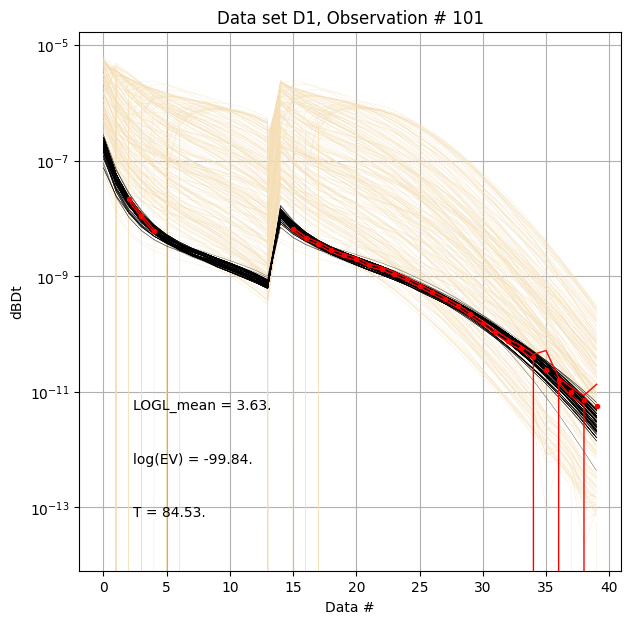

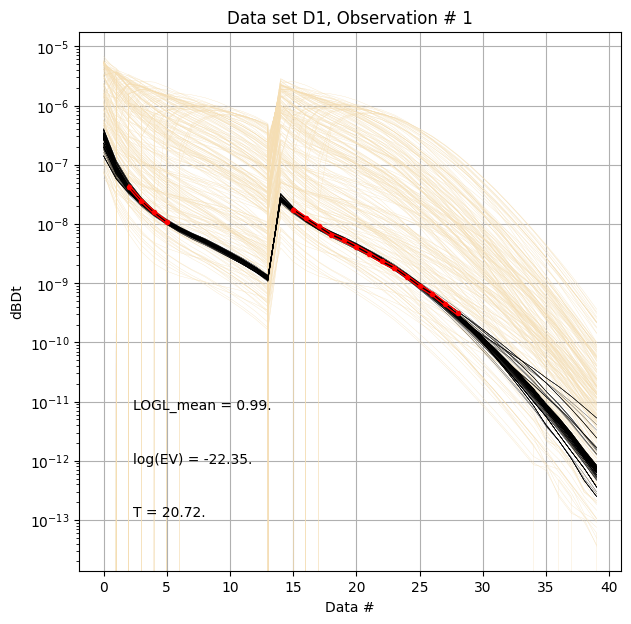

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=100, hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)

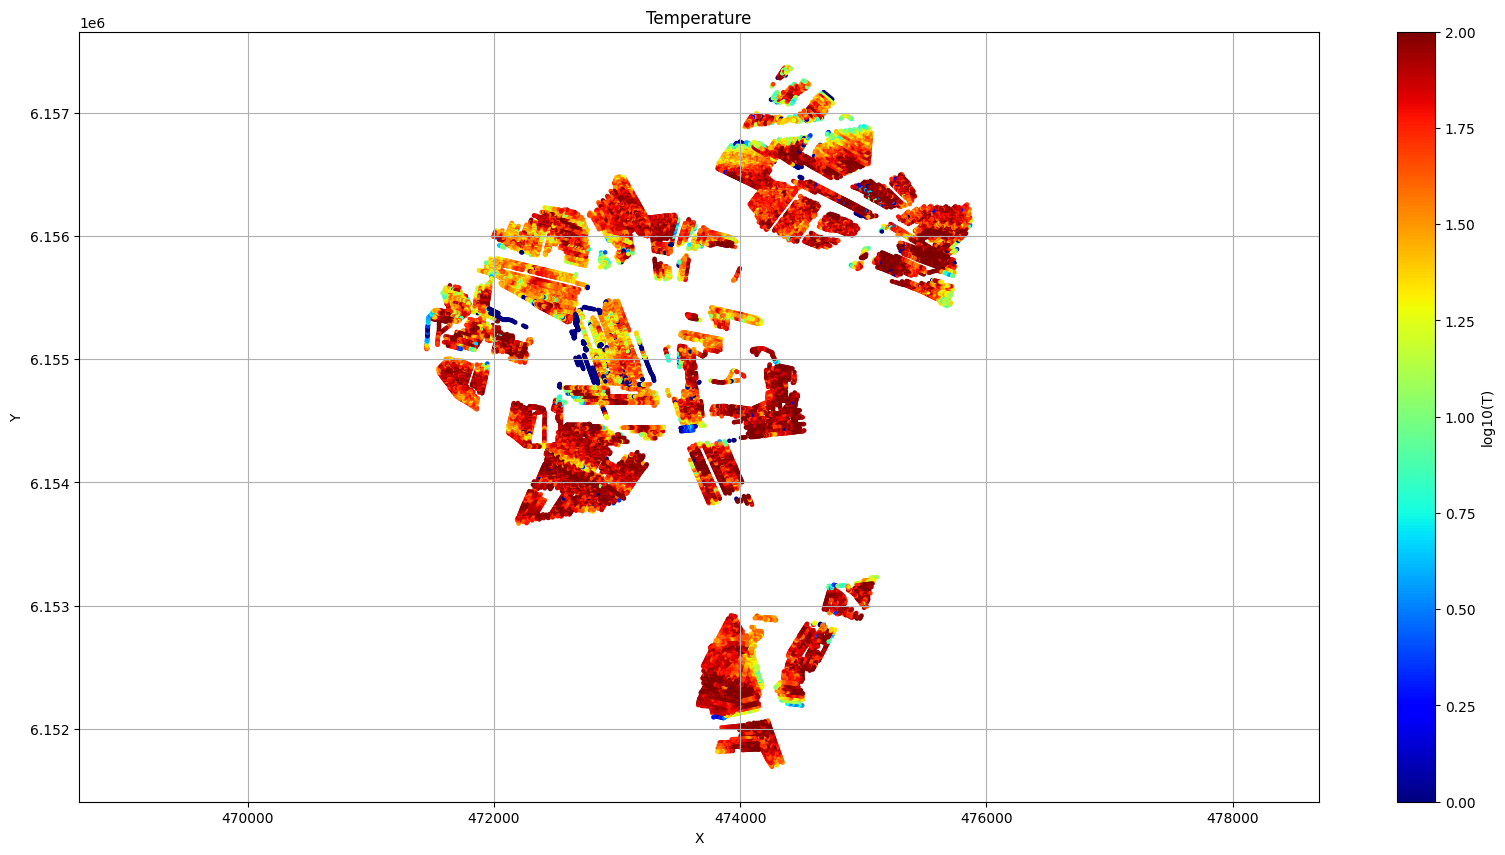

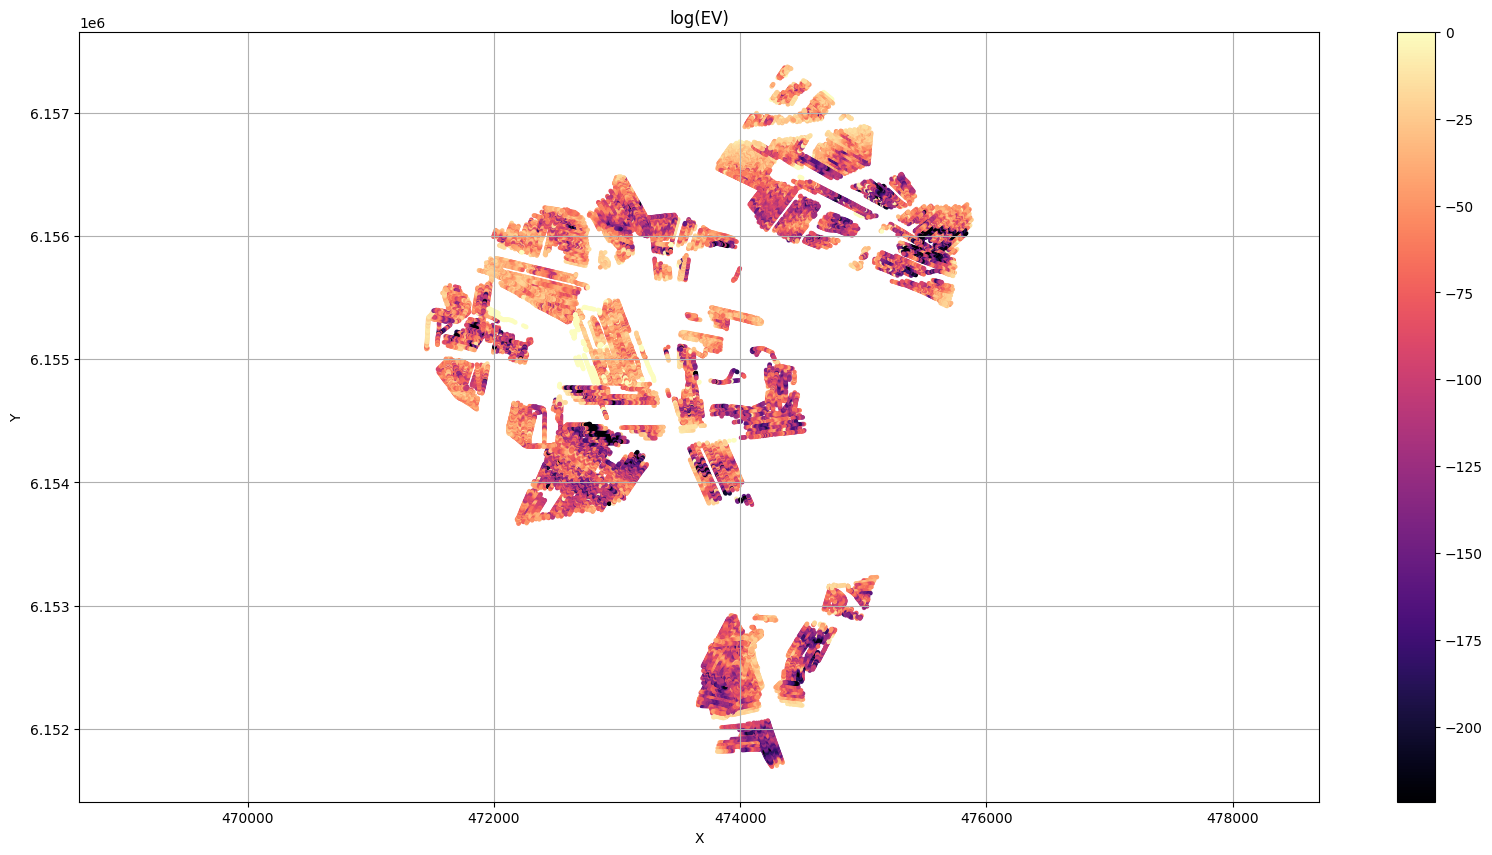

In [9]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
# Plot the evidnence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)

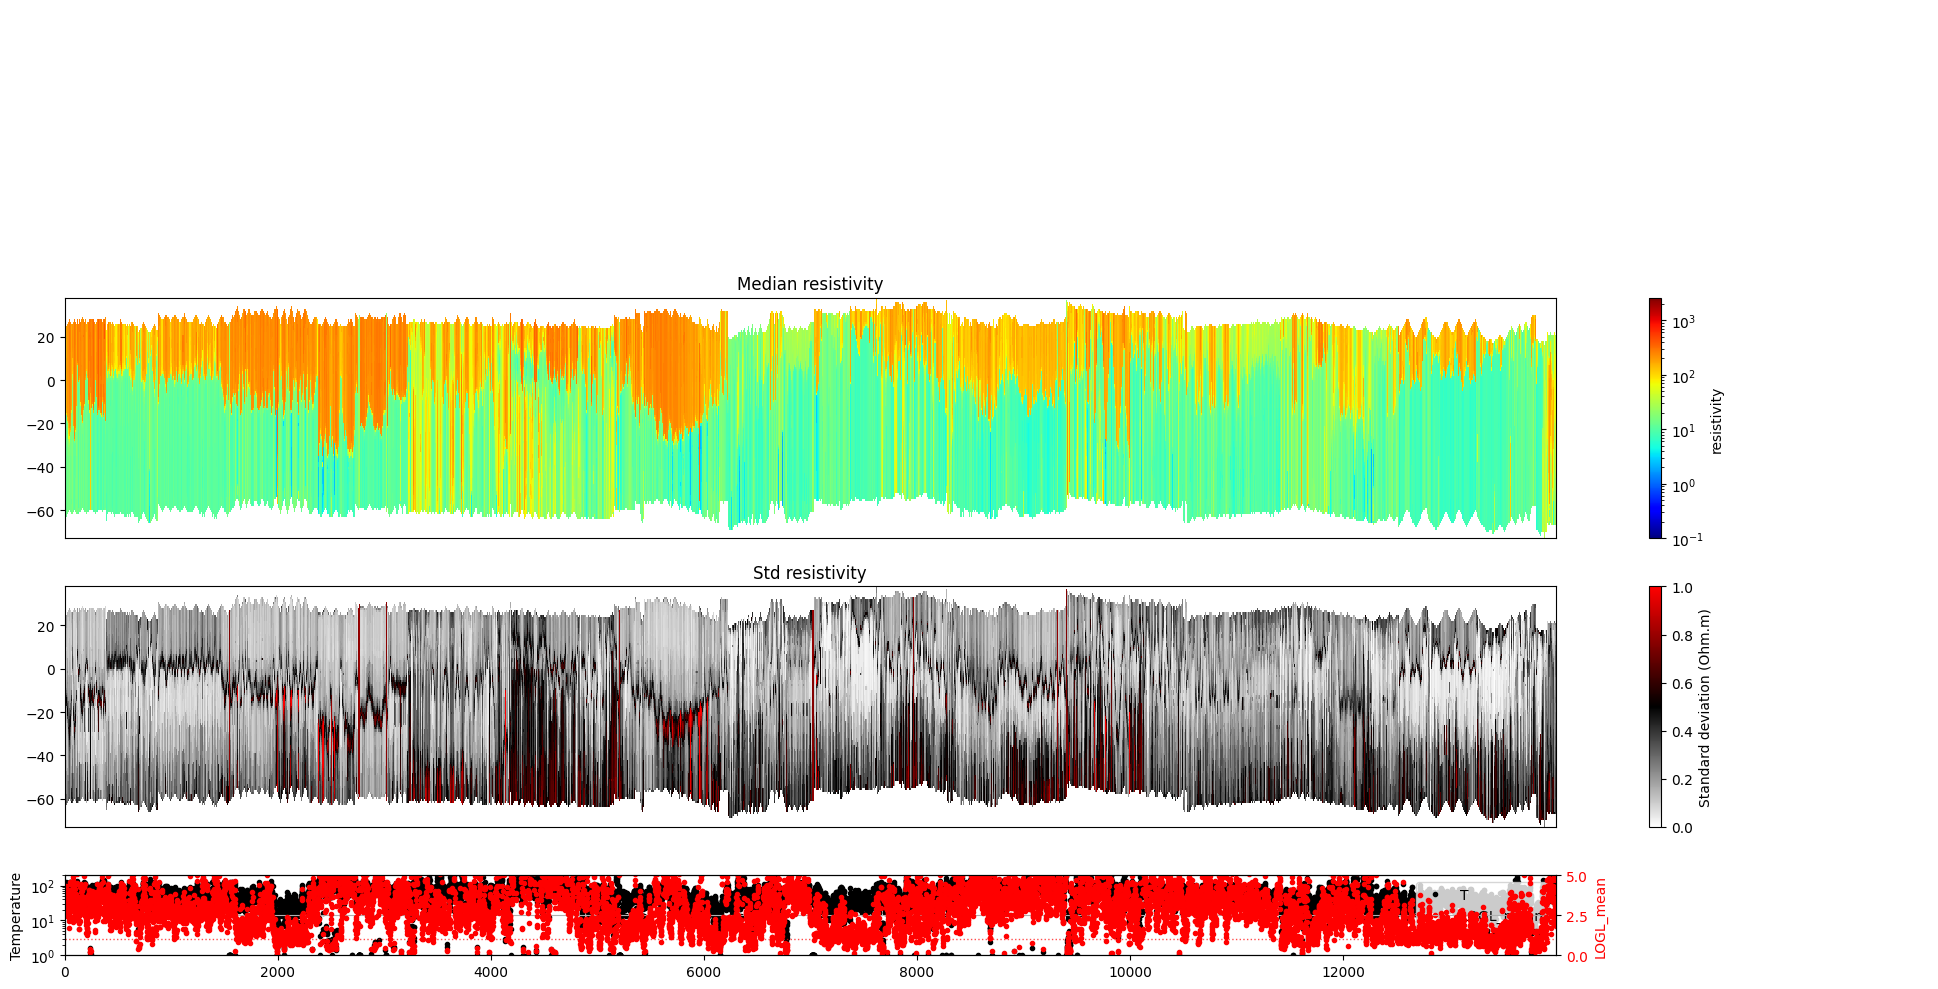

In [10]:
# find index id of data points wher LINE==1000
#i_plot= np.where( np.abs(LINE-1200)<1  )[0]
#ig.plot_profile(f_post_h5, i1=i_plot[0], i2=i_plot[-1], im=1)
ig.plot_profile(f_post_h5, i_plot=10000, i2=14000, im=1, hardcopy=hardcopy)
#ig.plot_profile(f_post_h5, i_plot=0, i2=2000, im=2)h yg sa

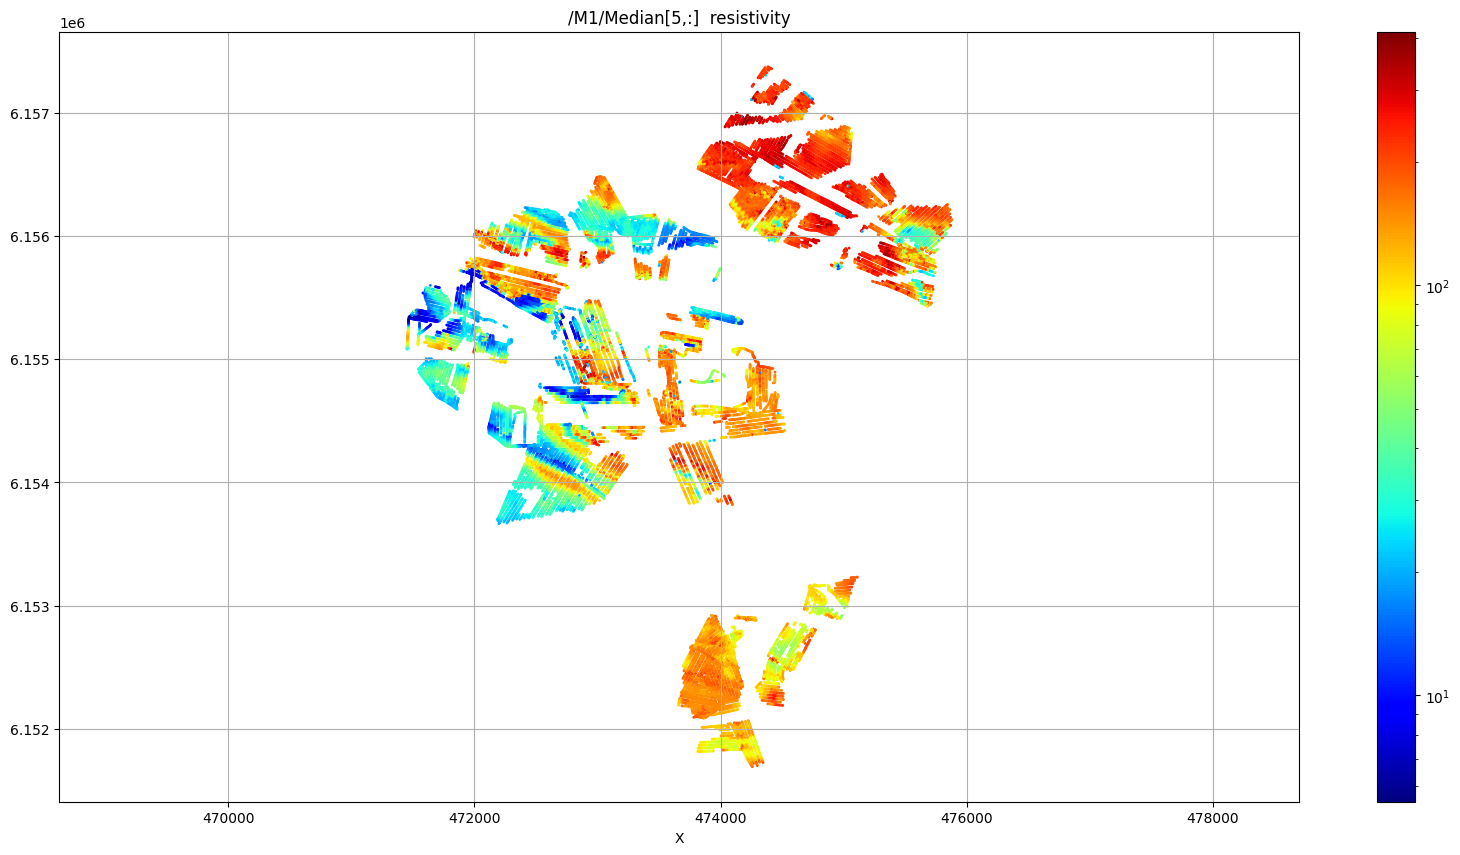

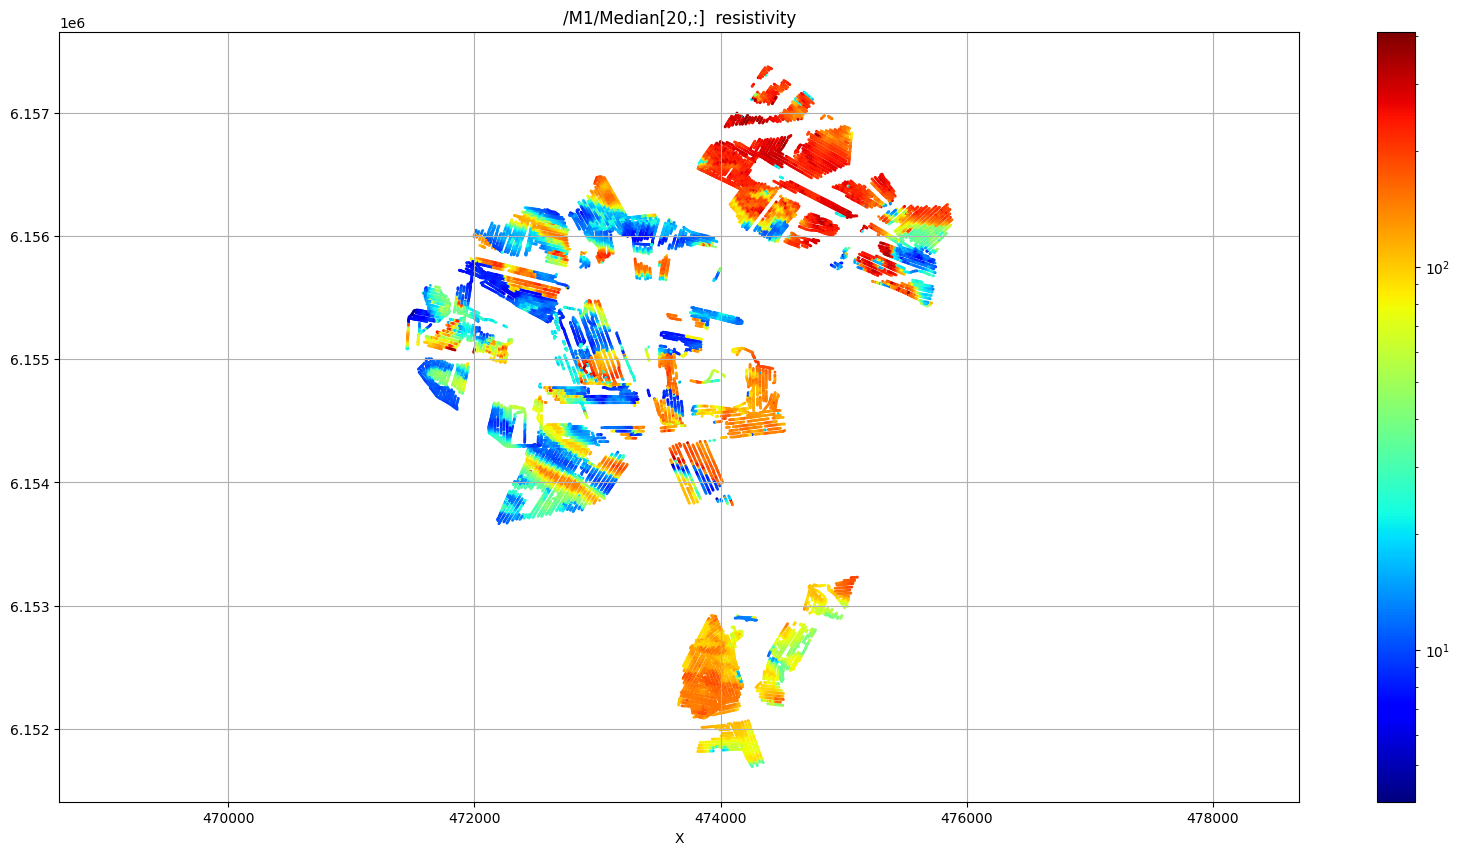

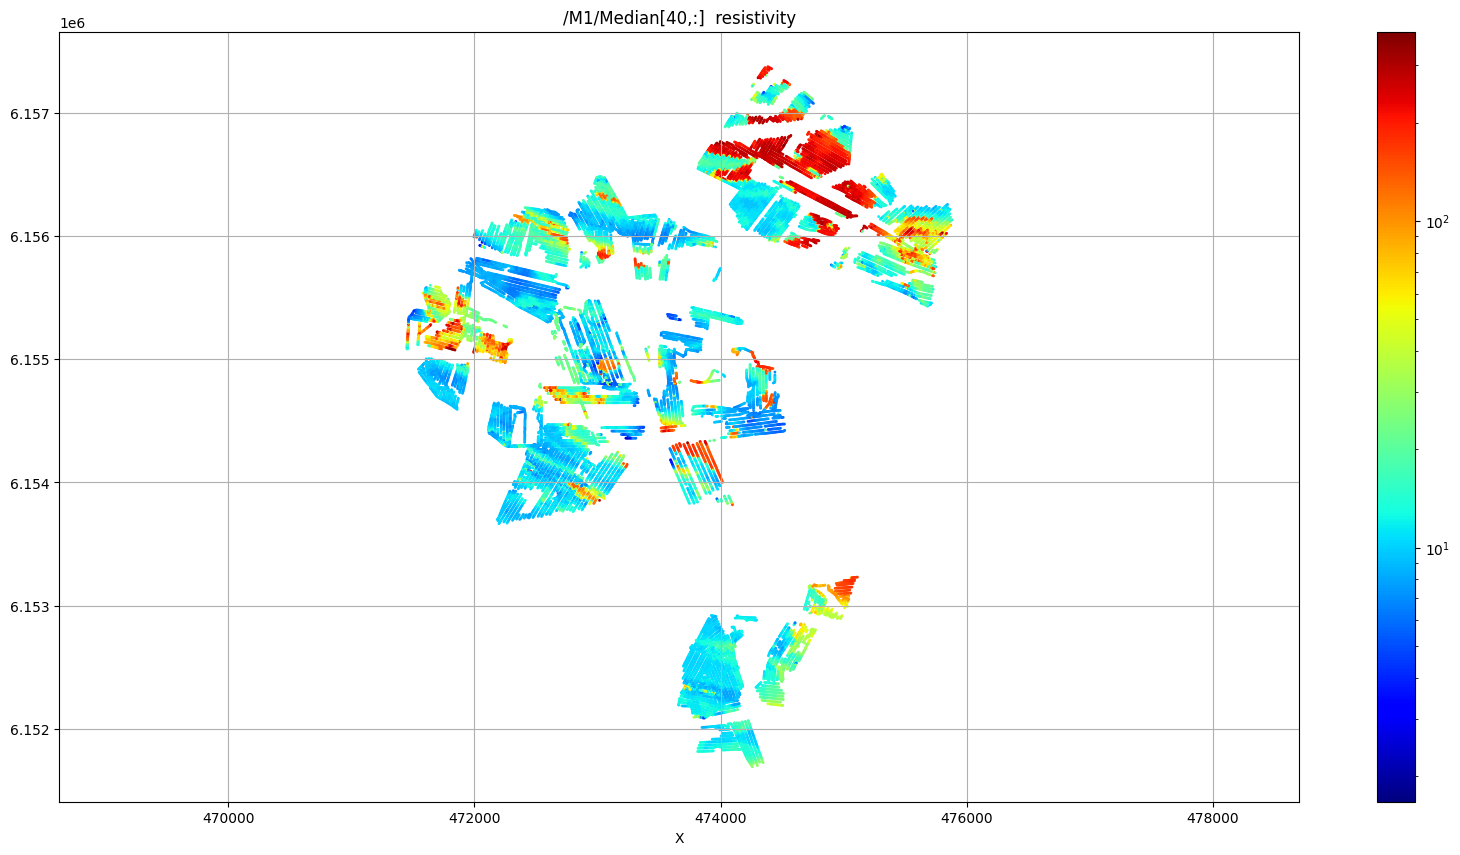

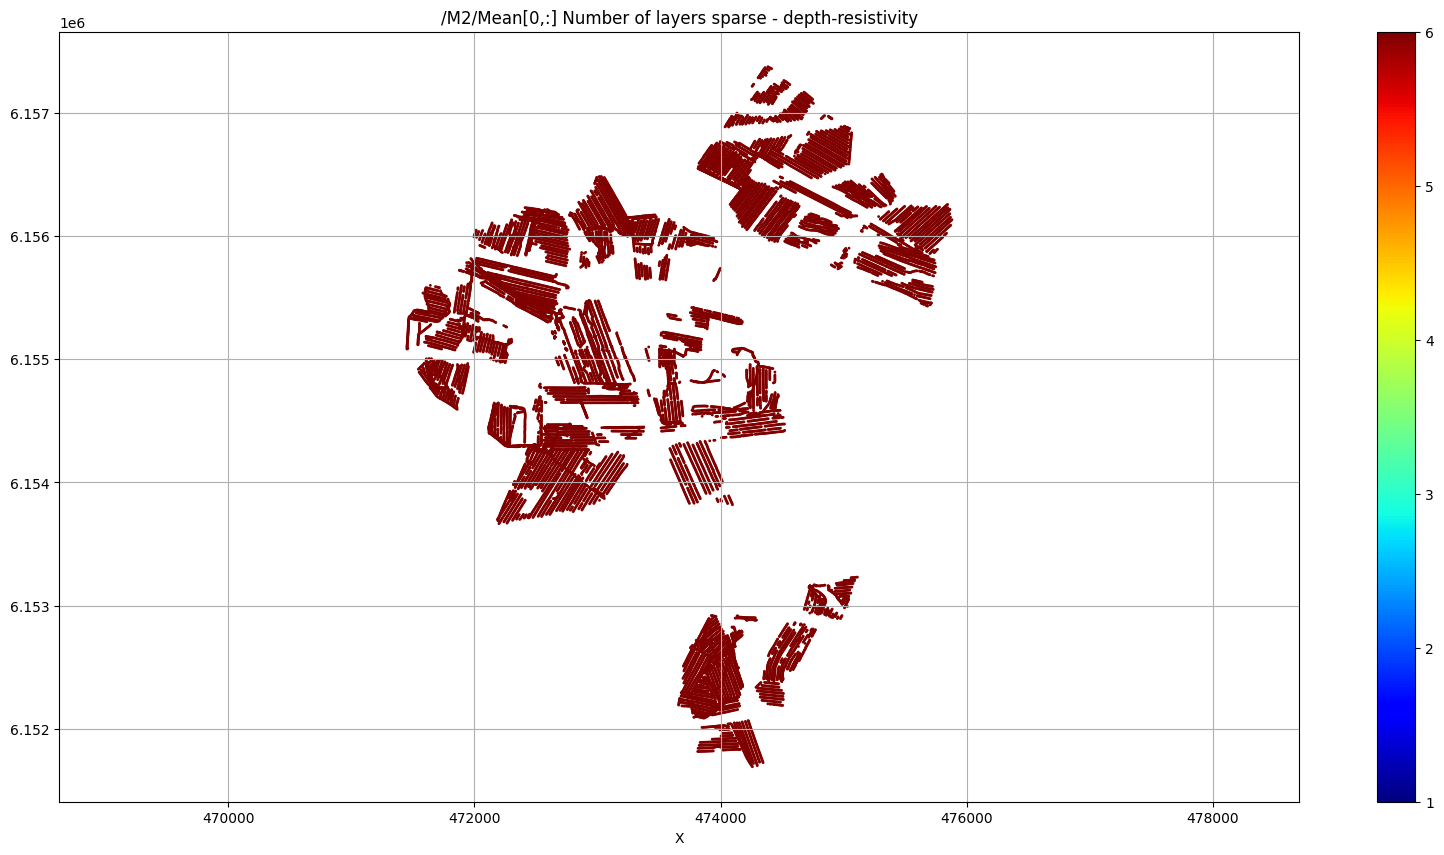

In [11]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=20, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=40, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()

#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Mean', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=1, hardcopy=hardcopy)
    plt.show()
except:
    pass

In [12]:
# f_csv, f_point_csv = ig.post_to_csv(f_post_h5)